In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import ModelCheckpoint
from sklearn import metrics
import os
%matplotlib inline
print(os.listdir("../dados/input"))

Using TensorFlow backend.


['BlackFriday.csv', 'BlackFriday.csv.zip', 'teste.csv', 'treino.csv']


In [4]:
original_data = pd.read_csv('../dados/input/treino.csv')

In [5]:
original_data.head()

Data  Temperatura  Precipitacao  Segunda  Terca  Quarta  Quinta  \
0  19/12/2017         29.9         77.25        0      1       0       0   
1  18/12/2017         29.2         74.25        1      0       0       0   
2  15/12/2017         31.9         67.50        0      0       0       0   
3  14/12/2017         31.6         56.50        0      0       0       1   
4  13/12/2017         27.1         74.50        0      0       1       0   

   Sexta  Primavera  Verao  Outono  Inverno  Distancia Data Posterior  \
0      0          1      0       0        0                        69   
1      0          1      0       0        0                         1   
2      1          1      0       0        0                         3   
3      0          1      0       0        0                         1   
4      0          1      0       0        0                         1   

   Distancia Data Anterior  Vendas 1d anterior  Vendas 2d anterior  \
0                        1                  70                  64   
1                        3                  64                 101   
2                        1                 101                 178   
3                        1                 178                 215   
4                        1                 215                 263   

   Vendas 3d anterior  Vendas 4d anterior  Vendas 5d anterior  Total  
0                 101                 178                 215     42  
1                 178                 215                 263     70  
2                 215                 263                 145     64  
3                 263                 145                 295    101  
4                 145                 295                 351    178

In [6]:
original_data.columns

Index(['Data', 'Temperatura', 'Precipitacao', 'Segunda', 'Terca', 'Quarta',
       'Quinta', 'Sexta', 'Primavera', 'Verao', 'Outono', 'Inverno',
       'Distancia Data Posterior', 'Distancia Data Anterior',
       'Vendas 1d anterior', 'Vendas 2d anterior', 'Vendas 3d anterior',
       'Vendas 4d anterior', 'Vendas 5d anterior', 'Total'],
      dtype='object')

In [7]:
original_data.describe()

Temperatura  Precipitacao     Segunda       Terca      Quarta  \
count   148.000000    148.000000  148.000000  148.000000  148.000000   
mean     25.097297     73.442568    0.216216    0.216216    0.209459   
std       4.246006     12.661813    0.413061    0.413061    0.408305   
min      16.000000     35.500000    0.000000    0.000000    0.000000   
25%      22.275000     68.875000    0.000000    0.000000    0.000000   
50%      25.100000     74.500000    0.000000    0.000000    0.000000   
75%      28.200000     80.812500    0.000000    0.000000    0.000000   
max      34.700000     96.000000    1.000000    1.000000    1.000000   

           Quinta       Sexta   Primavera  Verao      Outono     Inverno  \
count  148.000000  148.000000  148.000000  148.0  148.000000  148.000000   
mean     0.189189    0.168919    0.391892    0.0    0.297297    0.310811   
std      0.392989    0.375953    0.489830    0.0    0.458621    0.464397   
min      0.000000    0.000000    0.000000    0.0    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.0    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.0    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    0.0    1.000000    1.000000   
max      1.000000    1.000000    1.000000    0.0    1.000000    1.000000   

       Distancia Data Posterior  Distancia Data Anterior  Vendas 1d anterior  \
count                148.000000               148.000000          148.000000   
mean                   2.162162                 2.162162          266.351351   
std                    6.033979                 6.033979          159.141270   
min                    1.000000                 1.000000            0.000000   
25%                    1.000000                 1.000000          116.500000   
50%                    1.000000                 1.000000          319.000000   
75%                    1.000000                 1.000000          394.500000   
max                   69.000000                69.000000          523.000000   

       Vendas 2d anterior  Vendas 3d anterior  Vendas 4d anterior  \
count          148.000000          148.000000          148.000000   
mean           265.878378          265.445946          264.763514   
std            159.831327          160.466551          161.382815   
min              0.000000            0.000000            0.000000   
25%            116.500000          116.500000          116.500000   
50%            319.000000          319.000000          319.000000   
75%            394.500000          394.500000          394.500000   
max            523.000000          523.000000          523.000000   

       Vendas 5d anterior       Total  
count          148.000000  148.000000  
mean           263.560811  266.635135  
std            162.691780  158.699911  
min              0.000000    9.000000  
25%            110.500000  116.500000  
50%            319.000000  319.000000  
75%            394.500000  394.500000  
max            523.000000  523.000000

In [8]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 20 columns):
Data                        148 non-null object
Temperatura                 148 non-null float64
Precipitacao                148 non-null float64
Segunda                     148 non-null int64
Terca                       148 non-null int64
Quarta                      148 non-null int64
Quinta                      148 non-null int64
Sexta                       148 non-null int64
Primavera                   148 non-null int64
Verao                       148 non-null int64
Outono                      148 non-null int64
Inverno                     148 non-null int64
Distancia Data Posterior    148 non-null int64
Distancia Data Anterior     148 non-null int64
Vendas 1d anterior          148 non-null int64
Vendas 2d anterior          148 non-null int64
Vendas 3d anterior          148 non-null int64
Vendas 4d anterior          148 non-null int64
Vendas 5d anterior          148 non-null int

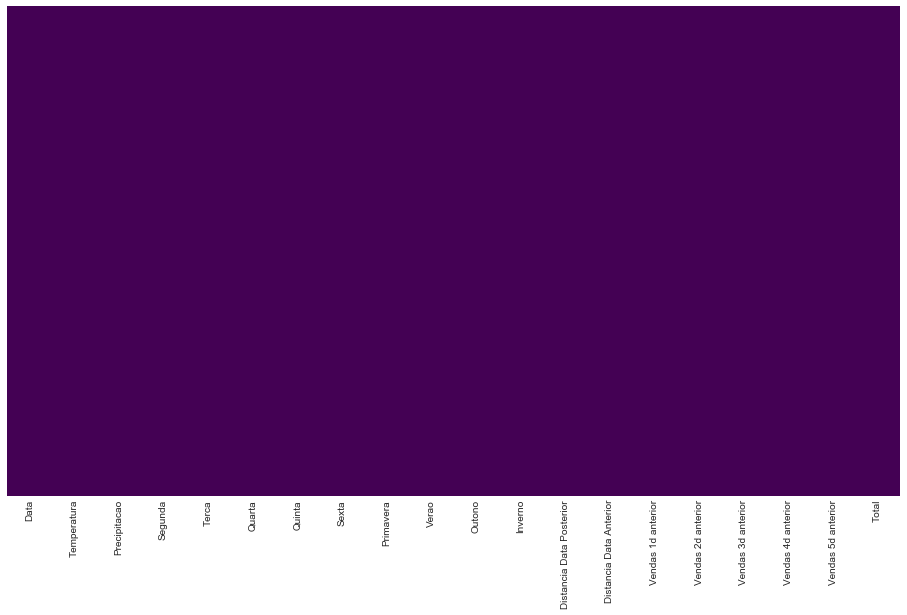

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))
sns.heatmap(original_data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


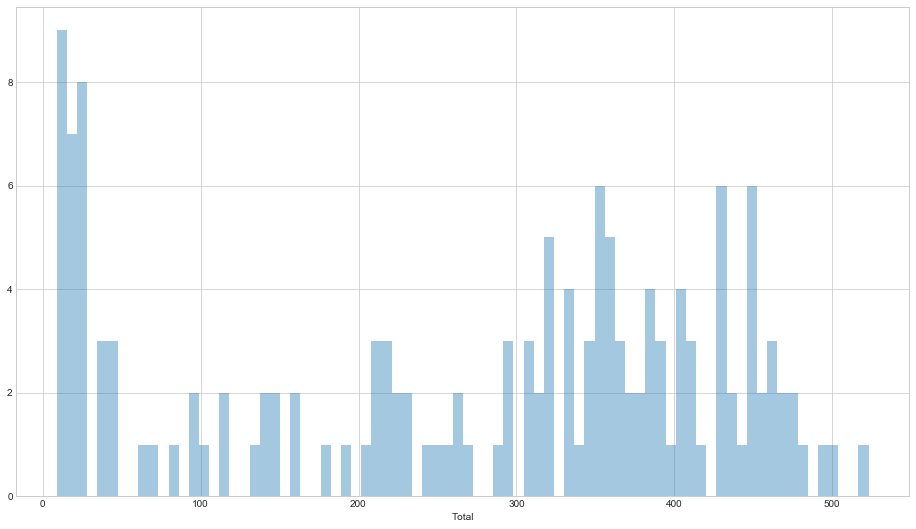

In [10]:
plt.figure(figsize=(16,9))
sns.distplot(original_data['Total'],bins=80,kde=False)

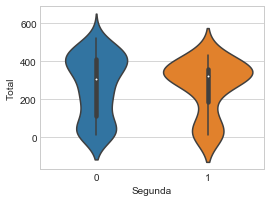

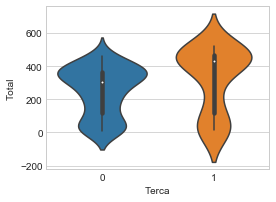

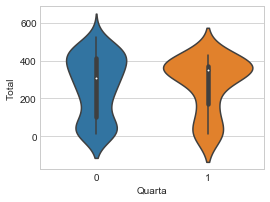

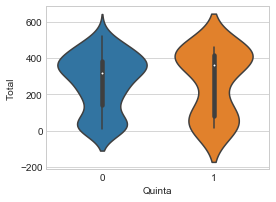

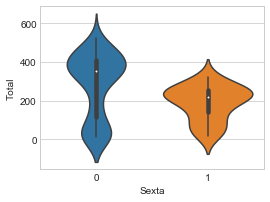

In [11]:
plt.figure(figsize=(4,3))
sns.violinplot(x='Segunda',y='Total',data=original_data)
plt.figure(figsize=(4,3))
sns.violinplot(x='Terca',y='Total',data=original_data)
plt.figure(figsize=(4,3))
sns.violinplot(x='Quarta',y='Total',data=original_data)
plt.figure(figsize=(4,3))
sns.violinplot(x='Quinta',y='Total',data=original_data)
plt.figure(figsize=(4,3))
sns.violinplot(x='Sexta',y='Total',data=original_data)

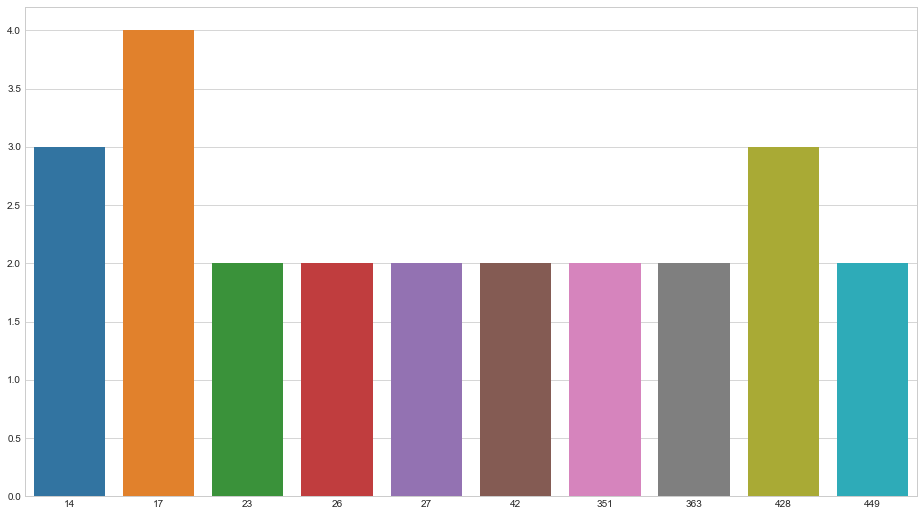

In [12]:
plt.figure(figsize=(16,9))
data = original_data['Total'].value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=data.index,y=data.values)

In [13]:
original_data.columns

Index(['Data', 'Temperatura', 'Precipitacao', 'Segunda', 'Terca', 'Quarta',
       'Quinta', 'Sexta', 'Primavera', 'Verao', 'Outono', 'Inverno',
       'Distancia Data Posterior', 'Distancia Data Anterior',
       'Vendas 1d anterior', 'Vendas 2d anterior', 'Vendas 3d anterior',
       'Vendas 4d anterior', 'Vendas 5d anterior', 'Total'],
      dtype='object')

In [14]:
X_train = original_data.iloc[:,1:19]

In [15]:
X_train.values

array([[ 29.9 ,  77.25,   0.  , ..., 101.  , 178.  , 215.  ],
       [ 29.2 ,  74.25,   1.  , ..., 178.  , 215.  , 263.  ],
       [ 31.9 ,  67.5 ,   0.  , ..., 215.  , 263.  , 145.  ],
       ...,
       [ 24.1 ,  88.25,   1.  , ...,   0.  ,   0.  ,   0.  ],
       [ 20.3 ,  78.75,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [ 25.2 ,  83.5 ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [16]:
y_train = original_data.iloc[:,19].values

In [17]:
y_train

array([ 42,  70,  64, 101, 178, 215, 263, 145, 295, 351, 387, 294, 194,
       460, 363, 437, 314, 212, 396, 336, 427, 312, 218, 407, 428, 306,
       220, 367, 352, 463, 320, 306, 451, 353,  95, 149, 209, 227, 202,
       233, 391, 358, 456, 335, 323, 469, 319, 297, 411, 370, 412, 331,
       255, 446, 394, 472, 361, 263, 428, 336, 470, 343, 232, 449, 386,
       477, 377, 347, 480, 359, 224, 450, 375, 491, 347, 266, 415, 405,
       464, 358, 253, 446, 388, 523, 346, 245, 438, 361, 503, 319,  39,
        45,  97, 115, 138, 134, 211, 308, 353, 401, 382, 321, 352, 428,
       453, 433, 376, 449, 403, 286, 408, 393, 442, 431,  17,  12,  17,
        27,  16, 141, 117,  42,  20, 363, 162,  35, 351,  21,  23,  27,
        28, 162,  23,  14,  84,  41,   9,  15,  15,  17,  26,  10,  14,
        17,  26,  10,  22,  14], dtype=int64)

In [18]:
test_data = pd.read_csv('../dados/input/teste.csv')

In [19]:
test_data.head()

Data  Temperatura  Precipitacao  Segunda  Terca  Quarta  Quinta  \
0  31/10/2018         31.4         72.25        0      0       1       0   
1  30/10/2018         28.0         72.75        0      1       0       0   
2  29/10/2018         21.0         82.75        1      0       0       0   
3  26/10/2018         25.4         85.50        0      0       0       0   
4  25/10/2018         21.4         91.00        0      0       0       1   

   Sexta  Primavera  Verao  Outono  Inverno  Distancia Data Posterior  \
0      0          1      0       0        0                         1   
1      0          1      0       0        0                         1   
2      0          1      0       0        0                         1   
3      1          1      0       0        0                         3   
4      0          1      0       0        0                         1   

   Distancia Data Anterior  Vendas 1d anterior  Vendas 2d anterior  \
0                        1                 437                 293   
1                        1                 293                 263   
2                        3                 263                 402   
3                        1                 402                 382   
4                        1                 382                 203   

   Vendas 3d anterior  Vendas 4d anterior  Vendas 5d anterior  Total  
0                 263                 402                 382    362  
1                 402                 382                 203    437  
2                 382                 203                 323    293  
3                 203                 323                  49    263  
4                 323                  49                 138    402

In [20]:
y_test = test_data.iloc[:,19].values

In [21]:
y_test

array([362, 437, 293, 263, 402, 382, 203, 323,  49, 138, 188, 165, 110,
       355, 387, 411, 287, 216, 440, 422, 432, 310, 238, 432, 407, 424,
       316, 268, 409, 393, 384, 321, 247, 416, 413, 432, 312, 417, 402,
       381, 337, 288, 429, 387, 495, 337, 243, 485, 415, 465, 358, 260,
       460, 436, 467, 331, 261, 473, 407, 476, 305,  20,  40,  68, 110,
        18, 204, 216, 363,   0, 256, 412,  73, 469, 391,   0, 439, 442,
       468, 382, 353, 425, 453, 247, 261, 309, 496, 456, 523, 426,  68,
       455, 507, 402, 352, 464, 442, 490, 413, 319, 529, 453, 503, 439,
       344, 532, 457, 335, 512, 481, 533, 460, 320, 526, 488, 547, 448,
       349, 532, 491, 572, 443, 398, 568, 465, 551, 486, 424, 398, 520,
       463, 389, 525, 490, 553, 340, 544, 500, 548, 413, 378, 514, 502,
       502, 430, 308, 461, 443, 470, 446], dtype=int64)

In [22]:
X_test = test_data.iloc[:,1:19]

In [23]:
X_test

Temperatura  Precipitacao  Segunda  Terca  Quarta  Quinta  Sexta  \
0           31.4         72.25        0      0       1       0      0   
1           28.0         72.75        0      1       0       0      0   
2           21.0         82.75        1      0       0       0      0   
3           25.4         85.50        0      0       0       0      1   
4           21.4         91.00        0      0       0       1      0   
5           19.5         88.75        0      0       1       0      0   
6           30.2         74.25        0      1       0       0      0   
7           28.3         70.75        1      0       0       0      0   
8           21.1         85.00        0      0       0       0      1   
9           29.9         86.00        0      0       0       1      0   
10          29.5         76.00        0      0       1       0      0   
11          24.9         91.00        0      1       0       0      0   
12          24.1         90.00        1      0       0       0      0   
13          20.8         90.00        0      0       0       1      0   
14          28.6         88.00        0      0       1       0      0   
15          28.3         79.00        0      1       0       0      0   
16          21.7         93.00        1      0       0       0      0   
17          18.6         89.00        0      0       0       0      1   
18          23.0         86.00        0      0       0       1      0   
19          31.9         82.00        0      0       1       0      0   
20          30.9         81.00        0      1       0       0      0   
21          25.2         86.00        1      0       0       0      0   
22          22.2         87.00        0      0       0       0      1   
23          28.8         84.00        0      0       0       1      0   
24          32.2         66.50        0      0       1       0      0   
25          26.4         74.25        0      1       0       0      0   
26          33.5         61.00        1      0       0       0      0   
27          27.7         78.25        0      0       0       0      1   
28          25.0         79.50        0      0       0       1      0   
29          29.9         61.75        0      0       1       0      0   
..           ...           ...      ...    ...     ...     ...    ...   
120         28.2         68.25        0      1       0       0      0   
121         27.8         74.25        1      0       0       0      0   
122         27.2         72.00        0      0       0       0      1   
123         27.8         74.25        0      0       0       1      0   
124         26.8         79.00        0      0       1       0      0   
125         26.3         81.50        0      1       0       0      0   
126         26.0         77.50        1      0       0       0      0   
127         28.5         77.75        0      0       0       1      0   
128         28.2         83.00        0      0       1       0      0   
129         28.6         86.00        0      1       0       0      0   
130         28.2         81.75        1      0       0       0      0   
131         30.0         75.25        0      0       0       0      1   
132         26.4         80.50        0      0       0       1      0   
133         27.0         79.25        0      0       1       0      0   
134         31.0         79.25        0      1       0       0      0   
135         30.5         72.50        0      0       0       0      1   
136         31.0         66.00        0      0       0       1      0   
137         33.6         72.50        0      0       1       0      0   
138         29.3         81.50        0      1       0       0      0   
139         31.2         76.75        1      0       0       0      0   
140         26.8         77.25        0      0       0       0      1   
141         23.8         86.50        0      0       0       1      0   
142         30.0         84.25        0      0       1       0 

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [25]:
standardized_X

array([[ 1.13495156,  0.30172306, -0.52522573, ..., -1.02827871,
        -0.53945104, -0.29949702],
       [ 0.96953093,  0.06398563,  1.90394328, ..., -0.54679855,
        -0.30940401, -0.00345878],
       [ 1.60758192, -0.47092356, -0.52522573, ..., -0.31543795,
        -0.01096462, -0.73121946],
       ...,
       [-0.23567649,  1.17342694,  1.90394328, ..., -1.65983061,
        -1.64616377, -1.62550165],
       [-1.13367418,  0.42059177, -0.52522573, ..., -1.65983061,
        -1.64616377, -1.62550165],
       [ 0.02427021,  0.79700935, -0.52522573, ..., -1.65983061,
        -1.64616377, -1.62550165]])

In [26]:
standardized_X_test

array([[ 1.48942433, -0.09450598, -0.52522573, ..., -0.01529447,
         0.8532661 ,  0.73046936],
       [ 0.68595271, -0.05488308, -0.52522573, ...,  0.85387101,
         0.72891636, -0.37350658],
       [-0.96825355,  0.737575  ,  1.90394328, ...,  0.72881123,
        -0.38401386,  0.36658902],
       ...,
       [ 1.22947763,  0.28191161, -0.52522573, ..., -1.39720506,
        -1.21093966, -1.23078399],
       [ 0.8041103 ,  0.83663226, -0.52522573, ..., -1.22212137,
        -1.24824458, -1.00258785],
       [ 0.49690057,  1.15361549,  1.90394328, ..., -1.2596393 ,
        -1.01819756, -0.52769317]])

In [27]:
y_train

array([ 42,  70,  64, 101, 178, 215, 263, 145, 295, 351, 387, 294, 194,
       460, 363, 437, 314, 212, 396, 336, 427, 312, 218, 407, 428, 306,
       220, 367, 352, 463, 320, 306, 451, 353,  95, 149, 209, 227, 202,
       233, 391, 358, 456, 335, 323, 469, 319, 297, 411, 370, 412, 331,
       255, 446, 394, 472, 361, 263, 428, 336, 470, 343, 232, 449, 386,
       477, 377, 347, 480, 359, 224, 450, 375, 491, 347, 266, 415, 405,
       464, 358, 253, 446, 388, 523, 346, 245, 438, 361, 503, 319,  39,
        45,  97, 115, 138, 134, 211, 308, 353, 401, 382, 321, 352, 428,
       453, 433, 376, 449, 403, 286, 408, 393, 442, 431,  17,  12,  17,
        27,  16, 141, 117,  42,  20, 363, 162,  35, 351,  21,  23,  27,
        28, 162,  23,  14,  84,  41,   9,  15,  15,  17,  26,  10,  14,
        17,  26,  10,  22,  14], dtype=int64)

In [28]:
y_test

array([362, 437, 293, 263, 402, 382, 203, 323,  49, 138, 188, 165, 110,
       355, 387, 411, 287, 216, 440, 422, 432, 310, 238, 432, 407, 424,
       316, 268, 409, 393, 384, 321, 247, 416, 413, 432, 312, 417, 402,
       381, 337, 288, 429, 387, 495, 337, 243, 485, 415, 465, 358, 260,
       460, 436, 467, 331, 261, 473, 407, 476, 305,  20,  40,  68, 110,
        18, 204, 216, 363,   0, 256, 412,  73, 469, 391,   0, 439, 442,
       468, 382, 353, 425, 453, 247, 261, 309, 496, 456, 523, 426,  68,
       455, 507, 402, 352, 464, 442, 490, 413, 319, 529, 453, 503, 439,
       344, 532, 457, 335, 512, 481, 533, 460, 320, 526, 488, 547, 448,
       349, 532, 491, 572, 443, 398, 568, 465, 551, 486, 424, 398, 520,
       463, 389, 525, 490, 553, 340, 544, 500, 548, 413, 378, 514, 502,
       502, 430, 308, 461, 443, 470, 446], dtype=int64)

In [29]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model.add(Dense(1))
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['mae'])

In [30]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=500,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/500
148/148 [==============================] - 0s 2ms/step - loss: 96208.3676 - mean_absolute_error: 267.1233 - val_loss: 160362.4169 - val_mean_absolute_error: 378.9805
Epoch 2/500
148/148 [==============================] - 0s 81us/step - loss: 96115.4318 - mean_absolute_error: 266.9762 - val_loss: 160269.6194 - val_mean_absolute_error: 378.8642
Epoch 3/500
148/148 [==============================] - 0s 81us/step - loss: 96048.8501 - mean_absolute_error: 266.8791 - val_loss: 160197.6019 - val_mean_absolute_error: 378.7735
Epoch 4/500
148/148 [==============================] - 0s 81us/step - loss: 95993.6170 - mean_absolute_error: 266.7969 - val_loss: 160117.6669 - val_mean_absolute_error: 378.6728
Epoch 5/500
148/148 [==============================] - 0s 54us/step - loss: 95934.9506 - mean_absolute_error: 266.7125 - val_loss: 160049.1481 - val_mean_absolute_error: 378.5857
Epoch 6/500
148/148 [==============================] - 0s 81

148/148 [==============================] - 0s 81us/step - loss: 89189.9459 - mean_absolute_error: 256.5249 - val_loss: 150084.2319 - val_mean_absolute_error: 366.3683
Epoch 92/500
148/148 [==============================] - 0s 81us/step - loss: 89057.5961 - mean_absolute_error: 256.3283 - val_loss: 149913.6200 - val_mean_absolute_error: 366.1590
Epoch 93/500
148/148 [==============================] - 0s 54us/step - loss: 88947.3775 - mean_absolute_error: 256.1679 - val_loss: 149753.8062 - val_mean_absolute_error: 365.9604
Epoch 94/500
148/148 [==============================] - 0s 54us/step - loss: 88832.9095 - mean_absolute_error: 256.0022 - val_loss: 149579.2050 - val_mean_absolute_error: 365.7446
Epoch 95/500
148/148 [==============================] - 0s 81us/step - loss: 88718.9493 - mean_absolute_error: 255.8346 - val_loss: 149394.0287 - val_mean_absolute_error: 365.5151
Epoch 96/500
148/148 [==============================] - 0s 81us/step - loss: 88594.5281 - mean_absolute_error: 25

148/148 [==============================] - 0s 81us/step - loss: 74420.0883 - mean_absolute_error: 233.6198 - val_loss: 127799.9206 - val_mean_absolute_error: 337.5958
Epoch 182/500
148/148 [==============================] - 0s 54us/step - loss: 74214.0604 - mean_absolute_error: 233.2775 - val_loss: 127502.4000 - val_mean_absolute_error: 337.1930
Epoch 183/500
148/148 [==============================] - 0s 54us/step - loss: 74008.8160 - mean_absolute_error: 232.9385 - val_loss: 127148.2931 - val_mean_absolute_error: 336.7149
Epoch 184/500
148/148 [==============================] - 0s 81us/step - loss: 73788.7639 - mean_absolute_error: 232.5775 - val_loss: 126864.2088 - val_mean_absolute_error: 336.3291
Epoch 185/500
148/148 [==============================] - 0s 81us/step - loss: 73604.0280 - mean_absolute_error: 232.2722 - val_loss: 126542.6019 - val_mean_absolute_error: 335.8920
Epoch 186/500
148/148 [==============================] - 0s 54us/step - loss: 73391.6273 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 53959.6240 - mean_absolute_error: 195.8213 - val_loss: 96031.0312 - val_mean_absolute_error: 290.8830
Epoch 272/500
148/148 [==============================] - 0s 81us/step - loss: 53716.1108 - mean_absolute_error: 195.3139 - val_loss: 95673.8622 - val_mean_absolute_error: 290.3016
Epoch 273/500
148/148 [==============================] - 0s 81us/step - loss: 53481.5442 - mean_absolute_error: 194.8197 - val_loss: 95339.2637 - val_mean_absolute_error: 289.7605
Epoch 274/500
148/148 [==============================] - 0s 81us/step - loss: 53266.3782 - mean_absolute_error: 194.3593 - val_loss: 94920.0219 - val_mean_absolute_error: 289.0902
Epoch 275/500
148/148 [==============================] - 0s 81us/step - loss: 53011.9329 - mean_absolute_error: 193.8363 - val_loss: 94506.6791 - val_mean_absolute_error: 288.4227
Epoch 276/500
148/148 [==============================] - 0s 54us/step - loss: 52758.5612 - mean_absolute_error: 19

148/148 [==============================] - 0s 54us/step - loss: 32964.1432 - mean_absolute_error: 144.2190 - val_loss: 61372.4197 - val_mean_absolute_error: 226.7398
Epoch 362/500
148/148 [==============================] - 0s 54us/step - loss: 32762.8569 - mean_absolute_error: 143.6278 - val_loss: 60985.5659 - val_mean_absolute_error: 225.9019
Epoch 363/500
148/148 [==============================] - 0s 54us/step - loss: 32540.0023 - mean_absolute_error: 142.9654 - val_loss: 60627.1778 - val_mean_absolute_error: 225.1166
Epoch 364/500
148/148 [==============================] - 0s 81us/step - loss: 32327.6915 - mean_absolute_error: 142.3336 - val_loss: 60276.1556 - val_mean_absolute_error: 224.3490
Epoch 365/500
148/148 [==============================] - 0s 81us/step - loss: 32125.3834 - mean_absolute_error: 141.7199 - val_loss: 59905.7803 - val_mean_absolute_error: 223.5323
Epoch 366/500
148/148 [==============================] - 0s 54us/step - loss: 31917.8838 - mean_absolute_error: 14

Epoch 452/500
148/148 [==============================] - 0s 54us/step - loss: 18287.0580 - mean_absolute_error: 89.0143 - val_loss: 33216.7630 - val_mean_absolute_error: 150.7784
Epoch 453/500
148/148 [==============================] - 0s 81us/step - loss: 18177.8643 - mean_absolute_error: 88.5216 - val_loss: 32974.9672 - val_mean_absolute_error: 149.8733
Epoch 454/500
148/148 [==============================] - 0s 81us/step - loss: 18074.8217 - mean_absolute_error: 87.9923 - val_loss: 32689.6113 - val_mean_absolute_error: 148.8995
Epoch 455/500
148/148 [==============================] - 0s 81us/step - loss: 17967.8007 - mean_absolute_error: 87.5148 - val_loss: 32476.2681 - val_mean_absolute_error: 148.1003
Epoch 456/500
148/148 [==============================] - 0s 81us/step - loss: 17872.8150 - mean_absolute_error: 87.0235 - val_loss: 32275.5948 - val_mean_absolute_error: 147.3628
Epoch 457/500
148/148 [==============================] - 0s 81us/step - loss: 17782.4052 - mean_absolute_

Epoch 498/500
148/148 [==============================] - 0s 81us/step - loss: 15024.8101 - mean_absolute_error: 73.9187 - val_loss: 25138.4383 - val_mean_absolute_error: 119.7307
Epoch 499/500
148/148 [==============================] - 0s 81us/step - loss: 14971.2019 - mean_absolute_error: 73.7067 - val_loss: 25040.2662 - val_mean_absolute_error: 119.3710
Epoch 500/500
148/148 [==============================] - 0s 81us/step - loss: 14931.1859 - mean_absolute_error: 73.5863 - val_loss: 24922.2952 - val_mean_absolute_error: 118.9186


In [31]:
model.predict(standardized_X_test)

array([[353.65414  ],
       [325.46646  ],
       [202.76106  ],
       [ 53.430393 ],
       [ 90.509    ],
       [ 33.62642  ],
       [ 88.59501  ],
       [ 13.272576 ],
       [  4.121689 ],
       [130.93462  ],
       [198.03065  ],
       [289.1105   ],
       [233.19766  ],
       [283.08237  ],
       [324.41833  ],
       [408.1043   ],
       [277.63553  ],
       [202.66531  ],
       [361.2566   ],
       [359.91333  ],
       [422.9588   ],
       [291.94458  ],
       [218.06047  ],
       [378.92105  ],
       [373.56976  ],
       [399.25223  ],
       [326.2748   ],
       [201.14265  ],
       [337.0921   ],
       [346.52087  ],
       [395.23477  ],
       [277.28516  ],
       [245.15575  ],
       [423.05716  ],
       [384.79608  ],
       [417.35446  ],
       [305.08173  ],
       [325.96945  ],
       [307.04044  ],
       [412.21518  ],
       [335.44116  ],
       [293.37485  ],
       [450.68845  ],
       [408.99985  ],
       [445.4752   ],
       [32

In [32]:
score = model.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 27us/step


In [33]:
score

[24922.295234375, 118.91859619140625]

In [34]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=1000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/1000
148/148 [==============================] - 0s 81us/step - loss: 14879.2217 - mean_absolute_error: 73.4300 - val_loss: 24838.5704 - val_mean_absolute_error: 118.6172
Epoch 2/1000
148/148 [==============================] - 0s 81us/step - loss: 14841.3787 - mean_absolute_error: 73.3323 - val_loss: 24660.6628 - val_mean_absolute_error: 117.9296
Epoch 3/1000
148/148 [==============================] - 0s 81us/step - loss: 14790.2655 - mean_absolute_error: 73.1551 - val_loss: 24538.0984 - val_mean_absolute_error: 117.4418
Epoch 4/1000
148/148 [==============================] - 0s 54us/step - loss: 14751.0031 - mean_absolute_error: 73.0257 - val_loss: 24378.0817 - val_mean_absolute_error: 116.8465
Epoch 5/1000
148/148 [==============================] - 0s 81us/step - loss: 14699.7155 - mean_absolute_error: 72.8769 - val_loss: 24319.0358 - val_mean_absolute_error: 116.6468
Epoch 6/1000
148/148 [==============================] - 0s 54us/

Epoch 92/1000
148/148 [==============================] - 0s 81us/step - loss: 12377.1294 - mean_absolute_error: 67.8188 - val_loss: 19327.4860 - val_mean_absolute_error: 101.1950
Epoch 93/1000
148/148 [==============================] - 0s 54us/step - loss: 12356.5420 - mean_absolute_error: 67.7735 - val_loss: 19321.8991 - val_mean_absolute_error: 101.2131
Epoch 94/1000
148/148 [==============================] - 0s 54us/step - loss: 12339.1463 - mean_absolute_error: 67.7404 - val_loss: 19285.2974 - val_mean_absolute_error: 101.1145
Epoch 95/1000
148/148 [==============================] - 0s 81us/step - loss: 12314.6669 - mean_absolute_error: 67.7235 - val_loss: 19248.1732 - val_mean_absolute_error: 101.0099
Epoch 96/1000
148/148 [==============================] - 0s 54us/step - loss: 12293.0495 - mean_absolute_error: 67.6844 - val_loss: 19220.1854 - val_mean_absolute_error: 100.9399
Epoch 97/1000
148/148 [==============================] - 0s 54us/step - loss: 12275.2550 - mean_absolute_

Epoch 138/1000
148/148 [==============================] - 0s 81us/step - loss: 11417.6556 - mean_absolute_error: 66.6765 - val_loss: 17798.1585 - val_mean_absolute_error: 96.8025
Epoch 139/1000
148/148 [==============================] - 0s 81us/step - loss: 11398.4746 - mean_absolute_error: 66.6334 - val_loss: 17747.3380 - val_mean_absolute_error: 96.6109
Epoch 140/1000
148/148 [==============================] - 0s 81us/step - loss: 11379.3007 - mean_absolute_error: 66.6191 - val_loss: 17727.9068 - val_mean_absolute_error: 96.5749
Epoch 141/1000
148/148 [==============================] - 0s 54us/step - loss: 11358.6530 - mean_absolute_error: 66.5902 - val_loss: 17692.7181 - val_mean_absolute_error: 96.4715
Epoch 142/1000
148/148 [==============================] - 0s 81us/step - loss: 11335.3921 - mean_absolute_error: 66.5822 - val_loss: 17658.5539 - val_mean_absolute_error: 96.3551
Epoch 143/1000
148/148 [==============================] - 0s 81us/step - loss: 11316.3930 - mean_absolute

Epoch 184/1000
148/148 [==============================] - 0s 81us/step - loss: 10552.3069 - mean_absolute_error: 65.6254 - val_loss: 16251.3480 - val_mean_absolute_error: 91.6290
Epoch 185/1000
148/148 [==============================] - 0s 81us/step - loss: 10536.3800 - mean_absolute_error: 65.6142 - val_loss: 16203.2055 - val_mean_absolute_error: 91.4173
Epoch 186/1000
148/148 [==============================] - 0s 81us/step - loss: 10516.0084 - mean_absolute_error: 65.5888 - val_loss: 16194.5141 - val_mean_absolute_error: 91.4206
Epoch 187/1000
148/148 [==============================] - 0s 81us/step - loss: 10503.8434 - mean_absolute_error: 65.5651 - val_loss: 16157.3356 - val_mean_absolute_error: 91.2443
Epoch 188/1000
148/148 [==============================] - 0s 54us/step - loss: 10491.9265 - mean_absolute_error: 65.5683 - val_loss: 16127.3977 - val_mean_absolute_error: 91.1454
Epoch 189/1000
148/148 [==============================] - 0s 81us/step - loss: 10472.2645 - mean_absolute

Epoch 230/1000
148/148 [==============================] - 0s 54us/step - loss: 9813.0197 - mean_absolute_error: 64.6610 - val_loss: 15056.7552 - val_mean_absolute_error: 87.5108
Epoch 231/1000
148/148 [==============================] - 0s 81us/step - loss: 9796.4654 - mean_absolute_error: 64.6642 - val_loss: 15043.7809 - val_mean_absolute_error: 87.4805
Epoch 232/1000
148/148 [==============================] - 0s 81us/step - loss: 9784.8456 - mean_absolute_error: 64.6339 - val_loss: 15039.3163 - val_mean_absolute_error: 87.5236
Epoch 233/1000
148/148 [==============================] - 0s 54us/step - loss: 9772.6823 - mean_absolute_error: 64.6187 - val_loss: 15045.1855 - val_mean_absolute_error: 87.6234
Epoch 234/1000
148/148 [==============================] - 0s 54us/step - loss: 9756.1010 - mean_absolute_error: 64.5761 - val_loss: 15027.2589 - val_mean_absolute_error: 87.5552
Epoch 235/1000
148/148 [==============================] - 0s 81us/step - loss: 9746.0618 - mean_absolute_error

148/148 [==============================] - 0s 54us/step - loss: 9160.6496 - mean_absolute_error: 63.7638 - val_loss: 14000.9371 - val_mean_absolute_error: 83.5483
Epoch 277/1000
148/148 [==============================] - 0s 81us/step - loss: 9140.6196 - mean_absolute_error: 63.7336 - val_loss: 13985.2471 - val_mean_absolute_error: 83.4847
Epoch 278/1000
148/148 [==============================] - 0s 81us/step - loss: 9130.2204 - mean_absolute_error: 63.7414 - val_loss: 13964.7957 - val_mean_absolute_error: 83.4039
Epoch 279/1000
148/148 [==============================] - 0s 81us/step - loss: 9120.1080 - mean_absolute_error: 63.7313 - val_loss: 13963.4446 - val_mean_absolute_error: 83.4308
Epoch 280/1000
148/148 [==============================] - 0s 81us/step - loss: 9107.5742 - mean_absolute_error: 63.6800 - val_loss: 13921.6187 - val_mean_absolute_error: 83.2495
Epoch 281/1000
148/148 [==============================] - 0s 54us/step - loss: 9088.9667 - mean_absolute_error: 63.6725 - val

148/148 [==============================] - 0s 81us/step - loss: 8001.2938 - mean_absolute_error: 61.7833 - val_loss: 12210.8236 - val_mean_absolute_error: 76.3001
Epoch 369/1000
148/148 [==============================] - 0s 81us/step - loss: 7990.3605 - mean_absolute_error: 61.7716 - val_loss: 12195.2928 - val_mean_absolute_error: 76.2236
Epoch 370/1000
148/148 [==============================] - 0s 54us/step - loss: 7979.3977 - mean_absolute_error: 61.7404 - val_loss: 12171.8729 - val_mean_absolute_error: 76.1228
Epoch 371/1000
148/148 [==============================] - 0s 54us/step - loss: 7969.1569 - mean_absolute_error: 61.7410 - val_loss: 12163.4340 - val_mean_absolute_error: 76.1095
Epoch 372/1000
148/148 [==============================] - 0s 81us/step - loss: 7958.9146 - mean_absolute_error: 61.6978 - val_loss: 12142.7937 - val_mean_absolute_error: 75.9694
Epoch 373/1000
148/148 [==============================] - 0s 81us/step - loss: 7948.9221 - mean_absolute_error: 61.6959 - val

In [35]:
model.predict(standardized_X_test)

array([[363.3706  ],
       [391.16205 ],
       [316.48145 ],
       [121.7269  ],
       [231.30565 ],
       [136.60893 ],
       [189.51254 ],
       [ 58.4595  ],
       [  8.84975 ],
       [ 87.389465],
       [126.261566],
       [317.1635  ],
       [366.65344 ],
       [335.2404  ],
       [328.06726 ],
       [415.6194  ],
       [340.3362  ],
       [263.78842 ],
       [423.3145  ],
       [364.57657 ],
       [438.7876  ],
       [340.55978 ],
       [254.91655 ],
       [420.40256 ],
       [374.84982 ],
       [436.77954 ],
       [345.907   ],
       [199.73589 ],
       [359.52536 ],
       [316.17715 ],
       [406.55426 ],
       [339.4476  ],
       [244.2183  ],
       [419.7041  ],
       [392.39017 ],
       [464.99902 ],
       [391.27283 ],
       [336.3173  ],
       [336.3618  ],
       [440.8155  ],
       [353.73718 ],
       [284.57877 ],
       [445.1918  ],
       [401.3297  ],
       [446.52588 ],
       [379.11932 ],
       [321.00137 ],
       [448.4

In [36]:
score = model.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 27us/step


In [37]:
score

[11375.016015625, 72.54165405273437]

In [38]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=250,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/250
148/148 [==============================] - 0s 81us/step - loss: 7383.4968 - mean_absolute_error: 60.4726 - val_loss: 11368.0261 - val_mean_absolute_error: 72.5038
Epoch 2/250
148/148 [==============================] - 0s 54us/step - loss: 7375.4131 - mean_absolute_error: 60.4552 - val_loss: 11353.0715 - val_mean_absolute_error: 72.4187
Epoch 3/250
148/148 [==============================] - 0s 54us/step - loss: 7369.2803 - mean_absolute_error: 60.4304 - val_loss: 11345.6888 - val_mean_absolute_error: 72.3796
Epoch 4/250
148/148 [==============================] - 0s 54us/step - loss: 7361.3708 - mean_absolute_error: 60.4099 - val_loss: 11328.9532 - val_mean_absolute_error: 72.2813
Epoch 5/250
148/148 [==============================] - 0s 81us/step - loss: 7350.4525 - mean_absolute_error: 60.3938 - val_loss: 11308.4557 - val_mean_absolute_error: 72.1981
Epoch 6/250
148/148 [==============================] - 0s 54us/step - loss: 733

In [39]:
model.predict(standardized_X_test)

array([[361.93643 ],
       [394.00272 ],
       [320.88098 ],
       [127.71986 ],
       [241.89963 ],
       [144.6609  ],
       [201.90652 ],
       [ 64.24467 ],
       [  9.146153],
       [ 84.15503 ],
       [119.31373 ],
       [314.3563  ],
       [373.1651  ],
       [334.18842 ],
       [325.2376  ],
       [411.82864 ],
       [337.86816 ],
       [263.87177 ],
       [423.4157  ],
       [362.33588 ],
       [436.57758 ],
       [338.6949  ],
       [253.15785 ],
       [420.3219  ],
       [372.69672 ],
       [435.37152 ],
       [344.8363  ],
       [201.56668 ],
       [362.1323  ],
       [315.06235 ],
       [406.5897  ],
       [341.3249  ],
       [242.58182 ],
       [418.10544 ],
       [391.87152 ],
       [467.43066 ],
       [398.75674 ],
       [336.56375 ],
       [335.57672 ],
       [439.84235 ],
       [353.89264 ],
       [286.87994 ],
       [445.2967  ],
       [400.41687 ],
       [444.72998 ],
       [378.72162 ],
       [323.89078 ],
       [448.9

In [40]:
score = model.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 27us/step


In [41]:
score

[10794.971123046875, 69.84691329956054]

In [42]:
print(model.metrics_names)

['loss', 'mean_absolute_error']


In [43]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=125,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/125
148/148 [==============================] - 0s 81us/step - loss: 6937.6321 - mean_absolute_error: 59.2395 - val_loss: 10783.6097 - val_mean_absolute_error: 69.7921
Epoch 2/125
148/148 [==============================] - 0s 81us/step - loss: 6930.3603 - mean_absolute_error: 59.2142 - val_loss: 10777.0500 - val_mean_absolute_error: 69.7954
Epoch 3/125
148/148 [==============================] - 0s 81us/step - loss: 6922.4413 - mean_absolute_error: 59.2023 - val_loss: 10776.0705 - val_mean_absolute_error: 69.8266
Epoch 4/125
148/148 [==============================] - 0s 81us/step - loss: 6915.2318 - mean_absolute_error: 59.1658 - val_loss: 10767.1824 - val_mean_absolute_error: 69.8107
Epoch 5/125
148/148 [==============================] - 0s 81us/step - loss: 6905.8047 - mean_absolute_error: 59.1450 - val_loss: 10746.4959 - val_mean_absolute_error: 69.6665
Epoch 6/125
148/148 [==============================] - 0s 54us/step - loss: 689

In [44]:
model.predict(standardized_X_test)

array([[361.58322 ],
       [401.07397 ],
       [327.38446 ],
       [137.40784 ],
       [255.55272 ],
       [152.80333 ],
       [222.30608 ],
       [ 72.22287 ],
       [ 10.36495 ],
       [ 83.28284 ],
       [113.30336 ],
       [313.45926 ],
       [382.76913 ],
       [332.96814 ],
       [322.49966 ],
       [410.9008  ],
       [336.10977 ],
       [264.77814 ],
       [424.22226 ],
       [360.85608 ],
       [438.0031  ],
       [338.83084 ],
       [252.48108 ],
       [422.12006 ],
       [371.66092 ],
       [436.77625 ],
       [347.33136 ],
       [204.81244 ],
       [363.1492  ],
       [311.39096 ],
       [405.6479  ],
       [340.76837 ],
       [237.81654 ],
       [414.0577  ],
       [387.32883 ],
       [468.94467 ],
       [406.51535 ],
       [333.66937 ],
       [328.4339  ],
       [435.7305  ],
       [353.0776  ],
       [291.1145  ],
       [444.25687 ],
       [395.87888 ],
       [441.75803 ],
       [374.63254 ],
       [328.37546 ],
       [447.8

In [45]:
score = model.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 27us/step


In [46]:
score

[10239.38921875, 67.43495239257813]

In [47]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=50,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/50
148/148 [==============================] - 0s 81us/step - loss: 6448.7923 - mean_absolute_error: 57.5952 - val_loss: 10238.4537 - val_mean_absolute_error: 67.4468
Epoch 2/50
148/148 [==============================] - 0s 81us/step - loss: 6442.2276 - mean_absolute_error: 57.5583 - val_loss: 10228.9862 - val_mean_absolute_error: 67.3759
Epoch 3/50
148/148 [==============================] - 0s 54us/step - loss: 6434.7846 - mean_absolute_error: 57.5330 - val_loss: 10210.4301 - val_mean_absolute_error: 67.2968
Epoch 4/50
148/148 [==============================] - 0s 54us/step - loss: 6427.8021 - mean_absolute_error: 57.5483 - val_loss: 10197.2638 - val_mean_absolute_error: 67.2637
Epoch 5/50
148/148 [==============================] - 0s 81us/step - loss: 6417.6898 - mean_absolute_error: 57.5341 - val_loss: 10188.6959 - val_mean_absolute_error: 67.2827
Epoch 6/50
148/148 [==============================] - 0s 54us/step - loss: 6409.9675

In [48]:
model.predict(standardized_X_test)

array([[360.85956 ],
       [401.2191  ],
       [327.80865 ],
       [139.23041 ],
       [256.4934  ],
       [153.84752 ],
       [225.17403 ],
       [ 73.57192 ],
       [ 10.730189],
       [ 82.17199 ],
       [112.2016  ],
       [312.17673 ],
       [383.81155 ],
       [331.25458 ],
       [321.4248  ],
       [409.58224 ],
       [335.08997 ],
       [264.74686 ],
       [422.62927 ],
       [359.93524 ],
       [437.1068  ],
       [338.21588 ],
       [252.56017 ],
       [420.78015 ],
       [370.81677 ],
       [435.79416 ],
       [347.22705 ],
       [206.3332  ],
       [362.74237 ],
       [311.14716 ],
       [405.27344 ],
       [340.90475 ],
       [237.69987 ],
       [412.71848 ],
       [386.8097  ],
       [468.9055  ],
       [408.27188 ],
       [332.70856 ],
       [327.36792 ],
       [434.5689  ],
       [353.36774 ],
       [292.73126 ],
       [443.4057  ],
       [395.37244 ],
       [440.98212 ],
       [374.01895 ],
       [329.96597 ],
       [447.0

In [49]:
score = model.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 27us/step


In [50]:
score

[10174.847314453125, 67.27282318115235]

In [51]:
model = Sequential()
model.add(Dense(standardized_X.shape[1],activation='sigmoid',input_dim=standardized_X.shape[1]))
model.add(Dense(1))
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['mae'])

In [52]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=125,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/125
148/148 [==============================] - 0s 2ms/step - loss: 95632.4396 - mean_absolute_error: 265.7999 - val_loss: 159784.3750 - val_mean_absolute_error: 378.1569
Epoch 2/125
148/148 [==============================] - 0s 81us/step - loss: 95567.0448 - mean_absolute_error: 265.7024 - val_loss: 159704.9375 - val_mean_absolute_error: 378.0579
Epoch 3/125
148/148 [==============================] - 0s 81us/step - loss: 95517.8739 - mean_absolute_error: 265.6282 - val_loss: 159648.2462 - val_mean_absolute_error: 377.9874
Epoch 4/125
148/148 [==============================] - 0s 81us/step - loss: 95480.9715 - mean_absolute_error: 265.5712 - val_loss: 159587.6844 - val_mean_absolute_error: 377.9119
Epoch 5/125
148/148 [==============================] - 0s 81us/step - loss: 95441.2348 - mean_absolute_error: 265.5110 - val_loss: 159520.6400 - val_mean_absolute_error: 377.8293
Epoch 6/125
148/148 [==============================] - 0s 81

148/148 [==============================] - 0s 81us/step - loss: 91977.0714 - mean_absolute_error: 260.2536 - val_loss: 154177.1656 - val_mean_absolute_error: 371.1385
Epoch 92/125
148/148 [==============================] - 0s 81us/step - loss: 91936.6060 - mean_absolute_error: 260.1908 - val_loss: 154111.1831 - val_mean_absolute_error: 371.0549
Epoch 93/125
148/148 [==============================] - 0s 81us/step - loss: 91893.5674 - mean_absolute_error: 260.1246 - val_loss: 154052.8456 - val_mean_absolute_error: 370.9808
Epoch 94/125
148/148 [==============================] - 0s 81us/step - loss: 91854.1761 - mean_absolute_error: 260.0634 - val_loss: 153978.4525 - val_mean_absolute_error: 370.8861
Epoch 95/125
148/148 [==============================] - 0s 108us/step - loss: 91807.8866 - mean_absolute_error: 259.9941 - val_loss: 153911.5231 - val_mean_absolute_error: 370.8013
Epoch 96/125
148/148 [==============================] - 0s 81us/step - loss: 91764.2631 - mean_absolute_error: 2

In [53]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=500,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/500
148/148 [==============================] - 0s 81us/step - loss: 90476.3288 - mean_absolute_error: 257.9432 - val_loss: 151850.0919 - val_mean_absolute_error: 368.1795
Epoch 2/500
148/148 [==============================] - 0s 105us/step - loss: 90431.3464 - mean_absolute_error: 257.8742 - val_loss: 151789.7938 - val_mean_absolute_error: 368.1020
Epoch 3/500
148/148 [==============================] - 0s 68us/step - loss: 90391.0479 - mean_absolute_error: 257.8117 - val_loss: 151727.8300 - val_mean_absolute_error: 368.0227
Epoch 4/500
148/148 [==============================] - 0s 69us/step - loss: 90349.2383 - mean_absolute_error: 257.7462 - val_loss: 151662.5019 - val_mean_absolute_error: 367.9388
Epoch 5/500
148/148 [==============================] - 0s 70us/step - loss: 90306.0323 - mean_absolute_error: 257.6790 - val_loss: 151588.3087 - val_mean_absolute_error: 367.8437
Epoch 6/500
148/148 [==============================] - 0s 

148/148 [==============================] - 0s 95us/step - loss: 86489.6161 - mean_absolute_error: 251.7507 - val_loss: 145779.8756 - val_mean_absolute_error: 360.3197
Epoch 92/500
148/148 [==============================] - 0s 67us/step - loss: 86442.3908 - mean_absolute_error: 251.6774 - val_loss: 145714.7331 - val_mean_absolute_error: 360.2344
Epoch 93/500
148/148 [==============================] - 0s 67us/step - loss: 86399.1263 - mean_absolute_error: 251.6086 - val_loss: 145656.6869 - val_mean_absolute_error: 360.1576
Epoch 94/500
148/148 [==============================] - 0s 69us/step - loss: 86360.6096 - mean_absolute_error: 251.5465 - val_loss: 145589.9325 - val_mean_absolute_error: 360.0695
Epoch 95/500
148/148 [==============================] - 0s 68us/step - loss: 86315.6106 - mean_absolute_error: 251.4776 - val_loss: 145511.8156 - val_mean_absolute_error: 359.9678
Epoch 96/500
148/148 [==============================] - 0s 96us/step - loss: 86266.9797 - mean_absolute_error: 25

Epoch 181/500
148/148 [==============================] - 0s 68us/step - loss: 82466.6437 - mean_absolute_error: 245.3096 - val_loss: 139698.9925 - val_mean_absolute_error: 352.2216
Epoch 182/500
148/148 [==============================] - 0s 69us/step - loss: 82425.4303 - mean_absolute_error: 245.2437 - val_loss: 139635.7281 - val_mean_absolute_error: 352.1361
Epoch 183/500
148/148 [==============================] - 0s 66us/step - loss: 82382.8625 - mean_absolute_error: 245.1712 - val_loss: 139569.5731 - val_mean_absolute_error: 352.0457
Epoch 184/500
148/148 [==============================] - 0s 67us/step - loss: 82338.6321 - mean_absolute_error: 245.0989 - val_loss: 139505.0194 - val_mean_absolute_error: 351.9583
Epoch 185/500
148/148 [==============================] - 0s 69us/step - loss: 82295.4726 - mean_absolute_error: 245.0261 - val_loss: 139435.2062 - val_mean_absolute_error: 351.8639
Epoch 186/500
148/148 [==============================] - 0s 95us/step - loss: 82248.9394 - mean

148/148 [==============================] - 0s 67us/step - loss: 78493.7063 - mean_absolute_error: 238.5714 - val_loss: 133831.0837 - val_mean_absolute_error: 344.1654
Epoch 272/500
148/148 [==============================] - 0s 41us/step - loss: 78454.7194 - mean_absolute_error: 238.5040 - val_loss: 133756.1719 - val_mean_absolute_error: 344.0616
Epoch 273/500
148/148 [==============================] - 0s 52us/step - loss: 78405.6560 - mean_absolute_error: 238.4166 - val_loss: 133695.9800 - val_mean_absolute_error: 343.9774
Epoch 274/500
148/148 [==============================] - 0s 82us/step - loss: 78362.2635 - mean_absolute_error: 238.3378 - val_loss: 133631.9937 - val_mean_absolute_error: 343.8888
Epoch 275/500
148/148 [==============================] - 0s 70us/step - loss: 78318.7095 - mean_absolute_error: 238.2589 - val_loss: 133567.5131 - val_mean_absolute_error: 343.7993
Epoch 276/500
148/148 [==============================] - 0s 96us/step - loss: 78275.4134 - mean_absolute_erro

148/148 [==============================] - 0s 75us/step - loss: 74500.1630 - mean_absolute_error: 230.6515 - val_loss: 128161.0769 - val_mean_absolute_error: 336.1661
Epoch 362/500
148/148 [==============================] - 0s 69us/step - loss: 74450.8328 - mean_absolute_error: 230.5578 - val_loss: 128102.0731 - val_mean_absolute_error: 336.0796
Epoch 363/500
148/148 [==============================] - 0s 69us/step - loss: 74405.4856 - mean_absolute_error: 230.4538 - val_loss: 128039.4819 - val_mean_absolute_error: 335.9898
Epoch 364/500
148/148 [==============================] - 0s 96us/step - loss: 74360.7044 - mean_absolute_error: 230.3632 - val_loss: 127973.2612 - val_mean_absolute_error: 335.8961
Epoch 365/500
148/148 [==============================] - 0s 67us/step - loss: 74314.6477 - mean_absolute_error: 230.2726 - val_loss: 127913.3750 - val_mean_absolute_error: 335.8105
Epoch 366/500
148/148 [==============================] - 0s 83us/step - loss: 74270.7331 - mean_absolute_erro

148/148 [==============================] - 0s 69us/step - loss: 70517.1102 - mean_absolute_error: 223.4848 - val_loss: 122606.6969 - val_mean_absolute_error: 328.0673
Epoch 452/500
148/148 [==============================] - 0s 69us/step - loss: 70473.5285 - mean_absolute_error: 223.4129 - val_loss: 122548.8550 - val_mean_absolute_error: 327.9815
Epoch 453/500
148/148 [==============================] - 0s 96us/step - loss: 70431.9671 - mean_absolute_error: 223.3524 - val_loss: 122487.8581 - val_mean_absolute_error: 327.8915
Epoch 454/500
148/148 [==============================] - 0s 81us/step - loss: 70389.1560 - mean_absolute_error: 223.2851 - val_loss: 122422.2356 - val_mean_absolute_error: 327.7943
Epoch 455/500
148/148 [==============================] - 0s 68us/step - loss: 70343.5097 - mean_absolute_error: 223.2257 - val_loss: 122363.1113 - val_mean_absolute_error: 327.7079
Epoch 456/500
148/148 [==============================] - 0s 70us/step - loss: 70302.2382 - mean_absolute_erro

In [54]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=1000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/1000
148/148 [==============================] - 0s 54us/step - loss: 68394.2949 - mean_absolute_error: 220.2671 - val_loss: 119569.7544 - val_mean_absolute_error: 323.5399
Epoch 2/1000
148/148 [==============================] - 0s 54us/step - loss: 68352.4029 - mean_absolute_error: 220.1926 - val_loss: 119508.9831 - val_mean_absolute_error: 323.4487
Epoch 3/1000
148/148 [==============================] - 0s 81us/step - loss: 68311.1991 - mean_absolute_error: 220.1335 - val_loss: 119438.3338 - val_mean_absolute_error: 323.3431
Epoch 4/1000
148/148 [==============================] - 0s 81us/step - loss: 68265.8640 - mean_absolute_error: 220.0399 - val_loss: 119384.9406 - val_mean_absolute_error: 323.2640
Epoch 5/1000
148/148 [==============================] - 0s 54us/step - loss: 68225.6276 - mean_absolute_error: 219.9916 - val_loss: 119326.7875 - val_mean_absolute_error: 323.1788
Epoch 6/1000
148/148 [==============================] 

148/148 [==============================] - 0s 54us/step - loss: 66558.1455 - mean_absolute_error: 217.4299 - val_loss: 116875.1219 - val_mean_absolute_error: 319.6097
Epoch 47/1000
148/148 [==============================] - 0s 108us/step - loss: 66516.2553 - mean_absolute_error: 217.3584 - val_loss: 116815.3188 - val_mean_absolute_error: 319.5230
Epoch 48/1000
148/148 [==============================] - 0s 54us/step - loss: 66475.6821 - mean_absolute_error: 217.3006 - val_loss: 116752.0919 - val_mean_absolute_error: 319.4300
Epoch 49/1000
148/148 [==============================] - 0s 54us/step - loss: 66433.4654 - mean_absolute_error: 217.2296 - val_loss: 116688.0000 - val_mean_absolute_error: 319.3361
Epoch 50/1000
148/148 [==============================] - 0s 96us/step - loss: 66391.1082 - mean_absolute_error: 217.1915 - val_loss: 116633.6131 - val_mean_absolute_error: 319.2568
Epoch 51/1000
148/148 [==============================] - 0s 56us/step - loss: 66354.1585 - mean_absolute_err

148/148 [==============================] - 0s 81us/step - loss: 63008.4738 - mean_absolute_error: 211.9002 - val_loss: 111576.0206 - val_mean_absolute_error: 311.7943
Epoch 137/1000
148/148 [==============================] - 0s 81us/step - loss: 62968.1238 - mean_absolute_error: 211.8365 - val_loss: 111516.8994 - val_mean_absolute_error: 311.7069
Epoch 138/1000
148/148 [==============================] - 0s 135us/step - loss: 62929.7802 - mean_absolute_error: 211.7710 - val_loss: 111463.5856 - val_mean_absolute_error: 311.6283
Epoch 139/1000
148/148 [==============================] - 0s 135us/step - loss: 62895.4298 - mean_absolute_error: 211.7135 - val_loss: 111407.4825 - val_mean_absolute_error: 311.5455
Epoch 140/1000
148/148 [==============================] - 0s 54us/step - loss: 62857.5601 - mean_absolute_error: 211.6411 - val_loss: 111347.6812 - val_mean_absolute_error: 311.4573
Epoch 141/1000
148/148 [==============================] - 0s 81us/step - loss: 62818.8394 - mean_absolu

148/148 [==============================] - 0s 81us/step - loss: 59650.0449 - mean_absolute_error: 206.1936 - val_loss: 106451.9094 - val_mean_absolute_error: 304.2322
Epoch 227/1000
148/148 [==============================] - 0s 54us/step - loss: 59614.3000 - mean_absolute_error: 206.1446 - val_loss: 106401.8756 - val_mean_absolute_error: 304.1574
Epoch 228/1000
148/148 [==============================] - 0s 54us/step - loss: 59581.5206 - mean_absolute_error: 206.0713 - val_loss: 106348.6350 - val_mean_absolute_error: 304.0777
Epoch 229/1000
148/148 [==============================] - 0s 54us/step - loss: 59545.4503 - mean_absolute_error: 206.0060 - val_loss: 106297.5631 - val_mean_absolute_error: 304.0015
Epoch 230/1000
148/148 [==============================] - 0s 54us/step - loss: 59511.8860 - mean_absolute_error: 205.9588 - val_loss: 106233.7991 - val_mean_absolute_error: 303.9058
Epoch 231/1000
148/148 [==============================] - 0s 81us/step - loss: 59473.2332 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 56454.2216 - mean_absolute_error: 200.6727 - val_loss: 101520.6659 - val_mean_absolute_error: 296.7419
Epoch 317/1000
148/148 [==============================] - 0s 54us/step - loss: 56419.4701 - mean_absolute_error: 200.5869 - val_loss: 101463.0900 - val_mean_absolute_error: 296.6523
Epoch 318/1000
148/148 [==============================] - 0s 54us/step - loss: 56383.0993 - mean_absolute_error: 200.5016 - val_loss: 101407.4228 - val_mean_absolute_error: 296.5664
Epoch 319/1000
148/148 [==============================] - 0s 81us/step - loss: 56346.9051 - mean_absolute_error: 200.4393 - val_loss: 101352.1959 - val_mean_absolute_error: 296.4807
Epoch 320/1000
148/148 [==============================] - 0s 81us/step - loss: 56312.4406 - mean_absolute_error: 200.3690 - val_loss: 101299.9162 - val_mean_absolute_error: 296.3997
Epoch 321/1000
148/148 [==============================] - 0s 54us/step - loss: 56278.4671 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 53401.5251 - mean_absolute_error: 194.6074 - val_loss: 96757.1431 - val_mean_absolute_error: 289.3992
Epoch 407/1000
148/148 [==============================] - 0s 54us/step - loss: 53365.3385 - mean_absolute_error: 194.5413 - val_loss: 96705.9841 - val_mean_absolute_error: 289.3201
Epoch 408/1000
148/148 [==============================] - 0s 81us/step - loss: 53331.1872 - mean_absolute_error: 194.4428 - val_loss: 96652.4447 - val_mean_absolute_error: 289.2371
Epoch 409/1000
148/148 [==============================] - 0s 108us/step - loss: 53298.6550 - mean_absolute_error: 194.3779 - val_loss: 96603.1372 - val_mean_absolute_error: 289.1597
Epoch 410/1000
148/148 [==============================] - 0s 81us/step - loss: 53265.0923 - mean_absolute_error: 194.2990 - val_loss: 96549.0850 - val_mean_absolute_error: 289.0754
Epoch 411/1000
148/148 [==============================] - 0s 81us/step - loss: 53230.4266 - mean_absolute_err

148/148 [==============================] - 0s 81us/step - loss: 50476.5595 - mean_absolute_error: 188.9330 - val_loss: 92167.0872 - val_mean_absolute_error: 282.1046
Epoch 497/1000
148/148 [==============================] - 0s 81us/step - loss: 50443.3936 - mean_absolute_error: 188.8670 - val_loss: 92123.4812 - val_mean_absolute_error: 282.0342
Epoch 498/1000
148/148 [==============================] - 0s 83us/step - loss: 50415.7383 - mean_absolute_error: 188.8200 - val_loss: 92071.2297 - val_mean_absolute_error: 281.9506
Epoch 499/1000
148/148 [==============================] - 0s 56us/step - loss: 50381.3404 - mean_absolute_error: 188.7326 - val_loss: 92016.3837 - val_mean_absolute_error: 281.8621
Epoch 500/1000
148/148 [==============================] - 0s 54us/step - loss: 50347.4701 - mean_absolute_error: 188.6622 - val_loss: 91961.8362 - val_mean_absolute_error: 281.7735
Epoch 501/1000
148/148 [==============================] - 0s 81us/step - loss: 50312.6436 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 47659.4980 - mean_absolute_error: 183.4412 - val_loss: 87700.4581 - val_mean_absolute_error: 274.8524
Epoch 587/1000
148/148 [==============================] - 0s 81us/step - loss: 47624.6653 - mean_absolute_error: 183.3703 - val_loss: 87650.1316 - val_mean_absolute_error: 274.7704
Epoch 588/1000
148/148 [==============================] - 0s 54us/step - loss: 47595.0107 - mean_absolute_error: 183.2994 - val_loss: 87606.5050 - val_mean_absolute_error: 274.6997
Epoch 589/1000
148/148 [==============================] - 0s 54us/step - loss: 47565.9781 - mean_absolute_error: 183.2504 - val_loss: 87557.2653 - val_mean_absolute_error: 274.6192
Epoch 590/1000
148/148 [==============================] - 0s 81us/step - loss: 47535.0773 - mean_absolute_error: 183.1836 - val_loss: 87509.5472 - val_mean_absolute_error: 274.5406
Epoch 591/1000
148/148 [==============================] - 0s 81us/step - loss: 47506.6346 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 44957.0802 - mean_absolute_error: 177.8744 - val_loss: 83394.5122 - val_mean_absolute_error: 267.6907
Epoch 677/1000
148/148 [==============================] - 0s 81us/step - loss: 44931.0554 - mean_absolute_error: 177.7959 - val_loss: 83339.1091 - val_mean_absolute_error: 267.5968
Epoch 678/1000
148/148 [==============================] - 0s 54us/step - loss: 44898.5423 - mean_absolute_error: 177.7449 - val_loss: 83292.1984 - val_mean_absolute_error: 267.5174
Epoch 679/1000
148/148 [==============================] - 0s 54us/step - loss: 44869.6271 - mean_absolute_error: 177.6679 - val_loss: 83252.8903 - val_mean_absolute_error: 267.4508
Epoch 680/1000
148/148 [==============================] - 0s 81us/step - loss: 44843.1606 - mean_absolute_error: 177.6276 - val_loss: 83206.8231 - val_mean_absolute_error: 267.3724
Epoch 681/1000
148/148 [==============================] - 0s 81us/step - loss: 44814.7063 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 42362.7985 - mean_absolute_error: 172.3743 - val_loss: 79204.5153 - val_mean_absolute_error: 260.4829
Epoch 767/1000
148/148 [==============================] - 0s 81us/step - loss: 42334.4232 - mean_absolute_error: 172.3171 - val_loss: 79159.2047 - val_mean_absolute_error: 260.4053
Epoch 768/1000
148/148 [==============================] - 0s 54us/step - loss: 42306.0744 - mean_absolute_error: 172.2678 - val_loss: 79109.4294 - val_mean_absolute_error: 260.3202
Epoch 769/1000
148/148 [==============================] - 0s 54us/step - loss: 42275.1791 - mean_absolute_error: 172.2266 - val_loss: 79063.0853 - val_mean_absolute_error: 260.2399
Epoch 770/1000
148/148 [==============================] - 0s 81us/step - loss: 42247.1964 - mean_absolute_error: 172.1816 - val_loss: 79016.2563 - val_mean_absolute_error: 260.1585
Epoch 771/1000
148/148 [==============================] - 0s 54us/step - loss: 42219.4405 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 39884.6149 - mean_absolute_error: 167.3208 - val_loss: 75173.0509 - val_mean_absolute_error: 253.4488
Epoch 857/1000
148/148 [==============================] - 0s 54us/step - loss: 39856.2435 - mean_absolute_error: 167.2658 - val_loss: 75122.9134 - val_mean_absolute_error: 253.3597
Epoch 858/1000
148/148 [==============================] - 0s 54us/step - loss: 39827.2141 - mean_absolute_error: 167.1839 - val_loss: 75083.1003 - val_mean_absolute_error: 253.2903
Epoch 859/1000
148/148 [==============================] - 0s 54us/step - loss: 39801.2669 - mean_absolute_error: 167.2030 - val_loss: 75034.0006 - val_mean_absolute_error: 253.2028
Epoch 860/1000
148/148 [==============================] - 0s 81us/step - loss: 39772.8561 - mean_absolute_error: 167.1476 - val_loss: 74991.3684 - val_mean_absolute_error: 253.1279
Epoch 861/1000
148/148 [==============================] - 0s 81us/step - loss: 39745.8351 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 37529.4193 - mean_absolute_error: 161.9236 - val_loss: 71306.4506 - val_mean_absolute_error: 246.5290
Epoch 947/1000
148/148 [==============================] - 0s 54us/step - loss: 37505.6315 - mean_absolute_error: 161.8590 - val_loss: 71265.9559 - val_mean_absolute_error: 246.4543
Epoch 948/1000
148/148 [==============================] - 0s 54us/step - loss: 37477.8389 - mean_absolute_error: 161.8082 - val_loss: 71224.7816 - val_mean_absolute_error: 246.3814
Epoch 949/1000
148/148 [==============================] - 0s 81us/step - loss: 37452.9266 - mean_absolute_error: 161.7916 - val_loss: 71181.1322 - val_mean_absolute_error: 246.3025
Epoch 950/1000
148/148 [==============================] - 0s 54us/step - loss: 37428.8953 - mean_absolute_error: 161.7264 - val_loss: 71137.4288 - val_mean_absolute_error: 246.2232
Epoch 951/1000
148/148 [==============================] - 0s 54us/step - loss: 37400.3291 - mean_absolute_erro

In [55]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 54us/step - loss: 36123.1883 - mean_absolute_error: 158.9131 - val_loss: 68972.2528 - val_mean_absolute_error: 242.2625
Epoch 2/5000
148/148 [==============================] - 0s 81us/step - loss: 36097.5497 - mean_absolute_error: 158.8609 - val_loss: 68937.3613 - val_mean_absolute_error: 242.1976
Epoch 3/5000
148/148 [==============================] - 0s 81us/step - loss: 36074.9520 - mean_absolute_error: 158.7561 - val_loss: 68898.2966 - val_mean_absolute_error: 242.1247
Epoch 4/5000
148/148 [==============================] - 0s 54us/step - loss: 36051.3171 - mean_absolute_error: 158.7271 - val_loss: 68853.0841 - val_mean_absolute_error: 242.0418
Epoch 5/5000
148/148 [==============================] - 0s 54us/step - loss: 36026.4390 - mean_absolute_error: 158.7096 - val_loss: 68809.7491 - val_mean_absolute_error: 241.9614
Epoch 6/5000
148/148 [==============================] - 0s 

148/148 [==============================] - 0s 81us/step - loss: 33914.2480 - mean_absolute_error: 154.0275 - val_loss: 65293.1709 - val_mean_absolute_error: 235.3306
Epoch 92/5000
148/148 [==============================] - 0s 54us/step - loss: 33893.5335 - mean_absolute_error: 153.9254 - val_loss: 65248.4647 - val_mean_absolute_error: 235.2452
Epoch 93/5000
148/148 [==============================] - 0s 54us/step - loss: 33868.7375 - mean_absolute_error: 153.8925 - val_loss: 65213.0966 - val_mean_absolute_error: 235.1772
Epoch 94/5000
148/148 [==============================] - 0s 81us/step - loss: 33848.6750 - mean_absolute_error: 153.8582 - val_loss: 65168.0984 - val_mean_absolute_error: 235.0912
Epoch 95/5000
148/148 [==============================] - 0s 81us/step - loss: 33820.7622 - mean_absolute_error: 153.7685 - val_loss: 65124.7800 - val_mean_absolute_error: 235.0082
Epoch 96/5000
148/148 [==============================] - 0s 81us/step - loss: 33794.4083 - mean_absolute_error: 15

148/148 [==============================] - 0s 81us/step - loss: 31835.3093 - mean_absolute_error: 148.8088 - val_loss: 61785.7312 - val_mean_absolute_error: 228.5187
Epoch 182/5000
148/148 [==============================] - 0s 54us/step - loss: 31812.4947 - mean_absolute_error: 148.7630 - val_loss: 61738.3550 - val_mean_absolute_error: 228.4263
Epoch 183/5000
148/148 [==============================] - 0s 54us/step - loss: 31784.7886 - mean_absolute_error: 148.7186 - val_loss: 61700.9697 - val_mean_absolute_error: 228.3535
Epoch 184/5000
148/148 [==============================] - 0s 81us/step - loss: 31765.6294 - mean_absolute_error: 148.6863 - val_loss: 61664.7409 - val_mean_absolute_error: 228.2821
Epoch 185/5000
148/148 [==============================] - 0s 81us/step - loss: 31742.9215 - mean_absolute_error: 148.5722 - val_loss: 61627.3284 - val_mean_absolute_error: 228.2086
Epoch 186/5000
148/148 [==============================] - 0s 81us/step - loss: 31719.4522 - mean_absolute_erro

148/148 [==============================] - 0s 66us/step - loss: 29834.7196 - mean_absolute_error: 143.6535 - val_loss: 58387.1355 - val_mean_absolute_error: 221.7194
Epoch 272/5000
148/148 [==============================] - 0s 83us/step - loss: 29811.2121 - mean_absolute_error: 143.5910 - val_loss: 58351.4606 - val_mean_absolute_error: 221.6473
Epoch 273/5000
148/148 [==============================] - 0s 83us/step - loss: 29792.1457 - mean_absolute_error: 143.5494 - val_loss: 58311.7927 - val_mean_absolute_error: 221.5665
Epoch 274/5000
148/148 [==============================] - 0s 56us/step - loss: 29767.9969 - mean_absolute_error: 143.4923 - val_loss: 58271.8209 - val_mean_absolute_error: 221.4849
Epoch 275/5000
148/148 [==============================] - 0s 69us/step - loss: 29744.4491 - mean_absolute_error: 143.4249 - val_loss: 58238.4289 - val_mean_absolute_error: 221.4149
Epoch 276/5000
148/148 [==============================] - 0s 69us/step - loss: 29727.1796 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 27934.2553 - mean_absolute_error: 138.6751 - val_loss: 55134.7627 - val_mean_absolute_error: 214.9504
Epoch 362/5000
148/148 [==============================] - 0s 81us/step - loss: 27914.4843 - mean_absolute_error: 138.6506 - val_loss: 55101.8992 - val_mean_absolute_error: 214.8803
Epoch 363/5000
148/148 [==============================] - 0s 81us/step - loss: 27896.0731 - mean_absolute_error: 138.5846 - val_loss: 55073.2280 - val_mean_absolute_error: 214.8201
Epoch 364/5000
148/148 [==============================] - 0s 81us/step - loss: 27876.6535 - mean_absolute_error: 138.4924 - val_loss: 55035.1719 - val_mean_absolute_error: 214.7391
Epoch 365/5000
148/148 [==============================] - 0s 81us/step - loss: 27857.6774 - mean_absolute_error: 138.4750 - val_loss: 55000.8322 - val_mean_absolute_error: 214.6661
Epoch 366/5000
148/148 [==============================] - 0s 81us/step - loss: 27838.3298 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 26135.7786 - mean_absolute_error: 133.7892 - val_loss: 52007.9702 - val_mean_absolute_error: 208.2403
Epoch 452/5000
148/148 [==============================] - 0s 81us/step - loss: 26114.3188 - mean_absolute_error: 133.7951 - val_loss: 51974.9375 - val_mean_absolute_error: 208.1681
Epoch 453/5000
148/148 [==============================] - 0s 81us/step - loss: 26093.7650 - mean_absolute_error: 133.7439 - val_loss: 51937.8892 - val_mean_absolute_error: 208.0872
Epoch 454/5000
148/148 [==============================] - 0s 81us/step - loss: 26073.2476 - mean_absolute_error: 133.6942 - val_loss: 51905.6325 - val_mean_absolute_error: 208.0165
Epoch 455/5000
148/148 [==============================] - 0s 54us/step - loss: 26055.5503 - mean_absolute_error: 133.6290 - val_loss: 51870.7714 - val_mean_absolute_error: 207.9396
Epoch 456/5000
148/148 [==============================] - 0s 54us/step - loss: 26036.5931 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 24436.4739 - mean_absolute_error: 128.6548 - val_loss: 49026.3619 - val_mean_absolute_error: 201.5721
Epoch 542/5000
148/148 [==============================] - 0s 54us/step - loss: 24417.0266 - mean_absolute_error: 128.6482 - val_loss: 48996.1083 - val_mean_absolute_error: 201.5024
Epoch 543/5000
148/148 [==============================] - 0s 81us/step - loss: 24394.9369 - mean_absolute_error: 128.5238 - val_loss: 48961.5488 - val_mean_absolute_error: 201.4235
Epoch 544/5000
148/148 [==============================] - 0s 81us/step - loss: 24375.9392 - mean_absolute_error: 128.4773 - val_loss: 48926.6114 - val_mean_absolute_error: 201.3425
Epoch 545/5000
148/148 [==============================] - 0s 81us/step - loss: 24355.1747 - mean_absolute_error: 128.4699 - val_loss: 48892.9233 - val_mean_absolute_error: 201.2653
Epoch 546/5000
148/148 [==============================] - 0s 81us/step - loss: 24336.2638 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 22823.2760 - mean_absolute_error: 123.6586 - val_loss: 46176.0381 - val_mean_absolute_error: 194.9038
Epoch 632/5000
148/148 [==============================] - 0s 54us/step - loss: 22801.1637 - mean_absolute_error: 123.5848 - val_loss: 46142.2559 - val_mean_absolute_error: 194.8255
Epoch 633/5000
148/148 [==============================] - 0s 54us/step - loss: 22777.4788 - mean_absolute_error: 123.5646 - val_loss: 46109.9222 - val_mean_absolute_error: 194.7494
Epoch 634/5000
148/148 [==============================] - 0s 54us/step - loss: 22759.4708 - mean_absolute_error: 123.4976 - val_loss: 46076.5897 - val_mean_absolute_error: 194.6710
Epoch 635/5000
148/148 [==============================] - 0s 108us/step - loss: 22741.5864 - mean_absolute_error: 123.4428 - val_loss: 46046.5978 - val_mean_absolute_error: 194.6017
Epoch 636/5000
148/148 [==============================] - 0s 81us/step - loss: 22723.6092 - mean_absolute_err

148/148 [==============================] - 0s 81us/step - loss: 21279.4745 - mean_absolute_error: 119.0943 - val_loss: 43424.9636 - val_mean_absolute_error: 188.3418
Epoch 722/5000
148/148 [==============================] - 0s 81us/step - loss: 21260.5133 - mean_absolute_error: 119.0570 - val_loss: 43391.6352 - val_mean_absolute_error: 188.2626
Epoch 723/5000
148/148 [==============================] - 0s 81us/step - loss: 21244.5179 - mean_absolute_error: 119.0266 - val_loss: 43366.6967 - val_mean_absolute_error: 188.2031
Epoch 724/5000
148/148 [==============================] - 0s 81us/step - loss: 21229.2150 - mean_absolute_error: 118.9843 - val_loss: 43333.3098 - val_mean_absolute_error: 188.1236
Epoch 725/5000
148/148 [==============================] - 0s 81us/step - loss: 21211.4333 - mean_absolute_error: 118.9170 - val_loss: 43308.1734 - val_mean_absolute_error: 188.0628
Epoch 726/5000
148/148 [==============================] - 0s 81us/step - loss: 21197.9204 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 19818.9798 - mean_absolute_error: 114.9240 - val_loss: 40804.8384 - val_mean_absolute_error: 181.9757
Epoch 812/5000
148/148 [==============================] - 0s 54us/step - loss: 19806.9513 - mean_absolute_error: 114.8867 - val_loss: 40776.3777 - val_mean_absolute_error: 181.9048
Epoch 813/5000
148/148 [==============================] - 0s 81us/step - loss: 19788.9501 - mean_absolute_error: 114.7823 - val_loss: 40746.6245 - val_mean_absolute_error: 181.8308
Epoch 814/5000
148/148 [==============================] - 0s 81us/step - loss: 19774.8672 - mean_absolute_error: 114.7565 - val_loss: 40715.8400 - val_mean_absolute_error: 181.7530
Epoch 815/5000
148/148 [==============================] - 0s 108us/step - loss: 19756.4601 - mean_absolute_error: 114.7281 - val_loss: 40682.7142 - val_mean_absolute_error: 181.6706
Epoch 816/5000
148/148 [==============================] - 0s 54us/step - loss: 19738.1571 - mean_absolute_err

148/148 [==============================] - 0s 54us/step - loss: 18458.1272 - mean_absolute_error: 110.8664 - val_loss: 38320.5778 - val_mean_absolute_error: 175.5943
Epoch 902/5000
148/148 [==============================] - 0s 54us/step - loss: 18438.1540 - mean_absolute_error: 110.8537 - val_loss: 38296.1389 - val_mean_absolute_error: 175.5301
Epoch 903/5000
148/148 [==============================] - 0s 81us/step - loss: 18423.8793 - mean_absolute_error: 110.7949 - val_loss: 38270.8934 - val_mean_absolute_error: 175.4641
Epoch 904/5000
148/148 [==============================] - 0s 54us/step - loss: 18410.5342 - mean_absolute_error: 110.7385 - val_loss: 38247.6878 - val_mean_absolute_error: 175.4027
Epoch 905/5000
148/148 [==============================] - 0s 81us/step - loss: 18398.7382 - mean_absolute_error: 110.6838 - val_loss: 38221.2783 - val_mean_absolute_error: 175.3338
Epoch 906/5000
148/148 [==============================] - 0s 81us/step - loss: 18383.8948 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 17183.6737 - mean_absolute_error: 106.9314 - val_loss: 35980.9378 - val_mean_absolute_error: 169.3534
Epoch 992/5000
148/148 [==============================] - 0s 81us/step - loss: 17174.1525 - mean_absolute_error: 106.8994 - val_loss: 35959.0294 - val_mean_absolute_error: 169.2935
Epoch 993/5000
148/148 [==============================] - 0s 54us/step - loss: 17161.6739 - mean_absolute_error: 106.8775 - val_loss: 35931.2267 - val_mean_absolute_error: 169.2185
Epoch 994/5000
148/148 [==============================] - 0s 54us/step - loss: 17145.4085 - mean_absolute_error: 106.8298 - val_loss: 35903.4266 - val_mean_absolute_error: 169.1446
Epoch 995/5000
148/148 [==============================] - 0s 81us/step - loss: 17130.5136 - mean_absolute_error: 106.8284 - val_loss: 35878.4181 - val_mean_absolute_error: 169.0772
Epoch 996/5000
148/148 [==============================] - 0s 54us/step - loss: 17119.0243 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 15977.7647 - mean_absolute_error: 103.0047 - val_loss: 33774.5248 - val_mean_absolute_error: 163.3121
Epoch 1082/5000
148/148 [==============================] - 0s 54us/step - loss: 15964.9738 - mean_absolute_error: 102.9429 - val_loss: 33749.7305 - val_mean_absolute_error: 163.2439
Epoch 1083/5000
148/148 [==============================] - 0s 81us/step - loss: 15948.5501 - mean_absolute_error: 102.9467 - val_loss: 33721.5275 - val_mean_absolute_error: 163.1646
Epoch 1084/5000
148/148 [==============================] - 0s 81us/step - loss: 15933.4358 - mean_absolute_error: 102.9012 - val_loss: 33701.4005 - val_mean_absolute_error: 163.1060
Epoch 1085/5000
148/148 [==============================] - 0s 81us/step - loss: 15921.3057 - mean_absolute_error: 102.8332 - val_loss: 33671.2909 - val_mean_absolute_error: 163.0263
Epoch 1086/5000
148/148 [==============================] - 0s 54us/step - loss: 15907.1665 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 15404.4510 - mean_absolute_error: 101.1274 - val_loss: 32714.9809 - val_mean_absolute_error: 160.3884
Epoch 1127/5000
148/148 [==============================] - 0s 81us/step - loss: 15390.5338 - mean_absolute_error: 101.1490 - val_loss: 32689.9209 - val_mean_absolute_error: 160.3188
Epoch 1128/5000
148/148 [==============================] - 0s 81us/step - loss: 15379.1980 - mean_absolute_error: 101.1153 - val_loss: 32660.8233 - val_mean_absolute_error: 160.2378
Epoch 1129/5000
148/148 [==============================] - 0s 81us/step - loss: 15365.9274 - mean_absolute_error: 101.0491 - val_loss: 32641.0905 - val_mean_absolute_error: 160.1821
Epoch 1130/5000
148/148 [==============================] - 0s 81us/step - loss: 15357.5736 - mean_absolute_error: 101.0108 - val_loss: 32617.4227 - val_mean_absolute_error: 160.1158
Epoch 1131/5000
148/148 [==============================] - 0s 81us/step - loss: 15338.2119 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 14339.8048 - mean_absolute_error: 97.4001 - val_loss: 30719.3252 - val_mean_absolute_error: 154.8271
Epoch 1217/5000
148/148 [==============================] - 0s 81us/step - loss: 14329.2430 - mean_absolute_error: 97.3461 - val_loss: 30695.4419 - val_mean_absolute_error: 154.7620
Epoch 1218/5000
148/148 [==============================] - 0s 81us/step - loss: 14314.6978 - mean_absolute_error: 97.2931 - val_loss: 30678.9850 - val_mean_absolute_error: 154.7169
Epoch 1219/5000
148/148 [==============================] - 0s 54us/step - loss: 14308.4792 - mean_absolute_error: 97.2573 - val_loss: 30658.2276 - val_mean_absolute_error: 154.6602
Epoch 1220/5000
148/148 [==============================] - 0s 54us/step - loss: 14295.8793 - mean_absolute_error: 97.2727 - val_loss: 30631.5492 - val_mean_absolute_error: 154.5875
Epoch 1221/5000
148/148 [==============================] - 0s 54us/step - loss: 14282.2765 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 13375.4829 - mean_absolute_error: 94.0465 - val_loss: 28854.6467 - val_mean_absolute_error: 149.6834
Epoch 1307/5000
148/148 [==============================] - 0s 54us/step - loss: 13363.2963 - mean_absolute_error: 93.9918 - val_loss: 28830.5178 - val_mean_absolute_error: 149.6170
Epoch 1308/5000
148/148 [==============================] - 0s 54us/step - loss: 13352.0348 - mean_absolute_error: 93.9860 - val_loss: 28809.9162 - val_mean_absolute_error: 149.5587
Epoch 1309/5000
148/148 [==============================] - 0s 81us/step - loss: 13343.1100 - mean_absolute_error: 93.8949 - val_loss: 28785.8645 - val_mean_absolute_error: 149.4917
Epoch 1310/5000
148/148 [==============================] - 0s 81us/step - loss: 13330.5988 - mean_absolute_error: 93.8883 - val_loss: 28765.5315 - val_mean_absolute_error: 149.4334
Epoch 1311/5000
148/148 [==============================] - 0s 81us/step - loss: 13320.1946 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 12511.9268 - mean_absolute_error: 91.0448 - val_loss: 27103.4466 - val_mean_absolute_error: 144.6543
Epoch 1397/5000
148/148 [==============================] - 0s 108us/step - loss: 12506.4637 - mean_absolute_error: 91.0137 - val_loss: 27082.1539 - val_mean_absolute_error: 144.5909
Epoch 1398/5000
148/148 [==============================] - 0s 81us/step - loss: 12495.2274 - mean_absolute_error: 91.0029 - val_loss: 27062.1424 - val_mean_absolute_error: 144.5317
Epoch 1399/5000
148/148 [==============================] - 0s 54us/step - loss: 12486.6965 - mean_absolute_error: 90.9749 - val_loss: 27045.3389 - val_mean_absolute_error: 144.4815
Epoch 1400/5000
148/148 [==============================] - 0s 54us/step - loss: 12476.4194 - mean_absolute_error: 90.8959 - val_loss: 27030.6527 - val_mean_absolute_error: 144.4370
Epoch 1401/5000
148/148 [==============================] - 0s 81us/step - loss: 12470.0115 - mean_absolute_err

148/148 [==============================] - 0s 81us/step - loss: 11743.7133 - mean_absolute_error: 87.6955 - val_loss: 25523.5606 - val_mean_absolute_error: 139.7976
Epoch 1487/5000
148/148 [==============================] - 0s 54us/step - loss: 11732.0007 - mean_absolute_error: 87.7182 - val_loss: 25505.1771 - val_mean_absolute_error: 139.7395
Epoch 1488/5000
148/148 [==============================] - 0s 54us/step - loss: 11723.3097 - mean_absolute_error: 87.6650 - val_loss: 25488.1873 - val_mean_absolute_error: 139.6858
Epoch 1489/5000
148/148 [==============================] - 0s 108us/step - loss: 11714.5914 - mean_absolute_error: 87.6552 - val_loss: 25465.2196 - val_mean_absolute_error: 139.6139
Epoch 1490/5000
148/148 [==============================] - 0s 81us/step - loss: 11705.1619 - mean_absolute_error: 87.6204 - val_loss: 25450.9659 - val_mean_absolute_error: 139.5691
Epoch 1491/5000
148/148 [==============================] - 0s 81us/step - loss: 11699.2907 - mean_absolute_err

148/148 [==============================] - 0s 54us/step - loss: 11018.6275 - mean_absolute_error: 84.7191 - val_loss: 24027.6583 - val_mean_absolute_error: 135.0477
Epoch 1577/5000
148/148 [==============================] - 0s 81us/step - loss: 11014.0834 - mean_absolute_error: 84.6954 - val_loss: 24018.4184 - val_mean_absolute_error: 135.0166
Epoch 1578/5000
148/148 [==============================] - 0s 81us/step - loss: 11004.6838 - mean_absolute_error: 84.6318 - val_loss: 24003.3909 - val_mean_absolute_error: 134.9687
Epoch 1579/5000
148/148 [==============================] - 0s 54us/step - loss: 10997.6146 - mean_absolute_error: 84.6214 - val_loss: 23989.1737 - val_mean_absolute_error: 134.9236
Epoch 1580/5000
148/148 [==============================] - 0s 81us/step - loss: 10992.1368 - mean_absolute_error: 84.5796 - val_loss: 23972.4827 - val_mean_absolute_error: 134.8691
Epoch 1581/5000
148/148 [==============================] - 0s 81us/step - loss: 10984.7783 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 10358.2300 - mean_absolute_error: 81.6281 - val_loss: 22666.7392 - val_mean_absolute_error: 130.5162
Epoch 1667/5000
148/148 [==============================] - 0s 81us/step - loss: 10352.5998 - mean_absolute_error: 81.5702 - val_loss: 22651.7725 - val_mean_absolute_error: 130.4645
Epoch 1668/5000
148/148 [==============================] - 0s 81us/step - loss: 10347.0480 - mean_absolute_error: 81.5404 - val_loss: 22644.4998 - val_mean_absolute_error: 130.4372
Epoch 1669/5000
148/148 [==============================] - 0s 54us/step - loss: 10338.6928 - mean_absolute_error: 81.4612 - val_loss: 22628.6378 - val_mean_absolute_error: 130.3808
Epoch 1670/5000
148/148 [==============================] - 0s 54us/step - loss: 10331.6947 - mean_absolute_error: 81.4168 - val_loss: 22612.1594 - val_mean_absolute_error: 130.3253
Epoch 1671/5000
148/148 [==============================] - 0s 54us/step - loss: 10326.5740 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 9745.4683 - mean_absolute_error: 78.3587 - val_loss: 21425.1409 - val_mean_absolute_error: 126.0452
Epoch 1757/5000
148/148 [==============================] - 0s 81us/step - loss: 9737.6766 - mean_absolute_error: 78.2893 - val_loss: 21412.5674 - val_mean_absolute_error: 125.9997
Epoch 1758/5000
148/148 [==============================] - 0s 81us/step - loss: 9730.5851 - mean_absolute_error: 78.2674 - val_loss: 21401.0225 - val_mean_absolute_error: 125.9550
Epoch 1759/5000
148/148 [==============================] - 0s 81us/step - loss: 9724.0788 - mean_absolute_error: 78.2152 - val_loss: 21382.3360 - val_mean_absolute_error: 125.8880
Epoch 1760/5000
148/148 [==============================] - 0s 54us/step - loss: 9715.3612 - mean_absolute_error: 78.1999 - val_loss: 21370.2998 - val_mean_absolute_error: 125.8450
Epoch 1761/5000
148/148 [==============================] - 0s 54us/step - loss: 9710.0863 - mean_absolute_error: 78.

148/148 [==============================] - 0s 81us/step - loss: 9192.4121 - mean_absolute_error: 75.3700 - val_loss: 20287.7334 - val_mean_absolute_error: 122.0661
Epoch 1847/5000
148/148 [==============================] - 0s 81us/step - loss: 9185.5786 - mean_absolute_error: 75.3511 - val_loss: 20271.7234 - val_mean_absolute_error: 122.0102
Epoch 1848/5000
148/148 [==============================] - 0s 54us/step - loss: 9181.0001 - mean_absolute_error: 75.3113 - val_loss: 20257.7160 - val_mean_absolute_error: 121.9617
Epoch 1849/5000
148/148 [==============================] - 0s 54us/step - loss: 9173.1928 - mean_absolute_error: 75.2669 - val_loss: 20241.7843 - val_mean_absolute_error: 121.9067
Epoch 1850/5000
148/148 [==============================] - 0s 54us/step - loss: 9164.8966 - mean_absolute_error: 75.2259 - val_loss: 20230.1062 - val_mean_absolute_error: 121.8663
Epoch 1851/5000
148/148 [==============================] - 0s 81us/step - loss: 9163.0389 - mean_absolute_error: 75.

148/148 [==============================] - 0s 81us/step - loss: 8680.5060 - mean_absolute_error: 72.3666 - val_loss: 19226.6646 - val_mean_absolute_error: 118.2981
Epoch 1937/5000
148/148 [==============================] - 0s 81us/step - loss: 8675.6298 - mean_absolute_error: 72.3575 - val_loss: 19213.8781 - val_mean_absolute_error: 118.2511
Epoch 1938/5000
148/148 [==============================] - 0s 81us/step - loss: 8669.8461 - mean_absolute_error: 72.3165 - val_loss: 19201.6493 - val_mean_absolute_error: 118.2053
Epoch 1939/5000
148/148 [==============================] - 0s 81us/step - loss: 8668.4194 - mean_absolute_error: 72.2725 - val_loss: 19195.2426 - val_mean_absolute_error: 118.1811
Epoch 1940/5000
148/148 [==============================] - 0s 81us/step - loss: 8661.9765 - mean_absolute_error: 72.2229 - val_loss: 19185.8835 - val_mean_absolute_error: 118.1487
Epoch 1941/5000
148/148 [==============================] - 0s 81us/step - loss: 8655.4446 - mean_absolute_error: 72.

148/148 [==============================] - 0s 81us/step - loss: 8218.0785 - mean_absolute_error: 69.8199 - val_loss: 18230.2341 - val_mean_absolute_error: 114.6027
Epoch 2027/5000
148/148 [==============================] - 0s 54us/step - loss: 8214.4159 - mean_absolute_error: 69.7857 - val_loss: 18216.7495 - val_mean_absolute_error: 114.5512
Epoch 2028/5000
148/148 [==============================] - 0s 54us/step - loss: 8210.4507 - mean_absolute_error: 69.7654 - val_loss: 18206.5877 - val_mean_absolute_error: 114.5097
Epoch 2029/5000
148/148 [==============================] - 0s 54us/step - loss: 8205.8881 - mean_absolute_error: 69.7548 - val_loss: 18199.5061 - val_mean_absolute_error: 114.4811
Epoch 2030/5000
148/148 [==============================] - 0s 81us/step - loss: 8200.8479 - mean_absolute_error: 69.7249 - val_loss: 18191.7309 - val_mean_absolute_error: 114.4516
Epoch 2031/5000
148/148 [==============================] - 0s 81us/step - loss: 8200.6398 - mean_absolute_error: 69.

148/148 [==============================] - 0s 81us/step - loss: 7790.9859 - mean_absolute_error: 67.0317 - val_loss: 17282.7927 - val_mean_absolute_error: 110.9875
Epoch 2117/5000
148/148 [==============================] - 0s 81us/step - loss: 7787.6696 - mean_absolute_error: 67.0331 - val_loss: 17273.4829 - val_mean_absolute_error: 110.9541
Epoch 2118/5000
148/148 [==============================] - 0s 54us/step - loss: 7781.4112 - mean_absolute_error: 66.9984 - val_loss: 17264.0650 - val_mean_absolute_error: 110.9179
Epoch 2119/5000
148/148 [==============================] - 0s 81us/step - loss: 7778.2811 - mean_absolute_error: 66.9800 - val_loss: 17253.8393 - val_mean_absolute_error: 110.8785
Epoch 2120/5000
148/148 [==============================] - 0s 81us/step - loss: 7772.4253 - mean_absolute_error: 66.9383 - val_loss: 17238.6114 - val_mean_absolute_error: 110.8235
Epoch 2121/5000
148/148 [==============================] - 0s 81us/step - loss: 7765.0853 - mean_absolute_error: 66.

148/148 [==============================] - 0s 81us/step - loss: 7407.2705 - mean_absolute_error: 64.7840 - val_loss: 16427.6824 - val_mean_absolute_error: 107.8737
Epoch 2207/5000
148/148 [==============================] - 0s 81us/step - loss: 7401.7213 - mean_absolute_error: 64.7763 - val_loss: 16418.6227 - val_mean_absolute_error: 107.8418
Epoch 2208/5000
148/148 [==============================] - 0s 81us/step - loss: 7399.3364 - mean_absolute_error: 64.7592 - val_loss: 16406.2042 - val_mean_absolute_error: 107.8050
Epoch 2209/5000
148/148 [==============================] - 0s 54us/step - loss: 7392.5827 - mean_absolute_error: 64.7596 - val_loss: 16394.9171 - val_mean_absolute_error: 107.7594
Epoch 2210/5000
148/148 [==============================] - 0s 54us/step - loss: 7388.4524 - mean_absolute_error: 64.7350 - val_loss: 16383.1642 - val_mean_absolute_error: 107.7126
Epoch 2211/5000
148/148 [==============================] - 0s 81us/step - loss: 7387.6417 - mean_absolute_error: 64.

148/148 [==============================] - 0s 54us/step - loss: 7090.7221 - mean_absolute_error: 62.7405 - val_loss: 15702.9084 - val_mean_absolute_error: 105.3236
Epoch 2297/5000
148/148 [==============================] - 0s 81us/step - loss: 7088.5369 - mean_absolute_error: 62.7113 - val_loss: 15693.8107 - val_mean_absolute_error: 105.3050
Epoch 2298/5000
148/148 [==============================] - 0s 81us/step - loss: 7082.6348 - mean_absolute_error: 62.6516 - val_loss: 15682.1365 - val_mean_absolute_error: 105.2607
Epoch 2299/5000
148/148 [==============================] - 0s 81us/step - loss: 7081.1669 - mean_absolute_error: 62.6613 - val_loss: 15671.8468 - val_mean_absolute_error: 105.2243
Epoch 2300/5000
148/148 [==============================] - 0s 54us/step - loss: 7075.7611 - mean_absolute_error: 62.6195 - val_loss: 15664.0714 - val_mean_absolute_error: 105.2025
Epoch 2301/5000
148/148 [==============================] - 0s 54us/step - loss: 7072.4303 - mean_absolute_error: 62.

148/148 [==============================] - 0s 81us/step - loss: 6785.8406 - mean_absolute_error: 61.0735 - val_loss: 15004.2395 - val_mean_absolute_error: 102.8790
Epoch 2387/5000
148/148 [==============================] - 0s 81us/step - loss: 6783.8002 - mean_absolute_error: 61.0456 - val_loss: 14999.3089 - val_mean_absolute_error: 102.8616
Epoch 2388/5000
148/148 [==============================] - 0s 81us/step - loss: 6781.4295 - mean_absolute_error: 61.0524 - val_loss: 14995.9779 - val_mean_absolute_error: 102.8470
Epoch 2389/5000
148/148 [==============================] - 0s 81us/step - loss: 6777.3380 - mean_absolute_error: 61.0081 - val_loss: 14988.9366 - val_mean_absolute_error: 102.8144
Epoch 2390/5000
148/148 [==============================] - 0s 81us/step - loss: 6779.0807 - mean_absolute_error: 60.9884 - val_loss: 14977.2209 - val_mean_absolute_error: 102.7656
Epoch 2391/5000
148/148 [==============================] - 0s 54us/step - loss: 6770.8754 - mean_absolute_error: 60.

148/148 [==============================] - 0s 81us/step - loss: 6565.5420 - mean_absolute_error: 59.6089 - val_loss: 14481.7255 - val_mean_absolute_error: 100.8364
Epoch 2477/5000
148/148 [==============================] - 0s 81us/step - loss: 6561.3236 - mean_absolute_error: 59.5783 - val_loss: 14471.7891 - val_mean_absolute_error: 100.7911
Epoch 2478/5000
148/148 [==============================] - 0s 54us/step - loss: 6559.8733 - mean_absolute_error: 59.5543 - val_loss: 14466.3985 - val_mean_absolute_error: 100.7680
Epoch 2479/5000
148/148 [==============================] - 0s 81us/step - loss: 6557.5617 - mean_absolute_error: 59.5428 - val_loss: 14460.0460 - val_mean_absolute_error: 100.7401
Epoch 2480/5000
148/148 [==============================] - 0s 54us/step - loss: 6558.1489 - mean_absolute_error: 59.5565 - val_loss: 14455.5483 - val_mean_absolute_error: 100.7189
Epoch 2481/5000
148/148 [==============================] - 0s 54us/step - loss: 6554.2626 - mean_absolute_error: 59.

Epoch 2522/5000
148/148 [==============================] - 0s 81us/step - loss: 6459.0045 - mean_absolute_error: 58.9681 - val_loss: 14216.0270 - val_mean_absolute_error: 99.7329
Epoch 2523/5000
148/148 [==============================] - 0s 81us/step - loss: 6456.6238 - mean_absolute_error: 58.9424 - val_loss: 14208.8754 - val_mean_absolute_error: 99.7030
Epoch 2524/5000
148/148 [==============================] - 0s 108us/step - loss: 6453.9068 - mean_absolute_error: 58.9316 - val_loss: 14207.1847 - val_mean_absolute_error: 99.6993
Epoch 2525/5000
148/148 [==============================] - 0s 81us/step - loss: 6453.0127 - mean_absolute_error: 58.9054 - val_loss: 14204.3848 - val_mean_absolute_error: 99.6903
Epoch 2526/5000
148/148 [==============================] - 0s 81us/step - loss: 6451.9096 - mean_absolute_error: 58.8867 - val_loss: 14197.6723 - val_mean_absolute_error: 99.6677
Epoch 2527/5000
148/148 [==============================] - 0s 81us/step - loss: 6451.7874 - mean_absolut

In [56]:
model = Sequential()
model.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam',
loss='mse',
metrics=['mae'])

In [57]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 2ms/step - loss: 96195.0304 - mean_absolute_error: 266.9047 - val_loss: 160546.8550 - val_mean_absolute_error: 379.1322
Epoch 2/5000
148/148 [==============================] - 0s 54us/step - loss: 96144.9599 - mean_absolute_error: 266.8303 - val_loss: 160474.0369 - val_mean_absolute_error: 379.0417
Epoch 3/5000
148/148 [==============================] - 0s 54us/step - loss: 96099.8117 - mean_absolute_error: 266.7620 - val_loss: 160401.3062 - val_mean_absolute_error: 378.9512
Epoch 4/5000
148/148 [==============================] - 0s 81us/step - loss: 96053.7654 - mean_absolute_error: 266.6925 - val_loss: 160332.9175 - val_mean_absolute_error: 378.8658
Epoch 5/5000
148/148 [==============================] - 0s 54us/step - loss: 96009.6768 - mean_absolute_error: 266.6256 - val_loss: 160264.6063 - val_mean_absolute_error: 378.7806
Epoch 6/5000
148/148 [==============================] -

148/148 [==============================] - 0s 54us/step - loss: 93007.5962 - mean_absolute_error: 262.1942 - val_loss: 155658.0738 - val_mean_absolute_error: 373.1256
Epoch 47/5000
148/148 [==============================] - 0s 54us/step - loss: 92887.7884 - mean_absolute_error: 262.0176 - val_loss: 155473.2500 - val_mean_absolute_error: 372.8992
Epoch 48/5000
148/148 [==============================] - 0s 54us/step - loss: 92763.4058 - mean_absolute_error: 261.8389 - val_loss: 155283.5713 - val_mean_absolute_error: 372.6674
Epoch 49/5000
148/148 [==============================] - 0s 81us/step - loss: 92641.8894 - mean_absolute_error: 261.6593 - val_loss: 155075.8194 - val_mean_absolute_error: 372.4147
Epoch 50/5000
148/148 [==============================] - 0s 81us/step - loss: 92507.0475 - mean_absolute_error: 261.4647 - val_loss: 154867.2013 - val_mean_absolute_error: 372.1602
Epoch 51/5000
148/148 [==============================] - 0s 54us/step - loss: 92369.6799 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 71158.0908 - mean_absolute_error: 228.2257 - val_loss: 121566.3188 - val_mean_absolute_error: 328.6822
Epoch 137/5000
148/148 [==============================] - 0s 81us/step - loss: 70857.0299 - mean_absolute_error: 227.7167 - val_loss: 121058.2750 - val_mean_absolute_error: 327.9701
Epoch 138/5000
148/148 [==============================] - 0s 54us/step - loss: 70527.7430 - mean_absolute_error: 227.1616 - val_loss: 120555.1581 - val_mean_absolute_error: 327.2614
Epoch 139/5000
148/148 [==============================] - 0s 54us/step - loss: 70200.3130 - mean_absolute_error: 226.6033 - val_loss: 120018.2363 - val_mean_absolute_error: 326.5044
Epoch 140/5000
148/148 [==============================] - 0s 54us/step - loss: 69861.7932 - mean_absolute_error: 226.0249 - val_loss: 119482.9519 - val_mean_absolute_error: 325.7470
Epoch 141/5000
148/148 [==============================] - 0s 54us/step - loss: 69521.1219 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 42460.4322 - mean_absolute_error: 170.3829 - val_loss: 75324.9984 - val_mean_absolute_error: 254.4495
Epoch 227/5000
148/148 [==============================] - 0s 53us/step - loss: 42165.3507 - mean_absolute_error: 169.6425 - val_loss: 74814.1578 - val_mean_absolute_error: 253.4746
Epoch 228/5000
148/148 [==============================] - 0s 69us/step - loss: 41868.3299 - mean_absolute_error: 168.8949 - val_loss: 74299.0050 - val_mean_absolute_error: 252.4825
Epoch 229/5000
148/148 [==============================] - 0s 69us/step - loss: 41563.8800 - mean_absolute_error: 168.1257 - val_loss: 73796.1359 - val_mean_absolute_error: 251.5116
Epoch 230/5000
148/148 [==============================] - 0s 55us/step - loss: 41266.3950 - mean_absolute_error: 167.3624 - val_loss: 73309.9341 - val_mean_absolute_error: 250.5742
Epoch 231/5000
148/148 [==============================] - 0s 72us/step - loss: 40980.4680 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 23615.5094 - mean_absolute_error: 110.9984 - val_loss: 41637.6036 - val_mean_absolute_error: 176.0807
Epoch 317/5000
148/148 [==============================] - 0s 81us/step - loss: 23492.2768 - mean_absolute_error: 110.4950 - val_loss: 41405.1727 - val_mean_absolute_error: 175.3862
Epoch 318/5000
148/148 [==============================] - 0s 54us/step - loss: 23373.0549 - mean_absolute_error: 109.9967 - val_loss: 41179.6052 - val_mean_absolute_error: 174.7096
Epoch 319/5000
148/148 [==============================] - 0s 81us/step - loss: 23256.3477 - mean_absolute_error: 109.5042 - val_loss: 40957.4664 - val_mean_absolute_error: 174.0405
Epoch 320/5000
148/148 [==============================] - 0s 81us/step - loss: 23146.4858 - mean_absolute_error: 109.0255 - val_loss: 40740.9725 - val_mean_absolute_error: 173.3865
Epoch 321/5000
148/148 [==============================] - 0s 81us/step - loss: 23038.1288 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 17345.8916 - mean_absolute_error: 81.9047 - val_loss: 28081.4844 - val_mean_absolute_error: 129.2653
Epoch 407/5000
148/148 [==============================] - 0s 81us/step - loss: 17309.4028 - mean_absolute_error: 81.7210 - val_loss: 27993.5573 - val_mean_absolute_error: 128.9353
Epoch 408/5000
148/148 [==============================] - 0s 81us/step - loss: 17275.5504 - mean_absolute_error: 81.5458 - val_loss: 27906.7560 - val_mean_absolute_error: 128.6075
Epoch 409/5000
148/148 [==============================] - 0s 54us/step - loss: 17238.8627 - mean_absolute_error: 81.3832 - val_loss: 27831.9492 - val_mean_absolute_error: 128.3272
Epoch 410/5000
148/148 [==============================] - 0s 54us/step - loss: 17204.7840 - mean_absolute_error: 81.2286 - val_loss: 27761.6922 - val_mean_absolute_error: 128.0645
Epoch 411/5000
148/148 [==============================] - 0s 81us/step - loss: 17173.2204 - mean_absolute_error: 81

148/148 [==============================] - 0s 54us/step - loss: 15384.5131 - mean_absolute_error: 74.5958 - val_loss: 23214.1188 - val_mean_absolute_error: 111.3198
Epoch 497/5000
148/148 [==============================] - 0s 54us/step - loss: 15367.5909 - mean_absolute_error: 74.5402 - val_loss: 23170.3239 - val_mean_absolute_error: 111.1634
Epoch 498/5000
148/148 [==============================] - 0s 81us/step - loss: 15352.7934 - mean_absolute_error: 74.4910 - val_loss: 23131.3210 - val_mean_absolute_error: 111.0266
Epoch 499/5000
148/148 [==============================] - 0s 81us/step - loss: 15339.1911 - mean_absolute_error: 74.4554 - val_loss: 23092.0833 - val_mean_absolute_error: 110.8929
Epoch 500/5000
148/148 [==============================] - 0s 81us/step - loss: 15325.1178 - mean_absolute_error: 74.4134 - val_loss: 23044.1005 - val_mean_absolute_error: 110.7268
Epoch 501/5000
148/148 [==============================] - 0s 54us/step - loss: 15310.5561 - mean_absolute_error: 74

148/148 [==============================] - 0s 54us/step - loss: 14152.8445 - mean_absolute_error: 71.0835 - val_loss: 20406.3274 - val_mean_absolute_error: 101.9213
Epoch 587/5000
148/148 [==============================] - 0s 81us/step - loss: 14139.6022 - mean_absolute_error: 71.0501 - val_loss: 20386.5134 - val_mean_absolute_error: 101.8663
Epoch 588/5000
148/148 [==============================] - 0s 81us/step - loss: 14127.9526 - mean_absolute_error: 71.0299 - val_loss: 20373.7585 - val_mean_absolute_error: 101.8457
Epoch 589/5000
148/148 [==============================] - 0s 54us/step - loss: 14115.8309 - mean_absolute_error: 70.9960 - val_loss: 20346.5229 - val_mean_absolute_error: 101.7486
Epoch 590/5000
148/148 [==============================] - 0s 81us/step - loss: 14102.4758 - mean_absolute_error: 70.9586 - val_loss: 20311.1038 - val_mean_absolute_error: 101.6078
Epoch 591/5000
148/148 [==============================] - 0s 54us/step - loss: 14090.0133 - mean_absolute_error: 70

Epoch 632/5000
148/148 [==============================] - 0s 54us/step - loss: 13614.3110 - mean_absolute_error: 69.7448 - val_loss: 19385.2151 - val_mean_absolute_error: 98.3673
Epoch 633/5000
148/148 [==============================] - 0s 54us/step - loss: 13601.4337 - mean_absolute_error: 69.7143 - val_loss: 19373.8047 - val_mean_absolute_error: 98.3609
Epoch 634/5000
148/148 [==============================] - 0s 81us/step - loss: 13587.3321 - mean_absolute_error: 69.6794 - val_loss: 19361.4053 - val_mean_absolute_error: 98.3428
Epoch 635/5000
148/148 [==============================] - 0s 81us/step - loss: 13573.9111 - mean_absolute_error: 69.6482 - val_loss: 19349.5912 - val_mean_absolute_error: 98.3365
Epoch 636/5000
148/148 [==============================] - 0s 54us/step - loss: 13562.1920 - mean_absolute_error: 69.6148 - val_loss: 19332.5830 - val_mean_absolute_error: 98.2989
Epoch 637/5000
148/148 [==============================] - 0s 54us/step - loss: 13548.0738 - mean_absolute

Epoch 678/5000
148/148 [==============================] - 0s 81us/step - loss: 13071.8266 - mean_absolute_error: 68.4839 - val_loss: 18548.4171 - val_mean_absolute_error: 95.6949
Epoch 679/5000
148/148 [==============================] - 0s 54us/step - loss: 13060.0165 - mean_absolute_error: 68.4561 - val_loss: 18530.9470 - val_mean_absolute_error: 95.6568
Epoch 680/5000
148/148 [==============================] - 0s 54us/step - loss: 13046.3787 - mean_absolute_error: 68.4209 - val_loss: 18510.1902 - val_mean_absolute_error: 95.5897
Epoch 681/5000
148/148 [==============================] - 0s 81us/step - loss: 13034.9314 - mean_absolute_error: 68.3921 - val_loss: 18488.7262 - val_mean_absolute_error: 95.5111
Epoch 682/5000
148/148 [==============================] - 0s 81us/step - loss: 13022.9599 - mean_absolute_error: 68.3604 - val_loss: 18468.6223 - val_mean_absolute_error: 95.4319
Epoch 683/5000
148/148 [==============================] - 0s 54us/step - loss: 13010.9777 - mean_absolute

Epoch 724/5000
148/148 [==============================] - 0s 54us/step - loss: 12495.6268 - mean_absolute_error: 67.0897 - val_loss: 17420.4600 - val_mean_absolute_error: 90.9824
Epoch 725/5000
148/148 [==============================] - 0s 81us/step - loss: 12482.2809 - mean_absolute_error: 67.0613 - val_loss: 17403.9858 - val_mean_absolute_error: 90.9301
Epoch 726/5000
148/148 [==============================] - 0s 81us/step - loss: 12469.6900 - mean_absolute_error: 67.0293 - val_loss: 17388.5164 - val_mean_absolute_error: 90.8890
Epoch 727/5000
148/148 [==============================] - 0s 54us/step - loss: 12458.3657 - mean_absolute_error: 67.0038 - val_loss: 17374.9043 - val_mean_absolute_error: 90.8584
Epoch 728/5000
148/148 [==============================] - 0s 81us/step - loss: 12445.9070 - mean_absolute_error: 66.9773 - val_loss: 17361.0804 - val_mean_absolute_error: 90.8289
Epoch 729/5000
148/148 [==============================] - 0s 81us/step - loss: 12434.8152 - mean_absolute

Epoch 770/5000
148/148 [==============================] - 0s 81us/step - loss: 11945.0730 - mean_absolute_error: 65.6904 - val_loss: 16611.4983 - val_mean_absolute_error: 88.0889
Epoch 771/5000
148/148 [==============================] - 0s 81us/step - loss: 11928.2377 - mean_absolute_error: 65.6534 - val_loss: 16588.7103 - val_mean_absolute_error: 87.9951
Epoch 772/5000
148/148 [==============================] - 0s 81us/step - loss: 11916.3002 - mean_absolute_error: 65.6207 - val_loss: 16560.7229 - val_mean_absolute_error: 87.8901
Epoch 773/5000
148/148 [==============================] - 0s 81us/step - loss: 11896.0975 - mean_absolute_error: 65.5772 - val_loss: 16533.6190 - val_mean_absolute_error: 87.7691
Epoch 774/5000
148/148 [==============================] - 0s 81us/step - loss: 11882.2732 - mean_absolute_error: 65.5451 - val_loss: 16514.2866 - val_mean_absolute_error: 87.6974
Epoch 775/5000
148/148 [==============================] - 0s 81us/step - loss: 11868.8217 - mean_absolute

Epoch 816/5000
148/148 [==============================] - 0s 81us/step - loss: 11378.6337 - mean_absolute_error: 64.1377 - val_loss: 15854.7658 - val_mean_absolute_error: 85.6058
Epoch 817/5000
148/148 [==============================] - 0s 81us/step - loss: 11366.4067 - mean_absolute_error: 64.1062 - val_loss: 15834.2848 - val_mean_absolute_error: 85.5409
Epoch 818/5000
148/148 [==============================] - 0s 81us/step - loss: 11350.6698 - mean_absolute_error: 64.0611 - val_loss: 15811.5102 - val_mean_absolute_error: 85.4352
Epoch 819/5000
148/148 [==============================] - 0s 81us/step - loss: 11336.0424 - mean_absolute_error: 64.0138 - val_loss: 15793.3326 - val_mean_absolute_error: 85.3627
Epoch 820/5000
148/148 [==============================] - 0s 54us/step - loss: 11321.1339 - mean_absolute_error: 63.9689 - val_loss: 15777.0559 - val_mean_absolute_error: 85.2972
Epoch 821/5000
148/148 [==============================] - 0s 54us/step - loss: 11309.7590 - mean_absolute

Epoch 862/5000
148/148 [==============================] - 0s 81us/step - loss: 10812.3386 - mean_absolute_error: 62.5308 - val_loss: 15146.5166 - val_mean_absolute_error: 82.9170
Epoch 863/5000
148/148 [==============================] - 0s 81us/step - loss: 10800.7711 - mean_absolute_error: 62.4963 - val_loss: 15136.5060 - val_mean_absolute_error: 82.8884
Epoch 864/5000
148/148 [==============================] - 0s 81us/step - loss: 10789.5324 - mean_absolute_error: 62.4560 - val_loss: 15128.0845 - val_mean_absolute_error: 82.8731
Epoch 865/5000
148/148 [==============================] - 0s 81us/step - loss: 10779.9401 - mean_absolute_error: 62.4294 - val_loss: 15118.9727 - val_mean_absolute_error: 82.8565
Epoch 866/5000
148/148 [==============================] - 0s 54us/step - loss: 10767.1650 - mean_absolute_error: 62.3932 - val_loss: 15110.6057 - val_mean_absolute_error: 82.8405
Epoch 867/5000
148/148 [==============================] - 0s 54us/step - loss: 10757.7868 - mean_absolute

Epoch 908/5000
148/148 [==============================] - 0s 81us/step - loss: 10216.6881 - mean_absolute_error: 60.8050 - val_loss: 14388.7149 - val_mean_absolute_error: 79.7949
Epoch 909/5000
148/148 [==============================] - 0s 81us/step - loss: 10202.6065 - mean_absolute_error: 60.7611 - val_loss: 14365.8778 - val_mean_absolute_error: 79.6880
Epoch 910/5000
148/148 [==============================] - 0s 81us/step - loss: 10190.1775 - mean_absolute_error: 60.7349 - val_loss: 14335.5188 - val_mean_absolute_error: 79.5389
Epoch 911/5000
148/148 [==============================] - 0s 81us/step - loss: 10171.9181 - mean_absolute_error: 60.6927 - val_loss: 14313.5127 - val_mean_absolute_error: 79.4447
Epoch 912/5000
148/148 [==============================] - 0s 81us/step - loss: 10155.1295 - mean_absolute_error: 60.6556 - val_loss: 14292.6857 - val_mean_absolute_error: 79.3504
Epoch 913/5000
148/148 [==============================] - 0s 81us/step - loss: 10141.4008 - mean_absolute

Epoch 954/5000
148/148 [==============================] - 0s 54us/step - loss: 9604.5629 - mean_absolute_error: 59.0950 - val_loss: 13631.6311 - val_mean_absolute_error: 76.4577
Epoch 955/5000
148/148 [==============================] - 0s 81us/step - loss: 9594.3674 - mean_absolute_error: 59.0603 - val_loss: 13621.0378 - val_mean_absolute_error: 76.4221
Epoch 956/5000
148/148 [==============================] - 0s 81us/step - loss: 9583.9112 - mean_absolute_error: 59.0333 - val_loss: 13611.6580 - val_mean_absolute_error: 76.3953
Epoch 957/5000
148/148 [==============================] - 0s 81us/step - loss: 9575.2631 - mean_absolute_error: 59.0111 - val_loss: 13601.3362 - val_mean_absolute_error: 76.3590
Epoch 958/5000
148/148 [==============================] - 0s 81us/step - loss: 9565.5723 - mean_absolute_error: 58.9771 - val_loss: 13594.2815 - val_mean_absolute_error: 76.3541
Epoch 959/5000
148/148 [==============================] - 0s 54us/step - loss: 9554.5166 - mean_absolute_error

148/148 [==============================] - 0s 54us/step - loss: 9122.5854 - mean_absolute_error: 57.8490 - val_loss: 13118.9821 - val_mean_absolute_error: 74.4510
Epoch 1001/5000
148/148 [==============================] - 0s 54us/step - loss: 9111.7002 - mean_absolute_error: 57.8076 - val_loss: 13107.2926 - val_mean_absolute_error: 74.4091
Epoch 1002/5000
148/148 [==============================] - 0s 81us/step - loss: 9102.3012 - mean_absolute_error: 57.7857 - val_loss: 13096.9064 - val_mean_absolute_error: 74.3773
Epoch 1003/5000
148/148 [==============================] - 0s 81us/step - loss: 9091.7651 - mean_absolute_error: 57.7512 - val_loss: 13090.0953 - val_mean_absolute_error: 74.3731
Epoch 1004/5000
148/148 [==============================] - 0s 81us/step - loss: 9082.0568 - mean_absolute_error: 57.7452 - val_loss: 13083.1918 - val_mean_absolute_error: 74.3605
Epoch 1005/5000
148/148 [==============================] - 0s 54us/step - loss: 9073.8366 - mean_absolute_error: 57.7266 

Epoch 1046/5000
148/148 [==============================] - 0s 54us/step - loss: 8649.9335 - mean_absolute_error: 56.3311 - val_loss: 12657.8481 - val_mean_absolute_error: 72.8628
Epoch 1047/5000
148/148 [==============================] - 0s 54us/step - loss: 8639.0760 - mean_absolute_error: 56.3047 - val_loss: 12640.2699 - val_mean_absolute_error: 72.7654
Epoch 1048/5000
148/148 [==============================] - 0s 81us/step - loss: 8626.9881 - mean_absolute_error: 56.2628 - val_loss: 12628.6733 - val_mean_absolute_error: 72.7043
Epoch 1049/5000
148/148 [==============================] - 0s 81us/step - loss: 8617.9182 - mean_absolute_error: 56.2236 - val_loss: 12614.8190 - val_mean_absolute_error: 72.6220
Epoch 1050/5000
148/148 [==============================] - 0s 54us/step - loss: 8603.0163 - mean_absolute_error: 56.1678 - val_loss: 12604.0981 - val_mean_absolute_error: 72.5626
Epoch 1051/5000
148/148 [==============================] - 0s 54us/step - loss: 8592.5653 - mean_absolute

Epoch 1092/5000
148/148 [==============================] - 0s 81us/step - loss: 8121.7787 - mean_absolute_error: 54.4526 - val_loss: 12178.7055 - val_mean_absolute_error: 71.2132
Epoch 1093/5000
148/148 [==============================] - 0s 81us/step - loss: 8110.2263 - mean_absolute_error: 54.4134 - val_loss: 12169.9559 - val_mean_absolute_error: 71.1846
Epoch 1094/5000
148/148 [==============================] - 0s 54us/step - loss: 8098.3314 - mean_absolute_error: 54.3721 - val_loss: 12160.6100 - val_mean_absolute_error: 71.1446
Epoch 1095/5000
148/148 [==============================] - 0s 54us/step - loss: 8087.0659 - mean_absolute_error: 54.3311 - val_loss: 12151.4208 - val_mean_absolute_error: 71.1139
Epoch 1096/5000
148/148 [==============================] - 0s 81us/step - loss: 8075.5153 - mean_absolute_error: 54.2878 - val_loss: 12139.8787 - val_mean_absolute_error: 71.0755
Epoch 1097/5000
148/148 [==============================] - 0s 81us/step - loss: 8062.7978 - mean_absolute

Epoch 1138/5000
148/148 [==============================] - 0s 54us/step - loss: 7641.0350 - mean_absolute_error: 53.1737 - val_loss: 11771.1094 - val_mean_absolute_error: 69.8669
Epoch 1139/5000
148/148 [==============================] - 0s 54us/step - loss: 7630.7435 - mean_absolute_error: 53.1544 - val_loss: 11760.6799 - val_mean_absolute_error: 69.8230
Epoch 1140/5000
148/148 [==============================] - 0s 81us/step - loss: 7621.0097 - mean_absolute_error: 53.1346 - val_loss: 11752.7589 - val_mean_absolute_error: 69.7959
Epoch 1141/5000
148/148 [==============================] - 0s 81us/step - loss: 7612.6173 - mean_absolute_error: 53.1091 - val_loss: 11746.8584 - val_mean_absolute_error: 69.7732
Epoch 1142/5000
148/148 [==============================] - 0s 54us/step - loss: 7602.6501 - mean_absolute_error: 53.0815 - val_loss: 11740.0477 - val_mean_absolute_error: 69.7454
Epoch 1143/5000
148/148 [==============================] - 0s 81us/step - loss: 7593.2716 - mean_absolute

Epoch 1184/5000
148/148 [==============================] - 0s 81us/step - loss: 7201.9463 - mean_absolute_error: 52.5003 - val_loss: 11391.2900 - val_mean_absolute_error: 68.7315
Epoch 1185/5000
148/148 [==============================] - 0s 81us/step - loss: 7192.9855 - mean_absolute_error: 52.4761 - val_loss: 11383.4226 - val_mean_absolute_error: 68.6961
Epoch 1186/5000
148/148 [==============================] - 0s 54us/step - loss: 7185.3813 - mean_absolute_error: 52.4730 - val_loss: 11375.7747 - val_mean_absolute_error: 68.6675
Epoch 1187/5000
148/148 [==============================] - 0s 54us/step - loss: 7175.0859 - mean_absolute_error: 52.4560 - val_loss: 11365.1793 - val_mean_absolute_error: 68.6404
Epoch 1188/5000
148/148 [==============================] - 0s 54us/step - loss: 7163.3439 - mean_absolute_error: 52.4415 - val_loss: 11351.8024 - val_mean_absolute_error: 68.6110
Epoch 1189/5000
148/148 [==============================] - 0s 54us/step - loss: 7149.0800 - mean_absolute

Epoch 1230/5000
148/148 [==============================] - 0s 54us/step - loss: 6796.1687 - mean_absolute_error: 52.3052 - val_loss: 10978.8825 - val_mean_absolute_error: 67.5046
Epoch 1231/5000
148/148 [==============================] - 0s 54us/step - loss: 6788.5071 - mean_absolute_error: 52.3101 - val_loss: 10969.5768 - val_mean_absolute_error: 67.4845
Epoch 1232/5000
148/148 [==============================] - 0s 81us/step - loss: 6778.8994 - mean_absolute_error: 52.3030 - val_loss: 10963.7123 - val_mean_absolute_error: 67.4804
Epoch 1233/5000
148/148 [==============================] - 0s 81us/step - loss: 6770.0161 - mean_absolute_error: 52.2875 - val_loss: 10958.1115 - val_mean_absolute_error: 67.4641
Epoch 1234/5000
148/148 [==============================] - 0s 81us/step - loss: 6763.5116 - mean_absolute_error: 52.2824 - val_loss: 10953.2439 - val_mean_absolute_error: 67.4499
Epoch 1235/5000
148/148 [==============================] - 0s 81us/step - loss: 6757.9671 - mean_absolute

Epoch 1276/5000
148/148 [==============================] - 0s 81us/step - loss: 6509.8105 - mean_absolute_error: 51.9823 - val_loss: 10694.4276 - val_mean_absolute_error: 66.6960
Epoch 1277/5000
148/148 [==============================] - 0s 81us/step - loss: 6504.6743 - mean_absolute_error: 51.9819 - val_loss: 10694.3123 - val_mean_absolute_error: 66.7301
Epoch 1278/5000
148/148 [==============================] - 0s 54us/step - loss: 6499.9010 - mean_absolute_error: 51.9618 - val_loss: 10692.6657 - val_mean_absolute_error: 66.7487
Epoch 1279/5000
148/148 [==============================] - 0s 54us/step - loss: 6495.2398 - mean_absolute_error: 51.9454 - val_loss: 10687.2164 - val_mean_absolute_error: 66.7479
Epoch 1280/5000
148/148 [==============================] - 0s 54us/step - loss: 6491.8383 - mean_absolute_error: 51.9544 - val_loss: 10679.5245 - val_mean_absolute_error: 66.7234
Epoch 1281/5000
148/148 [==============================] - 0s 54us/step - loss: 6487.4953 - mean_absolute

Epoch 1322/5000
148/148 [==============================] - 0s 54us/step - loss: 6250.1197 - mean_absolute_error: 52.0138 - val_loss: 10411.5823 - val_mean_absolute_error: 66.1683
Epoch 1323/5000
148/148 [==============================] - 0s 54us/step - loss: 6244.8149 - mean_absolute_error: 52.0173 - val_loss: 10404.8368 - val_mean_absolute_error: 66.1442
Epoch 1324/5000
148/148 [==============================] - 0s 81us/step - loss: 6238.6665 - mean_absolute_error: 52.0156 - val_loss: 10398.1476 - val_mean_absolute_error: 66.1140
Epoch 1325/5000
148/148 [==============================] - 0s 81us/step - loss: 6234.9372 - mean_absolute_error: 52.0301 - val_loss: 10393.3080 - val_mean_absolute_error: 66.1102
Epoch 1326/5000
148/148 [==============================] - 0s 81us/step - loss: 6231.3303 - mean_absolute_error: 52.0204 - val_loss: 10389.1205 - val_mean_absolute_error: 66.1134
Epoch 1327/5000
148/148 [==============================] - 0s 54us/step - loss: 6227.7644 - mean_absolute

Epoch 1368/5000
148/148 [==============================] - 0s 81us/step - loss: 6055.3943 - mean_absolute_error: 52.0383 - val_loss: 10188.2555 - val_mean_absolute_error: 65.4190
Epoch 1369/5000
148/148 [==============================] - 0s 81us/step - loss: 6053.4918 - mean_absolute_error: 52.0294 - val_loss: 10189.7715 - val_mean_absolute_error: 65.4603
Epoch 1370/5000
148/148 [==============================] - 0s 54us/step - loss: 6051.2171 - mean_absolute_error: 52.0274 - val_loss: 10188.1333 - val_mean_absolute_error: 65.4763
Epoch 1371/5000
148/148 [==============================] - 0s 54us/step - loss: 6047.2650 - mean_absolute_error: 52.0263 - val_loss: 10183.0511 - val_mean_absolute_error: 65.4801
Epoch 1372/5000
148/148 [==============================] - 0s 60us/step - loss: 6040.9135 - mean_absolute_error: 52.0318 - val_loss: 10174.9085 - val_mean_absolute_error: 65.4730
Epoch 1373/5000
148/148 [==============================] - 0s 75us/step - loss: 6035.1898 - mean_absolute

In [58]:
model = Sequential()
model.add(Dense(standardized_X.shape[1],activation='sigmoid',input_dim=standardized_X.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam',
loss='mse',
metrics=['mae'])

In [59]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 2ms/step - loss: 95935.2940 - mean_absolute_error: 266.1475 - val_loss: 160272.4669 - val_mean_absolute_error: 378.7793
Epoch 2/5000
148/148 [==============================] - 0s 81us/step - loss: 95899.5756 - mean_absolute_error: 266.0912 - val_loss: 160219.3150 - val_mean_absolute_error: 378.7121
Epoch 3/5000
148/148 [==============================] - 0s 81us/step - loss: 95863.5137 - mean_absolute_error: 266.0338 - val_loss: 160164.8044 - val_mean_absolute_error: 378.6432
Epoch 4/5000
148/148 [==============================] - 0s 54us/step - loss: 95828.6936 - mean_absolute_error: 265.9782 - val_loss: 160110.0206 - val_mean_absolute_error: 378.5741
Epoch 5/5000
148/148 [==============================] - 0s 54us/step - loss: 95791.5422 - mean_absolute_error: 265.9204 - val_loss: 160053.9025 - val_mean_absolute_error: 378.5041
Epoch 6/5000
148/148 [==============================] -

148/148 [==============================] - 0s 54us/step - loss: 94120.3773 - mean_absolute_error: 263.4304 - val_loss: 157529.5481 - val_mean_absolute_error: 375.3704
Epoch 47/5000
148/148 [==============================] - 0s 81us/step - loss: 94076.6092 - mean_absolute_error: 263.3670 - val_loss: 157463.4450 - val_mean_absolute_error: 375.2880
Epoch 48/5000
148/148 [==============================] - 0s 81us/step - loss: 94033.1962 - mean_absolute_error: 263.3029 - val_loss: 157394.3350 - val_mean_absolute_error: 375.2020
Epoch 49/5000
148/148 [==============================] - 0s 54us/step - loss: 93988.4717 - mean_absolute_error: 263.2374 - val_loss: 157325.1525 - val_mean_absolute_error: 375.1159
Epoch 50/5000
148/148 [==============================] - 0s 54us/step - loss: 93942.6794 - mean_absolute_error: 263.1718 - val_loss: 157255.9262 - val_mean_absolute_error: 375.0294
Epoch 51/5000
148/148 [==============================] - 0s 54us/step - loss: 93897.8970 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 89963.4957 - mean_absolute_error: 257.1476 - val_loss: 151168.4794 - val_mean_absolute_error: 367.2964
Epoch 137/5000
148/148 [==============================] - 0s 54us/step - loss: 89919.7886 - mean_absolute_error: 257.0797 - val_loss: 151100.4713 - val_mean_absolute_error: 367.2087
Epoch 138/5000
148/148 [==============================] - 0s 54us/step - loss: 89875.1820 - mean_absolute_error: 257.0096 - val_loss: 151030.8513 - val_mean_absolute_error: 367.1188
Epoch 139/5000
148/148 [==============================] - 0s 54us/step - loss: 89831.0623 - mean_absolute_error: 256.9382 - val_loss: 150959.3531 - val_mean_absolute_error: 367.0266
Epoch 140/5000
148/148 [==============================] - 0s 81us/step - loss: 89784.4261 - mean_absolute_error: 256.8656 - val_loss: 150890.4894 - val_mean_absolute_error: 366.9376
Epoch 141/5000
148/148 [==============================] - 0s 81us/step - loss: 89739.6352 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 85720.4350 - mean_absolute_error: 250.4515 - val_loss: 144638.3044 - val_mean_absolute_error: 358.7781
Epoch 227/5000
148/148 [==============================] - 0s 54us/step - loss: 85671.4776 - mean_absolute_error: 250.3744 - val_loss: 144563.4331 - val_mean_absolute_error: 358.6795
Epoch 228/5000
148/148 [==============================] - 0s 81us/step - loss: 85621.3237 - mean_absolute_error: 250.2949 - val_loss: 144487.2838 - val_mean_absolute_error: 358.5793
Epoch 229/5000
148/148 [==============================] - 0s 81us/step - loss: 85572.1111 - mean_absolute_error: 250.2173 - val_loss: 144409.9500 - val_mean_absolute_error: 358.4777
Epoch 230/5000
148/148 [==============================] - 0s 81us/step - loss: 85520.5659 - mean_absolute_error: 250.1364 - val_loss: 144332.9900 - val_mean_absolute_error: 358.3763
Epoch 231/5000
148/148 [==============================] - 0s 81us/step - loss: 85468.2397 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 81151.7049 - mean_absolute_error: 243.0557 - val_loss: 137759.6156 - val_mean_absolute_error: 349.5685
Epoch 317/5000
148/148 [==============================] - 0s 54us/step - loss: 81104.0448 - mean_absolute_error: 242.9760 - val_loss: 137688.9150 - val_mean_absolute_error: 349.4719
Epoch 318/5000
148/148 [==============================] - 0s 81us/step - loss: 81056.0547 - mean_absolute_error: 242.8951 - val_loss: 137618.5138 - val_mean_absolute_error: 349.3754
Epoch 319/5000
148/148 [==============================] - 0s 81us/step - loss: 81009.0716 - mean_absolute_error: 242.8161 - val_loss: 137546.3394 - val_mean_absolute_error: 349.2763
Epoch 320/5000
148/148 [==============================] - 0s 81us/step - loss: 80960.6415 - mean_absolute_error: 242.7371 - val_loss: 137474.1175 - val_mean_absolute_error: 349.1771
Epoch 321/5000
148/148 [==============================] - 0s 81us/step - loss: 80912.5938 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 76912.3060 - mean_absolute_error: 235.4714 - val_loss: 131588.1050 - val_mean_absolute_error: 341.0270
Epoch 407/5000
148/148 [==============================] - 0s 54us/step - loss: 76868.0760 - mean_absolute_error: 235.3870 - val_loss: 131522.7469 - val_mean_absolute_error: 340.9355
Epoch 408/5000
148/148 [==============================] - 0s 81us/step - loss: 76823.4984 - mean_absolute_error: 235.2995 - val_loss: 131456.3312 - val_mean_absolute_error: 340.8420
Epoch 409/5000
148/148 [==============================] - 0s 54us/step - loss: 76776.0861 - mean_absolute_error: 235.2085 - val_loss: 131390.3956 - val_mean_absolute_error: 340.7497
Epoch 410/5000
148/148 [==============================] - 0s 54us/step - loss: 76730.2293 - mean_absolute_error: 235.1155 - val_loss: 131323.0731 - val_mean_absolute_error: 340.6553
Epoch 411/5000
148/148 [==============================] - 0s 54us/step - loss: 76681.3851 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 72771.9250 - mean_absolute_error: 227.0920 - val_loss: 125816.3463 - val_mean_absolute_error: 332.7657
Epoch 497/5000
148/148 [==============================] - 0s 54us/step - loss: 72730.2395 - mean_absolute_error: 227.0192 - val_loss: 125756.8119 - val_mean_absolute_error: 332.6786
Epoch 498/5000
148/148 [==============================] - 0s 54us/step - loss: 72686.9388 - mean_absolute_error: 226.9461 - val_loss: 125695.8950 - val_mean_absolute_error: 332.5893
Epoch 499/5000
148/148 [==============================] - 0s 81us/step - loss: 72641.2881 - mean_absolute_error: 226.8711 - val_loss: 125632.6000 - val_mean_absolute_error: 332.4975
Epoch 500/5000
148/148 [==============================] - 0s 81us/step - loss: 72597.0112 - mean_absolute_error: 226.7964 - val_loss: 125569.8881 - val_mean_absolute_error: 332.4064
Epoch 501/5000
148/148 [==============================] - 0s 81us/step - loss: 72552.0055 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 68860.9481 - mean_absolute_error: 221.0062 - val_loss: 120268.0519 - val_mean_absolute_error: 324.5927
Epoch 587/5000
148/148 [==============================] - 0s 81us/step - loss: 68818.2241 - mean_absolute_error: 220.9436 - val_loss: 120205.3112 - val_mean_absolute_error: 324.4983
Epoch 588/5000
148/148 [==============================] - 0s 54us/step - loss: 68773.7976 - mean_absolute_error: 220.8880 - val_loss: 120143.2681 - val_mean_absolute_error: 324.4054
Epoch 589/5000
148/148 [==============================] - 0s 54us/step - loss: 68731.1580 - mean_absolute_error: 220.8235 - val_loss: 120085.4037 - val_mean_absolute_error: 324.3191
Epoch 590/5000
148/148 [==============================] - 0s 81us/step - loss: 68690.0547 - mean_absolute_error: 220.7573 - val_loss: 120024.5200 - val_mean_absolute_error: 324.2287
Epoch 591/5000
148/148 [==============================] - 0s 81us/step - loss: 68649.8862 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 65258.5069 - mean_absolute_error: 215.4025 - val_loss: 114943.1487 - val_mean_absolute_error: 316.7978
Epoch 677/5000
148/148 [==============================] - 0s 81us/step - loss: 65218.5316 - mean_absolute_error: 215.3335 - val_loss: 114884.8200 - val_mean_absolute_error: 316.7116
Epoch 678/5000
148/148 [==============================] - 0s 81us/step - loss: 65180.5740 - mean_absolute_error: 215.2670 - val_loss: 114825.9600 - val_mean_absolute_error: 316.6246
Epoch 679/5000
148/148 [==============================] - 0s 81us/step - loss: 65140.8333 - mean_absolute_error: 215.1982 - val_loss: 114767.4288 - val_mean_absolute_error: 316.5384
Epoch 680/5000
148/148 [==============================] - 0s 54us/step - loss: 65102.4936 - mean_absolute_error: 215.1339 - val_loss: 114708.2200 - val_mean_absolute_error: 316.4511
Epoch 681/5000
148/148 [==============================] - 0s 81us/step - loss: 65064.2967 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 61924.0024 - mean_absolute_error: 210.1926 - val_loss: 109924.2994 - val_mean_absolute_error: 309.3709
Epoch 767/5000
148/148 [==============================] - 0s 81us/step - loss: 61889.2226 - mean_absolute_error: 210.1502 - val_loss: 109870.7331 - val_mean_absolute_error: 309.2933
Epoch 768/5000
148/148 [==============================] - 0s 81us/step - loss: 61854.7239 - mean_absolute_error: 210.1073 - val_loss: 109816.0225 - val_mean_absolute_error: 309.2134
Epoch 769/5000
148/148 [==============================] - 0s 81us/step - loss: 61818.5439 - mean_absolute_error: 210.0442 - val_loss: 109763.1219 - val_mean_absolute_error: 309.1356
Epoch 770/5000
148/148 [==============================] - 0s 54us/step - loss: 61783.7626 - mean_absolute_error: 209.9757 - val_loss: 109711.2025 - val_mean_absolute_error: 309.0591
Epoch 771/5000
148/148 [==============================] - 0s 54us/step - loss: 61749.9718 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 58777.5696 - mean_absolute_error: 204.7253 - val_loss: 105094.1269 - val_mean_absolute_error: 302.1873
Epoch 857/5000
148/148 [==============================] - 0s 81us/step - loss: 58743.7518 - mean_absolute_error: 204.6624 - val_loss: 105041.1409 - val_mean_absolute_error: 302.1074
Epoch 858/5000
148/148 [==============================] - 0s 81us/step - loss: 58709.3999 - mean_absolute_error: 204.5991 - val_loss: 104988.6978 - val_mean_absolute_error: 302.0282
Epoch 859/5000
148/148 [==============================] - 0s 81us/step - loss: 58675.5416 - mean_absolute_error: 204.5377 - val_loss: 104937.0159 - val_mean_absolute_error: 301.9503
Epoch 860/5000
148/148 [==============================] - 0s 81us/step - loss: 58642.7411 - mean_absolute_error: 204.4827 - val_loss: 104886.1172 - val_mean_absolute_error: 301.8739
Epoch 861/5000
148/148 [==============================] - 0s 81us/step - loss: 58608.4128 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 55747.4494 - mean_absolute_error: 199.3369 - val_loss: 100404.4572 - val_mean_absolute_error: 295.0212
Epoch 947/5000
148/148 [==============================] - 0s 81us/step - loss: 55713.6106 - mean_absolute_error: 199.2771 - val_loss: 100354.6822 - val_mean_absolute_error: 294.9445
Epoch 948/5000
148/148 [==============================] - 0s 81us/step - loss: 55681.3588 - mean_absolute_error: 199.2301 - val_loss: 100302.9691 - val_mean_absolute_error: 294.8644
Epoch 949/5000
148/148 [==============================] - 0s 81us/step - loss: 55647.9907 - mean_absolute_error: 199.1740 - val_loss: 100251.0209 - val_mean_absolute_error: 294.7838
Epoch 950/5000
148/148 [==============================] - 0s 81us/step - loss: 55614.7997 - mean_absolute_error: 199.1176 - val_loss: 100198.6678 - val_mean_absolute_error: 294.7026
Epoch 951/5000
148/148 [==============================] - 0s 54us/step - loss: 55580.4336 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 52897.4926 - mean_absolute_error: 193.8210 - val_loss: 95964.7575 - val_mean_absolute_error: 288.0840
Epoch 1037/5000
148/148 [==============================] - 0s 54us/step - loss: 52864.5899 - mean_absolute_error: 193.7551 - val_loss: 95914.1325 - val_mean_absolute_error: 288.0042
Epoch 1038/5000
148/148 [==============================] - 0s 54us/step - loss: 52833.1072 - mean_absolute_error: 193.6880 - val_loss: 95864.2850 - val_mean_absolute_error: 287.9265
Epoch 1039/5000
148/148 [==============================] - 0s 54us/step - loss: 52801.7382 - mean_absolute_error: 193.6028 - val_loss: 95817.0616 - val_mean_absolute_error: 287.8531
Epoch 1040/5000
148/148 [==============================] - 0s 54us/step - loss: 52771.6390 - mean_absolute_error: 193.5074 - val_loss: 95770.3759 - val_mean_absolute_error: 287.7802
Epoch 1041/5000
148/148 [==============================] - 0s 54us/step - loss: 52741.1473 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 50140.1531 - mean_absolute_error: 188.2823 - val_loss: 91639.0781 - val_mean_absolute_error: 281.1925
Epoch 1127/5000
148/148 [==============================] - 0s 81us/step - loss: 50111.1759 - mean_absolute_error: 188.2171 - val_loss: 91593.6153 - val_mean_absolute_error: 281.1195
Epoch 1128/5000
148/148 [==============================] - 0s 81us/step - loss: 50083.0777 - mean_absolute_error: 188.1500 - val_loss: 91546.0631 - val_mean_absolute_error: 281.0428
Epoch 1129/5000
148/148 [==============================] - 0s 81us/step - loss: 50052.8096 - mean_absolute_error: 188.0848 - val_loss: 91500.5828 - val_mean_absolute_error: 280.9694
Epoch 1130/5000
148/148 [==============================] - 0s 81us/step - loss: 50024.7235 - mean_absolute_error: 188.0201 - val_loss: 91455.5688 - val_mean_absolute_error: 280.8973
Epoch 1131/5000
148/148 [==============================] - 0s 81us/step - loss: 49995.8592 - mean_absolute

148/148 [==============================] - 0s 82us/step - loss: 47558.0420 - mean_absolute_error: 183.0646 - val_loss: 87546.3656 - val_mean_absolute_error: 274.5440
Epoch 1217/5000
148/148 [==============================] - 0s 82us/step - loss: 47531.2520 - mean_absolute_error: 183.0157 - val_loss: 87500.6594 - val_mean_absolute_error: 274.4691
Epoch 1218/5000
148/148 [==============================] - 0s 54us/step - loss: 47502.4947 - mean_absolute_error: 182.9564 - val_loss: 87457.2650 - val_mean_absolute_error: 274.3980
Epoch 1219/5000
148/148 [==============================] - 0s 54us/step - loss: 47475.1421 - mean_absolute_error: 182.9020 - val_loss: 87413.0494 - val_mean_absolute_error: 274.3253
Epoch 1220/5000
148/148 [==============================] - 0s 81us/step - loss: 47446.4133 - mean_absolute_error: 182.8445 - val_loss: 87370.1600 - val_mean_absolute_error: 274.2557
Epoch 1221/5000
148/148 [==============================] - 0s 81us/step - loss: 47420.4208 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 45046.7536 - mean_absolute_error: 178.0867 - val_loss: 83548.1103 - val_mean_absolute_error: 267.8821
Epoch 1307/5000
148/148 [==============================] - 0s 81us/step - loss: 45019.0666 - mean_absolute_error: 178.0101 - val_loss: 83504.4459 - val_mean_absolute_error: 267.8086
Epoch 1308/5000
148/148 [==============================] - 0s 81us/step - loss: 44991.6416 - mean_absolute_error: 177.9390 - val_loss: 83459.2941 - val_mean_absolute_error: 267.7325
Epoch 1309/5000
148/148 [==============================] - 0s 81us/step - loss: 44964.6192 - mean_absolute_error: 177.8673 - val_loss: 83415.1812 - val_mean_absolute_error: 267.6580
Epoch 1310/5000
148/148 [==============================] - 0s 81us/step - loss: 44936.4370 - mean_absolute_error: 177.8038 - val_loss: 83371.4569 - val_mean_absolute_error: 267.5840
Epoch 1311/5000
148/148 [==============================] - 0s 108us/step - loss: 44910.0615 - mean_absolut

148/148 [==============================] - 0s 54us/step - loss: 43825.8302 - mean_absolute_error: 175.3885 - val_loss: 81590.0600 - val_mean_absolute_error: 264.5504
Epoch 1352/5000
148/148 [==============================] - 0s 108us/step - loss: 43799.1247 - mean_absolute_error: 175.3243 - val_loss: 81543.3784 - val_mean_absolute_error: 264.4711
Epoch 1353/5000
148/148 [==============================] - 0s 108us/step - loss: 43769.4070 - mean_absolute_error: 175.2578 - val_loss: 81498.8725 - val_mean_absolute_error: 264.3957
Epoch 1354/5000
148/148 [==============================] - 0s 108us/step - loss: 43741.5812 - mean_absolute_error: 175.1994 - val_loss: 81454.2312 - val_mean_absolute_error: 264.3200
Epoch 1355/5000
148/148 [==============================] - 0s 81us/step - loss: 43713.6629 - mean_absolute_error: 175.1401 - val_loss: 81409.9556 - val_mean_absolute_error: 264.2446
Epoch 1356/5000
148/148 [==============================] - 0s 81us/step - loss: 43686.1145 - mean_absol

148/148 [==============================] - 0s 54us/step - loss: 42641.9509 - mean_absolute_error: 173.1333 - val_loss: 79682.6159 - val_mean_absolute_error: 261.2497
Epoch 1397/5000
148/148 [==============================] - 0s 54us/step - loss: 42616.8357 - mean_absolute_error: 173.0668 - val_loss: 79642.6144 - val_mean_absolute_error: 261.1806
Epoch 1398/5000
148/148 [==============================] - 0s 81us/step - loss: 42591.4688 - mean_absolute_error: 173.0038 - val_loss: 79602.1675 - val_mean_absolute_error: 261.1104
Epoch 1399/5000
148/148 [==============================] - 0s 81us/step - loss: 42565.8907 - mean_absolute_error: 172.9392 - val_loss: 79560.8547 - val_mean_absolute_error: 261.0387
Epoch 1400/5000
148/148 [==============================] - 0s 54us/step - loss: 42540.9907 - mean_absolute_error: 172.8777 - val_loss: 79517.4978 - val_mean_absolute_error: 260.9633
Epoch 1401/5000
148/148 [==============================] - 0s 54us/step - loss: 42513.1748 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 41476.2109 - mean_absolute_error: 170.7111 - val_loss: 77791.3003 - val_mean_absolute_error: 257.9356
Epoch 1442/5000
148/148 [==============================] - 0s 81us/step - loss: 41449.6417 - mean_absolute_error: 170.6397 - val_loss: 77747.5528 - val_mean_absolute_error: 257.8592
Epoch 1443/5000
148/148 [==============================] - 0s 81us/step - loss: 41421.2802 - mean_absolute_error: 170.5738 - val_loss: 77704.4097 - val_mean_absolute_error: 257.7839
Epoch 1444/5000
148/148 [==============================] - 0s 81us/step - loss: 41394.9910 - mean_absolute_error: 170.5060 - val_loss: 77660.9875 - val_mean_absolute_error: 257.7081
Epoch 1445/5000
148/148 [==============================] - 0s 81us/step - loss: 41367.8538 - mean_absolute_error: 170.4416 - val_loss: 77617.3981 - val_mean_absolute_error: 257.6319
Epoch 1446/5000
148/148 [==============================] - 0s 81us/step - loss: 41341.5200 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 40309.8136 - mean_absolute_error: 168.0201 - val_loss: 75912.4572 - val_mean_absolute_error: 254.6344
Epoch 1487/5000
148/148 [==============================] - 0s 81us/step - loss: 40284.7929 - mean_absolute_error: 167.9507 - val_loss: 75870.9612 - val_mean_absolute_error: 254.5612
Epoch 1488/5000
148/148 [==============================] - 0s 81us/step - loss: 40258.6957 - mean_absolute_error: 167.8804 - val_loss: 75829.4850 - val_mean_absolute_error: 254.4880
Epoch 1489/5000
148/148 [==============================] - 0s 81us/step - loss: 40233.2791 - mean_absolute_error: 167.8178 - val_loss: 75787.2456 - val_mean_absolute_error: 254.4127
Epoch 1490/5000
148/148 [==============================] - 0s 81us/step - loss: 40208.1134 - mean_absolute_error: 167.7499 - val_loss: 75746.6472 - val_mean_absolute_error: 254.3406
Epoch 1491/5000
148/148 [==============================] - 0s 81us/step - loss: 40183.8005 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 39185.0584 - mean_absolute_error: 165.3680 - val_loss: 74075.8297 - val_mean_absolute_error: 251.3685
Epoch 1532/5000
148/148 [==============================] - 0s 81us/step - loss: 39159.8471 - mean_absolute_error: 165.3210 - val_loss: 74034.2622 - val_mean_absolute_error: 251.2945
Epoch 1533/5000
148/148 [==============================] - 0s 81us/step - loss: 39133.4975 - mean_absolute_error: 165.2651 - val_loss: 73992.6556 - val_mean_absolute_error: 251.2202
Epoch 1534/5000
148/148 [==============================] - 0s 81us/step - loss: 39108.8254 - mean_absolute_error: 165.2134 - val_loss: 73949.2281 - val_mean_absolute_error: 251.1427
Epoch 1535/5000
148/148 [==============================] - 0s 81us/step - loss: 39080.9477 - mean_absolute_error: 165.1570 - val_loss: 73906.8862 - val_mean_absolute_error: 251.0670
Epoch 1536/5000
148/148 [==============================] - 0s 81us/step - loss: 39055.6888 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 38086.1495 - mean_absolute_error: 162.8581 - val_loss: 72279.9753 - val_mean_absolute_error: 248.1240
Epoch 1577/5000
148/148 [==============================] - 0s 81us/step - loss: 38062.9028 - mean_absolute_error: 162.8041 - val_loss: 72241.4981 - val_mean_absolute_error: 248.0535
Epoch 1578/5000
148/148 [==============================] - 0s 81us/step - loss: 38040.3735 - mean_absolute_error: 162.7430 - val_loss: 72205.0269 - val_mean_absolute_error: 247.9864
Epoch 1579/5000
148/148 [==============================] - 0s 54us/step - loss: 38017.8790 - mean_absolute_error: 162.6831 - val_loss: 72167.2481 - val_mean_absolute_error: 247.9175
Epoch 1580/5000
148/148 [==============================] - 0s 54us/step - loss: 37995.2494 - mean_absolute_error: 162.6281 - val_loss: 72129.2294 - val_mean_absolute_error: 247.8476
Epoch 1581/5000
148/148 [==============================] - 0s 54us/step - loss: 37972.4393 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 35958.6202 - mean_absolute_error: 158.6719 - val_loss: 68771.4075 - val_mean_absolute_error: 241.7257
Epoch 1667/5000
148/148 [==============================] - 0s 108us/step - loss: 35934.1953 - mean_absolute_error: 158.6054 - val_loss: 68731.0516 - val_mean_absolute_error: 241.6506
Epoch 1668/5000
148/148 [==============================] - 0s 81us/step - loss: 35910.9749 - mean_absolute_error: 158.5406 - val_loss: 68693.0744 - val_mean_absolute_error: 241.5807
Epoch 1669/5000
148/148 [==============================] - 0s 81us/step - loss: 35886.4550 - mean_absolute_error: 158.4649 - val_loss: 68654.2653 - val_mean_absolute_error: 241.5095
Epoch 1670/5000
148/148 [==============================] - 0s 81us/step - loss: 35862.9987 - mean_absolute_error: 158.4065 - val_loss: 68617.9834 - val_mean_absolute_error: 241.4417
Epoch 1671/5000
148/148 [==============================] - 0s 81us/step - loss: 35841.2314 - mean_absolut

148/148 [==============================] - 0s 81us/step - loss: 33942.0665 - mean_absolute_error: 154.1362 - val_loss: 65400.6041 - val_mean_absolute_error: 235.3777
Epoch 1757/5000
148/148 [==============================] - 0s 81us/step - loss: 33920.1376 - mean_absolute_error: 154.0846 - val_loss: 65364.2603 - val_mean_absolute_error: 235.3077
Epoch 1758/5000
148/148 [==============================] - 0s 81us/step - loss: 33898.4887 - mean_absolute_error: 154.0273 - val_loss: 65328.8662 - val_mean_absolute_error: 235.2394
Epoch 1759/5000
148/148 [==============================] - 0s 81us/step - loss: 33876.5323 - mean_absolute_error: 153.9695 - val_loss: 65293.4403 - val_mean_absolute_error: 235.1709
Epoch 1760/5000
148/148 [==============================] - 0s 54us/step - loss: 33853.9782 - mean_absolute_error: 153.9098 - val_loss: 65257.8466 - val_mean_absolute_error: 235.1024
Epoch 1761/5000
148/148 [==============================] - 0s 54us/step - loss: 33831.3530 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 32016.3862 - mean_absolute_error: 149.2302 - val_loss: 62183.3091 - val_mean_absolute_error: 229.1305
Epoch 1847/5000
148/148 [==============================] - 0s 81us/step - loss: 31996.2994 - mean_absolute_error: 149.1725 - val_loss: 62149.9181 - val_mean_absolute_error: 229.0647
Epoch 1848/5000
148/148 [==============================] - 0s 81us/step - loss: 31976.7173 - mean_absolute_error: 149.1162 - val_loss: 62115.3950 - val_mean_absolute_error: 228.9971
Epoch 1849/5000
148/148 [==============================] - 0s 81us/step - loss: 31953.1555 - mean_absolute_error: 149.0941 - val_loss: 62078.5009 - val_mean_absolute_error: 228.9258
Epoch 1850/5000
148/148 [==============================] - 0s 81us/step - loss: 31935.2407 - mean_absolute_error: 149.1002 - val_loss: 62042.0572 - val_mean_absolute_error: 228.8549
Epoch 1851/5000
148/148 [==============================] - 0s 54us/step - loss: 31916.2277 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 31098.1076 - mean_absolute_error: 146.8555 - val_loss: 60626.7950 - val_mean_absolute_error: 226.0716
Epoch 1892/5000
148/148 [==============================] - 0s 54us/step - loss: 31078.8457 - mean_absolute_error: 146.8139 - val_loss: 60594.4609 - val_mean_absolute_error: 226.0079
Epoch 1893/5000
148/148 [==============================] - 0s 54us/step - loss: 31059.9680 - mean_absolute_error: 146.7755 - val_loss: 60561.7028 - val_mean_absolute_error: 225.9430
Epoch 1894/5000
148/148 [==============================] - 0s 54us/step - loss: 31040.3847 - mean_absolute_error: 146.7236 - val_loss: 60528.9200 - val_mean_absolute_error: 225.8776
Epoch 1895/5000
148/148 [==============================] - 0s 54us/step - loss: 31019.6404 - mean_absolute_error: 146.6711 - val_loss: 60494.3247 - val_mean_absolute_error: 225.8088
Epoch 1896/5000
148/148 [==============================] - 0s 54us/step - loss: 30998.9188 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 29292.9466 - mean_absolute_error: 142.5292 - val_loss: 57538.4025 - val_mean_absolute_error: 219.8299
Epoch 1982/5000
148/148 [==============================] - 0s 54us/step - loss: 29273.6262 - mean_absolute_error: 142.4832 - val_loss: 57509.1808 - val_mean_absolute_error: 219.7702
Epoch 1983/5000
148/148 [==============================] - 0s 54us/step - loss: 29256.1293 - mean_absolute_error: 142.4277 - val_loss: 57480.8552 - val_mean_absolute_error: 219.7123
Epoch 1984/5000
148/148 [==============================] - 0s 54us/step - loss: 29238.2392 - mean_absolute_error: 142.3823 - val_loss: 57449.7484 - val_mean_absolute_error: 219.6491
Epoch 1985/5000
148/148 [==============================] - 0s 81us/step - loss: 29220.4437 - mean_absolute_error: 142.3581 - val_loss: 57417.9212 - val_mean_absolute_error: 219.5840
Epoch 1986/5000
148/148 [==============================] - 0s 81us/step - loss: 29202.7892 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 27600.5527 - mean_absolute_error: 137.7879 - val_loss: 54659.7644 - val_mean_absolute_error: 213.7919
Epoch 2072/5000
148/148 [==============================] - 0s 81us/step - loss: 27580.8448 - mean_absolute_error: 137.6981 - val_loss: 54629.2083 - val_mean_absolute_error: 213.7267
Epoch 2073/5000
148/148 [==============================] - 0s 81us/step - loss: 27563.9002 - mean_absolute_error: 137.6337 - val_loss: 54598.3255 - val_mean_absolute_error: 213.6610
Epoch 2074/5000
148/148 [==============================] - 0s 81us/step - loss: 27544.7057 - mean_absolute_error: 137.5591 - val_loss: 54566.4953 - val_mean_absolute_error: 213.5930
Epoch 2075/5000
148/148 [==============================] - 0s 54us/step - loss: 27526.8837 - mean_absolute_error: 137.4971 - val_loss: 54534.6475 - val_mean_absolute_error: 213.5245
Epoch 2076/5000
148/148 [==============================] - 0s 54us/step - loss: 27508.5325 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 25980.8661 - mean_absolute_error: 133.1029 - val_loss: 51864.1319 - val_mean_absolute_error: 207.7517
Epoch 2162/5000
148/148 [==============================] - 0s 54us/step - loss: 25964.6067 - mean_absolute_error: 133.0577 - val_loss: 51833.5230 - val_mean_absolute_error: 207.6850
Epoch 2163/5000
148/148 [==============================] - 0s 54us/step - loss: 25949.3436 - mean_absolute_error: 133.0657 - val_loss: 51800.6270 - val_mean_absolute_error: 207.6140
Epoch 2164/5000
148/148 [==============================] - 0s 54us/step - loss: 25929.7385 - mean_absolute_error: 133.0758 - val_loss: 51768.4281 - val_mean_absolute_error: 207.5439
Epoch 2165/5000
148/148 [==============================] - 0s 54us/step - loss: 25912.2558 - mean_absolute_error: 133.0649 - val_loss: 51738.5925 - val_mean_absolute_error: 207.4779
Epoch 2166/5000
148/148 [==============================] - 0s 81us/step - loss: 25895.1948 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 24464.4304 - mean_absolute_error: 128.6903 - val_loss: 49213.2828 - val_mean_absolute_error: 201.8406
Epoch 2252/5000
148/148 [==============================] - 0s 81us/step - loss: 24446.9109 - mean_absolute_error: 128.6394 - val_loss: 49184.9814 - val_mean_absolute_error: 201.7759
Epoch 2253/5000
148/148 [==============================] - 0s 81us/step - loss: 24430.5536 - mean_absolute_error: 128.5892 - val_loss: 49156.6336 - val_mean_absolute_error: 201.7113
Epoch 2254/5000
148/148 [==============================] - 0s 81us/step - loss: 24413.7140 - mean_absolute_error: 128.5404 - val_loss: 49126.3828 - val_mean_absolute_error: 201.6424
Epoch 2255/5000
148/148 [==============================] - 0s 54us/step - loss: 24396.2760 - mean_absolute_error: 128.4912 - val_loss: 49097.3094 - val_mean_absolute_error: 201.5761
Epoch 2256/5000
148/148 [==============================] - 0s 81us/step - loss: 24379.9038 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 23022.0551 - mean_absolute_error: 124.6421 - val_loss: 46666.9525 - val_mean_absolute_error: 195.9484
Epoch 2342/5000
148/148 [==============================] - 0s 81us/step - loss: 23005.3356 - mean_absolute_error: 124.5976 - val_loss: 46639.6312 - val_mean_absolute_error: 195.8838
Epoch 2343/5000
148/148 [==============================] - 0s 81us/step - loss: 22989.9352 - mean_absolute_error: 124.5390 - val_loss: 46613.6312 - val_mean_absolute_error: 195.8224
Epoch 2344/5000
148/148 [==============================] - 0s 54us/step - loss: 22973.9117 - mean_absolute_error: 124.4791 - val_loss: 46587.0570 - val_mean_absolute_error: 195.7595
Epoch 2345/5000
148/148 [==============================] - 0s 81us/step - loss: 22957.9581 - mean_absolute_error: 124.4164 - val_loss: 46559.8953 - val_mean_absolute_error: 195.6952
Epoch 2346/5000
148/148 [==============================] - 0s 81us/step - loss: 22944.1300 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 21627.9200 - mean_absolute_error: 120.1449 - val_loss: 44209.6550 - val_mean_absolute_error: 190.0812
Epoch 2432/5000
148/148 [==============================] - 0s 54us/step - loss: 21612.8054 - mean_absolute_error: 120.0946 - val_loss: 44183.0258 - val_mean_absolute_error: 190.0186
Epoch 2433/5000
148/148 [==============================] - 0s 81us/step - loss: 21596.3999 - mean_absolute_error: 120.0452 - val_loss: 44155.8905 - val_mean_absolute_error: 189.9549
Epoch 2434/5000
148/148 [==============================] - 0s 81us/step - loss: 21581.5580 - mean_absolute_error: 120.0022 - val_loss: 44128.7842 - val_mean_absolute_error: 189.8907
Epoch 2435/5000
148/148 [==============================] - 0s 81us/step - loss: 21566.2254 - mean_absolute_error: 119.9544 - val_loss: 44102.7616 - val_mean_absolute_error: 189.8291
Epoch 2436/5000
148/148 [==============================] - 0s 54us/step - loss: 21552.3323 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 20337.6687 - mean_absolute_error: 116.3983 - val_loss: 41904.2314 - val_mean_absolute_error: 184.5550
Epoch 2522/5000
148/148 [==============================] - 0s 54us/step - loss: 20324.5115 - mean_absolute_error: 116.3476 - val_loss: 41881.9337 - val_mean_absolute_error: 184.5002
Epoch 2523/5000
148/148 [==============================] - 0s 81us/step - loss: 20311.8608 - mean_absolute_error: 116.2973 - val_loss: 41860.1217 - val_mean_absolute_error: 184.4465
Epoch 2524/5000
148/148 [==============================] - 0s 81us/step - loss: 20300.4852 - mean_absolute_error: 116.2484 - val_loss: 41840.1242 - val_mean_absolute_error: 184.3969
Epoch 2525/5000
148/148 [==============================] - 0s 81us/step - loss: 20287.1262 - mean_absolute_error: 116.1886 - val_loss: 41817.5980 - val_mean_absolute_error: 184.3413
Epoch 2526/5000
148/148 [==============================] - 0s 81us/step - loss: 20273.7961 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 19128.9833 - mean_absolute_error: 112.8645 - val_loss: 39723.7050 - val_mean_absolute_error: 179.0998
Epoch 2612/5000
148/148 [==============================] - 0s 81us/step - loss: 19115.6156 - mean_absolute_error: 112.8251 - val_loss: 39698.2458 - val_mean_absolute_error: 179.0347
Epoch 2613/5000
148/148 [==============================] - 0s 54us/step - loss: 19102.3048 - mean_absolute_error: 112.7849 - val_loss: 39673.9244 - val_mean_absolute_error: 178.9726
Epoch 2614/5000
148/148 [==============================] - 0s 54us/step - loss: 19089.6058 - mean_absolute_error: 112.7393 - val_loss: 39650.2842 - val_mean_absolute_error: 178.9120
Epoch 2615/5000
148/148 [==============================] - 0s 81us/step - loss: 19075.0703 - mean_absolute_error: 112.6822 - val_loss: 39624.5788 - val_mean_absolute_error: 178.8462
Epoch 2616/5000
148/148 [==============================] - 0s 54us/step - loss: 19060.8457 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 17987.4173 - mean_absolute_error: 109.5150 - val_loss: 37630.8759 - val_mean_absolute_error: 173.6529
Epoch 2702/5000
148/148 [==============================] - 0s 81us/step - loss: 17974.6247 - mean_absolute_error: 109.4779 - val_loss: 37606.1580 - val_mean_absolute_error: 173.5887
Epoch 2703/5000
148/148 [==============================] - 0s 81us/step - loss: 17961.8862 - mean_absolute_error: 109.4441 - val_loss: 37582.1216 - val_mean_absolute_error: 173.5263
Epoch 2704/5000
148/148 [==============================] - 0s 81us/step - loss: 17949.7199 - mean_absolute_error: 109.4120 - val_loss: 37559.8225 - val_mean_absolute_error: 173.4684
Epoch 2705/5000
148/148 [==============================] - 0s 81us/step - loss: 17937.7434 - mean_absolute_error: 109.3755 - val_loss: 37536.0523 - val_mean_absolute_error: 173.4064
Epoch 2706/5000
148/148 [==============================] - 0s 81us/step - loss: 17925.1201 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 16947.9911 - mean_absolute_error: 106.2097 - val_loss: 35670.0223 - val_mean_absolute_error: 168.4549
Epoch 2792/5000
148/148 [==============================] - 0s 54us/step - loss: 16932.0115 - mean_absolute_error: 106.1801 - val_loss: 35648.6028 - val_mean_absolute_error: 168.3981
Epoch 2793/5000
148/148 [==============================] - 0s 81us/step - loss: 16923.8681 - mean_absolute_error: 106.1919 - val_loss: 35626.7478 - val_mean_absolute_error: 168.3402
Epoch 2794/5000
148/148 [==============================] - 0s 54us/step - loss: 16912.8554 - mean_absolute_error: 106.1959 - val_loss: 35606.0570 - val_mean_absolute_error: 168.2850
Epoch 2795/5000
148/148 [==============================] - 0s 81us/step - loss: 16902.2715 - mean_absolute_error: 106.1791 - val_loss: 35585.9798 - val_mean_absolute_error: 168.2312
Epoch 2796/5000
148/148 [==============================] - 0s 81us/step - loss: 16891.8913 - mean_absolute

148/148 [==============================] - 0s 54us/step - loss: 16005.6054 - mean_absolute_error: 103.6587 - val_loss: 33801.5470 - val_mean_absolute_error: 163.4626
Epoch 2882/5000
148/148 [==============================] - 0s 54us/step - loss: 15993.8923 - mean_absolute_error: 103.5976 - val_loss: 33783.8958 - val_mean_absolute_error: 163.4150
Epoch 2883/5000
148/148 [==============================] - 0s 108us/step - loss: 15984.6331 - mean_absolute_error: 103.5488 - val_loss: 33766.8116 - val_mean_absolute_error: 163.3688
Epoch 2884/5000
148/148 [==============================] - 0s 81us/step - loss: 15975.4321 - mean_absolute_error: 103.4902 - val_loss: 33750.4790 - val_mean_absolute_error: 163.3243
Epoch 2885/5000
148/148 [==============================] - 0s 81us/step - loss: 15962.7541 - mean_absolute_error: 103.4307 - val_loss: 33732.1413 - val_mean_absolute_error: 163.2749
Epoch 2886/5000
148/148 [==============================] - 0s 81us/step - loss: 15954.2057 - mean_absolut

148/148 [==============================] - 0s 108us/step - loss: 15555.4951 - mean_absolute_error: 101.8454 - val_loss: 32949.8021 - val_mean_absolute_error: 161.1403
Epoch 2927/5000
148/148 [==============================] - 0s 81us/step - loss: 15545.3601 - mean_absolute_error: 101.8178 - val_loss: 32929.1770 - val_mean_absolute_error: 161.0837
Epoch 2928/5000
148/148 [==============================] - 0s 81us/step - loss: 15534.6521 - mean_absolute_error: 101.7776 - val_loss: 32908.5278 - val_mean_absolute_error: 161.0269
Epoch 2929/5000
148/148 [==============================] - 0s 81us/step - loss: 15523.6386 - mean_absolute_error: 101.7357 - val_loss: 32885.3837 - val_mean_absolute_error: 160.9634
Epoch 2930/5000
148/148 [==============================] - 0s 81us/step - loss: 15512.8787 - mean_absolute_error: 101.6981 - val_loss: 32863.3109 - val_mean_absolute_error: 160.9027
Epoch 2931/5000
148/148 [==============================] - 0s 108us/step - loss: 15502.2040 - mean_absolu

148/148 [==============================] - 0s 81us/step - loss: 15093.6402 - mean_absolute_error: 100.3499 - val_loss: 32044.5799 - val_mean_absolute_error: 158.6736
Epoch 2972/5000
148/148 [==============================] - 0s 81us/step - loss: 15083.5995 - mean_absolute_error: 100.3115 - val_loss: 32024.4020 - val_mean_absolute_error: 158.6193
Epoch 2973/5000
148/148 [==============================] - 0s 81us/step - loss: 15074.3953 - mean_absolute_error: 100.2665 - val_loss: 32004.7399 - val_mean_absolute_error: 158.5662
Epoch 2974/5000
148/148 [==============================] - 0s 81us/step - loss: 15065.9481 - mean_absolute_error: 100.2085 - val_loss: 31984.7334 - val_mean_absolute_error: 158.5122
Epoch 2975/5000
148/148 [==============================] - 0s 81us/step - loss: 15053.2438 - mean_absolute_error: 100.1463 - val_loss: 31965.9373 - val_mean_absolute_error: 158.4617
Epoch 2976/5000
148/148 [==============================] - 0s 81us/step - loss: 15045.0017 - mean_absolute

148/148 [==============================] - 0s 81us/step - loss: 14264.5256 - mean_absolute_error: 97.2477 - val_loss: 30349.2027 - val_mean_absolute_error: 154.1164
Epoch 3062/5000
148/148 [==============================] - 0s 54us/step - loss: 14254.3872 - mean_absolute_error: 97.2154 - val_loss: 30332.0309 - val_mean_absolute_error: 154.0700
Epoch 3063/5000
148/148 [==============================] - 0s 81us/step - loss: 14245.1148 - mean_absolute_error: 97.1967 - val_loss: 30314.6845 - val_mean_absolute_error: 154.0232
Epoch 3064/5000
148/148 [==============================] - 0s 81us/step - loss: 14235.2165 - mean_absolute_error: 97.1796 - val_loss: 30297.4961 - val_mean_absolute_error: 153.9767
Epoch 3065/5000
148/148 [==============================] - 0s 54us/step - loss: 14226.5456 - mean_absolute_error: 97.1685 - val_loss: 30280.6207 - val_mean_absolute_error: 153.9313
Epoch 3066/5000
148/148 [==============================] - 0s 81us/step - loss: 14218.4131 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 13479.7430 - mean_absolute_error: 94.6172 - val_loss: 28760.2012 - val_mean_absolute_error: 149.7470
Epoch 3152/5000
148/148 [==============================] - 0s 54us/step - loss: 13470.4395 - mean_absolute_error: 94.5879 - val_loss: 28743.0645 - val_mean_absolute_error: 149.6990
Epoch 3153/5000
148/148 [==============================] - 0s 81us/step - loss: 13463.1878 - mean_absolute_error: 94.5523 - val_loss: 28725.8566 - val_mean_absolute_error: 149.6503
Epoch 3154/5000
148/148 [==============================] - 0s 81us/step - loss: 13453.9343 - mean_absolute_error: 94.5038 - val_loss: 28712.2877 - val_mean_absolute_error: 149.6107
Epoch 3155/5000
148/148 [==============================] - 0s 81us/step - loss: 13444.7278 - mean_absolute_error: 94.4644 - val_loss: 28696.2255 - val_mean_absolute_error: 149.5647
Epoch 3156/5000
148/148 [==============================] - 0s 54us/step - loss: 13436.2632 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 12729.9336 - mean_absolute_error: 91.6074 - val_loss: 27296.9538 - val_mean_absolute_error: 145.5094
Epoch 3242/5000
148/148 [==============================] - 0s 54us/step - loss: 12720.7258 - mean_absolute_error: 91.5725 - val_loss: 27279.9234 - val_mean_absolute_error: 145.4587
Epoch 3243/5000
148/148 [==============================] - 0s 54us/step - loss: 12712.4090 - mean_absolute_error: 91.5369 - val_loss: 27262.5099 - val_mean_absolute_error: 145.4069
Epoch 3244/5000
148/148 [==============================] - 0s 81us/step - loss: 12703.8246 - mean_absolute_error: 91.5004 - val_loss: 27244.6697 - val_mean_absolute_error: 145.3541
Epoch 3245/5000
148/148 [==============================] - 0s 81us/step - loss: 12695.4094 - mean_absolute_error: 91.5184 - val_loss: 27225.3616 - val_mean_absolute_error: 145.2987
Epoch 3246/5000
148/148 [==============================] - 0s 54us/step - loss: 12686.0302 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 12014.1798 - mean_absolute_error: 88.6581 - val_loss: 25913.8751 - val_mean_absolute_error: 141.2650
Epoch 3332/5000
148/148 [==============================] - 0s 54us/step - loss: 12006.0439 - mean_absolute_error: 88.6207 - val_loss: 25900.0006 - val_mean_absolute_error: 141.2200
Epoch 3333/5000
148/148 [==============================] - 0s 81us/step - loss: 11998.0460 - mean_absolute_error: 88.5910 - val_loss: 25885.2740 - val_mean_absolute_error: 141.1728
Epoch 3334/5000
148/148 [==============================] - 0s 81us/step - loss: 11992.3934 - mean_absolute_error: 88.5794 - val_loss: 25870.8782 - val_mean_absolute_error: 141.1269
Epoch 3335/5000
148/148 [==============================] - 0s 81us/step - loss: 11984.2703 - mean_absolute_error: 88.5419 - val_loss: 25858.2713 - val_mean_absolute_error: 141.0863
Epoch 3336/5000
148/148 [==============================] - 0s 81us/step - loss: 11977.9243 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 11366.4303 - mean_absolute_error: 86.1770 - val_loss: 24652.0887 - val_mean_absolute_error: 137.2967
Epoch 3422/5000
148/148 [==============================] - 0s 54us/step - loss: 11359.9271 - mean_absolute_error: 86.1222 - val_loss: 24640.4100 - val_mean_absolute_error: 137.2609
Epoch 3423/5000
148/148 [==============================] - 0s 54us/step - loss: 11352.9430 - mean_absolute_error: 86.0720 - val_loss: 24629.2918 - val_mean_absolute_error: 137.2255
Epoch 3424/5000
148/148 [==============================] - 0s 81us/step - loss: 11345.7239 - mean_absolute_error: 86.0260 - val_loss: 24617.5578 - val_mean_absolute_error: 137.1881
Epoch 3425/5000
148/148 [==============================] - 0s 81us/step - loss: 11340.9936 - mean_absolute_error: 85.9824 - val_loss: 24607.1643 - val_mean_absolute_error: 137.1559
Epoch 3426/5000
148/148 [==============================] - 0s 81us/step - loss: 11333.3848 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 10765.7579 - mean_absolute_error: 83.3440 - val_loss: 23456.4227 - val_mean_absolute_error: 133.5139
Epoch 3512/5000
148/148 [==============================] - 0s 81us/step - loss: 10756.6656 - mean_absolute_error: 83.2976 - val_loss: 23442.4208 - val_mean_absolute_error: 133.4694
Epoch 3513/5000
148/148 [==============================] - 0s 81us/step - loss: 10750.2741 - mean_absolute_error: 83.2624 - val_loss: 23429.1453 - val_mean_absolute_error: 133.4271
Epoch 3514/5000
148/148 [==============================] - 0s 54us/step - loss: 10744.2018 - mean_absolute_error: 83.2194 - val_loss: 23416.8160 - val_mean_absolute_error: 133.3875
Epoch 3515/5000
148/148 [==============================] - 0s 81us/step - loss: 10739.2991 - mean_absolute_error: 83.2009 - val_loss: 23401.9216 - val_mean_absolute_error: 133.3410
Epoch 3516/5000
148/148 [==============================] - 0s 108us/step - loss: 10730.8720 - mean_absolute_err

148/148 [==============================] - 0s 54us/step - loss: 10192.5674 - mean_absolute_error: 80.5662 - val_loss: 22239.7220 - val_mean_absolute_error: 129.5888
Epoch 3602/5000
148/148 [==============================] - 0s 54us/step - loss: 10186.2305 - mean_absolute_error: 80.5292 - val_loss: 22227.9550 - val_mean_absolute_error: 129.5461
Epoch 3603/5000
148/148 [==============================] - 0s 81us/step - loss: 10181.0815 - mean_absolute_error: 80.4912 - val_loss: 22215.6477 - val_mean_absolute_error: 129.5018
Epoch 3604/5000
148/148 [==============================] - 0s 54us/step - loss: 10174.6158 - mean_absolute_error: 80.4540 - val_loss: 22203.9681 - val_mean_absolute_error: 129.4600
Epoch 3605/5000
148/148 [==============================] - 0s 81us/step - loss: 10169.2970 - mean_absolute_error: 80.4214 - val_loss: 22192.5677 - val_mean_absolute_error: 129.4195
Epoch 3606/5000
148/148 [==============================] - 0s 81us/step - loss: 10163.9133 - mean_absolute_erro

148/148 [==============================] - 0s 81us/step - loss: 9689.1057 - mean_absolute_error: 77.8389 - val_loss: 21238.4430 - val_mean_absolute_error: 125.9916
Epoch 3692/5000
148/148 [==============================] - 0s 81us/step - loss: 9683.3145 - mean_absolute_error: 77.8100 - val_loss: 21226.5155 - val_mean_absolute_error: 125.9483
Epoch 3693/5000
148/148 [==============================] - 0s 81us/step - loss: 9674.8138 - mean_absolute_error: 77.7963 - val_loss: 21213.2207 - val_mean_absolute_error: 125.9005
Epoch 3694/5000
148/148 [==============================] - 0s 54us/step - loss: 9672.4981 - mean_absolute_error: 77.8174 - val_loss: 21200.6970 - val_mean_absolute_error: 125.8554
Epoch 3695/5000
148/148 [==============================] - 0s 81us/step - loss: 9664.4205 - mean_absolute_error: 77.8007 - val_loss: 21188.5379 - val_mean_absolute_error: 125.8116
Epoch 3696/5000
148/148 [==============================] - 0s 81us/step - loss: 9659.1799 - mean_absolute_error: 77.

148/148 [==============================] - 0s 81us/step - loss: 9188.9228 - mean_absolute_error: 75.5553 - val_loss: 20226.7959 - val_mean_absolute_error: 122.5185
Epoch 3782/5000
148/148 [==============================] - 0s 81us/step - loss: 9183.3227 - mean_absolute_error: 75.5218 - val_loss: 20215.0648 - val_mean_absolute_error: 122.4790
Epoch 3783/5000
148/148 [==============================] - 0s 81us/step - loss: 9177.7915 - mean_absolute_error: 75.4889 - val_loss: 20203.7004 - val_mean_absolute_error: 122.4406
Epoch 3784/5000
148/148 [==============================] - 0s 81us/step - loss: 9172.6154 - mean_absolute_error: 75.4653 - val_loss: 20191.3341 - val_mean_absolute_error: 122.3991
Epoch 3785/5000
148/148 [==============================] - 0s 81us/step - loss: 9166.7005 - mean_absolute_error: 75.4338 - val_loss: 20180.4287 - val_mean_absolute_error: 122.3626
Epoch 3786/5000
148/148 [==============================] - 0s 54us/step - loss: 9161.5565 - mean_absolute_error: 75.

148/148 [==============================] - 0s 108us/step - loss: 8737.2461 - mean_absolute_error: 73.2427 - val_loss: 19326.7956 - val_mean_absolute_error: 119.6052
Epoch 3872/5000
148/148 [==============================] - 0s 81us/step - loss: 8731.7176 - mean_absolute_error: 73.2085 - val_loss: 19316.0017 - val_mean_absolute_error: 119.5677
Epoch 3873/5000
148/148 [==============================] - 0s 81us/step - loss: 8727.9387 - mean_absolute_error: 73.1822 - val_loss: 19305.7783 - val_mean_absolute_error: 119.5319
Epoch 3874/5000
148/148 [==============================] - 0s 54us/step - loss: 8722.8470 - mean_absolute_error: 73.1502 - val_loss: 19295.3091 - val_mean_absolute_error: 119.4937
Epoch 3875/5000
148/148 [==============================] - 0s 54us/step - loss: 8718.5221 - mean_absolute_error: 73.1254 - val_loss: 19284.8426 - val_mean_absolute_error: 119.4572
Epoch 3876/5000
148/148 [==============================] - 0s 81us/step - loss: 8713.4014 - mean_absolute_error: 73

148/148 [==============================] - 0s 54us/step - loss: 8358.0414 - mean_absolute_error: 70.9635 - val_loss: 18533.1880 - val_mean_absolute_error: 116.7905
Epoch 3962/5000
148/148 [==============================] - 0s 81us/step - loss: 8354.6806 - mean_absolute_error: 70.9375 - val_loss: 18524.8979 - val_mean_absolute_error: 116.7573
Epoch 3963/5000
148/148 [==============================] - 0s 81us/step - loss: 8349.8818 - mean_absolute_error: 70.9076 - val_loss: 18515.1658 - val_mean_absolute_error: 116.7199
Epoch 3964/5000
148/148 [==============================] - 0s 81us/step - loss: 8345.4539 - mean_absolute_error: 70.8824 - val_loss: 18506.2418 - val_mean_absolute_error: 116.6855
Epoch 3965/5000
148/148 [==============================] - 0s 81us/step - loss: 8342.7591 - mean_absolute_error: 70.8583 - val_loss: 18497.0369 - val_mean_absolute_error: 116.6496
Epoch 3966/5000
148/148 [==============================] - 0s 81us/step - loss: 8337.6631 - mean_absolute_error: 70.

148/148 [==============================] - 0s 54us/step - loss: 8011.8202 - mean_absolute_error: 69.2356 - val_loss: 17815.1333 - val_mean_absolute_error: 113.9983
Epoch 4052/5000
148/148 [==============================] - 0s 54us/step - loss: 8007.8033 - mean_absolute_error: 69.2227 - val_loss: 17808.1751 - val_mean_absolute_error: 113.9724
Epoch 4053/5000
148/148 [==============================] - 0s 81us/step - loss: 8004.6249 - mean_absolute_error: 69.2073 - val_loss: 17802.0884 - val_mean_absolute_error: 113.9491
Epoch 4054/5000
148/148 [==============================] - 0s 81us/step - loss: 8002.0100 - mean_absolute_error: 69.1884 - val_loss: 17794.0213 - val_mean_absolute_error: 113.9193
Epoch 4055/5000
148/148 [==============================] - 0s 81us/step - loss: 7996.5192 - mean_absolute_error: 69.1860 - val_loss: 17783.9416 - val_mean_absolute_error: 113.8810
Epoch 4056/5000
148/148 [==============================] - 0s 81us/step - loss: 7995.4784 - mean_absolute_error: 69.

148/148 [==============================] - 0s 81us/step - loss: 7696.2394 - mean_absolute_error: 67.3154 - val_loss: 17185.8267 - val_mean_absolute_error: 111.4751
Epoch 4142/5000
148/148 [==============================] - 0s 81us/step - loss: 7692.5494 - mean_absolute_error: 67.2887 - val_loss: 17179.0793 - val_mean_absolute_error: 111.4461
Epoch 4143/5000
148/148 [==============================] - 0s 54us/step - loss: 7688.4869 - mean_absolute_error: 67.2536 - val_loss: 17172.8460 - val_mean_absolute_error: 111.4185
Epoch 4144/5000
148/148 [==============================] - 0s 54us/step - loss: 7685.4849 - mean_absolute_error: 67.2208 - val_loss: 17167.1538 - val_mean_absolute_error: 111.3935
Epoch 4145/5000
148/148 [==============================] - 0s 81us/step - loss: 7680.8691 - mean_absolute_error: 67.1892 - val_loss: 17160.7534 - val_mean_absolute_error: 111.3658
Epoch 4146/5000
148/148 [==============================] - 0s 81us/step - loss: 7678.3210 - mean_absolute_error: 67.

148/148 [==============================] - 0s 81us/step - loss: 7394.6695 - mean_absolute_error: 65.4383 - val_loss: 16609.0545 - val_mean_absolute_error: 109.3109
Epoch 4232/5000
148/148 [==============================] - 0s 81us/step - loss: 7391.5547 - mean_absolute_error: 65.4139 - val_loss: 16602.4098 - val_mean_absolute_error: 109.2864
Epoch 4233/5000
148/148 [==============================] - 0s 81us/step - loss: 7387.7709 - mean_absolute_error: 65.3871 - val_loss: 16595.0042 - val_mean_absolute_error: 109.2615
Epoch 4234/5000
148/148 [==============================] - 0s 54us/step - loss: 7385.1659 - mean_absolute_error: 65.3603 - val_loss: 16587.4141 - val_mean_absolute_error: 109.2335
Epoch 4235/5000
148/148 [==============================] - 0s 81us/step - loss: 7380.9124 - mean_absolute_error: 65.3576 - val_loss: 16579.3927 - val_mean_absolute_error: 109.2036
Epoch 4236/5000
148/148 [==============================] - 0s 81us/step - loss: 7377.7769 - mean_absolute_error: 65.

148/148 [==============================] - 0s 81us/step - loss: 7111.0223 - mean_absolute_error: 63.6495 - val_loss: 16084.5371 - val_mean_absolute_error: 107.4644
Epoch 4322/5000
148/148 [==============================] - 0s 81us/step - loss: 7107.9816 - mean_absolute_error: 63.6312 - val_loss: 16078.9558 - val_mean_absolute_error: 107.4403
Epoch 4323/5000
148/148 [==============================] - 0s 54us/step - loss: 7105.3358 - mean_absolute_error: 63.6161 - val_loss: 16072.1592 - val_mean_absolute_error: 107.4119
Epoch 4324/5000
148/148 [==============================] - 0s 81us/step - loss: 7102.5360 - mean_absolute_error: 63.5956 - val_loss: 16068.2184 - val_mean_absolute_error: 107.3973
Epoch 4325/5000
148/148 [==============================] - 0s 81us/step - loss: 7099.1370 - mean_absolute_error: 63.5712 - val_loss: 16062.7294 - val_mean_absolute_error: 107.3766
Epoch 4326/5000
148/148 [==============================] - 0s 81us/step - loss: 7095.8568 - mean_absolute_error: 63.

148/148 [==============================] - 0s 54us/step - loss: 6850.6776 - mean_absolute_error: 62.1981 - val_loss: 15575.3417 - val_mean_absolute_error: 105.4229
Epoch 4412/5000
148/148 [==============================] - 0s 54us/step - loss: 6844.6416 - mean_absolute_error: 62.2070 - val_loss: 15565.2346 - val_mean_absolute_error: 105.3866
Epoch 4413/5000
148/148 [==============================] - 0s 81us/step - loss: 6846.2750 - mean_absolute_error: 62.2723 - val_loss: 15555.6198 - val_mean_absolute_error: 105.3525
Epoch 4414/5000
148/148 [==============================] - 0s 108us/step - loss: 6848.4280 - mean_absolute_error: 62.3392 - val_loss: 15547.8922 - val_mean_absolute_error: 105.3242
Epoch 4415/5000
148/148 [==============================] - 0s 81us/step - loss: 6844.8143 - mean_absolute_error: 62.3511 - val_loss: 15540.6902 - val_mean_absolute_error: 105.2945
Epoch 4416/5000
148/148 [==============================] - 0s 54us/step - loss: 6841.4914 - mean_absolute_error: 62

148/148 [==============================] - 0s 81us/step - loss: 6625.6441 - mean_absolute_error: 60.7945 - val_loss: 15118.5510 - val_mean_absolute_error: 103.4139
Epoch 4502/5000
148/148 [==============================] - 0s 81us/step - loss: 6622.9453 - mean_absolute_error: 60.7696 - val_loss: 15115.1488 - val_mean_absolute_error: 103.3987
Epoch 4503/5000
148/148 [==============================] - 0s 81us/step - loss: 6620.2589 - mean_absolute_error: 60.7430 - val_loss: 15111.7441 - val_mean_absolute_error: 103.3836
Epoch 4504/5000
148/148 [==============================] - 0s 81us/step - loss: 6617.6069 - mean_absolute_error: 60.7215 - val_loss: 15108.2856 - val_mean_absolute_error: 103.3678
Epoch 4505/5000
148/148 [==============================] - 0s 81us/step - loss: 6615.5445 - mean_absolute_error: 60.7047 - val_loss: 15102.3937 - val_mean_absolute_error: 103.3437
Epoch 4506/5000
148/148 [==============================] - 0s 81us/step - loss: 6612.9652 - mean_absolute_error: 60.

148/148 [==============================] - 0s 54us/step - loss: 6419.8453 - mean_absolute_error: 59.5613 - val_loss: 14727.6577 - val_mean_absolute_error: 101.6086
Epoch 4592/5000
148/148 [==============================] - 0s 54us/step - loss: 6417.2629 - mean_absolute_error: 59.5458 - val_loss: 14724.2372 - val_mean_absolute_error: 101.5942
Epoch 4593/5000
148/148 [==============================] - 0s 81us/step - loss: 6415.3703 - mean_absolute_error: 59.5276 - val_loss: 14722.2102 - val_mean_absolute_error: 101.5853
Epoch 4594/5000
148/148 [==============================] - 0s 81us/step - loss: 6414.2703 - mean_absolute_error: 59.5090 - val_loss: 14719.4246 - val_mean_absolute_error: 101.5708
Epoch 4595/5000
148/148 [==============================] - 0s 54us/step - loss: 6411.6406 - mean_absolute_error: 59.4817 - val_loss: 14717.6836 - val_mean_absolute_error: 101.5616
Epoch 4596/5000
148/148 [==============================] - 0s 54us/step - loss: 6410.2259 - mean_absolute_error: 59.

148/148 [==============================] - 0s 81us/step - loss: 6229.9113 - mean_absolute_error: 58.8801 - val_loss: 14370.7539 - val_mean_absolute_error: 100.0568
Epoch 4682/5000
148/148 [==============================] - 0s 54us/step - loss: 6227.6633 - mean_absolute_error: 58.8785 - val_loss: 14367.2683 - val_mean_absolute_error: 100.0426
Epoch 4683/5000
148/148 [==============================] - 0s 54us/step - loss: 6225.4519 - mean_absolute_error: 58.8641 - val_loss: 14364.0443 - val_mean_absolute_error: 100.0279
Epoch 4684/5000
148/148 [==============================] - 0s 81us/step - loss: 6224.1555 - mean_absolute_error: 58.8423 - val_loss: 14360.5312 - val_mean_absolute_error: 100.0124
Epoch 4685/5000
148/148 [==============================] - 0s 54us/step - loss: 6223.3657 - mean_absolute_error: 58.8221 - val_loss: 14357.9029 - val_mean_absolute_error: 100.0004
Epoch 4686/5000
148/148 [==============================] - 0s 81us/step - loss: 6217.1550 - mean_absolute_error: 58.

Epoch 4727/5000
148/148 [==============================] - 0s 54us/step - loss: 6146.4276 - mean_absolute_error: 58.5022 - val_loss: 14205.9211 - val_mean_absolute_error: 99.2681
Epoch 4728/5000
148/148 [==============================] - 0s 81us/step - loss: 6144.2466 - mean_absolute_error: 58.4842 - val_loss: 14201.8918 - val_mean_absolute_error: 99.2481
Epoch 4729/5000
148/148 [==============================] - 0s 81us/step - loss: 6141.5650 - mean_absolute_error: 58.4684 - val_loss: 14196.6289 - val_mean_absolute_error: 99.2237
Epoch 4730/5000
148/148 [==============================] - 0s 81us/step - loss: 6139.2946 - mean_absolute_error: 58.4537 - val_loss: 14191.7645 - val_mean_absolute_error: 99.2054
Epoch 4731/5000
148/148 [==============================] - 0s 81us/step - loss: 6137.5804 - mean_absolute_error: 58.4395 - val_loss: 14187.1614 - val_mean_absolute_error: 99.1885
Epoch 4732/5000
148/148 [==============================] - 0s 81us/step - loss: 6137.6301 - mean_absolute

Epoch 4773/5000
148/148 [==============================] - 0s 81us/step - loss: 6051.8895 - mean_absolute_error: 57.7588 - val_loss: 14029.8361 - val_mean_absolute_error: 98.3966
Epoch 4774/5000
148/148 [==============================] - 0s 54us/step - loss: 6050.5231 - mean_absolute_error: 57.7429 - val_loss: 14026.6242 - val_mean_absolute_error: 98.3815
Epoch 4775/5000
148/148 [==============================] - 0s 54us/step - loss: 6047.9791 - mean_absolute_error: 57.7272 - val_loss: 14023.0545 - val_mean_absolute_error: 98.3664
Epoch 4776/5000
148/148 [==============================] - 0s 81us/step - loss: 6046.0916 - mean_absolute_error: 57.7167 - val_loss: 14018.5686 - val_mean_absolute_error: 98.3508
Epoch 4777/5000
148/148 [==============================] - 0s 81us/step - loss: 6042.9294 - mean_absolute_error: 57.7049 - val_loss: 14013.6124 - val_mean_absolute_error: 98.3283
Epoch 4778/5000
148/148 [==============================] - 0s 81us/step - loss: 6041.4467 - mean_absolute

Epoch 4819/5000
148/148 [==============================] - 0s 81us/step - loss: 5941.3272 - mean_absolute_error: 57.3210 - val_loss: 13831.1282 - val_mean_absolute_error: 97.4803
Epoch 4820/5000
148/148 [==============================] - 0s 81us/step - loss: 5939.9192 - mean_absolute_error: 57.3021 - val_loss: 13826.3429 - val_mean_absolute_error: 97.4550
Epoch 4821/5000
148/148 [==============================] - 0s 81us/step - loss: 5936.3425 - mean_absolute_error: 57.2816 - val_loss: 13821.5718 - val_mean_absolute_error: 97.4311
Epoch 4822/5000
148/148 [==============================] - 0s 81us/step - loss: 5932.7850 - mean_absolute_error: 57.2708 - val_loss: 13820.2215 - val_mean_absolute_error: 97.4241
Epoch 4823/5000
148/148 [==============================] - 0s 54us/step - loss: 5930.7727 - mean_absolute_error: 57.2643 - val_loss: 13820.8675 - val_mean_absolute_error: 97.4263
Epoch 4824/5000
148/148 [==============================] - 0s 81us/step - loss: 5929.1166 - mean_absolute

Epoch 4865/5000
148/148 [==============================] - 0s 54us/step - loss: 5838.0655 - mean_absolute_error: 56.7084 - val_loss: 13662.0500 - val_mean_absolute_error: 96.6622
Epoch 4866/5000
148/148 [==============================] - 0s 54us/step - loss: 5836.1084 - mean_absolute_error: 56.6876 - val_loss: 13657.8070 - val_mean_absolute_error: 96.6404
Epoch 4867/5000
148/148 [==============================] - 0s 81us/step - loss: 5834.1686 - mean_absolute_error: 56.6747 - val_loss: 13653.6261 - val_mean_absolute_error: 96.6193
Epoch 4868/5000
148/148 [==============================] - 0s 81us/step - loss: 5832.2651 - mean_absolute_error: 56.6658 - val_loss: 13648.9073 - val_mean_absolute_error: 96.5937
Epoch 4869/5000
148/148 [==============================] - 0s 54us/step - loss: 5830.4872 - mean_absolute_error: 56.6565 - val_loss: 13645.7062 - val_mean_absolute_error: 96.5784
Epoch 4870/5000
148/148 [==============================] - 0s 54us/step - loss: 5828.9395 - mean_absolute

In [61]:
model = Sequential()
model.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam',
loss='mse',
metrics=['mae'])

In [62]:
model.fit(standardized_X,
 y_train,
 batch_size=36,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 3ms/step - loss: 95750.6353 - mean_absolute_error: 265.7638 - val_loss: 159586.8169 - val_mean_absolute_error: 377.9457
Epoch 2/5000
148/148 [==============================] - 0s 81us/step - loss: 95700.6123 - mean_absolute_error: 265.6884 - val_loss: 159509.0088 - val_mean_absolute_error: 377.8500
Epoch 3/5000
148/148 [==============================] - 0s 81us/step - loss: 95650.2977 - mean_absolute_error: 265.6128 - val_loss: 159429.4788 - val_mean_absolute_error: 377.7522
Epoch 4/5000
148/148 [==============================] - 0s 81us/step - loss: 95600.1339 - mean_absolute_error: 265.5379 - val_loss: 159350.5156 - val_mean_absolute_error: 377.6554
Epoch 5/5000
148/148 [==============================] - 0s 54us/step - loss: 95550.2130 - mean_absolute_error: 265.4593 - val_loss: 159271.0669 - val_mean_absolute_error: 377.5582
Epoch 6/5000
148/148 [==============================] -

148/148 [==============================] - 0s 56us/step - loss: 91540.8015 - mean_absolute_error: 259.5389 - val_loss: 152982.9237 - val_mean_absolute_error: 369.8830
Epoch 47/5000
148/148 [==============================] - 0s 81us/step - loss: 91372.8558 - mean_absolute_error: 259.2985 - val_loss: 152726.0963 - val_mean_absolute_error: 369.5686
Epoch 48/5000
148/148 [==============================] - 0s 81us/step - loss: 91203.5944 - mean_absolute_error: 259.0494 - val_loss: 152457.7950 - val_mean_absolute_error: 369.2408
Epoch 49/5000
148/148 [==============================] - 0s 81us/step - loss: 91032.8409 - mean_absolute_error: 258.8043 - val_loss: 152175.2538 - val_mean_absolute_error: 368.8937
Epoch 50/5000
148/148 [==============================] - 0s 81us/step - loss: 90854.9502 - mean_absolute_error: 258.5445 - val_loss: 151891.2206 - val_mean_absolute_error: 368.5438
Epoch 51/5000
148/148 [==============================] - 0s 81us/step - loss: 90669.3828 - mean_absolute_erro

148/148 [==============================] - 0s 108us/step - loss: 65954.5699 - mean_absolute_error: 218.8547 - val_loss: 112817.0975 - val_mean_absolute_error: 316.3713
Epoch 137/5000
148/148 [==============================] - 0s 81us/step - loss: 65564.4977 - mean_absolute_error: 218.1756 - val_loss: 112226.1494 - val_mean_absolute_error: 315.5135
Epoch 138/5000
148/148 [==============================] - 0s 81us/step - loss: 65200.4786 - mean_absolute_error: 217.5286 - val_loss: 111609.2744 - val_mean_absolute_error: 314.6153
Epoch 139/5000
148/148 [==============================] - 0s 108us/step - loss: 64823.5934 - mean_absolute_error: 216.8522 - val_loss: 110988.0862 - val_mean_absolute_error: 313.7048
Epoch 140/5000
148/148 [==============================] - 0s 81us/step - loss: 64437.3770 - mean_absolute_error: 216.1580 - val_loss: 110371.7644 - val_mean_absolute_error: 312.7984
Epoch 141/5000
148/148 [==============================] - 0s 81us/step - loss: 64061.9653 - mean_absolu

148/148 [==============================] - 0s 81us/step - loss: 34228.9645 - mean_absolute_error: 148.6587 - val_loss: 60644.1300 - val_mean_absolute_error: 225.0816
Epoch 227/5000
148/148 [==============================] - 0s 81us/step - loss: 33943.0948 - mean_absolute_error: 147.8399 - val_loss: 60158.5088 - val_mean_absolute_error: 224.0206
Epoch 228/5000
148/148 [==============================] - 0s 54us/step - loss: 33666.5867 - mean_absolute_error: 147.0510 - val_loss: 59706.2063 - val_mean_absolute_error: 223.0213
Epoch 229/5000
148/148 [==============================] - 0s 54us/step - loss: 33411.7943 - mean_absolute_error: 146.2846 - val_loss: 59251.5750 - val_mean_absolute_error: 222.0070
Epoch 230/5000
148/148 [==============================] - 0s 54us/step - loss: 33135.9305 - mean_absolute_error: 145.4721 - val_loss: 58777.5084 - val_mean_absolute_error: 220.9426
Epoch 231/5000
148/148 [==============================] - 0s 54us/step - loss: 32874.1969 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 19066.1931 - mean_absolute_error: 91.2979 - val_loss: 32668.5483 - val_mean_absolute_error: 147.3249
Epoch 317/5000
148/148 [==============================] - 0s 81us/step - loss: 18991.1564 - mean_absolute_error: 90.9313 - val_loss: 32503.8364 - val_mean_absolute_error: 146.7456
Epoch 318/5000
148/148 [==============================] - 0s 54us/step - loss: 18910.0769 - mean_absolute_error: 90.5321 - val_loss: 32333.4428 - val_mean_absolute_error: 146.1486
Epoch 319/5000
148/148 [==============================] - 0s 54us/step - loss: 18836.8638 - mean_absolute_error: 90.1832 - val_loss: 32172.1489 - val_mean_absolute_error: 145.5705
Epoch 320/5000
148/148 [==============================] - 0s 81us/step - loss: 18764.9829 - mean_absolute_error: 89.8199 - val_loss: 32008.9216 - val_mean_absolute_error: 144.9747
Epoch 321/5000
148/148 [==============================] - 0s 81us/step - loss: 18690.1960 - mean_absolute_error: 89

148/148 [==============================] - 0s 81us/step - loss: 15050.7030 - mean_absolute_error: 72.7867 - val_loss: 24000.3221 - val_mean_absolute_error: 115.9358
Epoch 407/5000
148/148 [==============================] - 0s 81us/step - loss: 15027.2438 - mean_absolute_error: 72.6990 - val_loss: 23952.7071 - val_mean_absolute_error: 115.7766
Epoch 408/5000
148/148 [==============================] - 0s 81us/step - loss: 15003.4989 - mean_absolute_error: 72.6103 - val_loss: 23898.5109 - val_mean_absolute_error: 115.5923
Epoch 409/5000
148/148 [==============================] - 0s 81us/step - loss: 14977.0118 - mean_absolute_error: 72.5083 - val_loss: 23844.8091 - val_mean_absolute_error: 115.4037
Epoch 410/5000
148/148 [==============================] - 0s 81us/step - loss: 14953.9450 - mean_absolute_error: 72.4204 - val_loss: 23785.6729 - val_mean_absolute_error: 115.1881
Epoch 411/5000
148/148 [==============================] - 0s 81us/step - loss: 14930.1607 - mean_absolute_error: 72

148/148 [==============================] - 0s 54us/step - loss: 13160.3168 - mean_absolute_error: 67.4876 - val_loss: 20601.0999 - val_mean_absolute_error: 105.4032
Epoch 497/5000
148/148 [==============================] - 0s 81us/step - loss: 13145.1897 - mean_absolute_error: 67.4561 - val_loss: 20589.4830 - val_mean_absolute_error: 105.3930
Epoch 498/5000
148/148 [==============================] - 0s 54us/step - loss: 13129.4510 - mean_absolute_error: 67.4296 - val_loss: 20572.7132 - val_mean_absolute_error: 105.3680
Epoch 499/5000
148/148 [==============================] - 0s 54us/step - loss: 13109.4066 - mean_absolute_error: 67.3872 - val_loss: 20552.3119 - val_mean_absolute_error: 105.3228
Epoch 500/5000
148/148 [==============================] - 0s 54us/step - loss: 13091.3962 - mean_absolute_error: 67.3492 - val_loss: 20527.4145 - val_mean_absolute_error: 105.2561
Epoch 501/5000
148/148 [==============================] - 0s 54us/step - loss: 13075.0709 - mean_absolute_error: 67

Epoch 587/5000
148/148 [==============================] - 0s 81us/step - loss: 11511.4916 - mean_absolute_error: 65.0939 - val_loss: 17890.1360 - val_mean_absolute_error: 97.1798
Epoch 588/5000
148/148 [==============================] - 0s 81us/step - loss: 11491.6076 - mean_absolute_error: 65.0602 - val_loss: 17854.3498 - val_mean_absolute_error: 97.0517
Epoch 589/5000
148/148 [==============================] - 0s 81us/step - loss: 11472.3718 - mean_absolute_error: 65.0444 - val_loss: 17809.8034 - val_mean_absolute_error: 96.8891
Epoch 590/5000
148/148 [==============================] - 0s 81us/step - loss: 11451.3030 - mean_absolute_error: 65.0237 - val_loss: 17770.1803 - val_mean_absolute_error: 96.7465
Epoch 591/5000
148/148 [==============================] - 0s 81us/step - loss: 11430.0289 - mean_absolute_error: 65.0055 - val_loss: 17726.0438 - val_mean_absolute_error: 96.5872
Epoch 592/5000
148/148 [==============================] - 0s 81us/step - loss: 11406.1302 - mean_absolute

Epoch 633/5000
148/148 [==============================] - 0s 54us/step - loss: 10730.3716 - mean_absolute_error: 64.2585 - val_loss: 16634.1773 - val_mean_absolute_error: 92.8501
Epoch 634/5000
148/148 [==============================] - 0s 54us/step - loss: 10716.3864 - mean_absolute_error: 64.2399 - val_loss: 16614.2988 - val_mean_absolute_error: 92.7849
Epoch 635/5000
148/148 [==============================] - 0s 81us/step - loss: 10701.3519 - mean_absolute_error: 64.2199 - val_loss: 16590.4078 - val_mean_absolute_error: 92.6974
Epoch 636/5000
148/148 [==============================] - 0s 81us/step - loss: 10685.4415 - mean_absolute_error: 64.1943 - val_loss: 16558.5563 - val_mean_absolute_error: 92.5707
Epoch 637/5000
148/148 [==============================] - 0s 108us/step - loss: 10668.8662 - mean_absolute_error: 64.1756 - val_loss: 16524.2869 - val_mean_absolute_error: 92.4228
Epoch 638/5000
148/148 [==============================] - 0s 81us/step - loss: 10652.1982 - mean_absolut

Epoch 679/5000
148/148 [==============================] - 0s 81us/step - loss: 9958.6186 - mean_absolute_error: 63.3003 - val_loss: 15497.2932 - val_mean_absolute_error: 88.7496
Epoch 680/5000
148/148 [==============================] - 0s 81us/step - loss: 9941.8817 - mean_absolute_error: 63.2705 - val_loss: 15478.8645 - val_mean_absolute_error: 88.6925
Epoch 681/5000
148/148 [==============================] - 0s 54us/step - loss: 9923.7799 - mean_absolute_error: 63.2438 - val_loss: 15463.6939 - val_mean_absolute_error: 88.6532
Epoch 682/5000
148/148 [==============================] - 0s 81us/step - loss: 9909.5091 - mean_absolute_error: 63.2225 - val_loss: 15447.0735 - val_mean_absolute_error: 88.6166
Epoch 683/5000
148/148 [==============================] - 0s 81us/step - loss: 9894.4942 - mean_absolute_error: 63.2040 - val_loss: 15427.8665 - val_mean_absolute_error: 88.5575
Epoch 684/5000
148/148 [==============================] - 0s 81us/step - loss: 9876.3186 - mean_absolute_error

148/148 [==============================] - 0s 81us/step - loss: 9225.0771 - mean_absolute_error: 62.3964 - val_loss: 14465.5827 - val_mean_absolute_error: 84.8847
Epoch 726/5000
148/148 [==============================] - 0s 81us/step - loss: 9210.4770 - mean_absolute_error: 62.3750 - val_loss: 14455.0737 - val_mean_absolute_error: 84.8592
Epoch 727/5000
148/148 [==============================] - 0s 54us/step - loss: 9196.6538 - mean_absolute_error: 62.3580 - val_loss: 14442.6407 - val_mean_absolute_error: 84.8239
Epoch 728/5000
148/148 [==============================] - 0s 81us/step - loss: 9183.3495 - mean_absolute_error: 62.3395 - val_loss: 14429.3296 - val_mean_absolute_error: 84.7886
Epoch 729/5000
148/148 [==============================] - 0s 81us/step - loss: 9169.6184 - mean_absolute_error: 62.3131 - val_loss: 14422.3275 - val_mean_absolute_error: 84.7903
Epoch 730/5000
148/148 [==============================] - 0s 81us/step - loss: 9155.4313 - mean_absolute_error: 62.2993 - val

148/148 [==============================] - 0s 54us/step - loss: 7949.2200 - mean_absolute_error: 60.7826 - val_loss: 12777.2675 - val_mean_absolute_error: 77.7675
Epoch 818/5000
148/148 [==============================] - 0s 81us/step - loss: 7936.1282 - mean_absolute_error: 60.7773 - val_loss: 12756.4658 - val_mean_absolute_error: 77.6659
Epoch 819/5000
148/148 [==============================] - 0s 81us/step - loss: 7926.0319 - mean_absolute_error: 60.7845 - val_loss: 12735.7052 - val_mean_absolute_error: 77.5537
Epoch 820/5000
148/148 [==============================] - 0s 81us/step - loss: 7913.1801 - mean_absolute_error: 60.7735 - val_loss: 12717.1172 - val_mean_absolute_error: 77.4536
Epoch 821/5000
148/148 [==============================] - 0s 81us/step - loss: 7902.7944 - mean_absolute_error: 60.7753 - val_loss: 12704.9170 - val_mean_absolute_error: 77.4253
Epoch 822/5000
148/148 [==============================] - 0s 81us/step - loss: 7890.5272 - mean_absolute_error: 60.7511 - val

148/148 [==============================] - 0s 68us/step - loss: 7039.5451 - mean_absolute_error: 59.2792 - val_loss: 11563.4368 - val_mean_absolute_error: 72.0061
Epoch 910/5000
148/148 [==============================] - 0s 95us/step - loss: 7032.8302 - mean_absolute_error: 59.2639 - val_loss: 11553.1531 - val_mean_absolute_error: 71.9586
Epoch 911/5000
148/148 [==============================] - 0s 82us/step - loss: 7026.4514 - mean_absolute_error: 59.2445 - val_loss: 11545.7974 - val_mean_absolute_error: 71.9421
Epoch 912/5000
148/148 [==============================] - 0s 68us/step - loss: 7019.4810 - mean_absolute_error: 59.2166 - val_loss: 11537.6982 - val_mean_absolute_error: 71.9128
Epoch 913/5000
148/148 [==============================] - 0s 67us/step - loss: 7011.6220 - mean_absolute_error: 59.1962 - val_loss: 11533.8200 - val_mean_absolute_error: 71.9163
Epoch 914/5000
148/148 [==============================] - 0s 69us/step - loss: 7005.5354 - mean_absolute_error: 59.1757 - val

148/148 [==============================] - 0s 81us/step - loss: 6401.1369 - mean_absolute_error: 57.4733 - val_loss: 10853.2633 - val_mean_absolute_error: 69.0477
Epoch 1002/5000
148/148 [==============================] - 0s 81us/step - loss: 6395.4765 - mean_absolute_error: 57.4503 - val_loss: 10852.7132 - val_mean_absolute_error: 69.0792
Epoch 1003/5000
148/148 [==============================] - 0s 135us/step - loss: 6389.4026 - mean_absolute_error: 57.4285 - val_loss: 10850.6923 - val_mean_absolute_error: 69.1056
Epoch 1004/5000
148/148 [==============================] - 0s 108us/step - loss: 6385.6230 - mean_absolute_error: 57.4083 - val_loss: 10847.7373 - val_mean_absolute_error: 69.1349
Epoch 1005/5000
148/148 [==============================] - 0s 108us/step - loss: 6379.2806 - mean_absolute_error: 57.3751 - val_loss: 10841.8863 - val_mean_absolute_error: 69.1303
Epoch 1006/5000
148/148 [==============================] - 0s 81us/step - loss: 6370.8011 - mean_absolute_error: 57.34

Epoch 1047/5000
148/148 [==============================] - 0s 54us/step - loss: 6144.2656 - mean_absolute_error: 56.6506 - val_loss: 10539.8718 - val_mean_absolute_error: 67.7525
Epoch 1048/5000
148/148 [==============================] - 0s 81us/step - loss: 6139.4224 - mean_absolute_error: 56.6339 - val_loss: 10535.0238 - val_mean_absolute_error: 67.7234
Epoch 1049/5000
148/148 [==============================] - 0s 54us/step - loss: 6136.0033 - mean_absolute_error: 56.6201 - val_loss: 10531.5237 - val_mean_absolute_error: 67.7063
Epoch 1050/5000
148/148 [==============================] - 0s 54us/step - loss: 6132.7722 - mean_absolute_error: 56.6079 - val_loss: 10528.0927 - val_mean_absolute_error: 67.7079
Epoch 1051/5000
148/148 [==============================] - 0s 54us/step - loss: 6125.7331 - mean_absolute_error: 56.5840 - val_loss: 10521.9059 - val_mean_absolute_error: 67.6958
Epoch 1052/5000
148/148 [==============================] - 0s 81us/step - loss: 6121.3034 - mean_absolute

Epoch 1093/5000
148/148 [==============================] - 0s 81us/step - loss: 5963.4950 - mean_absolute_error: 55.8499 - val_loss: 10325.0578 - val_mean_absolute_error: 66.9527
Epoch 1094/5000
148/148 [==============================] - 0s 54us/step - loss: 5958.9646 - mean_absolute_error: 55.8273 - val_loss: 10321.0338 - val_mean_absolute_error: 66.9609
Epoch 1095/5000
148/148 [==============================] - 0s 54us/step - loss: 5956.5565 - mean_absolute_error: 55.8155 - val_loss: 10312.7297 - val_mean_absolute_error: 66.9560
Epoch 1096/5000
148/148 [==============================] - 0s 81us/step - loss: 5949.8671 - mean_absolute_error: 55.7966 - val_loss: 10305.3415 - val_mean_absolute_error: 66.9251
Epoch 1097/5000
148/148 [==============================] - 0s 54us/step - loss: 5946.0120 - mean_absolute_error: 55.7862 - val_loss: 10301.7165 - val_mean_absolute_error: 66.9157
Epoch 1098/5000
148/148 [==============================] - 0s 54us/step - loss: 5942.9671 - mean_absolute

In [63]:
model.fit(standardized_X,
 y_train,
 batch_size=148,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 27us/step - loss: 5891.2686 - mean_absolute_error: 55.4858 - val_loss: 10249.4807 - val_mean_absolute_error: 66.6002
Epoch 2/5000
148/148 [==============================] - 0s 27us/step - loss: 5890.7412 - mean_absolute_error: 55.4811 - val_loss: 10249.4445 - val_mean_absolute_error: 66.6028
Epoch 3/5000
148/148 [==============================] - 0s 27us/step - loss: 5890.2002 - mean_absolute_error: 55.4764 - val_loss: 10249.3498 - val_mean_absolute_error: 66.6050
Epoch 4/5000
148/148 [==============================] - 0s 27us/step - loss: 5889.6479 - mean_absolute_error: 55.4720 - val_loss: 10249.1997 - val_mean_absolute_error: 66.6069
Epoch 5/5000
148/148 [==============================] - 0s 27us/step - loss: 5889.0830 - mean_absolute_error: 55.4676 - val_loss: 10249.0035 - val_mean_absolute_error: 66.6085
Epoch 6/5000
148/148 [==============================] - 0s 0us/step - loss

Epoch 48/5000
148/148 [==============================] - 0s 27us/step - loss: 5861.2705 - mean_absolute_error: 55.3238 - val_loss: 10224.5378 - val_mean_absolute_error: 66.5723
Epoch 49/5000
148/148 [==============================] - 0s 27us/step - loss: 5860.6201 - mean_absolute_error: 55.3210 - val_loss: 10223.8988 - val_mean_absolute_error: 66.5710
Epoch 50/5000
148/148 [==============================] - 0s 27us/step - loss: 5859.9712 - mean_absolute_error: 55.3182 - val_loss: 10223.2600 - val_mean_absolute_error: 66.5697
Epoch 51/5000
148/148 [==============================] - 0s 27us/step - loss: 5859.3203 - mean_absolute_error: 55.3154 - val_loss: 10222.6216 - val_mean_absolute_error: 66.5684
Epoch 52/5000
148/148 [==============================] - 0s 27us/step - loss: 5858.6724 - mean_absolute_error: 55.3126 - val_loss: 10221.9842 - val_mean_absolute_error: 66.5670
Epoch 53/5000
148/148 [==============================] - 0s 54us/step - loss: 5858.0244 - mean_absolute_error: 55.3

Epoch 95/5000
148/148 [==============================] - 0s 27us/step - loss: 5831.1772 - mean_absolute_error: 55.1976 - val_loss: 10194.8761 - val_mean_absolute_error: 66.5057
Epoch 96/5000
148/148 [==============================] - 0s 27us/step - loss: 5830.5410 - mean_absolute_error: 55.1949 - val_loss: 10194.2470 - val_mean_absolute_error: 66.5041
Epoch 97/5000
148/148 [==============================] - 0s 0us/step - loss: 5829.9038 - mean_absolute_error: 55.1921 - val_loss: 10193.6179 - val_mean_absolute_error: 66.5025
Epoch 98/5000
148/148 [==============================] - 0s 0us/step - loss: 5829.2651 - mean_absolute_error: 55.1893 - val_loss: 10192.9889 - val_mean_absolute_error: 66.5008
Epoch 99/5000
148/148 [==============================] - 0s 0us/step - loss: 5828.6270 - mean_absolute_error: 55.1865 - val_loss: 10192.3648 - val_mean_absolute_error: 66.4992
Epoch 100/5000
148/148 [==============================] - 0s 0us/step - loss: 5827.9907 - mean_absolute_error: 55.1837

Epoch 142/5000
148/148 [==============================] - 0s 27us/step - loss: 5801.5669 - mean_absolute_error: 55.0660 - val_loss: 10165.8662 - val_mean_absolute_error: 66.4236
Epoch 143/5000
148/148 [==============================] - 0s 0us/step - loss: 5800.9453 - mean_absolute_error: 55.0632 - val_loss: 10165.2540 - val_mean_absolute_error: 66.4218
Epoch 144/5000
148/148 [==============================] - 0s 0us/step - loss: 5800.3262 - mean_absolute_error: 55.0604 - val_loss: 10164.6425 - val_mean_absolute_error: 66.4199
Epoch 145/5000
148/148 [==============================] - 0s 0us/step - loss: 5799.7065 - mean_absolute_error: 55.0576 - val_loss: 10164.0286 - val_mean_absolute_error: 66.4181
Epoch 146/5000
148/148 [==============================] - 0s 27us/step - loss: 5799.0854 - mean_absolute_error: 55.0548 - val_loss: 10163.4136 - val_mean_absolute_error: 66.4163
Epoch 147/5000
148/148 [==============================] - 0s 27us/step - loss: 5798.4644 - mean_absolute_error: 5

Epoch 189/5000
148/148 [==============================] - 0s 54us/step - loss: 5772.5298 - mean_absolute_error: 54.9331 - val_loss: 10136.9947 - val_mean_absolute_error: 66.3358
Epoch 190/5000
148/148 [==============================] - 0s 27us/step - loss: 5771.9165 - mean_absolute_error: 54.9303 - val_loss: 10136.3826 - val_mean_absolute_error: 66.3339
Epoch 191/5000
148/148 [==============================] - 0s 0us/step - loss: 5771.3013 - mean_absolute_error: 54.9275 - val_loss: 10135.7708 - val_mean_absolute_error: 66.3320
Epoch 192/5000
148/148 [==============================] - 0s 27us/step - loss: 5770.6855 - mean_absolute_error: 54.9247 - val_loss: 10135.1556 - val_mean_absolute_error: 66.3300
Epoch 193/5000
148/148 [==============================] - 0s 27us/step - loss: 5770.0698 - mean_absolute_error: 54.9218 - val_loss: 10134.5420 - val_mean_absolute_error: 66.3281
Epoch 194/5000
148/148 [==============================] - 0s 0us/step - loss: 5769.4536 - mean_absolute_error: 

Epoch 236/5000
148/148 [==============================] - 0s 27us/step - loss: 5743.6797 - mean_absolute_error: 54.7977 - val_loss: 10107.8949 - val_mean_absolute_error: 66.2439
Epoch 237/5000
148/148 [==============================] - 0s 0us/step - loss: 5743.0635 - mean_absolute_error: 54.7948 - val_loss: 10107.2982 - val_mean_absolute_error: 66.2421
Epoch 238/5000
148/148 [==============================] - 0s 0us/step - loss: 5742.4468 - mean_absolute_error: 54.7918 - val_loss: 10106.7014 - val_mean_absolute_error: 66.2403
Epoch 239/5000
148/148 [==============================] - 0s 27us/step - loss: 5741.8306 - mean_absolute_error: 54.7888 - val_loss: 10106.1053 - val_mean_absolute_error: 66.2385
Epoch 240/5000
148/148 [==============================] - 0s 27us/step - loss: 5741.2139 - mean_absolute_error: 54.7859 - val_loss: 10105.5116 - val_mean_absolute_error: 66.2368
Epoch 241/5000
148/148 [==============================] - 0s 27us/step - loss: 5740.5977 - mean_absolute_error: 

Epoch 283/5000
148/148 [==============================] - 0s 27us/step - loss: 5714.7461 - mean_absolute_error: 54.6568 - val_loss: 10080.0064 - val_mean_absolute_error: 66.1627
Epoch 284/5000
148/148 [==============================] - 0s 27us/step - loss: 5714.1357 - mean_absolute_error: 54.6538 - val_loss: 10079.4153 - val_mean_absolute_error: 66.1609
Epoch 285/5000
148/148 [==============================] - 0s 27us/step - loss: 5713.5234 - mean_absolute_error: 54.6507 - val_loss: 10078.8233 - val_mean_absolute_error: 66.1592
Epoch 286/5000
148/148 [==============================] - 0s 54us/step - loss: 5712.9141 - mean_absolute_error: 54.6477 - val_loss: 10078.2341 - val_mean_absolute_error: 66.1574
Epoch 287/5000
148/148 [==============================] - 0s 27us/step - loss: 5712.3047 - mean_absolute_error: 54.6447 - val_loss: 10077.6478 - val_mean_absolute_error: 66.1557
Epoch 288/5000
148/148 [==============================] - 0s 54us/step - loss: 5711.6953 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 5686.8584 - mean_absolute_error: 54.5183 - val_loss: 10053.4800 - val_mean_absolute_error: 66.0865
Epoch 330/5000
148/148 [==============================] - 0s 54us/step - loss: 5686.2554 - mean_absolute_error: 54.5152 - val_loss: 10052.9129 - val_mean_absolute_error: 66.0850
Epoch 331/5000
148/148 [==============================] - 0s 27us/step - loss: 5685.6519 - mean_absolute_error: 54.5122 - val_loss: 10052.3473 - val_mean_absolute_error: 66.0834
Epoch 332/5000
148/148 [==============================] - 0s 27us/step - loss: 5685.0483 - mean_absolute_error: 54.5092 - val_loss: 10051.7841 - val_mean_absolute_error: 66.0819
Epoch 333/5000
148/148 [==============================] - 0s 27us/step - loss: 5684.4443 - mean_absolute_error: 54.5062 - val_loss: 10051.2207 - val_mean_absolute_error: 66.0804
Epoch 334/5000
148/148 [==============================] - 0s 27us/step - loss: 5683.8423 - mean_absolute_error: 54.5032 - val

Epoch 376/5000
148/148 [==============================] - 0s 27us/step - loss: 5658.6357 - mean_absolute_error: 54.3747 - val_loss: 10027.2402 - val_mean_absolute_error: 66.0136
Epoch 377/5000
148/148 [==============================] - 0s 27us/step - loss: 5658.0396 - mean_absolute_error: 54.3716 - val_loss: 10026.6933 - val_mean_absolute_error: 66.0120
Epoch 378/5000
148/148 [==============================] - 0s 27us/step - loss: 5657.4424 - mean_absolute_error: 54.3685 - val_loss: 10026.1447 - val_mean_absolute_error: 66.0104
Epoch 379/5000
148/148 [==============================] - 0s 27us/step - loss: 5656.8438 - mean_absolute_error: 54.3654 - val_loss: 10025.5955 - val_mean_absolute_error: 66.0088
Epoch 380/5000
148/148 [==============================] - 0s 27us/step - loss: 5656.2456 - mean_absolute_error: 54.3623 - val_loss: 10025.0439 - val_mean_absolute_error: 66.0072
Epoch 381/5000
148/148 [==============================] - 0s 27us/step - loss: 5655.6484 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 5631.4048 - mean_absolute_error: 54.2341 - val_loss: 10002.8048 - val_mean_absolute_error: 65.9441
Epoch 423/5000
148/148 [==============================] - 0s 0us/step - loss: 5630.8169 - mean_absolute_error: 54.2310 - val_loss: 10002.2766 - val_mean_absolute_error: 65.9426
Epoch 424/5000
148/148 [==============================] - 0s 27us/step - loss: 5630.2300 - mean_absolute_error: 54.2280 - val_loss: 10001.7457 - val_mean_absolute_error: 65.9411
Epoch 425/5000
148/148 [==============================] - 0s 27us/step - loss: 5629.6426 - mean_absolute_error: 54.2249 - val_loss: 10001.2173 - val_mean_absolute_error: 65.9396
Epoch 426/5000
148/148 [==============================] - 0s 27us/step - loss: 5629.0547 - mean_absolute_error: 54.2219 - val_loss: 10000.6864 - val_mean_absolute_error: 65.9381
Epoch 427/5000
148/148 [==============================] - 0s 54us/step - loss: 5628.4663 - mean_absolute_error: 54.2189 - val_

Epoch 469/5000
148/148 [==============================] - 0s 0us/step - loss: 5603.8472 - mean_absolute_error: 54.0918 - val_loss: 9977.9331 - val_mean_absolute_error: 65.8733
Epoch 470/5000
148/148 [==============================] - 0s 27us/step - loss: 5603.2661 - mean_absolute_error: 54.0888 - val_loss: 9977.4059 - val_mean_absolute_error: 65.8718
Epoch 471/5000
148/148 [==============================] - 0s 27us/step - loss: 5602.6851 - mean_absolute_error: 54.0859 - val_loss: 9976.8794 - val_mean_absolute_error: 65.8703
Epoch 472/5000
148/148 [==============================] - 0s 27us/step - loss: 5602.1030 - mean_absolute_error: 54.0829 - val_loss: 9976.3509 - val_mean_absolute_error: 65.8687
Epoch 473/5000
148/148 [==============================] - 0s 27us/step - loss: 5601.5225 - mean_absolute_error: 54.0800 - val_loss: 9975.8276 - val_mean_absolute_error: 65.8672
Epoch 474/5000
148/148 [==============================] - 0s 54us/step - loss: 5600.9419 - mean_absolute_error: 54.0

Epoch 516/5000
148/148 [==============================] - 0s 0us/step - loss: 5576.4609 - mean_absolute_error: 53.9567 - val_loss: 9953.2895 - val_mean_absolute_error: 65.8018
Epoch 517/5000
148/148 [==============================] - 0s 54us/step - loss: 5575.8789 - mean_absolute_error: 53.9541 - val_loss: 9952.7760 - val_mean_absolute_error: 65.8004
Epoch 518/5000
148/148 [==============================] - 0s 27us/step - loss: 5575.2974 - mean_absolute_error: 53.9515 - val_loss: 9952.2546 - val_mean_absolute_error: 65.7990
Epoch 519/5000
148/148 [==============================] - 0s 27us/step - loss: 5574.7148 - mean_absolute_error: 53.9488 - val_loss: 9951.7272 - val_mean_absolute_error: 65.7975
Epoch 520/5000
148/148 [==============================] - 0s 27us/step - loss: 5574.1328 - mean_absolute_error: 53.9462 - val_loss: 9951.2018 - val_mean_absolute_error: 65.7961
Epoch 521/5000
148/148 [==============================] - 0s 27us/step - loss: 5573.5508 - mean_absolute_error: 53.9

Epoch 563/5000
148/148 [==============================] - 0s 0us/step - loss: 5549.0869 - mean_absolute_error: 53.8359 - val_loss: 9928.6137 - val_mean_absolute_error: 65.7358
Epoch 564/5000
148/148 [==============================] - 0s 0us/step - loss: 5548.4985 - mean_absolute_error: 53.8333 - val_loss: 9928.0841 - val_mean_absolute_error: 65.7344
Epoch 565/5000
148/148 [==============================] - 0s 27us/step - loss: 5547.9111 - mean_absolute_error: 53.8308 - val_loss: 9927.5556 - val_mean_absolute_error: 65.7331
Epoch 566/5000
148/148 [==============================] - 0s 27us/step - loss: 5547.3228 - mean_absolute_error: 53.8282 - val_loss: 9927.0305 - val_mean_absolute_error: 65.7317
Epoch 567/5000
148/148 [==============================] - 0s 27us/step - loss: 5546.7349 - mean_absolute_error: 53.8257 - val_loss: 9926.5004 - val_mean_absolute_error: 65.7303
Epoch 568/5000
148/148 [==============================] - 0s 27us/step - loss: 5546.1470 - mean_absolute_error: 53.82

Epoch 610/5000
148/148 [==============================] - 0s 27us/step - loss: 5521.4326 - mean_absolute_error: 53.7130 - val_loss: 9903.5907 - val_mean_absolute_error: 65.6686
Epoch 611/5000
148/148 [==============================] - 0s 27us/step - loss: 5520.8516 - mean_absolute_error: 53.7104 - val_loss: 9903.0605 - val_mean_absolute_error: 65.6672
Epoch 612/5000
148/148 [==============================] - 0s 27us/step - loss: 5520.2710 - mean_absolute_error: 53.7078 - val_loss: 9902.5299 - val_mean_absolute_error: 65.6657
Epoch 613/5000
148/148 [==============================] - 0s 27us/step - loss: 5519.6890 - mean_absolute_error: 53.7052 - val_loss: 9901.9989 - val_mean_absolute_error: 65.6642
Epoch 614/5000
148/148 [==============================] - 0s 27us/step - loss: 5519.1079 - mean_absolute_error: 53.7026 - val_loss: 9901.4708 - val_mean_absolute_error: 65.6627
Epoch 615/5000
148/148 [==============================] - 0s 0us/step - loss: 5518.5264 - mean_absolute_error: 53.7

Epoch 657/5000
148/148 [==============================] - 0s 27us/step - loss: 5494.4546 - mean_absolute_error: 53.5924 - val_loss: 9878.2647 - val_mean_absolute_error: 65.6038
Epoch 658/5000
148/148 [==============================] - 0s 27us/step - loss: 5493.8843 - mean_absolute_error: 53.5899 - val_loss: 9877.7111 - val_mean_absolute_error: 65.6024
Epoch 659/5000
148/148 [==============================] - 0s 27us/step - loss: 5493.3140 - mean_absolute_error: 53.5873 - val_loss: 9877.1523 - val_mean_absolute_error: 65.6011
Epoch 660/5000
148/148 [==============================] - 0s 27us/step - loss: 5492.7427 - mean_absolute_error: 53.5847 - val_loss: 9876.5949 - val_mean_absolute_error: 65.5998
Epoch 661/5000
148/148 [==============================] - 0s 27us/step - loss: 5492.1719 - mean_absolute_error: 53.5821 - val_loss: 9876.0355 - val_mean_absolute_error: 65.5984
Epoch 662/5000
148/148 [==============================] - 0s 27us/step - loss: 5491.6011 - mean_absolute_error: 53.

Epoch 704/5000
148/148 [==============================] - 0s 0us/step - loss: 5467.6201 - mean_absolute_error: 53.4697 - val_loss: 9852.1068 - val_mean_absolute_error: 65.5408
Epoch 705/5000
148/148 [==============================] - 0s 54us/step - loss: 5467.0503 - mean_absolute_error: 53.4670 - val_loss: 9851.5525 - val_mean_absolute_error: 65.5395
Epoch 706/5000
148/148 [==============================] - 0s 27us/step - loss: 5466.4795 - mean_absolute_error: 53.4644 - val_loss: 9850.9957 - val_mean_absolute_error: 65.5381
Epoch 707/5000
148/148 [==============================] - 0s 27us/step - loss: 5465.9077 - mean_absolute_error: 53.4618 - val_loss: 9850.4336 - val_mean_absolute_error: 65.5368
Epoch 708/5000
148/148 [==============================] - 0s 27us/step - loss: 5465.3345 - mean_absolute_error: 53.4591 - val_loss: 9849.8759 - val_mean_absolute_error: 65.5355
Epoch 709/5000
148/148 [==============================] - 0s 27us/step - loss: 5464.7646 - mean_absolute_error: 53.4

Epoch 751/5000
148/148 [==============================] - 0s 27us/step - loss: 5435.6875 - mean_absolute_error: 53.3316 - val_loss: 9823.3606 - val_mean_absolute_error: 65.4786
Epoch 752/5000
148/148 [==============================] - 0s 27us/step - loss: 5434.9531 - mean_absolute_error: 53.3285 - val_loss: 9822.7275 - val_mean_absolute_error: 65.4773
Epoch 753/5000
148/148 [==============================] - 0s 27us/step - loss: 5434.2207 - mean_absolute_error: 53.3255 - val_loss: 9822.0972 - val_mean_absolute_error: 65.4760
Epoch 754/5000
148/148 [==============================] - 0s 0us/step - loss: 5433.4897 - mean_absolute_error: 53.3224 - val_loss: 9821.4603 - val_mean_absolute_error: 65.4747
Epoch 755/5000
148/148 [==============================] - 0s 0us/step - loss: 5432.7588 - mean_absolute_error: 53.3194 - val_loss: 9820.8265 - val_mean_absolute_error: 65.4734
Epoch 756/5000
148/148 [==============================] - 0s 27us/step - loss: 5432.0298 - mean_absolute_error: 53.31

Epoch 798/5000
148/148 [==============================] - 0s 27us/step - loss: 5401.8335 - mean_absolute_error: 53.1898 - val_loss: 9794.0895 - val_mean_absolute_error: 65.4195
Epoch 799/5000
148/148 [==============================] - 0s 27us/step - loss: 5401.1245 - mean_absolute_error: 53.1869 - val_loss: 9793.4932 - val_mean_absolute_error: 65.4183
Epoch 800/5000
148/148 [==============================] - 0s 27us/step - loss: 5400.4150 - mean_absolute_error: 53.1839 - val_loss: 9792.8971 - val_mean_absolute_error: 65.4170
Epoch 801/5000
148/148 [==============================] - 0s 54us/step - loss: 5399.7061 - mean_absolute_error: 53.1810 - val_loss: 9792.2973 - val_mean_absolute_error: 65.4158
Epoch 802/5000
148/148 [==============================] - 0s 27us/step - loss: 5398.9976 - mean_absolute_error: 53.1780 - val_loss: 9791.6982 - val_mean_absolute_error: 65.4145
Epoch 803/5000
148/148 [==============================] - 0s 27us/step - loss: 5398.2891 - mean_absolute_error: 53.

Epoch 845/5000
148/148 [==============================] - 0s 27us/step - loss: 5368.8521 - mean_absolute_error: 53.0514 - val_loss: 9766.6089 - val_mean_absolute_error: 65.3611
Epoch 846/5000
148/148 [==============================] - 0s 27us/step - loss: 5368.1675 - mean_absolute_error: 53.0486 - val_loss: 9766.0276 - val_mean_absolute_error: 65.3598
Epoch 847/5000
148/148 [==============================] - 0s 27us/step - loss: 5367.4868 - mean_absolute_error: 53.0457 - val_loss: 9765.4422 - val_mean_absolute_error: 65.3585
Epoch 848/5000
148/148 [==============================] - 0s 54us/step - loss: 5366.8081 - mean_absolute_error: 53.0429 - val_loss: 9764.8526 - val_mean_absolute_error: 65.3571
Epoch 849/5000
148/148 [==============================] - 0s 0us/step - loss: 5366.1294 - mean_absolute_error: 53.0401 - val_loss: 9764.2643 - val_mean_absolute_error: 65.3558
Epoch 850/5000
148/148 [==============================] - 0s 0us/step - loss: 5365.4517 - mean_absolute_error: 53.03

Epoch 892/5000
148/148 [==============================] - 0s 27us/step - loss: 5337.2974 - mean_absolute_error: 52.9208 - val_loss: 9738.5308 - val_mean_absolute_error: 65.2984
Epoch 893/5000
148/148 [==============================] - 0s 27us/step - loss: 5336.6372 - mean_absolute_error: 52.9180 - val_loss: 9737.9209 - val_mean_absolute_error: 65.2970
Epoch 894/5000
148/148 [==============================] - 0s 27us/step - loss: 5335.9795 - mean_absolute_error: 52.9153 - val_loss: 9737.3115 - val_mean_absolute_error: 65.2956
Epoch 895/5000
148/148 [==============================] - 0s 27us/step - loss: 5335.3232 - mean_absolute_error: 52.9126 - val_loss: 9736.7015 - val_mean_absolute_error: 65.2941
Epoch 896/5000
148/148 [==============================] - 0s 27us/step - loss: 5334.6675 - mean_absolute_error: 52.9098 - val_loss: 9736.0966 - val_mean_absolute_error: 65.2927
Epoch 897/5000
148/148 [==============================] - 0s 27us/step - loss: 5334.0146 - mean_absolute_error: 52.

Epoch 939/5000
148/148 [==============================] - 0s 27us/step - loss: 5307.0444 - mean_absolute_error: 52.7943 - val_loss: 9709.9843 - val_mean_absolute_error: 65.2288
Epoch 940/5000
148/148 [==============================] - 0s 0us/step - loss: 5306.4062 - mean_absolute_error: 52.7916 - val_loss: 9709.3858 - val_mean_absolute_error: 65.2272
Epoch 941/5000
148/148 [==============================] - 0s 27us/step - loss: 5305.7700 - mean_absolute_error: 52.7890 - val_loss: 9708.7849 - val_mean_absolute_error: 65.2257
Epoch 942/5000
148/148 [==============================] - 0s 27us/step - loss: 5305.1309 - mean_absolute_error: 52.7863 - val_loss: 9708.1857 - val_mean_absolute_error: 65.2241
Epoch 943/5000
148/148 [==============================] - 0s 27us/step - loss: 5304.4976 - mean_absolute_error: 52.7836 - val_loss: 9707.5661 - val_mean_absolute_error: 65.2226
Epoch 944/5000
148/148 [==============================] - 0s 27us/step - loss: 5303.8604 - mean_absolute_error: 52.7

Epoch 986/5000
148/148 [==============================] - 0s 54us/step - loss: 5276.5322 - mean_absolute_error: 52.6618 - val_loss: 9679.2624 - val_mean_absolute_error: 65.1580
Epoch 987/5000
148/148 [==============================] - 0s 27us/step - loss: 5275.8765 - mean_absolute_error: 52.6589 - val_loss: 9678.3512 - val_mean_absolute_error: 65.1562
Epoch 988/5000
148/148 [==============================] - 0s 27us/step - loss: 5275.2222 - mean_absolute_error: 52.6559 - val_loss: 9677.4243 - val_mean_absolute_error: 65.1543
Epoch 989/5000
148/148 [==============================] - 0s 27us/step - loss: 5274.5649 - mean_absolute_error: 52.6530 - val_loss: 9676.5008 - val_mean_absolute_error: 65.1525
Epoch 990/5000
148/148 [==============================] - 0s 27us/step - loss: 5273.9106 - mean_absolute_error: 52.6500 - val_loss: 9675.5817 - val_mean_absolute_error: 65.1506
Epoch 991/5000
148/148 [==============================] - 0s 0us/step - loss: 5273.2549 - mean_absolute_error: 52.6

Epoch 1033/5000
148/148 [==============================] - 0s 27us/step - loss: 5245.8164 - mean_absolute_error: 52.5230 - val_loss: 9638.4676 - val_mean_absolute_error: 65.0766
Epoch 1034/5000
148/148 [==============================] - 0s 27us/step - loss: 5245.1538 - mean_absolute_error: 52.5199 - val_loss: 9637.6267 - val_mean_absolute_error: 65.0750
Epoch 1035/5000
148/148 [==============================] - 0s 27us/step - loss: 5244.5020 - mean_absolute_error: 52.5169 - val_loss: 9636.7687 - val_mean_absolute_error: 65.0735
Epoch 1036/5000
148/148 [==============================] - 0s 27us/step - loss: 5243.8389 - mean_absolute_error: 52.5138 - val_loss: 9635.9096 - val_mean_absolute_error: 65.0719
Epoch 1037/5000
148/148 [==============================] - 0s 27us/step - loss: 5243.1826 - mean_absolute_error: 52.5107 - val_loss: 9635.0532 - val_mean_absolute_error: 65.0702
Epoch 1038/5000
148/148 [==============================] - 0s 27us/step - loss: 5242.5278 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 5215.6567 - mean_absolute_error: 52.3817 - val_loss: 9599.8302 - val_mean_absolute_error: 64.9978
Epoch 1080/5000
148/148 [==============================] - 0s 27us/step - loss: 5215.0054 - mean_absolute_error: 52.3787 - val_loss: 9598.9963 - val_mean_absolute_error: 64.9961
Epoch 1081/5000
148/148 [==============================] - 0s 27us/step - loss: 5214.3535 - mean_absolute_error: 52.3756 - val_loss: 9598.1602 - val_mean_absolute_error: 64.9944
Epoch 1082/5000
148/148 [==============================] - 0s 0us/step - loss: 5213.7026 - mean_absolute_error: 52.3725 - val_loss: 9597.3227 - val_mean_absolute_error: 64.9926
Epoch 1083/5000
148/148 [==============================] - 0s 0us/step - loss: 5213.0527 - mean_absolute_error: 52.3694 - val_loss: 9596.4890 - val_mean_absolute_error: 64.9908
Epoch 1084/5000
148/148 [==============================] - 0s 27us/step - loss: 5212.4033 - mean_absolute_error: 52.3663 - val_l

Epoch 1126/5000
148/148 [==============================] - 0s 0us/step - loss: 5185.2173 - mean_absolute_error: 52.2373 - val_loss: 9561.0507 - val_mean_absolute_error: 64.9120
Epoch 1127/5000
148/148 [==============================] - 0s 27us/step - loss: 5184.5732 - mean_absolute_error: 52.2343 - val_loss: 9560.2251 - val_mean_absolute_error: 64.9101
Epoch 1128/5000
148/148 [==============================] - 0s 27us/step - loss: 5183.9297 - mean_absolute_error: 52.2312 - val_loss: 9559.4020 - val_mean_absolute_error: 64.9082
Epoch 1129/5000
148/148 [==============================] - 0s 27us/step - loss: 5183.2866 - mean_absolute_error: 52.2281 - val_loss: 9558.5846 - val_mean_absolute_error: 64.9063
Epoch 1130/5000
148/148 [==============================] - 0s 27us/step - loss: 5182.6445 - mean_absolute_error: 52.2250 - val_loss: 9557.7686 - val_mean_absolute_error: 64.9044
Epoch 1131/5000
148/148 [==============================] - 0s 0us/step - loss: 5182.0020 - mean_absolute_error:

148/148 [==============================] - 0s 27us/step - loss: 5155.3599 - mean_absolute_error: 52.0907 - val_loss: 9523.2944 - val_mean_absolute_error: 64.8226
Epoch 1173/5000
148/148 [==============================] - 0s 27us/step - loss: 5154.7007 - mean_absolute_error: 52.0874 - val_loss: 9522.4846 - val_mean_absolute_error: 64.8208
Epoch 1174/5000
148/148 [==============================] - 0s 27us/step - loss: 5154.0430 - mean_absolute_error: 52.0841 - val_loss: 9521.6735 - val_mean_absolute_error: 64.8189
Epoch 1175/5000
148/148 [==============================] - 0s 27us/step - loss: 5153.3843 - mean_absolute_error: 52.0808 - val_loss: 9520.8586 - val_mean_absolute_error: 64.8170
Epoch 1176/5000
148/148 [==============================] - 0s 27us/step - loss: 5152.7246 - mean_absolute_error: 52.0774 - val_loss: 9520.0457 - val_mean_absolute_error: 64.8150
Epoch 1177/5000
148/148 [==============================] - 0s 0us/step - loss: 5152.0664 - mean_absolute_error: 52.0740 - val_

Epoch 1219/5000
148/148 [==============================] - 0s 54us/step - loss: 5124.4619 - mean_absolute_error: 51.9337 - val_loss: 9485.5999 - val_mean_absolute_error: 64.7331
Epoch 1220/5000
148/148 [==============================] - 0s 27us/step - loss: 5123.8042 - mean_absolute_error: 51.9304 - val_loss: 9484.7831 - val_mean_absolute_error: 64.7311
Epoch 1221/5000
148/148 [==============================] - 0s 0us/step - loss: 5123.1479 - mean_absolute_error: 51.9272 - val_loss: 9483.9668 - val_mean_absolute_error: 64.7291
Epoch 1222/5000
148/148 [==============================] - 0s 27us/step - loss: 5122.4985 - mean_absolute_error: 51.9240 - val_loss: 9483.1431 - val_mean_absolute_error: 64.7271
Epoch 1223/5000
148/148 [==============================] - 0s 27us/step - loss: 5121.8403 - mean_absolute_error: 51.9208 - val_loss: 9482.3222 - val_mean_absolute_error: 64.7252
Epoch 1224/5000
148/148 [==============================] - 0s 27us/step - loss: 5121.1860 - mean_absolute_error

Epoch 1266/5000
148/148 [==============================] - 0s 27us/step - loss: 5094.2139 - mean_absolute_error: 51.7827 - val_loss: 9446.9976 - val_mean_absolute_error: 64.6412
Epoch 1267/5000
148/148 [==============================] - 0s 27us/step - loss: 5093.5840 - mean_absolute_error: 51.7795 - val_loss: 9446.1882 - val_mean_absolute_error: 64.6392
Epoch 1268/5000
148/148 [==============================] - 0s 27us/step - loss: 5092.9507 - mean_absolute_error: 51.7764 - val_loss: 9445.3802 - val_mean_absolute_error: 64.6373
Epoch 1269/5000
148/148 [==============================] - 0s 0us/step - loss: 5092.3193 - mean_absolute_error: 51.7732 - val_loss: 9444.5766 - val_mean_absolute_error: 64.6354
Epoch 1270/5000
148/148 [==============================] - 0s 0us/step - loss: 5091.6919 - mean_absolute_error: 51.7701 - val_loss: 9443.7633 - val_mean_absolute_error: 64.6334
Epoch 1271/5000
148/148 [==============================] - 0s 27us/step - loss: 5091.0635 - mean_absolute_error:

Epoch 1313/5000
148/148 [==============================] - 0s 27us/step - loss: 5064.9521 - mean_absolute_error: 51.6324 - val_loss: 9408.1477 - val_mean_absolute_error: 64.5480
Epoch 1314/5000
148/148 [==============================] - 0s 27us/step - loss: 5064.3486 - mean_absolute_error: 51.6294 - val_loss: 9407.3291 - val_mean_absolute_error: 64.5459
Epoch 1315/5000
148/148 [==============================] - 0s 27us/step - loss: 5063.7490 - mean_absolute_error: 51.6264 - val_loss: 9406.5132 - val_mean_absolute_error: 64.5438
Epoch 1316/5000
148/148 [==============================] - 0s 27us/step - loss: 5063.1460 - mean_absolute_error: 51.6235 - val_loss: 9405.7036 - val_mean_absolute_error: 64.5417
Epoch 1317/5000
148/148 [==============================] - 0s 27us/step - loss: 5062.5449 - mean_absolute_error: 51.6205 - val_loss: 9404.8951 - val_mean_absolute_error: 64.5396
Epoch 1318/5000
148/148 [==============================] - 0s 27us/step - loss: 5061.9448 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 5037.4199 - mean_absolute_error: 51.4995 - val_loss: 9370.8579 - val_mean_absolute_error: 64.4546
Epoch 1360/5000
148/148 [==============================] - 0s 27us/step - loss: 5036.8184 - mean_absolute_error: 51.4967 - val_loss: 9370.0514 - val_mean_absolute_error: 64.4526
Epoch 1361/5000
148/148 [==============================] - 0s 0us/step - loss: 5036.2212 - mean_absolute_error: 51.4938 - val_loss: 9369.2409 - val_mean_absolute_error: 64.4507
Epoch 1362/5000
148/148 [==============================] - 0s 0us/step - loss: 5035.6260 - mean_absolute_error: 51.4910 - val_loss: 9368.4229 - val_mean_absolute_error: 64.4487
Epoch 1363/5000
148/148 [==============================] - 0s 0us/step - loss: 5035.0264 - mean_absolute_error: 51.4881 - val_loss: 9367.5953 - val_mean_absolute_error: 64.4467
Epoch 1364/5000
148/148 [==============================] - 0s 27us/step - loss: 5034.4233 - mean_absolute_error: 51.4852 - val_lo

Epoch 1406/5000
148/148 [==============================] - 0s 27us/step - loss: 5009.3403 - mean_absolute_error: 51.3637 - val_loss: 9331.9281 - val_mean_absolute_error: 64.3577
Epoch 1407/5000
148/148 [==============================] - 0s 27us/step - loss: 5008.7373 - mean_absolute_error: 51.3607 - val_loss: 9331.1336 - val_mean_absolute_error: 64.3559
Epoch 1408/5000
148/148 [==============================] - 0s 27us/step - loss: 5008.1367 - mean_absolute_error: 51.3578 - val_loss: 9330.3423 - val_mean_absolute_error: 64.3541
Epoch 1409/5000
148/148 [==============================] - 0s 27us/step - loss: 5007.5381 - mean_absolute_error: 51.3549 - val_loss: 9329.5511 - val_mean_absolute_error: 64.3523
Epoch 1410/5000
148/148 [==============================] - 0s 27us/step - loss: 5006.9355 - mean_absolute_error: 51.3520 - val_loss: 9328.7508 - val_mean_absolute_error: 64.3504
Epoch 1411/5000
148/148 [==============================] - 0s 27us/step - loss: 5006.3330 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 4981.9131 - mean_absolute_error: 51.2269 - val_loss: 9295.1070 - val_mean_absolute_error: 64.2684
Epoch 1453/5000
148/148 [==============================] - 0s 27us/step - loss: 4981.3188 - mean_absolute_error: 51.2239 - val_loss: 9294.3065 - val_mean_absolute_error: 64.2663
Epoch 1454/5000
148/148 [==============================] - 0s 27us/step - loss: 4980.7280 - mean_absolute_error: 51.2209 - val_loss: 9293.5051 - val_mean_absolute_error: 64.2643
Epoch 1455/5000
148/148 [==============================] - 0s 27us/step - loss: 4980.1357 - mean_absolute_error: 51.2178 - val_loss: 9292.7060 - val_mean_absolute_error: 64.2623
Epoch 1456/5000
148/148 [==============================] - 0s 0us/step - loss: 4979.5420 - mean_absolute_error: 51.2148 - val_loss: 9291.9114 - val_mean_absolute_error: 64.2603
Epoch 1457/5000
148/148 [==============================] - 0s 0us/step - loss: 4978.9512 - mean_absolute_error: 51.2117 - val_l

Epoch 1499/5000
148/148 [==============================] - 0s 54us/step - loss: 4954.0796 - mean_absolute_error: 51.0827 - val_loss: 9257.6595 - val_mean_absolute_error: 64.1731
Epoch 1500/5000
148/148 [==============================] - 0s 27us/step - loss: 4953.4849 - mean_absolute_error: 51.0795 - val_loss: 9256.8553 - val_mean_absolute_error: 64.1710
Epoch 1501/5000
148/148 [==============================] - 0s 27us/step - loss: 4952.8955 - mean_absolute_error: 51.0763 - val_loss: 9256.0509 - val_mean_absolute_error: 64.1690
Epoch 1502/5000
148/148 [==============================] - 0s 27us/step - loss: 4952.3022 - mean_absolute_error: 51.0731 - val_loss: 9255.2427 - val_mean_absolute_error: 64.1669
Epoch 1503/5000
148/148 [==============================] - 0s 27us/step - loss: 4951.7114 - mean_absolute_error: 51.0699 - val_loss: 9254.4366 - val_mean_absolute_error: 64.1649
Epoch 1504/5000
148/148 [==============================] - 0s 0us/step - loss: 4951.1226 - mean_absolute_error

Epoch 1546/5000
148/148 [==============================] - 0s 0us/step - loss: 4926.2783 - mean_absolute_error: 50.9318 - val_loss: 9219.6472 - val_mean_absolute_error: 64.0739
Epoch 1547/5000
148/148 [==============================] - 0s 27us/step - loss: 4925.6792 - mean_absolute_error: 50.9285 - val_loss: 9218.8363 - val_mean_absolute_error: 64.0719
Epoch 1548/5000
148/148 [==============================] - 0s 27us/step - loss: 4925.0869 - mean_absolute_error: 50.9253 - val_loss: 9218.0259 - val_mean_absolute_error: 64.0698
Epoch 1549/5000
148/148 [==============================] - 0s 27us/step - loss: 4924.4917 - mean_absolute_error: 50.9220 - val_loss: 9217.2138 - val_mean_absolute_error: 64.0678
Epoch 1550/5000
148/148 [==============================] - 0s 27us/step - loss: 4923.8911 - mean_absolute_error: 50.9188 - val_loss: 9216.3986 - val_mean_absolute_error: 64.0657
Epoch 1551/5000
148/148 [==============================] - 0s 27us/step - loss: 4923.2983 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 4898.7466 - mean_absolute_error: 50.7790 - val_loss: 9181.6480 - val_mean_absolute_error: 63.9743
Epoch 1593/5000
148/148 [==============================] - 0s 27us/step - loss: 4898.1392 - mean_absolute_error: 50.7755 - val_loss: 9180.8034 - val_mean_absolute_error: 63.9721
Epoch 1594/5000
148/148 [==============================] - 0s 0us/step - loss: 4897.5298 - mean_absolute_error: 50.7720 - val_loss: 9179.9634 - val_mean_absolute_error: 63.9699
Epoch 1595/5000
148/148 [==============================] - 0s 0us/step - loss: 4896.9189 - mean_absolute_error: 50.7686 - val_loss: 9179.1200 - val_mean_absolute_error: 63.9677
Epoch 1596/5000
148/148 [==============================] - 0s 0us/step - loss: 4896.3164 - mean_absolute_error: 50.7651 - val_loss: 9178.2763 - val_mean_absolute_error: 63.9654
Epoch 1597/5000
148/148 [==============================] - 0s 27us/step - loss: 4895.7065 - mean_absolute_error: 50.7616 - val_lo

Epoch 1639/5000
148/148 [==============================] - 0s 27us/step - loss: 4870.1235 - mean_absolute_error: 50.6119 - val_loss: 9141.5665 - val_mean_absolute_error: 63.8677
Epoch 1640/5000
148/148 [==============================] - 0s 27us/step - loss: 4869.5161 - mean_absolute_error: 50.6083 - val_loss: 9140.7083 - val_mean_absolute_error: 63.8654
Epoch 1641/5000
148/148 [==============================] - 0s 27us/step - loss: 4868.9146 - mean_absolute_error: 50.6048 - val_loss: 9139.8562 - val_mean_absolute_error: 63.8631
Epoch 1642/5000
148/148 [==============================] - 0s 27us/step - loss: 4868.3110 - mean_absolute_error: 50.6013 - val_loss: 9139.0080 - val_mean_absolute_error: 63.8608
Epoch 1643/5000
148/148 [==============================] - 0s 27us/step - loss: 4867.7051 - mean_absolute_error: 50.5978 - val_loss: 9138.1704 - val_mean_absolute_error: 63.8585
Epoch 1644/5000
148/148 [==============================] - 0s 27us/step - loss: 4867.0967 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 4842.4023 - mean_absolute_error: 50.4510 - val_loss: 9103.2539 - val_mean_absolute_error: 63.7628
Epoch 1686/5000
148/148 [==============================] - 0s 27us/step - loss: 4841.8071 - mean_absolute_error: 50.4475 - val_loss: 9102.4354 - val_mean_absolute_error: 63.7605
Epoch 1687/5000
148/148 [==============================] - 0s 54us/step - loss: 4841.2070 - mean_absolute_error: 50.4441 - val_loss: 9101.6246 - val_mean_absolute_error: 63.7582
Epoch 1688/5000
148/148 [==============================] - 0s 27us/step - loss: 4840.6035 - mean_absolute_error: 50.4407 - val_loss: 9100.8303 - val_mean_absolute_error: 63.7560
Epoch 1689/5000
148/148 [==============================] - 0s 27us/step - loss: 4840.0020 - mean_absolute_error: 50.4373 - val_loss: 9100.0181 - val_mean_absolute_error: 63.7539
Epoch 1690/5000
148/148 [==============================] - 0s 27us/step - loss: 4839.4038 - mean_absolute_error: 50.4338 - val

Epoch 1732/5000
148/148 [==============================] - 0s 27us/step - loss: 4814.2920 - mean_absolute_error: 50.2867 - val_loss: 9065.0880 - val_mean_absolute_error: 63.6611
Epoch 1733/5000
148/148 [==============================] - 0s 27us/step - loss: 4813.6489 - mean_absolute_error: 50.2831 - val_loss: 9064.2968 - val_mean_absolute_error: 63.6592
Epoch 1734/5000
148/148 [==============================] - 0s 27us/step - loss: 4812.9961 - mean_absolute_error: 50.2794 - val_loss: 9063.5055 - val_mean_absolute_error: 63.6574
Epoch 1735/5000
148/148 [==============================] - 0s 27us/step - loss: 4812.3394 - mean_absolute_error: 50.2756 - val_loss: 9062.7046 - val_mean_absolute_error: 63.6556
Epoch 1736/5000
148/148 [==============================] - 0s 27us/step - loss: 4811.6670 - mean_absolute_error: 50.2718 - val_loss: 9061.8969 - val_mean_absolute_error: 63.6538
Epoch 1737/5000
148/148 [==============================] - 0s 27us/step - loss: 4810.9941 - mean_absolute_erro

Epoch 1779/5000
148/148 [==============================] - 0s 27us/step - loss: 4779.7041 - mean_absolute_error: 50.0885 - val_loss: 9024.5861 - val_mean_absolute_error: 63.5875
Epoch 1780/5000
148/148 [==============================] - 0s 27us/step - loss: 4778.9146 - mean_absolute_error: 50.0842 - val_loss: 9023.6664 - val_mean_absolute_error: 63.5856
Epoch 1781/5000
148/148 [==============================] - 0s 54us/step - loss: 4778.1045 - mean_absolute_error: 50.0798 - val_loss: 9022.7538 - val_mean_absolute_error: 63.5838
Epoch 1782/5000
148/148 [==============================] - 0s 27us/step - loss: 4777.2861 - mean_absolute_error: 50.0752 - val_loss: 9021.8315 - val_mean_absolute_error: 63.5819
Epoch 1783/5000
148/148 [==============================] - 0s 27us/step - loss: 4776.4663 - mean_absolute_error: 50.0707 - val_loss: 9020.9102 - val_mean_absolute_error: 63.5799
Epoch 1784/5000
148/148 [==============================] - 0s 27us/step - loss: 4775.6494 - mean_absolute_erro

Epoch 1826/5000
148/148 [==============================] - 0s 27us/step - loss: 4743.4604 - mean_absolute_error: 49.8951 - val_loss: 8980.7003 - val_mean_absolute_error: 63.4790
Epoch 1827/5000
148/148 [==============================] - 0s 27us/step - loss: 4742.7788 - mean_absolute_error: 49.8915 - val_loss: 8979.7589 - val_mean_absolute_error: 63.4761
Epoch 1828/5000
148/148 [==============================] - 0s 27us/step - loss: 4742.0996 - mean_absolute_error: 49.8879 - val_loss: 8978.8283 - val_mean_absolute_error: 63.4732
Epoch 1829/5000
148/148 [==============================] - 0s 0us/step - loss: 4741.4243 - mean_absolute_error: 49.8843 - val_loss: 8977.8869 - val_mean_absolute_error: 63.4702
Epoch 1830/5000
148/148 [==============================] - 0s 0us/step - loss: 4740.7500 - mean_absolute_error: 49.8808 - val_loss: 8976.9468 - val_mean_absolute_error: 63.4672
Epoch 1831/5000
148/148 [==============================] - 0s 0us/step - loss: 4740.0742 - mean_absolute_error: 

148/148 [==============================] - 0s 54us/step - loss: 4712.7881 - mean_absolute_error: 49.7285 - val_loss: 8939.1098 - val_mean_absolute_error: 63.3494
Epoch 1873/5000
148/148 [==============================] - 0s 27us/step - loss: 4712.1240 - mean_absolute_error: 49.7248 - val_loss: 8938.2379 - val_mean_absolute_error: 63.3467
Epoch 1874/5000
148/148 [==============================] - 0s 27us/step - loss: 4711.4639 - mean_absolute_error: 49.7211 - val_loss: 8937.3738 - val_mean_absolute_error: 63.3440
Epoch 1875/5000
148/148 [==============================] - 0s 27us/step - loss: 4710.8057 - mean_absolute_error: 49.7175 - val_loss: 8936.5130 - val_mean_absolute_error: 63.3414
Epoch 1876/5000
148/148 [==============================] - 0s 27us/step - loss: 4710.1460 - mean_absolute_error: 49.7138 - val_loss: 8935.6563 - val_mean_absolute_error: 63.3388
Epoch 1877/5000
148/148 [==============================] - 0s 27us/step - loss: 4709.4844 - mean_absolute_error: 49.7101 - val

Epoch 1919/5000
148/148 [==============================] - 0s 27us/step - loss: 4681.9141 - mean_absolute_error: 49.5560 - val_loss: 8898.7049 - val_mean_absolute_error: 63.2310
Epoch 1920/5000
148/148 [==============================] - 0s 27us/step - loss: 4681.2622 - mean_absolute_error: 49.5524 - val_loss: 8897.8793 - val_mean_absolute_error: 63.2287
Epoch 1921/5000
148/148 [==============================] - 0s 27us/step - loss: 4680.6128 - mean_absolute_error: 49.5487 - val_loss: 8897.0404 - val_mean_absolute_error: 63.2264
Epoch 1922/5000
148/148 [==============================] - 0s 0us/step - loss: 4679.9653 - mean_absolute_error: 49.5451 - val_loss: 8896.2031 - val_mean_absolute_error: 63.2240
Epoch 1923/5000
148/148 [==============================] - 0s 27us/step - loss: 4679.3149 - mean_absolute_error: 49.5415 - val_loss: 8895.3577 - val_mean_absolute_error: 63.2215
Epoch 1924/5000
148/148 [==============================] - 0s 27us/step - loss: 4678.6616 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 4652.0737 - mean_absolute_error: 49.3871 - val_loss: 8860.3212 - val_mean_absolute_error: 63.1184
Epoch 1966/5000
148/148 [==============================] - 0s 27us/step - loss: 4651.4268 - mean_absolute_error: 49.3833 - val_loss: 8859.4885 - val_mean_absolute_error: 63.1158
Epoch 1967/5000
148/148 [==============================] - 0s 27us/step - loss: 4650.7759 - mean_absolute_error: 49.3796 - val_loss: 8858.6678 - val_mean_absolute_error: 63.1133
Epoch 1968/5000
148/148 [==============================] - 0s 27us/step - loss: 4650.1294 - mean_absolute_error: 49.3760 - val_loss: 8857.8376 - val_mean_absolute_error: 63.1107
Epoch 1969/5000
148/148 [==============================] - 0s 54us/step - loss: 4649.4839 - mean_absolute_error: 49.3723 - val_loss: 8857.0004 - val_mean_absolute_error: 63.1081
Epoch 1970/5000
148/148 [==============================] - 0s 27us/step - loss: 4648.8340 - mean_absolute_error: 49.3686 - val

Epoch 2012/5000
148/148 [==============================] - 0s 0us/step - loss: 4621.8848 - mean_absolute_error: 49.2161 - val_loss: 8820.9710 - val_mean_absolute_error: 62.9948
Epoch 2013/5000
148/148 [==============================] - 0s 27us/step - loss: 4621.2363 - mean_absolute_error: 49.2123 - val_loss: 8820.1355 - val_mean_absolute_error: 62.9921
Epoch 2014/5000
148/148 [==============================] - 0s 27us/step - loss: 4620.5884 - mean_absolute_error: 49.2085 - val_loss: 8819.3009 - val_mean_absolute_error: 62.9895
Epoch 2015/5000
148/148 [==============================] - 0s 27us/step - loss: 4619.9395 - mean_absolute_error: 49.2047 - val_loss: 8818.4680 - val_mean_absolute_error: 62.9868
Epoch 2016/5000
148/148 [==============================] - 0s 27us/step - loss: 4619.2905 - mean_absolute_error: 49.2009 - val_loss: 8817.6335 - val_mean_absolute_error: 62.9842
Epoch 2017/5000
148/148 [==============================] - 0s 27us/step - loss: 4618.6426 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 4593.2236 - mean_absolute_error: 49.0496 - val_loss: 8782.8820 - val_mean_absolute_error: 62.8657
Epoch 2059/5000
148/148 [==============================] - 0s 27us/step - loss: 4592.6138 - mean_absolute_error: 49.0461 - val_loss: 8782.0745 - val_mean_absolute_error: 62.8630
Epoch 2060/5000
148/148 [==============================] - 0s 27us/step - loss: 4592.0034 - mean_absolute_error: 49.0425 - val_loss: 8781.2764 - val_mean_absolute_error: 62.8603
Epoch 2061/5000
148/148 [==============================] - 0s 0us/step - loss: 4591.4004 - mean_absolute_error: 49.0390 - val_loss: 8780.4839 - val_mean_absolute_error: 62.8577
Epoch 2062/5000
148/148 [==============================] - 0s 0us/step - loss: 4590.7964 - mean_absolute_error: 49.0355 - val_loss: 8779.6928 - val_mean_absolute_error: 62.8549
Epoch 2063/5000
148/148 [==============================] - 0s 0us/step - loss: 4590.1885 - mean_absolute_error: 49.0321 - val_lo

Epoch 2105/5000
148/148 [==============================] - 0s 27us/step - loss: 4564.9854 - mean_absolute_error: 48.8932 - val_loss: 8745.8712 - val_mean_absolute_error: 62.7340
Epoch 2106/5000
148/148 [==============================] - 0s 27us/step - loss: 4564.3877 - mean_absolute_error: 48.8900 - val_loss: 8745.1073 - val_mean_absolute_error: 62.7313
Epoch 2107/5000
148/148 [==============================] - 0s 27us/step - loss: 4563.7954 - mean_absolute_error: 48.8868 - val_loss: 8744.3361 - val_mean_absolute_error: 62.7286
Epoch 2108/5000
148/148 [==============================] - 0s 27us/step - loss: 4563.2017 - mean_absolute_error: 48.8836 - val_loss: 8743.5515 - val_mean_absolute_error: 62.7258
Epoch 2109/5000
148/148 [==============================] - 0s 27us/step - loss: 4562.6006 - mean_absolute_error: 48.8802 - val_loss: 8742.7555 - val_mean_absolute_error: 62.7230
Epoch 2110/5000
148/148 [==============================] - 0s 27us/step - loss: 4562.0073 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 4537.4160 - mean_absolute_error: 48.7368 - val_loss: 8710.7514 - val_mean_absolute_error: 62.6133
Epoch 2152/5000
148/148 [==============================] - 0s 0us/step - loss: 4536.8130 - mean_absolute_error: 48.7333 - val_loss: 8710.0066 - val_mean_absolute_error: 62.6109
Epoch 2153/5000
148/148 [==============================] - 0s 27us/step - loss: 4536.2041 - mean_absolute_error: 48.7298 - val_loss: 8709.2659 - val_mean_absolute_error: 62.6085
Epoch 2154/5000
148/148 [==============================] - 0s 27us/step - loss: 4535.6040 - mean_absolute_error: 48.7263 - val_loss: 8708.5087 - val_mean_absolute_error: 62.6060
Epoch 2155/5000
148/148 [==============================] - 0s 27us/step - loss: 4535.0117 - mean_absolute_error: 48.7228 - val_loss: 8707.7471 - val_mean_absolute_error: 62.6036
Epoch 2156/5000
148/148 [==============================] - 0s 27us/step - loss: 4534.4141 - mean_absolute_error: 48.7193 - val_

Epoch 2198/5000
148/148 [==============================] - 0s 0us/step - loss: 4509.4326 - mean_absolute_error: 48.5726 - val_loss: 8675.1719 - val_mean_absolute_error: 62.5111
Epoch 2199/5000
148/148 [==============================] - 0s 0us/step - loss: 4508.8403 - mean_absolute_error: 48.5692 - val_loss: 8674.4083 - val_mean_absolute_error: 62.5087
Epoch 2200/5000
148/148 [==============================] - 0s 27us/step - loss: 4508.2437 - mean_absolute_error: 48.5656 - val_loss: 8673.6555 - val_mean_absolute_error: 62.5065
Epoch 2201/5000
148/148 [==============================] - 0s 27us/step - loss: 4507.6484 - mean_absolute_error: 48.5621 - val_loss: 8672.9174 - val_mean_absolute_error: 62.5043
Epoch 2202/5000
148/148 [==============================] - 0s 27us/step - loss: 4507.0620 - mean_absolute_error: 48.5586 - val_loss: 8672.1526 - val_mean_absolute_error: 62.5021
Epoch 2203/5000
148/148 [==============================] - 0s 27us/step - loss: 4506.4634 - mean_absolute_error:

148/148 [==============================] - 0s 27us/step - loss: 4482.2720 - mean_absolute_error: 48.4125 - val_loss: 8640.3136 - val_mean_absolute_error: 62.4049
Epoch 2245/5000
148/148 [==============================] - 0s 27us/step - loss: 4481.6826 - mean_absolute_error: 48.4091 - val_loss: 8639.5589 - val_mean_absolute_error: 62.4025
Epoch 2246/5000
148/148 [==============================] - 0s 27us/step - loss: 4481.0898 - mean_absolute_error: 48.4056 - val_loss: 8638.7980 - val_mean_absolute_error: 62.3999
Epoch 2247/5000
148/148 [==============================] - 0s 0us/step - loss: 4480.5029 - mean_absolute_error: 48.4022 - val_loss: 8638.0325 - val_mean_absolute_error: 62.3975
Epoch 2248/5000
148/148 [==============================] - 0s 27us/step - loss: 4479.9170 - mean_absolute_error: 48.3986 - val_loss: 8637.2689 - val_mean_absolute_error: 62.3950
Epoch 2249/5000
148/148 [==============================] - 0s 0us/step - loss: 4479.3276 - mean_absolute_error: 48.3950 - val_l

Epoch 2291/5000
148/148 [==============================] - 0s 27us/step - loss: 4454.8223 - mean_absolute_error: 48.2466 - val_loss: 8604.3964 - val_mean_absolute_error: 62.2889
Epoch 2292/5000
148/148 [==============================] - 0s 27us/step - loss: 4454.2236 - mean_absolute_error: 48.2429 - val_loss: 8603.5746 - val_mean_absolute_error: 62.2861
Epoch 2293/5000
148/148 [==============================] - 0s 27us/step - loss: 4453.6338 - mean_absolute_error: 48.2391 - val_loss: 8602.7649 - val_mean_absolute_error: 62.2835
Epoch 2294/5000
148/148 [==============================] - 0s 0us/step - loss: 4453.0435 - mean_absolute_error: 48.2354 - val_loss: 8601.9605 - val_mean_absolute_error: 62.2809
Epoch 2295/5000
148/148 [==============================] - 0s 0us/step - loss: 4452.4507 - mean_absolute_error: 48.2316 - val_loss: 8601.1594 - val_mean_absolute_error: 62.2783
Epoch 2296/5000
148/148 [==============================] - 0s 27us/step - loss: 4451.8579 - mean_absolute_error:

Epoch 2338/5000
148/148 [==============================] - 0s 27us/step - loss: 4426.3853 - mean_absolute_error: 48.0631 - val_loss: 8566.7344 - val_mean_absolute_error: 62.1665
Epoch 2339/5000
148/148 [==============================] - 0s 27us/step - loss: 4425.7754 - mean_absolute_error: 48.0592 - val_loss: 8565.9013 - val_mean_absolute_error: 62.1636
Epoch 2340/5000
148/148 [==============================] - 0s 27us/step - loss: 4425.1665 - mean_absolute_error: 48.0553 - val_loss: 8565.0818 - val_mean_absolute_error: 62.1608
Epoch 2341/5000
148/148 [==============================] - 0s 27us/step - loss: 4424.5605 - mean_absolute_error: 48.0513 - val_loss: 8564.2670 - val_mean_absolute_error: 62.1581
Epoch 2342/5000
148/148 [==============================] - 0s 27us/step - loss: 4423.9546 - mean_absolute_error: 48.0473 - val_loss: 8563.4642 - val_mean_absolute_error: 62.1554
Epoch 2343/5000
148/148 [==============================] - 0s 27us/step - loss: 4423.3535 - mean_absolute_erro

Epoch 2385/5000
148/148 [==============================] - 0s 27us/step - loss: 4398.2866 - mean_absolute_error: 47.8850 - val_loss: 8530.4844 - val_mean_absolute_error: 62.0490
Epoch 2386/5000
148/148 [==============================] - 0s 27us/step - loss: 4397.7056 - mean_absolute_error: 47.8816 - val_loss: 8529.7641 - val_mean_absolute_error: 62.0466
Epoch 2387/5000
148/148 [==============================] - 0s 27us/step - loss: 4397.1274 - mean_absolute_error: 47.8782 - val_loss: 8529.0567 - val_mean_absolute_error: 62.0442
Epoch 2388/5000
148/148 [==============================] - 0s 27us/step - loss: 4396.5474 - mean_absolute_error: 47.8748 - val_loss: 8528.3433 - val_mean_absolute_error: 62.0418
Epoch 2389/5000
148/148 [==============================] - 0s 0us/step - loss: 4395.9639 - mean_absolute_error: 47.8714 - val_loss: 8527.6195 - val_mean_absolute_error: 62.0392
Epoch 2390/5000
148/148 [==============================] - 0s 0us/step - loss: 4395.3862 - mean_absolute_error:

148/148 [==============================] - 0s 27us/step - loss: 4371.2583 - mean_absolute_error: 47.7286 - val_loss: 8498.8809 - val_mean_absolute_error: 61.9454
Epoch 2432/5000
148/148 [==============================] - 0s 27us/step - loss: 4370.6646 - mean_absolute_error: 47.7253 - val_loss: 8498.2087 - val_mean_absolute_error: 61.9433
Epoch 2433/5000
148/148 [==============================] - 0s 0us/step - loss: 4370.0732 - mean_absolute_error: 47.7221 - val_loss: 8497.5427 - val_mean_absolute_error: 61.9413
Epoch 2434/5000
148/148 [==============================] - 0s 27us/step - loss: 4369.4819 - mean_absolute_error: 47.7187 - val_loss: 8496.8735 - val_mean_absolute_error: 61.9392
Epoch 2435/5000
148/148 [==============================] - 0s 27us/step - loss: 4368.8906 - mean_absolute_error: 47.7153 - val_loss: 8496.2007 - val_mean_absolute_error: 61.9371
Epoch 2436/5000
148/148 [==============================] - 0s 27us/step - loss: 4368.2954 - mean_absolute_error: 47.7119 - val_

Epoch 2478/5000
148/148 [==============================] - 0s 27us/step - loss: 4343.5220 - mean_absolute_error: 47.5749 - val_loss: 8466.9382 - val_mean_absolute_error: 61.8406
Epoch 2479/5000
148/148 [==============================] - 0s 54us/step - loss: 4342.9268 - mean_absolute_error: 47.5715 - val_loss: 8466.2626 - val_mean_absolute_error: 61.8383
Epoch 2480/5000
148/148 [==============================] - 0s 27us/step - loss: 4342.3364 - mean_absolute_error: 47.5681 - val_loss: 8465.6016 - val_mean_absolute_error: 61.8361
Epoch 2481/5000
148/148 [==============================] - 0s 27us/step - loss: 4341.7534 - mean_absolute_error: 47.5648 - val_loss: 8464.9291 - val_mean_absolute_error: 61.8340
Epoch 2482/5000
148/148 [==============================] - 0s 27us/step - loss: 4341.1597 - mean_absolute_error: 47.5615 - val_loss: 8464.2498 - val_mean_absolute_error: 61.8319
Epoch 2483/5000
148/148 [==============================] - 0s 54us/step - loss: 4340.5703 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 4317.3291 - mean_absolute_error: 47.4219 - val_loss: 8440.1867 - val_mean_absolute_error: 61.7444
Epoch 2525/5000
148/148 [==============================] - 0s 0us/step - loss: 4316.7705 - mean_absolute_error: 47.4186 - val_loss: 8439.5917 - val_mean_absolute_error: 61.7423
Epoch 2526/5000
148/148 [==============================] - 0s 0us/step - loss: 4316.2070 - mean_absolute_error: 47.4154 - val_loss: 8439.0107 - val_mean_absolute_error: 61.7403
Epoch 2527/5000
148/148 [==============================] - 0s 27us/step - loss: 4315.6406 - mean_absolute_error: 47.4122 - val_loss: 8438.4538 - val_mean_absolute_error: 61.7384
Epoch 2528/5000
148/148 [==============================] - 0s 27us/step - loss: 4315.0732 - mean_absolute_error: 47.4090 - val_loss: 8437.8903 - val_mean_absolute_error: 61.7364
Epoch 2529/5000
148/148 [==============================] - 0s 27us/step - loss: 4314.5049 - mean_absolute_error: 47.4057 - val_l

Epoch 2571/5000
148/148 [==============================] - 0s 27us/step - loss: 4289.9043 - mean_absolute_error: 47.2565 - val_loss: 8413.7834 - val_mean_absolute_error: 61.6609
Epoch 2572/5000
148/148 [==============================] - 0s 27us/step - loss: 4289.3179 - mean_absolute_error: 47.2529 - val_loss: 8413.2305 - val_mean_absolute_error: 61.6592
Epoch 2573/5000
148/148 [==============================] - 0s 27us/step - loss: 4288.7427 - mean_absolute_error: 47.2494 - val_loss: 8412.6560 - val_mean_absolute_error: 61.6573
Epoch 2574/5000
148/148 [==============================] - 0s 0us/step - loss: 4288.1646 - mean_absolute_error: 47.2459 - val_loss: 8412.0737 - val_mean_absolute_error: 61.6554
Epoch 2575/5000
148/148 [==============================] - 0s 27us/step - loss: 4287.5884 - mean_absolute_error: 47.2425 - val_loss: 8411.5088 - val_mean_absolute_error: 61.6535
Epoch 2576/5000
148/148 [==============================] - 0s 27us/step - loss: 4287.0142 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 4263.5649 - mean_absolute_error: 47.0985 - val_loss: 8389.5691 - val_mean_absolute_error: 61.5789
Epoch 2618/5000
148/148 [==============================] - 0s 27us/step - loss: 4262.9888 - mean_absolute_error: 47.0950 - val_loss: 8389.0280 - val_mean_absolute_error: 61.5771
Epoch 2619/5000
148/148 [==============================] - 0s 27us/step - loss: 4262.4097 - mean_absolute_error: 47.0915 - val_loss: 8388.4935 - val_mean_absolute_error: 61.5753
Epoch 2620/5000
148/148 [==============================] - 0s 27us/step - loss: 4261.8203 - mean_absolute_error: 47.0880 - val_loss: 8387.9741 - val_mean_absolute_error: 61.5736
Epoch 2621/5000
148/148 [==============================] - 0s 0us/step - loss: 4261.2344 - mean_absolute_error: 47.0844 - val_loss: 8387.4719 - val_mean_absolute_error: 61.5719
Epoch 2622/5000
148/148 [==============================] - 0s 27us/step - loss: 4260.6538 - mean_absolute_error: 47.0808 - val_

Epoch 2664/5000
148/148 [==============================] - 0s 27us/step - loss: 4235.6118 - mean_absolute_error: 46.9264 - val_loss: 8365.1768 - val_mean_absolute_error: 61.4956
Epoch 2665/5000
148/148 [==============================] - 0s 27us/step - loss: 4235.0234 - mean_absolute_error: 46.9227 - val_loss: 8364.7108 - val_mean_absolute_error: 61.4939
Epoch 2666/5000
148/148 [==============================] - 0s 27us/step - loss: 4234.4307 - mean_absolute_error: 46.9190 - val_loss: 8364.2002 - val_mean_absolute_error: 61.4921
Epoch 2667/5000
148/148 [==============================] - 0s 27us/step - loss: 4233.8330 - mean_absolute_error: 46.9154 - val_loss: 8363.6400 - val_mean_absolute_error: 61.4900
Epoch 2668/5000
148/148 [==============================] - 0s 27us/step - loss: 4233.2329 - mean_absolute_error: 46.9119 - val_loss: 8363.0741 - val_mean_absolute_error: 61.4879
Epoch 2669/5000
148/148 [==============================] - 0s 0us/step - loss: 4232.6377 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 4208.4043 - mean_absolute_error: 46.7593 - val_loss: 8342.2315 - val_mean_absolute_error: 61.4120
Epoch 2711/5000
148/148 [==============================] - 0s 0us/step - loss: 4207.8140 - mean_absolute_error: 46.7557 - val_loss: 8341.7629 - val_mean_absolute_error: 61.4104
Epoch 2712/5000
148/148 [==============================] - 0s 27us/step - loss: 4207.2231 - mean_absolute_error: 46.7521 - val_loss: 8341.3116 - val_mean_absolute_error: 61.4089
Epoch 2713/5000
148/148 [==============================] - 0s 27us/step - loss: 4206.6348 - mean_absolute_error: 46.7485 - val_loss: 8340.8610 - val_mean_absolute_error: 61.4072
Epoch 2714/5000
148/148 [==============================] - 0s 27us/step - loss: 4206.0420 - mean_absolute_error: 46.7449 - val_loss: 8340.4071 - val_mean_absolute_error: 61.4054
Epoch 2715/5000
148/148 [==============================] - 0s 27us/step - loss: 4205.4565 - mean_absolute_error: 46.7414 - val_

Epoch 2757/5000
148/148 [==============================] - 0s 27us/step - loss: 4180.8232 - mean_absolute_error: 46.5881 - val_loss: 8319.0270 - val_mean_absolute_error: 61.3223
Epoch 2758/5000
148/148 [==============================] - 0s 27us/step - loss: 4180.2441 - mean_absolute_error: 46.5845 - val_loss: 8318.5300 - val_mean_absolute_error: 61.3203
Epoch 2759/5000
148/148 [==============================] - 0s 27us/step - loss: 4179.6543 - mean_absolute_error: 46.5808 - val_loss: 8318.0462 - val_mean_absolute_error: 61.3184
Epoch 2760/5000
148/148 [==============================] - 0s 0us/step - loss: 4179.0684 - mean_absolute_error: 46.5772 - val_loss: 8317.5849 - val_mean_absolute_error: 61.3166
Epoch 2761/5000
148/148 [==============================] - 0s 27us/step - loss: 4178.4839 - mean_absolute_error: 46.5735 - val_loss: 8317.1377 - val_mean_absolute_error: 61.3149
Epoch 2762/5000
148/148 [==============================] - 0s 27us/step - loss: 4177.9048 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 4154.1489 - mean_absolute_error: 46.4156 - val_loss: 8296.7353 - val_mean_absolute_error: 61.2311
Epoch 2804/5000
148/148 [==============================] - 0s 27us/step - loss: 4153.5713 - mean_absolute_error: 46.4117 - val_loss: 8296.2659 - val_mean_absolute_error: 61.2292
Epoch 2805/5000
148/148 [==============================] - 0s 27us/step - loss: 4153.0020 - mean_absolute_error: 46.4078 - val_loss: 8295.7917 - val_mean_absolute_error: 61.2273
Epoch 2806/5000
148/148 [==============================] - 0s 0us/step - loss: 4152.4326 - mean_absolute_error: 46.4039 - val_loss: 8295.3017 - val_mean_absolute_error: 61.2253
Epoch 2807/5000
148/148 [==============================] - 0s 27us/step - loss: 4151.8569 - mean_absolute_error: 46.4000 - val_loss: 8294.7998 - val_mean_absolute_error: 61.2232
Epoch 2808/5000
148/148 [==============================] - 0s 27us/step - loss: 4151.2793 - mean_absolute_error: 46.3963 - val_

Epoch 2850/5000
148/148 [==============================] - 0s 27us/step - loss: 4127.2773 - mean_absolute_error: 46.2325 - val_loss: 8275.0623 - val_mean_absolute_error: 61.1607
Epoch 2851/5000
148/148 [==============================] - 0s 27us/step - loss: 4126.7046 - mean_absolute_error: 46.2286 - val_loss: 8274.5737 - val_mean_absolute_error: 61.1593
Epoch 2852/5000
148/148 [==============================] - 0s 27us/step - loss: 4126.1240 - mean_absolute_error: 46.2246 - val_loss: 8274.1075 - val_mean_absolute_error: 61.1580
Epoch 2853/5000
148/148 [==============================] - 0s 27us/step - loss: 4125.5488 - mean_absolute_error: 46.2206 - val_loss: 8273.6436 - val_mean_absolute_error: 61.1569
Epoch 2854/5000
148/148 [==============================] - 0s 27us/step - loss: 4124.9736 - mean_absolute_error: 46.2166 - val_loss: 8273.1575 - val_mean_absolute_error: 61.1556
Epoch 2855/5000
148/148 [==============================] - 0s 27us/step - loss: 4124.3940 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 4100.3394 - mean_absolute_error: 46.0453 - val_loss: 8253.4345 - val_mean_absolute_error: 61.1011
Epoch 2897/5000
148/148 [==============================] - 0s 27us/step - loss: 4099.7402 - mean_absolute_error: 46.0411 - val_loss: 8252.9844 - val_mean_absolute_error: 61.0997
Epoch 2898/5000
148/148 [==============================] - 0s 27us/step - loss: 4099.1396 - mean_absolute_error: 46.0368 - val_loss: 8252.5476 - val_mean_absolute_error: 61.0984
Epoch 2899/5000
148/148 [==============================] - 0s 27us/step - loss: 4098.5405 - mean_absolute_error: 46.0325 - val_loss: 8252.0970 - val_mean_absolute_error: 61.0969
Epoch 2900/5000
148/148 [==============================] - 0s 27us/step - loss: 4097.9404 - mean_absolute_error: 46.0282 - val_loss: 8251.6283 - val_mean_absolute_error: 61.0955
Epoch 2901/5000
148/148 [==============================] - 0s 27us/step - loss: 4097.3472 - mean_absolute_error: 46.0239 - val

Epoch 2943/5000
148/148 [==============================] - 0s 27us/step - loss: 4072.5063 - mean_absolute_error: 45.8488 - val_loss: 8233.7360 - val_mean_absolute_error: 61.0409
Epoch 2944/5000
148/148 [==============================] - 0s 27us/step - loss: 4071.9167 - mean_absolute_error: 45.8447 - val_loss: 8233.3756 - val_mean_absolute_error: 61.0400
Epoch 2945/5000
148/148 [==============================] - 0s 27us/step - loss: 4071.3328 - mean_absolute_error: 45.8406 - val_loss: 8233.0071 - val_mean_absolute_error: 61.0391
Epoch 2946/5000
148/148 [==============================] - 0s 27us/step - loss: 4070.7397 - mean_absolute_error: 45.8365 - val_loss: 8232.6523 - val_mean_absolute_error: 61.0383
Epoch 2947/5000
148/148 [==============================] - 0s 0us/step - loss: 4070.1587 - mean_absolute_error: 45.8325 - val_loss: 8232.2833 - val_mean_absolute_error: 61.0374
Epoch 2948/5000
148/148 [==============================] - 0s 27us/step - loss: 4069.5696 - mean_absolute_error

148/148 [==============================] - 0s 0us/step - loss: 4045.5747 - mean_absolute_error: 45.6620 - val_loss: 8216.3311 - val_mean_absolute_error: 60.9910
Epoch 2990/5000
148/148 [==============================] - 0s 27us/step - loss: 4044.9883 - mean_absolute_error: 45.6579 - val_loss: 8215.9654 - val_mean_absolute_error: 60.9902
Epoch 2991/5000
148/148 [==============================] - 0s 27us/step - loss: 4044.4070 - mean_absolute_error: 45.6538 - val_loss: 8215.5679 - val_mean_absolute_error: 60.9892
Epoch 2992/5000
148/148 [==============================] - 0s 27us/step - loss: 4043.8193 - mean_absolute_error: 45.6498 - val_loss: 8215.1534 - val_mean_absolute_error: 60.9882
Epoch 2993/5000
148/148 [==============================] - 0s 27us/step - loss: 4043.2336 - mean_absolute_error: 45.6459 - val_loss: 8214.7601 - val_mean_absolute_error: 60.9872
Epoch 2994/5000
148/148 [==============================] - 0s 0us/step - loss: 4042.6541 - mean_absolute_error: 45.6419 - val_l

Epoch 3036/5000
148/148 [==============================] - 0s 27us/step - loss: 4018.4351 - mean_absolute_error: 45.4696 - val_loss: 8199.4381 - val_mean_absolute_error: 60.9560
Epoch 3037/5000
148/148 [==============================] - 0s 0us/step - loss: 4017.8623 - mean_absolute_error: 45.4656 - val_loss: 8199.0539 - val_mean_absolute_error: 60.9551
Epoch 3038/5000
148/148 [==============================] - 0s 0us/step - loss: 4017.2947 - mean_absolute_error: 45.4616 - val_loss: 8198.6709 - val_mean_absolute_error: 60.9543
Epoch 3039/5000
148/148 [==============================] - 0s 27us/step - loss: 4016.7212 - mean_absolute_error: 45.4575 - val_loss: 8198.3028 - val_mean_absolute_error: 60.9535
Epoch 3040/5000
148/148 [==============================] - 0s 27us/step - loss: 4016.1562 - mean_absolute_error: 45.4535 - val_loss: 8197.9303 - val_mean_absolute_error: 60.9527
Epoch 3041/5000
148/148 [==============================] - 0s 27us/step - loss: 4015.5879 - mean_absolute_error:

148/148 [==============================] - 0s 27us/step - loss: 3992.4595 - mean_absolute_error: 45.2856 - val_loss: 8183.8107 - val_mean_absolute_error: 60.9236
Epoch 3083/5000
148/148 [==============================] - 0s 27us/step - loss: 3991.8872 - mean_absolute_error: 45.2815 - val_loss: 8183.4566 - val_mean_absolute_error: 60.9228
Epoch 3084/5000
148/148 [==============================] - 0s 27us/step - loss: 3991.3083 - mean_absolute_error: 45.2774 - val_loss: 8183.1018 - val_mean_absolute_error: 60.9220
Epoch 3085/5000
148/148 [==============================] - 0s 0us/step - loss: 3990.7390 - mean_absolute_error: 45.2733 - val_loss: 8182.7894 - val_mean_absolute_error: 60.9214
Epoch 3086/5000
148/148 [==============================] - 0s 27us/step - loss: 3990.1667 - mean_absolute_error: 45.2693 - val_loss: 8182.4910 - val_mean_absolute_error: 60.9209
Epoch 3087/5000
148/148 [==============================] - 0s 27us/step - loss: 3989.5930 - mean_absolute_error: 45.2652 - val_

Epoch 3129/5000
148/148 [==============================] - 0s 27us/step - loss: 3965.6951 - mean_absolute_error: 45.0942 - val_loss: 8169.8035 - val_mean_absolute_error: 60.9008
Epoch 3130/5000
148/148 [==============================] - 0s 27us/step - loss: 3965.1133 - mean_absolute_error: 45.0902 - val_loss: 8169.4915 - val_mean_absolute_error: 60.9001
Epoch 3131/5000
148/148 [==============================] - 0s 0us/step - loss: 3964.5371 - mean_absolute_error: 45.0862 - val_loss: 8169.2010 - val_mean_absolute_error: 60.8995
Epoch 3132/5000
148/148 [==============================] - 0s 0us/step - loss: 3963.9629 - mean_absolute_error: 45.0822 - val_loss: 8168.9250 - val_mean_absolute_error: 60.8991
Epoch 3133/5000
148/148 [==============================] - 0s 27us/step - loss: 3963.3818 - mean_absolute_error: 45.0781 - val_loss: 8168.6620 - val_mean_absolute_error: 60.8988
Epoch 3134/5000
148/148 [==============================] - 0s 27us/step - loss: 3962.7976 - mean_absolute_error:

148/148 [==============================] - 0s 27us/step - loss: 3938.8535 - mean_absolute_error: 44.9064 - val_loss: 8156.6120 - val_mean_absolute_error: 60.8884
Epoch 3176/5000
148/148 [==============================] - 0s 27us/step - loss: 3938.2585 - mean_absolute_error: 44.9022 - val_loss: 8156.3453 - val_mean_absolute_error: 60.8881
Epoch 3177/5000
148/148 [==============================] - 0s 0us/step - loss: 3937.6724 - mean_absolute_error: 44.8980 - val_loss: 8156.0900 - val_mean_absolute_error: 60.8878
Epoch 3178/5000
148/148 [==============================] - 0s 0us/step - loss: 3937.0913 - mean_absolute_error: 44.8938 - val_loss: 8155.8528 - val_mean_absolute_error: 60.8876
Epoch 3179/5000
148/148 [==============================] - 0s 27us/step - loss: 3936.5059 - mean_absolute_error: 44.8897 - val_loss: 8155.6144 - val_mean_absolute_error: 60.8875
Epoch 3180/5000
148/148 [==============================] - 0s 27us/step - loss: 3935.9287 - mean_absolute_error: 44.8855 - val_l

Epoch 3222/5000
148/148 [==============================] - 0s 27us/step - loss: 3911.3835 - mean_absolute_error: 44.7106 - val_loss: 8144.2735 - val_mean_absolute_error: 60.8746
Epoch 3223/5000
148/148 [==============================] - 0s 27us/step - loss: 3910.7998 - mean_absolute_error: 44.7064 - val_loss: 8144.0149 - val_mean_absolute_error: 60.8742
Epoch 3224/5000
148/148 [==============================] - 0s 27us/step - loss: 3910.2134 - mean_absolute_error: 44.7023 - val_loss: 8143.7652 - val_mean_absolute_error: 60.8740
Epoch 3225/5000
148/148 [==============================] - 0s 27us/step - loss: 3909.6309 - mean_absolute_error: 44.6982 - val_loss: 8143.4983 - val_mean_absolute_error: 60.8737
Epoch 3226/5000
148/148 [==============================] - 0s 54us/step - loss: 3909.0510 - mean_absolute_error: 44.6940 - val_loss: 8143.2399 - val_mean_absolute_error: 60.8735
Epoch 3227/5000
148/148 [==============================] - 0s 27us/step - loss: 3908.4709 - mean_absolute_erro

Epoch 3269/5000
148/148 [==============================] - 0s 0us/step - loss: 3882.3071 - mean_absolute_error: 44.5041 - val_loss: 8133.0693 - val_mean_absolute_error: 60.8745
Epoch 3270/5000
148/148 [==============================] - 0s 0us/step - loss: 3881.5774 - mean_absolute_error: 44.4991 - val_loss: 8132.8223 - val_mean_absolute_error: 60.8751
Epoch 3271/5000
148/148 [==============================] - 0s 27us/step - loss: 3880.8369 - mean_absolute_error: 44.4940 - val_loss: 8132.5514 - val_mean_absolute_error: 60.8755
Epoch 3272/5000
148/148 [==============================] - 0s 27us/step - loss: 3880.0884 - mean_absolute_error: 44.4889 - val_loss: 8132.2470 - val_mean_absolute_error: 60.8758
Epoch 3273/5000
148/148 [==============================] - 0s 27us/step - loss: 3879.3508 - mean_absolute_error: 44.4840 - val_loss: 8131.9732 - val_mean_absolute_error: 60.8762
Epoch 3274/5000
148/148 [==============================] - 0s 27us/step - loss: 3878.6106 - mean_absolute_error:

Epoch 3316/5000
148/148 [==============================] - 0s 27us/step - loss: 3848.4600 - mean_absolute_error: 44.2665 - val_loss: 8120.0451 - val_mean_absolute_error: 60.8645
Epoch 3317/5000
148/148 [==============================] - 0s 0us/step - loss: 3847.8477 - mean_absolute_error: 44.2619 - val_loss: 8119.7243 - val_mean_absolute_error: 60.8631
Epoch 3318/5000
148/148 [==============================] - 0s 27us/step - loss: 3847.2336 - mean_absolute_error: 44.2574 - val_loss: 8119.4534 - val_mean_absolute_error: 60.8620
Epoch 3319/5000
148/148 [==============================] - 0s 27us/step - loss: 3846.6292 - mean_absolute_error: 44.2530 - val_loss: 8119.1745 - val_mean_absolute_error: 60.8611
Epoch 3320/5000
148/148 [==============================] - 0s 27us/step - loss: 3846.0173 - mean_absolute_error: 44.2486 - val_loss: 8118.9075 - val_mean_absolute_error: 60.8601
Epoch 3321/5000
148/148 [==============================] - 0s 54us/step - loss: 3845.4080 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 3820.8425 - mean_absolute_error: 44.0586 - val_loss: 8106.9685 - val_mean_absolute_error: 60.8355
Epoch 3363/5000
148/148 [==============================] - 0s 27us/step - loss: 3820.2493 - mean_absolute_error: 44.0541 - val_loss: 8106.7242 - val_mean_absolute_error: 60.8355
Epoch 3364/5000
148/148 [==============================] - 0s 54us/step - loss: 3819.6592 - mean_absolute_error: 44.0496 - val_loss: 8106.4576 - val_mean_absolute_error: 60.8354
Epoch 3365/5000
148/148 [==============================] - 0s 27us/step - loss: 3819.0728 - mean_absolute_error: 44.0450 - val_loss: 8106.1529 - val_mean_absolute_error: 60.8352
Epoch 3366/5000
148/148 [==============================] - 0s 27us/step - loss: 3818.4819 - mean_absolute_error: 44.0407 - val_loss: 8105.8905 - val_mean_absolute_error: 60.8351
Epoch 3367/5000
148/148 [==============================] - 0s 54us/step - loss: 3817.9004 - mean_absolute_error: 44.0364 - val

Epoch 3409/5000
148/148 [==============================] - 0s 27us/step - loss: 3793.3206 - mean_absolute_error: 43.8515 - val_loss: 8097.3089 - val_mean_absolute_error: 60.8448
Epoch 3410/5000
148/148 [==============================] - 0s 0us/step - loss: 3792.7483 - mean_absolute_error: 43.8473 - val_loss: 8097.0886 - val_mean_absolute_error: 60.8448
Epoch 3411/5000
148/148 [==============================] - 0s 27us/step - loss: 3792.1741 - mean_absolute_error: 43.8430 - val_loss: 8096.8932 - val_mean_absolute_error: 60.8448
Epoch 3412/5000
148/148 [==============================] - 0s 27us/step - loss: 3791.6069 - mean_absolute_error: 43.8388 - val_loss: 8096.7202 - val_mean_absolute_error: 60.8451
Epoch 3413/5000
148/148 [==============================] - 0s 27us/step - loss: 3791.0400 - mean_absolute_error: 43.8346 - val_loss: 8096.5339 - val_mean_absolute_error: 60.8453
Epoch 3414/5000
148/148 [==============================] - 0s 0us/step - loss: 3790.4612 - mean_absolute_error:

148/148 [==============================] - 0s 27us/step - loss: 3766.4958 - mean_absolute_error: 43.6448 - val_loss: 8089.0313 - val_mean_absolute_error: 60.8579
Epoch 3456/5000
148/148 [==============================] - 0s 27us/step - loss: 3765.9041 - mean_absolute_error: 43.6402 - val_loss: 8088.8088 - val_mean_absolute_error: 60.8580
Epoch 3457/5000
148/148 [==============================] - 0s 27us/step - loss: 3765.3132 - mean_absolute_error: 43.6356 - val_loss: 8088.6145 - val_mean_absolute_error: 60.8582
Epoch 3458/5000
148/148 [==============================] - 0s 27us/step - loss: 3764.7136 - mean_absolute_error: 43.6308 - val_loss: 8088.4473 - val_mean_absolute_error: 60.8585
Epoch 3459/5000
148/148 [==============================] - 0s 0us/step - loss: 3764.1147 - mean_absolute_error: 43.6261 - val_loss: 8088.2870 - val_mean_absolute_error: 60.8588
Epoch 3460/5000
148/148 [==============================] - 0s 27us/step - loss: 3763.5195 - mean_absolute_error: 43.6215 - val_

Epoch 3502/5000
148/148 [==============================] - 0s 27us/step - loss: 3738.4961 - mean_absolute_error: 43.4269 - val_loss: 8079.8555 - val_mean_absolute_error: 60.8671
Epoch 3503/5000
148/148 [==============================] - 0s 54us/step - loss: 3737.9131 - mean_absolute_error: 43.4223 - val_loss: 8079.6604 - val_mean_absolute_error: 60.8671
Epoch 3504/5000
148/148 [==============================] - 0s 27us/step - loss: 3737.3218 - mean_absolute_error: 43.4177 - val_loss: 8079.4725 - val_mean_absolute_error: 60.8672
Epoch 3505/5000
148/148 [==============================] - 0s 27us/step - loss: 3736.7336 - mean_absolute_error: 43.4131 - val_loss: 8079.3089 - val_mean_absolute_error: 60.8673
Epoch 3506/5000
148/148 [==============================] - 0s 27us/step - loss: 3736.1541 - mean_absolute_error: 43.4086 - val_loss: 8079.1589 - val_mean_absolute_error: 60.8675
Epoch 3507/5000
148/148 [==============================] - 0s 27us/step - loss: 3735.5774 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 3712.0774 - mean_absolute_error: 43.2174 - val_loss: 8073.1799 - val_mean_absolute_error: 60.8808
Epoch 3549/5000
148/148 [==============================] - 0s 27us/step - loss: 3711.5134 - mean_absolute_error: 43.2129 - val_loss: 8073.0020 - val_mean_absolute_error: 60.8807
Epoch 3550/5000
148/148 [==============================] - 0s 27us/step - loss: 3710.9573 - mean_absolute_error: 43.2085 - val_loss: 8072.8440 - val_mean_absolute_error: 60.8809
Epoch 3551/5000
148/148 [==============================] - 0s 27us/step - loss: 3710.3865 - mean_absolute_error: 43.2039 - val_loss: 8072.7219 - val_mean_absolute_error: 60.8813
Epoch 3552/5000
148/148 [==============================] - 0s 27us/step - loss: 3709.8235 - mean_absolute_error: 43.1993 - val_loss: 8072.6244 - val_mean_absolute_error: 60.8819
Epoch 3553/5000
148/148 [==============================] - 0s 27us/step - loss: 3709.2644 - mean_absolute_error: 43.1949 - val

Epoch 3595/5000
148/148 [==============================] - 0s 27us/step - loss: 3685.6567 - mean_absolute_error: 43.0065 - val_loss: 8067.5036 - val_mean_absolute_error: 60.8919
Epoch 3596/5000
148/148 [==============================] - 0s 27us/step - loss: 3685.0930 - mean_absolute_error: 43.0020 - val_loss: 8067.3851 - val_mean_absolute_error: 60.8922
Epoch 3597/5000
148/148 [==============================] - 0s 27us/step - loss: 3684.5337 - mean_absolute_error: 42.9975 - val_loss: 8067.2466 - val_mean_absolute_error: 60.8926
Epoch 3598/5000
148/148 [==============================] - 0s 27us/step - loss: 3683.9827 - mean_absolute_error: 42.9931 - val_loss: 8067.1097 - val_mean_absolute_error: 60.8929
Epoch 3599/5000
148/148 [==============================] - 0s 27us/step - loss: 3683.4277 - mean_absolute_error: 42.9887 - val_loss: 8066.9892 - val_mean_absolute_error: 60.8933
Epoch 3600/5000
148/148 [==============================] - 0s 27us/step - loss: 3682.8687 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 3659.9478 - mean_absolute_error: 42.7985 - val_loss: 8063.6045 - val_mean_absolute_error: 60.9144
Epoch 3642/5000
148/148 [==============================] - 0s 27us/step - loss: 3659.3948 - mean_absolute_error: 42.7940 - val_loss: 8063.5726 - val_mean_absolute_error: 60.9155
Epoch 3643/5000
148/148 [==============================] - 0s 27us/step - loss: 3658.8328 - mean_absolute_error: 42.7896 - val_loss: 8063.5882 - val_mean_absolute_error: 60.9169
Epoch 3644/5000
148/148 [==============================] - 0s 27us/step - loss: 3658.2805 - mean_absolute_error: 42.7853 - val_loss: 8063.6133 - val_mean_absolute_error: 60.9182


In [71]:
model1 = Sequential()
model1.add(Dense(9,activation='relu',input_dim=standardized_X.shape[1]))
model1.add(Dense(1))
model1.compile(optimizer='adam',
loss='mse',
metrics=['mae'])

In [72]:
model1.fit(standardized_X,
 y_train,
 batch_size=148,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 0s 3ms/step - loss: 96174.6641 - mean_absolute_error: 266.8289 - val_loss: 160675.2737 - val_mean_absolute_error: 379.2895
Epoch 2/5000
148/148 [==============================] - 0s 27us/step - loss: 96169.7812 - mean_absolute_error: 266.8214 - val_loss: 160666.9571 - val_mean_absolute_error: 379.2789
Epoch 3/5000
148/148 [==============================] - 0s 27us/step - loss: 96164.1328 - mean_absolute_error: 266.8128 - val_loss: 160658.0833 - val_mean_absolute_error: 379.2676
Epoch 4/5000
148/148 [==============================] - 0s 27us/step - loss: 96158.1797 - mean_absolute_error: 266.8036 - val_loss: 160648.3112 - val_mean_absolute_error: 379.2552
Epoch 5/5000
148/148 [==============================] - 0s 27us/step - loss: 96151.6094 - mean_absolute_error: 266.7936 - val_loss: 160638.5083 - val_mean_absolute_error: 379.2428
Epoch 6/5000
148/148 [==============================] -

Epoch 47/5000
148/148 [==============================] - 0s 27us/step - loss: 95867.3281 - mean_absolute_error: 266.3574 - val_loss: 160221.3112 - val_mean_absolute_error: 378.7174
Epoch 48/5000
148/148 [==============================] - 0s 0us/step - loss: 95860.1797 - mean_absolute_error: 266.3463 - val_loss: 160211.2344 - val_mean_absolute_error: 378.7048
Epoch 49/5000
148/148 [==============================] - 0s 0us/step - loss: 95853.0625 - mean_absolute_error: 266.3354 - val_loss: 160201.1429 - val_mean_absolute_error: 378.6921
Epoch 50/5000
148/148 [==============================] - 0s 27us/step - loss: 95845.9219 - mean_absolute_error: 266.3243 - val_loss: 160191.0212 - val_mean_absolute_error: 378.6794
Epoch 51/5000
148/148 [==============================] - 0s 27us/step - loss: 95838.7734 - mean_absolute_error: 266.3133 - val_loss: 160180.7913 - val_mean_absolute_error: 378.6666
Epoch 52/5000
148/148 [==============================] - 0s 27us/step - loss: 95831.5625 - mean_a

Epoch 93/5000
148/148 [==============================] - 0s 27us/step - loss: 95505.8281 - mean_absolute_error: 265.8074 - val_loss: 159713.7167 - val_mean_absolute_error: 378.0837
Epoch 94/5000
148/148 [==============================] - 0s 27us/step - loss: 95497.0781 - mean_absolute_error: 265.7943 - val_loss: 159701.4819 - val_mean_absolute_error: 378.0686
Epoch 95/5000
148/148 [==============================] - 0s 27us/step - loss: 95488.2812 - mean_absolute_error: 265.7812 - val_loss: 159689.1242 - val_mean_absolute_error: 378.0532
Epoch 96/5000
148/148 [==============================] - 0s 27us/step - loss: 95479.4219 - mean_absolute_error: 265.7679 - val_loss: 159676.7662 - val_mean_absolute_error: 378.0378
Epoch 97/5000
148/148 [==============================] - 0s 27us/step - loss: 95470.5469 - mean_absolute_error: 265.7547 - val_loss: 159664.3617 - val_mean_absolute_error: 378.0224
Epoch 98/5000
148/148 [==============================] - 0s 27us/step - loss: 95461.6250 - mean

Epoch 139/5000
148/148 [==============================] - 0s 27us/step - loss: 95056.6094 - mean_absolute_error: 265.1413 - val_loss: 159093.0663 - val_mean_absolute_error: 377.3177
Epoch 140/5000
148/148 [==============================] - 0s 27us/step - loss: 95045.6484 - mean_absolute_error: 265.1251 - val_loss: 159078.1721 - val_mean_absolute_error: 377.2995
Epoch 141/5000
148/148 [==============================] - 0s 27us/step - loss: 95034.6719 - mean_absolute_error: 265.1089 - val_loss: 159063.2173 - val_mean_absolute_error: 377.2811
Epoch 142/5000
148/148 [==============================] - 0s 54us/step - loss: 95023.6484 - mean_absolute_error: 265.0927 - val_loss: 159048.1867 - val_mean_absolute_error: 377.2627
Epoch 143/5000
148/148 [==============================] - 0s 27us/step - loss: 95012.5781 - mean_absolute_error: 265.0764 - val_loss: 159033.0798 - val_mean_absolute_error: 377.2441
Epoch 144/5000
148/148 [==============================] - 0s 54us/step - loss: 95001.4062 

148/148 [==============================] - 0s 27us/step - loss: 94510.2734 - mean_absolute_error: 264.3381 - val_loss: 158340.3969 - val_mean_absolute_error: 376.3994
Epoch 185/5000
148/148 [==============================] - 0s 27us/step - loss: 94496.9844 - mean_absolute_error: 264.3186 - val_loss: 158321.8000 - val_mean_absolute_error: 376.3768
Epoch 186/5000
148/148 [==============================] - 0s 27us/step - loss: 94483.6562 - mean_absolute_error: 264.2991 - val_loss: 158303.1571 - val_mean_absolute_error: 376.3542
Epoch 187/5000
148/148 [==============================] - 0s 27us/step - loss: 94470.2656 - mean_absolute_error: 264.2794 - val_loss: 158284.4681 - val_mean_absolute_error: 376.3314
Epoch 188/5000
148/148 [==============================] - 0s 0us/step - loss: 94456.8047 - mean_absolute_error: 264.2596 - val_loss: 158265.6873 - val_mean_absolute_error: 376.3086
Epoch 189/5000
148/148 [==============================] - 0s 0us/step - loss: 94443.2969 - mean_absolute_e

Epoch 230/5000
148/148 [==============================] - 0s 27us/step - loss: 93838.8984 - mean_absolute_error: 263.3595 - val_loss: 157398.5963 - val_mean_absolute_error: 375.2567
Epoch 231/5000
148/148 [==============================] - 0s 27us/step - loss: 93822.9375 - mean_absolute_error: 263.3363 - val_loss: 157375.9919 - val_mean_absolute_error: 375.2293
Epoch 232/5000
148/148 [==============================] - 0s 27us/step - loss: 93806.9219 - mean_absolute_error: 263.3131 - val_loss: 157353.3571 - val_mean_absolute_error: 375.2019
Epoch 233/5000
148/148 [==============================] - 0s 27us/step - loss: 93790.8984 - mean_absolute_error: 263.2898 - val_loss: 157330.6452 - val_mean_absolute_error: 375.1744
Epoch 234/5000
148/148 [==============================] - 0s 27us/step - loss: 93774.8125 - mean_absolute_error: 263.2665 - val_loss: 157307.8412 - val_mean_absolute_error: 375.1469
Epoch 235/5000
148/148 [==============================] - 0s 27us/step - loss: 93758.6719 

148/148 [==============================] - 0s 27us/step - loss: 93057.0859 - mean_absolute_error: 262.2348 - val_loss: 156294.4115 - val_mean_absolute_error: 373.9208
Epoch 276/5000
148/148 [==============================] - 0s 27us/step - loss: 93038.2500 - mean_absolute_error: 262.2079 - val_loss: 156267.7419 - val_mean_absolute_error: 373.8886
Epoch 277/5000
148/148 [==============================] - 0s 27us/step - loss: 93019.2891 - mean_absolute_error: 262.1808 - val_loss: 156240.9954 - val_mean_absolute_error: 373.8563
Epoch 278/5000
148/148 [==============================] - 0s 27us/step - loss: 93000.3203 - mean_absolute_error: 262.1537 - val_loss: 156214.1104 - val_mean_absolute_error: 373.8237
Epoch 279/5000
148/148 [==============================] - 0s 0us/step - loss: 92981.2422 - mean_absolute_error: 262.1265 - val_loss: 156187.1787 - val_mean_absolute_error: 373.7912
Epoch 280/5000
148/148 [==============================] - 0s 0us/step - loss: 92962.1406 - mean_absolute_e

Epoch 321/5000
148/148 [==============================] - 0s 27us/step - loss: 92125.1328 - mean_absolute_error: 260.9039 - val_loss: 154972.0533 - val_mean_absolute_error: 372.3222
Epoch 322/5000
148/148 [==============================] - 0s 27us/step - loss: 92103.4062 - mean_absolute_error: 260.8729 - val_loss: 154941.1565 - val_mean_absolute_error: 372.2848
Epoch 323/5000
148/148 [==============================] - 0s 54us/step - loss: 92081.6016 - mean_absolute_error: 260.8418 - val_loss: 154910.1356 - val_mean_absolute_error: 372.2472
Epoch 324/5000
148/148 [==============================] - 0s 27us/step - loss: 92059.7188 - mean_absolute_error: 260.8105 - val_loss: 154879.0692 - val_mean_absolute_error: 372.2096
Epoch 325/5000
148/148 [==============================] - 0s 54us/step - loss: 92037.8125 - mean_absolute_error: 260.7792 - val_loss: 154847.8788 - val_mean_absolute_error: 372.1719
Epoch 326/5000
148/148 [==============================] - 0s 27us/step - loss: 92015.8438 

148/148 [==============================] - 0s 27us/step - loss: 91083.1016 - mean_absolute_error: 259.4175 - val_loss: 153488.5854 - val_mean_absolute_error: 370.5246
Epoch 367/5000
148/148 [==============================] - 0s 27us/step - loss: 91058.6250 - mean_absolute_error: 259.3825 - val_loss: 153453.6092 - val_mean_absolute_error: 370.4821
Epoch 368/5000
148/148 [==============================] - 0s 27us/step - loss: 91034.0859 - mean_absolute_error: 259.3475 - val_loss: 153418.4633 - val_mean_absolute_error: 370.4395
Epoch 369/5000
148/148 [==============================] - 0s 27us/step - loss: 91009.4688 - mean_absolute_error: 259.3123 - val_loss: 153383.2400 - val_mean_absolute_error: 370.3967
Epoch 370/5000
148/148 [==============================] - 0s 27us/step - loss: 90984.7891 - mean_absolute_error: 259.2771 - val_loss: 153347.9400 - val_mean_absolute_error: 370.3537
Epoch 371/5000
148/148 [==============================] - 0s 54us/step - loss: 90960.0234 - mean_absolute

Epoch 412/5000
148/148 [==============================] - 0s 27us/step - loss: 89896.5781 - mean_absolute_error: 257.7194 - val_loss: 151790.6550 - val_mean_absolute_error: 368.4559
Epoch 413/5000
148/148 [==============================] - 0s 27us/step - loss: 89869.4688 - mean_absolute_error: 257.6805 - val_loss: 151751.8698 - val_mean_absolute_error: 368.4085
Epoch 414/5000
148/148 [==============================] - 0s 27us/step - loss: 89842.3281 - mean_absolute_error: 257.6416 - val_loss: 151713.0075 - val_mean_absolute_error: 368.3609
Epoch 415/5000
148/148 [==============================] - 0s 54us/step - loss: 89815.1250 - mean_absolute_error: 257.6026 - val_loss: 151673.9908 - val_mean_absolute_error: 368.3133
Epoch 416/5000
148/148 [==============================] - 0s 27us/step - loss: 89787.8672 - mean_absolute_error: 257.5635 - val_loss: 151634.9740 - val_mean_absolute_error: 368.2656
Epoch 417/5000
148/148 [==============================] - 0s 27us/step - loss: 89760.5625 

148/148 [==============================] - 0s 27us/step - loss: 88621.5703 - mean_absolute_error: 255.8875 - val_loss: 149961.2225 - val_mean_absolute_error: 366.2178
Epoch 458/5000
148/148 [==============================] - 0s 27us/step - loss: 88591.9531 - mean_absolute_error: 255.8448 - val_loss: 149918.7508 - val_mean_absolute_error: 366.1658
Epoch 459/5000
148/148 [==============================] - 0s 27us/step - loss: 88562.2969 - mean_absolute_error: 255.8021 - val_loss: 149876.1717 - val_mean_absolute_error: 366.1136
Epoch 460/5000
148/148 [==============================] - 0s 27us/step - loss: 88532.5625 - mean_absolute_error: 255.7593 - val_loss: 149833.5617 - val_mean_absolute_error: 366.0614
Epoch 461/5000
148/148 [==============================] - 0s 27us/step - loss: 88502.8047 - mean_absolute_error: 255.7164 - val_loss: 149790.8592 - val_mean_absolute_error: 366.0091
Epoch 462/5000
148/148 [==============================] - 0s 27us/step - loss: 88473.0000 - mean_absolute

Epoch 503/5000
148/148 [==============================] - 0s 54us/step - loss: 87207.3750 - mean_absolute_error: 253.8423 - val_loss: 147934.7013 - val_mean_absolute_error: 363.7267
Epoch 504/5000
148/148 [==============================] - 0s 27us/step - loss: 87175.4297 - mean_absolute_error: 253.7959 - val_loss: 147889.0554 - val_mean_absolute_error: 363.6704
Epoch 505/5000
148/148 [==============================] - 0s 27us/step - loss: 87143.4219 - mean_absolute_error: 253.7494 - val_loss: 147843.3323 - val_mean_absolute_error: 363.6139
Epoch 506/5000
148/148 [==============================] - 0s 27us/step - loss: 87111.3750 - mean_absolute_error: 253.7028 - val_loss: 147797.5171 - val_mean_absolute_error: 363.5574
Epoch 507/5000
148/148 [==============================] - 0s 27us/step - loss: 87079.2422 - mean_absolute_error: 253.6561 - val_loss: 147751.6708 - val_mean_absolute_error: 363.5008
Epoch 508/5000
148/148 [==============================] - 0s 27us/step - loss: 87047.0859 

Epoch 549/5000
148/148 [==============================] - 0s 0us/step - loss: 85687.7266 - mean_absolute_error: 251.6240 - val_loss: 145772.0529 - val_mean_absolute_error: 361.0460
Epoch 550/5000
148/148 [==============================] - 0s 27us/step - loss: 85653.5703 - mean_absolute_error: 251.5739 - val_loss: 145723.6875 - val_mean_absolute_error: 360.9858
Epoch 551/5000
148/148 [==============================] - 0s 27us/step - loss: 85619.3594 - mean_absolute_error: 251.5237 - val_loss: 145675.2606 - val_mean_absolute_error: 360.9254
Epoch 552/5000
148/148 [==============================] - 0s 27us/step - loss: 85585.0781 - mean_absolute_error: 251.4733 - val_loss: 145626.7875 - val_mean_absolute_error: 360.8650
Epoch 553/5000
148/148 [==============================] - 0s 27us/step - loss: 85550.7500 - mean_absolute_error: 251.4229 - val_loss: 145578.2677 - val_mean_absolute_error: 360.8045
Epoch 554/5000
148/148 [==============================] - 0s 27us/step - loss: 85516.3906 -

148/148 [==============================] - 0s 54us/step - loss: 84105.7969 - mean_absolute_error: 249.2884 - val_loss: 143540.0065 - val_mean_absolute_error: 358.2533
Epoch 595/5000
148/148 [==============================] - 0s 27us/step - loss: 84069.6172 - mean_absolute_error: 249.2347 - val_loss: 143489.1196 - val_mean_absolute_error: 358.1894
Epoch 596/5000
148/148 [==============================] - 0s 27us/step - loss: 84033.4141 - mean_absolute_error: 249.1810 - val_loss: 143438.1558 - val_mean_absolute_error: 358.1254
Epoch 597/5000
148/148 [==============================] - 0s 27us/step - loss: 83997.1719 - mean_absolute_error: 249.1271 - val_loss: 143387.1146 - val_mean_absolute_error: 358.0612
Epoch 598/5000
148/148 [==============================] - 0s 27us/step - loss: 83960.8750 - mean_absolute_error: 249.0731 - val_loss: 143336.0279 - val_mean_absolute_error: 357.9969
Epoch 599/5000
148/148 [==============================] - 0s 0us/step - loss: 83924.5547 - mean_absolute_

Epoch 640/5000
148/148 [==============================] - 0s 27us/step - loss: 82402.7031 - mean_absolute_error: 246.7433 - val_loss: 141137.5500 - val_mean_absolute_error: 355.2212
Epoch 641/5000
148/148 [==============================] - 0s 54us/step - loss: 82364.8125 - mean_absolute_error: 246.6862 - val_loss: 141083.9960 - val_mean_absolute_error: 355.1532
Epoch 642/5000
148/148 [==============================] - 0s 27us/step - loss: 82326.8828 - mean_absolute_error: 246.6292 - val_loss: 141030.3960 - val_mean_absolute_error: 355.0852
Epoch 643/5000
148/148 [==============================] - 0s 27us/step - loss: 82288.9219 - mean_absolute_error: 246.5720 - val_loss: 140976.7804 - val_mean_absolute_error: 355.0171
Epoch 644/5000
148/148 [==============================] - 0s 54us/step - loss: 82250.9375 - mean_absolute_error: 246.5148 - val_loss: 140923.1342 - val_mean_absolute_error: 354.9489
Epoch 645/5000
148/148 [==============================] - 0s 27us/step - loss: 82212.9297 

148/148 [==============================] - 0s 54us/step - loss: 80661.9609 - mean_absolute_error: 244.1035 - val_loss: 138681.5542 - val_mean_absolute_error: 352.0864
Epoch 686/5000
148/148 [==============================] - 0s 27us/step - loss: 80622.4453 - mean_absolute_error: 244.0432 - val_loss: 138625.8421 - val_mean_absolute_error: 352.0148
Epoch 687/5000
148/148 [==============================] - 0s 27us/step - loss: 80582.8984 - mean_absolute_error: 243.9828 - val_loss: 138570.0377 - val_mean_absolute_error: 351.9432
Epoch 688/5000
148/148 [==============================] - 0s 27us/step - loss: 80543.2812 - mean_absolute_error: 243.9222 - val_loss: 138514.2179 - val_mean_absolute_error: 351.8716
Epoch 689/5000
148/148 [==============================] - 0s 27us/step - loss: 80503.6094 - mean_absolute_error: 243.8616 - val_loss: 138458.2898 - val_mean_absolute_error: 351.7998
Epoch 690/5000
148/148 [==============================] - 0s 27us/step - loss: 80463.8750 - mean_absolute

Epoch 731/5000
148/148 [==============================] - 0s 27us/step - loss: 78808.3047 - mean_absolute_error: 241.2528 - val_loss: 136066.4990 - val_mean_absolute_error: 348.7089
Epoch 732/5000
148/148 [==============================] - 0s 27us/step - loss: 78767.3203 - mean_absolute_error: 241.1892 - val_loss: 136008.5363 - val_mean_absolute_error: 348.6336
Epoch 733/5000
148/148 [==============================] - 0s 27us/step - loss: 78726.3125 - mean_absolute_error: 241.1257 - val_loss: 135950.5579 - val_mean_absolute_error: 348.5581
Epoch 734/5000
148/148 [==============================] - 0s 27us/step - loss: 78685.2734 - mean_absolute_error: 241.0620 - val_loss: 135892.4875 - val_mean_absolute_error: 348.4827
Epoch 735/5000
148/148 [==============================] - 0s 27us/step - loss: 78644.2031 - mean_absolute_error: 240.9983 - val_loss: 135834.4015 - val_mean_absolute_error: 348.4071
Epoch 736/5000
148/148 [==============================] - 0s 54us/step - loss: 78603.0859 

148/148 [==============================] - 0s 27us/step - loss: 76937.1875 - mean_absolute_error: 238.3287 - val_loss: 133416.6025 - val_mean_absolute_error: 345.2422
Epoch 777/5000
148/148 [==============================] - 0s 27us/step - loss: 76895.0469 - mean_absolute_error: 238.2623 - val_loss: 133356.7285 - val_mean_absolute_error: 345.1633
Epoch 778/5000
148/148 [==============================] - 0s 27us/step - loss: 76852.8828 - mean_absolute_error: 238.1958 - val_loss: 133296.8233 - val_mean_absolute_error: 345.0844
Epoch 779/5000
148/148 [==============================] - 0s 0us/step - loss: 76810.6719 - mean_absolute_error: 238.1292 - val_loss: 133236.8875 - val_mean_absolute_error: 345.0055
Epoch 780/5000
148/148 [==============================] - 0s 27us/step - loss: 76768.4453 - mean_absolute_error: 238.0627 - val_loss: 133176.8746 - val_mean_absolute_error: 344.9264
Epoch 781/5000
148/148 [==============================] - 0s 27us/step - loss: 76726.1953 - mean_absolute_

Epoch 822/5000
148/148 [==============================] - 0s 27us/step - loss: 74973.1875 - mean_absolute_error: 235.2026 - val_loss: 130621.1967 - val_mean_absolute_error: 341.5359
Epoch 823/5000
148/148 [==============================] - 0s 27us/step - loss: 74929.9922 - mean_absolute_error: 235.1331 - val_loss: 130559.6498 - val_mean_absolute_error: 341.4537
Epoch 824/5000
148/148 [==============================] - 0s 27us/step - loss: 74886.7891 - mean_absolute_error: 235.0636 - val_loss: 130498.0258 - val_mean_absolute_error: 341.3713
Epoch 825/5000
148/148 [==============================] - 0s 27us/step - loss: 74843.5703 - mean_absolute_error: 234.9940 - val_loss: 130436.3788 - val_mean_absolute_error: 341.2889
Epoch 826/5000
148/148 [==============================] - 0s 0us/step - loss: 74800.3281 - mean_absolute_error: 234.9243 - val_loss: 130374.6854 - val_mean_absolute_error: 341.2064
Epoch 827/5000
148/148 [==============================] - 0s 27us/step - loss: 74757.0703 -

Epoch 868/5000
148/148 [==============================] - 0s 27us/step - loss: 72966.1172 - mean_absolute_error: 231.9389 - val_loss: 127757.1065 - val_mean_absolute_error: 337.6815
Epoch 869/5000
148/148 [==============================] - 0s 27us/step - loss: 72922.0938 - mean_absolute_error: 231.8665 - val_loss: 127694.1798 - val_mean_absolute_error: 337.5961
Epoch 870/5000
148/148 [==============================] - 0s 27us/step - loss: 72878.0469 - mean_absolute_error: 231.7941 - val_loss: 127631.2223 - val_mean_absolute_error: 337.5107
Epoch 871/5000
148/148 [==============================] - 0s 27us/step - loss: 72833.9922 - mean_absolute_error: 231.7216 - val_loss: 127568.2262 - val_mean_absolute_error: 337.4252
Epoch 872/5000
148/148 [==============================] - 0s 27us/step - loss: 72789.9375 - mean_absolute_error: 231.6492 - val_loss: 127505.2379 - val_mean_absolute_error: 337.3397
Epoch 873/5000
148/148 [==============================] - 0s 27us/step - loss: 72745.8594 

148/148 [==============================] - 0s 27us/step - loss: 70972.6406 - mean_absolute_error: 228.6299 - val_loss: 124900.3315 - val_mean_absolute_error: 333.7765
Epoch 914/5000
148/148 [==============================] - 0s 27us/step - loss: 70928.0781 - mean_absolute_error: 228.5551 - val_loss: 124836.3488 - val_mean_absolute_error: 333.6883
Epoch 915/5000
148/148 [==============================] - 0s 27us/step - loss: 70883.5078 - mean_absolute_error: 228.4803 - val_loss: 124772.3202 - val_mean_absolute_error: 333.6001
Epoch 916/5000
148/148 [==============================] - 0s 27us/step - loss: 70838.9219 - mean_absolute_error: 228.4054 - val_loss: 124708.2681 - val_mean_absolute_error: 333.5118
Epoch 917/5000
148/148 [==============================] - 0s 27us/step - loss: 70794.3047 - mean_absolute_error: 228.3305 - val_loss: 124644.2319 - val_mean_absolute_error: 333.4234
Epoch 918/5000
148/148 [==============================] - 0s 27us/step - loss: 70749.7188 - mean_absolute

Epoch 959/5000
148/148 [==============================] - 0s 27us/step - loss: 68914.8672 - mean_absolute_error: 225.1418 - val_loss: 121936.9371 - val_mean_absolute_error: 329.6597
Epoch 960/5000
148/148 [==============================] - 0s 27us/step - loss: 68869.9688 - mean_absolute_error: 225.0649 - val_loss: 121872.0602 - val_mean_absolute_error: 329.5688
Epoch 961/5000
148/148 [==============================] - 0s 27us/step - loss: 68825.0703 - mean_absolute_error: 224.9880 - val_loss: 121807.1221 - val_mean_absolute_error: 329.4783
Epoch 962/5000
148/148 [==============================] - 0s 27us/step - loss: 68780.1641 - mean_absolute_error: 224.9110 - val_loss: 121742.1917 - val_mean_absolute_error: 329.3889
Epoch 963/5000
148/148 [==============================] - 0s 27us/step - loss: 68735.2500 - mean_absolute_error: 224.8340 - val_loss: 121677.2612 - val_mean_absolute_error: 329.2994
Epoch 964/5000
148/148 [==============================] - 0s 27us/step - loss: 68690.3438 

148/148 [==============================] - 0s 27us/step - loss: 66890.9766 - mean_absolute_error: 221.6386 - val_loss: 119001.5015 - val_mean_absolute_error: 325.5847
Epoch 1005/5000
148/148 [==============================] - 0s 27us/step - loss: 66845.9375 - mean_absolute_error: 221.5598 - val_loss: 118936.0238 - val_mean_absolute_error: 325.4931
Epoch 1006/5000
148/148 [==============================] - 0s 27us/step - loss: 66800.9141 - mean_absolute_error: 221.4809 - val_loss: 118870.5150 - val_mean_absolute_error: 325.4013
Epoch 1007/5000
148/148 [==============================] - 0s 27us/step - loss: 66755.8828 - mean_absolute_error: 221.4020 - val_loss: 118805.0373 - val_mean_absolute_error: 325.3095
Epoch 1008/5000
148/148 [==============================] - 0s 54us/step - loss: 66710.8672 - mean_absolute_error: 221.3231 - val_loss: 118739.5129 - val_mean_absolute_error: 325.2177
Epoch 1009/5000
148/148 [==============================] - 0s 27us/step - loss: 66665.8359 - mean_abs

Epoch 1049/5000
148/148 [==============================] - 0s 27us/step - loss: 64864.5625 - mean_absolute_error: 218.0515 - val_loss: 116047.2977 - val_mean_absolute_error: 321.4119
Epoch 1050/5000
148/148 [==============================] - 0s 54us/step - loss: 64819.5273 - mean_absolute_error: 217.9708 - val_loss: 115981.5271 - val_mean_absolute_error: 321.3181
Epoch 1051/5000
148/148 [==============================] - 0s 27us/step - loss: 64774.4883 - mean_absolute_error: 217.8901 - val_loss: 115915.7258 - val_mean_absolute_error: 321.2242
Epoch 1052/5000
148/148 [==============================] - 0s 27us/step - loss: 64729.4609 - mean_absolute_error: 217.8094 - val_loss: 115849.9400 - val_mean_absolute_error: 321.1304
Epoch 1053/5000
148/148 [==============================] - 0s 27us/step - loss: 64684.4375 - mean_absolute_error: 217.7287 - val_loss: 115784.1617 - val_mean_absolute_error: 321.0364
Epoch 1054/5000
148/148 [==============================] - 0s 27us/step - loss: 64639

Epoch 1094/5000
148/148 [==============================] - 0s 27us/step - loss: 62841.2305 - mean_absolute_error: 214.3863 - val_loss: 113084.4727 - val_mean_absolute_error: 317.1477
Epoch 1095/5000
148/148 [==============================] - 0s 27us/step - loss: 62796.3633 - mean_absolute_error: 214.3040 - val_loss: 113018.5865 - val_mean_absolute_error: 317.0520
Epoch 1096/5000
148/148 [==============================] - 0s 27us/step - loss: 62751.5078 - mean_absolute_error: 214.2217 - val_loss: 112952.7156 - val_mean_absolute_error: 316.9562
Epoch 1097/5000
148/148 [==============================] - 0s 27us/step - loss: 62706.6484 - mean_absolute_error: 214.1394 - val_loss: 112886.8294 - val_mean_absolute_error: 316.8604
Epoch 1098/5000
148/148 [==============================] - 0s 27us/step - loss: 62661.7969 - mean_absolute_error: 214.0570 - val_loss: 112820.9667 - val_mean_absolute_error: 316.7645
Epoch 1099/5000
148/148 [==============================] - 0s 27us/step - loss: 62616

Epoch 1139/5000
148/148 [==============================] - 0s 27us/step - loss: 60826.0547 - mean_absolute_error: 210.6477 - val_loss: 110125.1163 - val_mean_absolute_error: 312.8048
Epoch 1140/5000
148/148 [==============================] - 0s 54us/step - loss: 60781.3984 - mean_absolute_error: 210.5638 - val_loss: 110059.4923 - val_mean_absolute_error: 312.7074
Epoch 1141/5000
148/148 [==============================] - 0s 27us/step - loss: 60736.7578 - mean_absolute_error: 210.4799 - val_loss: 109993.8604 - val_mean_absolute_error: 312.6100
Epoch 1142/5000
148/148 [==============================] - 0s 27us/step - loss: 60692.1016 - mean_absolute_error: 210.3960 - val_loss: 109928.2519 - val_mean_absolute_error: 312.5126
Epoch 1143/5000
148/148 [==============================] - 0s 27us/step - loss: 60647.4922 - mean_absolute_error: 210.3120 - val_loss: 109862.6510 - val_mean_absolute_error: 312.4151
Epoch 1144/5000
148/148 [==============================] - 0s 27us/step - loss: 60602

Epoch 1184/5000
148/148 [==============================] - 0s 0us/step - loss: 58826.2969 - mean_absolute_error: 206.8432 - val_loss: 107178.3444 - val_mean_absolute_error: 308.3896
Epoch 1185/5000
148/148 [==============================] - 0s 0us/step - loss: 58782.1016 - mean_absolute_error: 206.7580 - val_loss: 107113.0285 - val_mean_absolute_error: 308.2907
Epoch 1186/5000
148/148 [==============================] - 0s 0us/step - loss: 58737.9062 - mean_absolute_error: 206.6728 - val_loss: 107047.7285 - val_mean_absolute_error: 308.1918
Epoch 1187/5000
148/148 [==============================] - 0s 0us/step - loss: 58693.7383 - mean_absolute_error: 206.5875 - val_loss: 106982.4438 - val_mean_absolute_error: 308.0929
Epoch 1188/5000
148/148 [==============================] - 0s 27us/step - loss: 58649.5742 - mean_absolute_error: 206.5022 - val_loss: 106917.1669 - val_mean_absolute_error: 307.9939
Epoch 1189/5000
148/148 [==============================] - 0s 27us/step - loss: 58605.418

Epoch 1229/5000
148/148 [==============================] - 0s 27us/step - loss: 56849.6836 - mean_absolute_error: 202.9821 - val_loss: 104249.4681 - val_mean_absolute_error: 303.9095
Epoch 1230/5000
148/148 [==============================] - 0s 27us/step - loss: 56806.0625 - mean_absolute_error: 202.8958 - val_loss: 104184.6540 - val_mean_absolute_error: 303.8093
Epoch 1231/5000
148/148 [==============================] - 0s 27us/step - loss: 56762.4648 - mean_absolute_error: 202.8094 - val_loss: 104119.8473 - val_mean_absolute_error: 303.7090
Epoch 1232/5000
148/148 [==============================] - 0s 27us/step - loss: 56718.8789 - mean_absolute_error: 202.7229 - val_loss: 104055.0479 - val_mean_absolute_error: 303.6087
Epoch 1233/5000
148/148 [==============================] - 0s 27us/step - loss: 56675.3125 - mean_absolute_error: 202.6365 - val_loss: 103990.2798 - val_mean_absolute_error: 303.5084
Epoch 1234/5000
148/148 [==============================] - 0s 0us/step - loss: 56631.

Epoch 1274/5000
148/148 [==============================] - 0s 27us/step - loss: 54901.7031 - mean_absolute_error: 199.0718 - val_loss: 101346.3429 - val_mean_absolute_error: 299.3729
Epoch 1275/5000
148/148 [==============================] - 0s 27us/step - loss: 54858.7773 - mean_absolute_error: 198.9843 - val_loss: 101282.1917 - val_mean_absolute_error: 299.2715
Epoch 1276/5000
148/148 [==============================] - 0s 27us/step - loss: 54815.8750 - mean_absolute_error: 198.8970 - val_loss: 101218.0479 - val_mean_absolute_error: 299.1700
Epoch 1277/5000
148/148 [==============================] - 0s 0us/step - loss: 54772.9844 - mean_absolute_error: 198.8095 - val_loss: 101153.9119 - val_mean_absolute_error: 299.0686
Epoch 1278/5000
148/148 [==============================] - 0s 27us/step - loss: 54730.1133 - mean_absolute_error: 198.7220 - val_loss: 101089.7994 - val_mean_absolute_error: 298.9672
Epoch 1279/5000
148/148 [==============================] - 0s 27us/step - loss: 54687.

Epoch 1319/5000
148/148 [==============================] - 0s 27us/step - loss: 52986.0039 - mean_absolute_error: 195.1185 - val_loss: 98473.4704 - val_mean_absolute_error: 294.7839
Epoch 1320/5000
148/148 [==============================] - 0s 27us/step - loss: 52943.8047 - mean_absolute_error: 195.0303 - val_loss: 98409.9431 - val_mean_absolute_error: 294.6812
Epoch 1321/5000
148/148 [==============================] - 0s 0us/step - loss: 52901.6289 - mean_absolute_error: 194.9420 - val_loss: 98346.4398 - val_mean_absolute_error: 294.5786
Epoch 1322/5000
148/148 [==============================] - 0s 0us/step - loss: 52859.4688 - mean_absolute_error: 194.8537 - val_loss: 98282.9435 - val_mean_absolute_error: 294.4759
Epoch 1323/5000
148/148 [==============================] - 0s 0us/step - loss: 52817.3281 - mean_absolute_error: 194.7654 - val_loss: 98219.4706 - val_mean_absolute_error: 294.3732
Epoch 1324/5000
148/148 [==============================] - 0s 27us/step - loss: 52775.2070 - 

148/148 [==============================] - 0s 54us/step - loss: 51104.0859 - mean_absolute_error: 191.1277 - val_loss: 95638.7354 - val_mean_absolute_error: 290.1529
Epoch 1365/5000
148/148 [==============================] - 0s 27us/step - loss: 51062.6211 - mean_absolute_error: 191.0385 - val_loss: 95576.4731 - val_mean_absolute_error: 290.0499
Epoch 1366/5000
148/148 [==============================] - 0s 0us/step - loss: 51021.1758 - mean_absolute_error: 190.9494 - val_loss: 95514.2337 - val_mean_absolute_error: 289.9470
Epoch 1367/5000
148/148 [==============================] - 0s 0us/step - loss: 50979.7422 - mean_absolute_error: 190.8601 - val_loss: 95452.0327 - val_mean_absolute_error: 289.8440
Epoch 1368/5000
148/148 [==============================] - 0s 27us/step - loss: 50938.3359 - mean_absolute_error: 190.7709 - val_loss: 95389.8627 - val_mean_absolute_error: 289.7411
Epoch 1369/5000
148/148 [==============================] - 0s 27us/step - loss: 50896.9453 - mean_absolute_e

Epoch 1410/5000
148/148 [==============================] - 0s 54us/step - loss: 49217.0391 - mean_absolute_error: 187.0106 - val_loss: 92799.6256 - val_mean_absolute_error: 285.4028
Epoch 1411/5000
148/148 [==============================] - 0s 27us/step - loss: 49176.4414 - mean_absolute_error: 186.9207 - val_loss: 92738.4808 - val_mean_absolute_error: 285.2993
Epoch 1412/5000
148/148 [==============================] - 0s 27us/step - loss: 49135.8516 - mean_absolute_error: 186.8309 - val_loss: 92677.3669 - val_mean_absolute_error: 285.1958
Epoch 1413/5000
148/148 [==============================] - 0s 27us/step - loss: 49095.2891 - mean_absolute_error: 186.7411 - val_loss: 92616.2377 - val_mean_absolute_error: 285.0922
Epoch 1414/5000
148/148 [==============================] - 0s 0us/step - loss: 49054.7422 - mean_absolute_error: 186.6512 - val_loss: 92555.1160 - val_mean_absolute_error: 284.9886
Epoch 1415/5000
148/148 [==============================] - 0s 0us/step - loss: 49014.2148 -

148/148 [==============================] - 0s 27us/step - loss: 47411.6758 - mean_absolute_error: 182.9581 - val_loss: 90068.9027 - val_mean_absolute_error: 280.7278
Epoch 1456/5000
148/148 [==============================] - 0s 0us/step - loss: 47372.0859 - mean_absolute_error: 182.8678 - val_loss: 90008.7598 - val_mean_absolute_error: 280.6235
Epoch 1457/5000
148/148 [==============================] - 0s 27us/step - loss: 47332.5117 - mean_absolute_error: 182.7775 - val_loss: 89948.6250 - val_mean_absolute_error: 280.5193
Epoch 1458/5000
148/148 [==============================] - 0s 27us/step - loss: 47292.9648 - mean_absolute_error: 182.6872 - val_loss: 89888.5363 - val_mean_absolute_error: 280.4151
Epoch 1459/5000
148/148 [==============================] - 0s 27us/step - loss: 47253.4570 - mean_absolute_error: 182.5969 - val_loss: 89828.4787 - val_mean_absolute_error: 280.3108
Epoch 1460/5000
148/148 [==============================] - 0s 54us/step - loss: 47213.9609 - mean_absolute_

Epoch 1501/5000
148/148 [==============================] - 0s 27us/step - loss: 45615.9375 - mean_absolute_error: 178.7975 - val_loss: 87329.2023 - val_mean_absolute_error: 275.9226
Epoch 1502/5000
148/148 [==============================] - 0s 27us/step - loss: 45577.4844 - mean_absolute_error: 178.7069 - val_loss: 87270.2702 - val_mean_absolute_error: 275.8179
Epoch 1503/5000
148/148 [==============================] - 0s 27us/step - loss: 45539.0625 - mean_absolute_error: 178.6163 - val_loss: 87211.3379 - val_mean_absolute_error: 275.7132
Epoch 1504/5000
148/148 [==============================] - 0s 27us/step - loss: 45500.6602 - mean_absolute_error: 178.5257 - val_loss: 87152.4596 - val_mean_absolute_error: 275.6085
Epoch 1505/5000
148/148 [==============================] - 0s 0us/step - loss: 45462.2891 - mean_absolute_error: 178.4351 - val_loss: 87093.5965 - val_mean_absolute_error: 275.5038
Epoch 1506/5000
148/148 [==============================] - 0s 0us/step - loss: 45423.9375 -

148/148 [==============================] - 0s 27us/step - loss: 43911.4336 - mean_absolute_error: 174.7174 - val_loss: 84704.0017 - val_mean_absolute_error: 271.2032
Epoch 1547/5000
148/148 [==============================] - 0s 27us/step - loss: 43874.1602 - mean_absolute_error: 174.6267 - val_loss: 84646.3027 - val_mean_absolute_error: 271.0981
Epoch 1548/5000
148/148 [==============================] - 0s 54us/step - loss: 43836.9141 - mean_absolute_error: 174.5359 - val_loss: 84588.6348 - val_mean_absolute_error: 270.9931
Epoch 1549/5000
148/148 [==============================] - 0s 27us/step - loss: 43799.6992 - mean_absolute_error: 174.4452 - val_loss: 84530.9900 - val_mean_absolute_error: 270.8880
Epoch 1550/5000
148/148 [==============================] - 0s 27us/step - loss: 43762.5078 - mean_absolute_error: 174.3545 - val_loss: 84473.3683 - val_mean_absolute_error: 270.7830
Epoch 1551/5000
148/148 [==============================] - 0s 54us/step - loss: 43725.3359 - mean_absolute

Epoch 1592/5000
148/148 [==============================] - 0s 0us/step - loss: 42225.0508 - mean_absolute_error: 170.5439 - val_loss: 82079.9377 - val_mean_absolute_error: 266.3660
Epoch 1593/5000
148/148 [==============================] - 0s 0us/step - loss: 42189.0391 - mean_absolute_error: 170.4531 - val_loss: 82023.5340 - val_mean_absolute_error: 266.2607
Epoch 1594/5000
148/148 [==============================] - 0s 27us/step - loss: 42153.0508 - mean_absolute_error: 170.3624 - val_loss: 81967.1687 - val_mean_absolute_error: 266.1553
Epoch 1595/5000
148/148 [==============================] - 0s 27us/step - loss: 42117.0938 - mean_absolute_error: 170.2717 - val_loss: 81910.8423 - val_mean_absolute_error: 266.0500
Epoch 1596/5000
148/148 [==============================] - 0s 27us/step - loss: 42081.1641 - mean_absolute_error: 170.1810 - val_loss: 81854.5385 - val_mean_absolute_error: 265.9446
Epoch 1597/5000
148/148 [==============================] - 0s 27us/step - loss: 42045.2656 -

148/148 [==============================] - 0s 27us/step - loss: 40632.2266 - mean_absolute_error: 166.5016 - val_loss: 79573.8473 - val_mean_absolute_error: 261.6257
Epoch 1638/5000
148/148 [==============================] - 0s 27us/step - loss: 40597.4766 - mean_absolute_error: 166.4120 - val_loss: 79518.9017 - val_mean_absolute_error: 261.5204
Epoch 1639/5000
148/148 [==============================] - 0s 0us/step - loss: 40562.7617 - mean_absolute_error: 166.3224 - val_loss: 79463.9713 - val_mean_absolute_error: 261.4151
Epoch 1640/5000
148/148 [==============================] - 0s 0us/step - loss: 40528.0586 - mean_absolute_error: 166.2328 - val_loss: 79409.0952 - val_mean_absolute_error: 261.3097
Epoch 1641/5000
148/148 [==============================] - 0s 0us/step - loss: 40493.3984 - mean_absolute_error: 166.1431 - val_loss: 79354.2494 - val_mean_absolute_error: 261.2044
Epoch 1642/5000
148/148 [==============================] - 0s 27us/step - loss: 40458.7656 - mean_absolute_er

Epoch 1683/5000
148/148 [==============================] - 0s 27us/step - loss: 39062.4609 - mean_absolute_error: 162.4450 - val_loss: 77078.0548 - val_mean_absolute_error: 256.7994
Epoch 1684/5000
148/148 [==============================] - 0s 27us/step - loss: 39028.9570 - mean_absolute_error: 162.3572 - val_loss: 77024.4650 - val_mean_absolute_error: 256.6946
Epoch 1685/5000
148/148 [==============================] - 0s 27us/step - loss: 38995.4805 - mean_absolute_error: 162.2693 - val_loss: 76970.8756 - val_mean_absolute_error: 256.5898
Epoch 1686/5000
148/148 [==============================] - 0s 54us/step - loss: 38962.0234 - mean_absolute_error: 162.1815 - val_loss: 76917.3244 - val_mean_absolute_error: 256.4849
Epoch 1687/5000
148/148 [==============================] - 0s 27us/step - loss: 38928.6016 - mean_absolute_error: 162.0936 - val_loss: 76863.7808 - val_mean_absolute_error: 256.3800
Epoch 1688/5000
148/148 [==============================] - 0s 27us/step - loss: 38895.1914

148/148 [==============================] - 0s 27us/step - loss: 37572.3867 - mean_absolute_error: 158.4654 - val_loss: 74672.5354 - val_mean_absolute_error: 252.0641
Epoch 1729/5000
148/148 [==============================] - 0s 0us/step - loss: 37539.4844 - mean_absolute_error: 158.3758 - val_loss: 74618.6990 - val_mean_absolute_error: 251.9580
Epoch 1730/5000
148/148 [==============================] - 0s 0us/step - loss: 37506.5664 - mean_absolute_error: 158.2861 - val_loss: 74564.8087 - val_mean_absolute_error: 251.8519
Epoch 1731/5000
148/148 [==============================] - 0s 27us/step - loss: 37473.6406 - mean_absolute_error: 158.1963 - val_loss: 74510.8644 - val_mean_absolute_error: 251.7456
Epoch 1732/5000
148/148 [==============================] - 0s 27us/step - loss: 37440.7227 - mean_absolute_error: 158.1064 - val_loss: 74456.8737 - val_mean_absolute_error: 251.6391
Epoch 1733/5000
148/148 [==============================] - 0s 54us/step - loss: 37407.7852 - mean_absolute_e

Epoch 1774/5000
148/148 [==============================] - 0s 27us/step - loss: 36040.4922 - mean_absolute_error: 154.2076 - val_loss: 72123.7665 - val_mean_absolute_error: 246.9806
Epoch 1775/5000
148/148 [==============================] - 0s 27us/step - loss: 36006.7227 - mean_absolute_error: 154.1117 - val_loss: 72066.8775 - val_mean_absolute_error: 246.8656
Epoch 1776/5000
148/148 [==============================] - 0s 27us/step - loss: 35972.9414 - mean_absolute_error: 154.0157 - val_loss: 72009.9579 - val_mean_absolute_error: 246.7504
Epoch 1777/5000
148/148 [==============================] - 0s 27us/step - loss: 35939.1641 - mean_absolute_error: 153.9196 - val_loss: 71952.9996 - val_mean_absolute_error: 246.6351
Epoch 1778/5000
148/148 [==============================] - 0s 27us/step - loss: 35905.3750 - mean_absolute_error: 153.8234 - val_loss: 71896.0185 - val_mean_absolute_error: 246.5197
Epoch 1779/5000
148/148 [==============================] - 0s 0us/step - loss: 35871.5586 

148/148 [==============================] - 0s 27us/step - loss: 34517.4570 - mean_absolute_error: 149.7997 - val_loss: 69545.1044 - val_mean_absolute_error: 241.6945
Epoch 1820/5000
148/148 [==============================] - 0s 27us/step - loss: 34483.7461 - mean_absolute_error: 149.7000 - val_loss: 69487.7688 - val_mean_absolute_error: 241.5751
Epoch 1821/5000
148/148 [==============================] - 0s 0us/step - loss: 34450.0469 - mean_absolute_error: 149.6003 - val_loss: 69430.4406 - val_mean_absolute_error: 241.4557
Epoch 1822/5000
148/148 [==============================] - 0s 0us/step - loss: 34416.3633 - mean_absolute_error: 149.5006 - val_loss: 69373.1358 - val_mean_absolute_error: 241.3362
Epoch 1823/5000
148/148 [==============================] - 0s 27us/step - loss: 34382.6914 - mean_absolute_error: 149.4008 - val_loss: 69315.8463 - val_mean_absolute_error: 241.2167
Epoch 1824/5000
148/148 [==============================] - 0s 27us/step - loss: 34349.0312 - mean_absolute_e

Epoch 1865/5000
148/148 [==============================] - 0s 0us/step - loss: 32987.7969 - mean_absolute_error: 145.2365 - val_loss: 66934.6709 - val_mean_absolute_error: 236.1732
Epoch 1866/5000
148/148 [==============================] - 0s 0us/step - loss: 32955.1289 - mean_absolute_error: 145.1380 - val_loss: 66878.7498 - val_mean_absolute_error: 236.0529
Epoch 1867/5000
148/148 [==============================] - 0s 54us/step - loss: 32922.4883 - mean_absolute_error: 145.0394 - val_loss: 66822.8751 - val_mean_absolute_error: 235.9327
Epoch 1868/5000
148/148 [==============================] - 0s 27us/step - loss: 32889.8711 - mean_absolute_error: 144.9408 - val_loss: 66767.0195 - val_mean_absolute_error: 235.8123
Epoch 1869/5000
148/148 [==============================] - 0s 27us/step - loss: 32857.2891 - mean_absolute_error: 144.8422 - val_loss: 66711.2103 - val_mean_absolute_error: 235.6920
Epoch 1870/5000
148/148 [==============================] - 0s 27us/step - loss: 32824.7344 -

Epoch 1911/5000
148/148 [==============================] - 0s 27us/step - loss: 31520.0703 - mean_absolute_error: 140.7058 - val_loss: 64406.5353 - val_mean_absolute_error: 230.6471
Epoch 1912/5000
148/148 [==============================] - 0s 27us/step - loss: 31489.0195 - mean_absolute_error: 140.6076 - val_loss: 64352.6534 - val_mean_absolute_error: 230.5274
Epoch 1913/5000
148/148 [==============================] - 0s 27us/step - loss: 31458.0137 - mean_absolute_error: 140.5094 - val_loss: 64298.8330 - val_mean_absolute_error: 230.4076
Epoch 1914/5000
148/148 [==============================] - 0s 0us/step - loss: 31427.0410 - mean_absolute_error: 140.4112 - val_loss: 64245.0434 - val_mean_absolute_error: 230.2879
Epoch 1915/5000
148/148 [==============================] - 0s 0us/step - loss: 31396.1074 - mean_absolute_error: 140.3131 - val_loss: 64191.3001 - val_mean_absolute_error: 230.1682
Epoch 1916/5000
148/148 [==============================] - 0s 27us/step - loss: 31365.2090 -

148/148 [==============================] - 0s 27us/step - loss: 30161.6582 - mean_absolute_error: 136.3183 - val_loss: 62031.2221 - val_mean_absolute_error: 225.2843
Epoch 1957/5000
148/148 [==============================] - 0s 27us/step - loss: 30132.3887 - mean_absolute_error: 136.2237 - val_loss: 61979.6065 - val_mean_absolute_error: 225.1658
Epoch 1958/5000
148/148 [==============================] - 0s 27us/step - loss: 30103.1582 - mean_absolute_error: 136.1291 - val_loss: 61928.0448 - val_mean_absolute_error: 225.0474
Epoch 1959/5000
148/148 [==============================] - 0s 27us/step - loss: 30073.9688 - mean_absolute_error: 136.0345 - val_loss: 61876.5371 - val_mean_absolute_error: 224.9290
Epoch 1960/5000
148/148 [==============================] - 0s 27us/step - loss: 30044.8203 - mean_absolute_error: 135.9400 - val_loss: 61825.0949 - val_mean_absolute_error: 224.8106
Epoch 1961/5000
148/148 [==============================] - 0s 27us/step - loss: 30015.7168 - mean_absolute

Epoch 2002/5000
148/148 [==============================] - 0s 27us/step - loss: 28856.8516 - mean_absolute_error: 132.0004 - val_loss: 59710.8029 - val_mean_absolute_error: 219.8745
Epoch 2003/5000
148/148 [==============================] - 0s 27us/step - loss: 28829.4395 - mean_absolute_error: 131.9075 - val_loss: 59661.5540 - val_mean_absolute_error: 219.7578
Epoch 2004/5000
148/148 [==============================] - 0s 54us/step - loss: 28802.0645 - mean_absolute_error: 131.8145 - val_loss: 59612.3590 - val_mean_absolute_error: 219.6411
Epoch 2005/5000
148/148 [==============================] - 0s 27us/step - loss: 28774.7305 - mean_absolute_error: 131.7215 - val_loss: 59563.2179 - val_mean_absolute_error: 219.5245
Epoch 2006/5000
148/148 [==============================] - 0s 27us/step - loss: 28747.4395 - mean_absolute_error: 131.6286 - val_loss: 59514.1385 - val_mean_absolute_error: 219.4079
Epoch 2007/5000
148/148 [==============================] - 0s 27us/step - loss: 28720.1855

Epoch 2048/5000
148/148 [==============================] - 0s 27us/step - loss: 27633.6309 - mean_absolute_error: 127.7756 - val_loss: 57492.0490 - val_mean_absolute_error: 214.5468
Epoch 2049/5000
148/148 [==============================] - 0s 27us/step - loss: 27607.7480 - mean_absolute_error: 127.6848 - val_loss: 57444.9082 - val_mean_absolute_error: 214.4320
Epoch 2050/5000
148/148 [==============================] - 0s 27us/step - loss: 27581.9023 - mean_absolute_error: 127.5941 - val_loss: 57397.8332 - val_mean_absolute_error: 214.3174
Epoch 2051/5000
148/148 [==============================] - 0s 27us/step - loss: 27556.0820 - mean_absolute_error: 127.5035 - val_loss: 57350.8158 - val_mean_absolute_error: 214.2028
Epoch 2052/5000
148/148 [==============================] - 0s 0us/step - loss: 27530.2988 - mean_absolute_error: 127.4129 - val_loss: 57303.8603 - val_mean_absolute_error: 214.0883
Epoch 2053/5000
148/148 [==============================] - 0s 0us/step - loss: 27504.5449 -

148/148 [==============================] - 0s 27us/step - loss: 26506.8359 - mean_absolute_error: 123.7329 - val_loss: 55425.4496 - val_mean_absolute_error: 209.4409
Epoch 2094/5000
148/148 [==============================] - 0s 54us/step - loss: 26482.7285 - mean_absolute_error: 123.6439 - val_loss: 55380.7952 - val_mean_absolute_error: 209.3301
Epoch 2095/5000
148/148 [==============================] - 0s 27us/step - loss: 26458.6582 - mean_absolute_error: 123.5550 - val_loss: 55336.1907 - val_mean_absolute_error: 209.2194
Epoch 2096/5000
148/148 [==============================] - 0s 27us/step - loss: 26434.6289 - mean_absolute_error: 123.4661 - val_loss: 55291.6441 - val_mean_absolute_error: 209.1086
Epoch 2097/5000
148/148 [==============================] - 0s 27us/step - loss: 26410.6426 - mean_absolute_error: 123.3773 - val_loss: 55247.1514 - val_mean_absolute_error: 208.9980
Epoch 2098/5000
148/148 [==============================] - 0s 27us/step - loss: 26386.6992 - mean_absolute

Epoch 2139/5000
148/148 [==============================] - 0s 27us/step - loss: 25438.3066 - mean_absolute_error: 119.6808 - val_loss: 53425.2492 - val_mean_absolute_error: 204.3952
Epoch 2140/5000
148/148 [==============================] - 0s 27us/step - loss: 25416.0059 - mean_absolute_error: 119.5937 - val_loss: 53383.0193 - val_mean_absolute_error: 204.2867
Epoch 2141/5000
148/148 [==============================] - 0s 27us/step - loss: 25393.7402 - mean_absolute_error: 119.5067 - val_loss: 53340.8506 - val_mean_absolute_error: 204.1783
Epoch 2142/5000
148/148 [==============================] - 0s 27us/step - loss: 25371.4941 - mean_absolute_error: 119.4197 - val_loss: 53298.6901 - val_mean_absolute_error: 204.0699
Epoch 2143/5000
148/148 [==============================] - 0s 27us/step - loss: 25349.2617 - mean_absolute_error: 119.3327 - val_loss: 53256.5489 - val_mean_absolute_error: 203.9615
Epoch 2144/5000
148/148 [==============================] - 0s 27us/step - loss: 25327.0684

148/148 [==============================] - 0s 27us/step - loss: 24466.7070 - mean_absolute_error: 115.8572 - val_loss: 51562.6845 - val_mean_absolute_error: 199.5586
Epoch 2185/5000
148/148 [==============================] - 0s 0us/step - loss: 24445.9355 - mean_absolute_error: 115.7751 - val_loss: 51522.3815 - val_mean_absolute_error: 199.4539
Epoch 2186/5000
148/148 [==============================] - 0s 0us/step - loss: 24425.2031 - mean_absolute_error: 115.6930 - val_loss: 51482.1288 - val_mean_absolute_error: 199.3492
Epoch 2187/5000
148/148 [==============================] - 0s 27us/step - loss: 24404.5098 - mean_absolute_error: 115.6110 - val_loss: 51441.9300 - val_mean_absolute_error: 199.2446
Epoch 2188/5000
148/148 [==============================] - 0s 27us/step - loss: 24383.8535 - mean_absolute_error: 115.5291 - val_loss: 51401.7852 - val_mean_absolute_error: 199.1401
Epoch 2189/5000
148/148 [==============================] - 0s 27us/step - loss: 24363.2324 - mean_absolute_e

Epoch 2230/5000
148/148 [==============================] - 0s 27us/step - loss: 23550.0801 - mean_absolute_error: 112.2310 - val_loss: 49758.2090 - val_mean_absolute_error: 194.7967
Epoch 2231/5000
148/148 [==============================] - 0s 54us/step - loss: 23531.0195 - mean_absolute_error: 112.1551 - val_loss: 49720.1878 - val_mean_absolute_error: 194.6946
Epoch 2232/5000
148/148 [==============================] - 0s 27us/step - loss: 23511.9980 - mean_absolute_error: 112.0793 - val_loss: 49682.2095 - val_mean_absolute_error: 194.5925
Epoch 2233/5000
148/148 [==============================] - 0s 27us/step - loss: 23493.0137 - mean_absolute_error: 112.0035 - val_loss: 49644.2808 - val_mean_absolute_error: 194.4905
Epoch 2234/5000
148/148 [==============================] - 0s 27us/step - loss: 23474.0625 - mean_absolute_error: 111.9278 - val_loss: 49606.4139 - val_mean_absolute_error: 194.3885
Epoch 2235/5000
148/148 [==============================] - 0s 54us/step - loss: 23455.1484

148/148 [==============================] - 0s 27us/step - loss: 22727.8438 - mean_absolute_error: 108.9613 - val_loss: 48097.0727 - val_mean_absolute_error: 190.2744
Epoch 2276/5000
148/148 [==============================] - 0s 27us/step - loss: 22710.3848 - mean_absolute_error: 108.8918 - val_loss: 48061.3026 - val_mean_absolute_error: 190.1760
Epoch 2277/5000
148/148 [==============================] - 0s 27us/step - loss: 22692.9531 - mean_absolute_error: 108.8224 - val_loss: 48025.5826 - val_mean_absolute_error: 190.0776
Epoch 2278/5000
148/148 [==============================] - 0s 27us/step - loss: 22675.5566 - mean_absolute_error: 108.7530 - val_loss: 47989.9091 - val_mean_absolute_error: 189.9793
Epoch 2279/5000
148/148 [==============================] - 0s 27us/step - loss: 22658.1973 - mean_absolute_error: 108.6836 - val_loss: 47954.2968 - val_mean_absolute_error: 189.8811
Epoch 2280/5000
148/148 [==============================] - 0s 27us/step - loss: 22640.8691 - mean_absolute

Epoch 2321/5000
148/148 [==============================] - 0s 27us/step - loss: 21954.5098 - mean_absolute_error: 105.8347 - val_loss: 46505.9892 - val_mean_absolute_error: 185.8262
Epoch 2322/5000
148/148 [==============================] - 0s 0us/step - loss: 21938.4082 - mean_absolute_error: 105.7689 - val_loss: 46472.5855 - val_mean_absolute_error: 185.7313
Epoch 2323/5000
148/148 [==============================] - 0s 0us/step - loss: 21922.3418 - mean_absolute_error: 105.7032 - val_loss: 46439.2283 - val_mean_absolute_error: 185.6364
Epoch 2324/5000
148/148 [==============================] - 0s 0us/step - loss: 21906.3066 - mean_absolute_error: 105.6384 - val_loss: 46405.9212 - val_mean_absolute_error: 185.5421
Epoch 2325/5000
148/148 [==============================] - 0s 27us/step - loss: 21890.3008 - mean_absolute_error: 105.5742 - val_loss: 46372.6604 - val_mean_absolute_error: 185.4498
Epoch 2326/5000
148/148 [==============================] - 0s 27us/step - loss: 21874.3320 - 

148/148 [==============================] - 0s 54us/step - loss: 21255.6660 - mean_absolute_error: 102.9702 - val_loss: 45053.8617 - val_mean_absolute_error: 181.7361
Epoch 2367/5000
148/148 [==============================] - 0s 27us/step - loss: 21240.6758 - mean_absolute_error: 102.9073 - val_loss: 45022.8596 - val_mean_absolute_error: 181.6475
Epoch 2368/5000
148/148 [==============================] - 0s 27us/step - loss: 21225.7129 - mean_absolute_error: 102.8444 - val_loss: 44991.9037 - val_mean_absolute_error: 181.5590
Epoch 2369/5000
148/148 [==============================] - 0s 27us/step - loss: 21210.7812 - mean_absolute_error: 102.7816 - val_loss: 44960.9978 - val_mean_absolute_error: 181.4705
Epoch 2370/5000
148/148 [==============================] - 0s 27us/step - loss: 21195.8809 - mean_absolute_error: 102.7189 - val_loss: 44930.1343 - val_mean_absolute_error: 181.3821
Epoch 2371/5000
148/148 [==============================] - 0s 27us/step - loss: 21181.0059 - mean_absolute

Epoch 2412/5000
148/148 [==============================] - 0s 27us/step - loss: 20597.2441 - mean_absolute_error: 100.1243 - val_loss: 43671.6520 - val_mean_absolute_error: 177.7926
Epoch 2413/5000
148/148 [==============================] - 0s 27us/step - loss: 20583.6328 - mean_absolute_error: 100.0635 - val_loss: 43642.5810 - val_mean_absolute_error: 177.7093
Epoch 2414/5000
148/148 [==============================] - 0s 27us/step - loss: 20570.0488 - mean_absolute_error: 100.0028 - val_loss: 43613.5448 - val_mean_absolute_error: 177.6261
Epoch 2415/5000
148/148 [==============================] - 0s 54us/step - loss: 20556.4941 - mean_absolute_error: 99.9422 - val_loss: 43584.5469 - val_mean_absolute_error: 177.5429
Epoch 2416/5000
148/148 [==============================] - 0s 27us/step - loss: 20542.9688 - mean_absolute_error: 99.8815 - val_loss: 43555.5914 - val_mean_absolute_error: 177.4598
Epoch 2417/5000
148/148 [==============================] - 0s 27us/step - loss: 20529.4746 -

Epoch 2458/5000
148/148 [==============================] - 0s 27us/step - loss: 20000.5215 - mean_absolute_error: 97.4095 - val_loss: 42375.4506 - val_mean_absolute_error: 174.0231
Epoch 2459/5000
148/148 [==============================] - 0s 27us/step - loss: 19988.2012 - mean_absolute_error: 97.3522 - val_loss: 42348.1911 - val_mean_absolute_error: 173.9425
Epoch 2460/5000
148/148 [==============================] - 0s 27us/step - loss: 19975.9062 - mean_absolute_error: 97.2950 - val_loss: 42320.9777 - val_mean_absolute_error: 173.8620
Epoch 2461/5000
148/148 [==============================] - 0s 27us/step - loss: 19963.6387 - mean_absolute_error: 97.2384 - val_loss: 42293.7994 - val_mean_absolute_error: 173.7816
Epoch 2462/5000
148/148 [==============================] - 0s 54us/step - loss: 19951.3965 - mean_absolute_error: 97.1836 - val_loss: 42266.6517 - val_mean_absolute_error: 173.7013
Epoch 2463/5000
148/148 [==============================] - 0s 27us/step - loss: 19939.1836 - me

Epoch 2504/5000
148/148 [==============================] - 0s 27us/step - loss: 19460.8066 - mean_absolute_error: 94.9540 - val_loss: 41160.7784 - val_mean_absolute_error: 170.4003
Epoch 2505/5000
148/148 [==============================] - 0s 27us/step - loss: 19449.6680 - mean_absolute_error: 94.9021 - val_loss: 41135.2497 - val_mean_absolute_error: 170.3259
Epoch 2506/5000
148/148 [==============================] - 0s 27us/step - loss: 19438.5566 - mean_absolute_error: 94.8503 - val_loss: 41109.7479 - val_mean_absolute_error: 170.2516
Epoch 2507/5000
148/148 [==============================] - 0s 27us/step - loss: 19427.4688 - mean_absolute_error: 94.7986 - val_loss: 41084.2960 - val_mean_absolute_error: 170.1773
Epoch 2508/5000
148/148 [==============================] - 0s 27us/step - loss: 19416.4062 - mean_absolute_error: 94.7468 - val_loss: 41058.8789 - val_mean_absolute_error: 170.1031
Epoch 2509/5000
148/148 [==============================] - 0s 0us/step - loss: 19405.3691 - mea

Epoch 2550/5000
148/148 [==============================] - 0s 27us/step - loss: 18973.3047 - mean_absolute_error: 92.6171 - val_loss: 40023.3455 - val_mean_absolute_error: 167.0394
Epoch 2551/5000
148/148 [==============================] - 0s 27us/step - loss: 18963.2500 - mean_absolute_error: 92.5674 - val_loss: 39999.4242 - val_mean_absolute_error: 166.9677
Epoch 2552/5000
148/148 [==============================] - 0s 27us/step - loss: 18953.2188 - mean_absolute_error: 92.5178 - val_loss: 39975.5255 - val_mean_absolute_error: 166.8960
Epoch 2553/5000
148/148 [==============================] - 0s 27us/step - loss: 18943.2129 - mean_absolute_error: 92.4682 - val_loss: 39951.6697 - val_mean_absolute_error: 166.8244
Epoch 2554/5000
148/148 [==============================] - 0s 27us/step - loss: 18933.2227 - mean_absolute_error: 92.4187 - val_loss: 39927.8483 - val_mean_absolute_error: 166.7529
Epoch 2555/5000
148/148 [==============================] - 0s 27us/step - loss: 18923.2617 - me

Epoch 2596/5000
148/148 [==============================] - 0s 27us/step - loss: 18533.3477 - mean_absolute_error: 90.5245 - val_loss: 38957.7211 - val_mean_absolute_error: 163.8027
Epoch 2597/5000
148/148 [==============================] - 0s 54us/step - loss: 18524.2793 - mean_absolute_error: 90.4805 - val_loss: 38935.3376 - val_mean_absolute_error: 163.7338
Epoch 2598/5000
148/148 [==============================] - 0s 27us/step - loss: 18515.2285 - mean_absolute_error: 90.4366 - val_loss: 38912.9772 - val_mean_absolute_error: 163.6649
Epoch 2599/5000
148/148 [==============================] - 0s 27us/step - loss: 18506.1973 - mean_absolute_error: 90.3927 - val_loss: 38890.6553 - val_mean_absolute_error: 163.5960
Epoch 2600/5000
148/148 [==============================] - 0s 54us/step - loss: 18497.1855 - mean_absolute_error: 90.3488 - val_loss: 38868.3641 - val_mean_absolute_error: 163.5272
Epoch 2601/5000
148/148 [==============================] - 0s 27us/step - loss: 18488.1973 - me

Epoch 2642/5000
148/148 [==============================] - 0s 27us/step - loss: 18136.5430 - mean_absolute_error: 88.5484 - val_loss: 37958.9990 - val_mean_absolute_error: 160.6906
Epoch 2643/5000
148/148 [==============================] - 0s 0us/step - loss: 18128.3652 - mean_absolute_error: 88.5065 - val_loss: 37937.9916 - val_mean_absolute_error: 160.6243
Epoch 2644/5000
148/148 [==============================] - 0s 27us/step - loss: 18120.2051 - mean_absolute_error: 88.4647 - val_loss: 37917.0223 - val_mean_absolute_error: 160.5581
Epoch 2645/5000
148/148 [==============================] - 0s 27us/step - loss: 18112.0645 - mean_absolute_error: 88.4229 - val_loss: 37896.0802 - val_mean_absolute_error: 160.4920
Epoch 2646/5000
148/148 [==============================] - 0s 27us/step - loss: 18103.9434 - mean_absolute_error: 88.3812 - val_loss: 37875.1728 - val_mean_absolute_error: 160.4259
Epoch 2647/5000
148/148 [==============================] - 0s 54us/step - loss: 18095.8418 - mea

Epoch 2688/5000
148/148 [==============================] - 0s 27us/step - loss: 17778.5938 - mean_absolute_error: 86.6677 - val_loss: 37023.2353 - val_mean_absolute_error: 157.7093
Epoch 2689/5000
148/148 [==============================] - 0s 0us/step - loss: 17771.2090 - mean_absolute_error: 86.6279 - val_loss: 37003.5420 - val_mean_absolute_error: 157.6463
Epoch 2690/5000
148/148 [==============================] - 0s 27us/step - loss: 17763.8438 - mean_absolute_error: 86.5880 - val_loss: 36983.8797 - val_mean_absolute_error: 157.5833
Epoch 2691/5000
148/148 [==============================] - 0s 27us/step - loss: 17756.4883 - mean_absolute_error: 86.5483 - val_loss: 36964.2444 - val_mean_absolute_error: 157.5204
Epoch 2692/5000
148/148 [==============================] - 0s 27us/step - loss: 17749.1523 - mean_absolute_error: 86.5086 - val_loss: 36944.6358 - val_mean_absolute_error: 157.4575
Epoch 2693/5000
148/148 [==============================] - 0s 27us/step - loss: 17741.8320 - mea

Epoch 2734/5000
148/148 [==============================] - 0s 27us/step - loss: 17455.0273 - mean_absolute_error: 84.8838 - val_loss: 36145.0652 - val_mean_absolute_error: 154.9505
Epoch 2735/5000
148/148 [==============================] - 0s 0us/step - loss: 17448.3184 - mean_absolute_error: 84.8468 - val_loss: 36126.5324 - val_mean_absolute_error: 154.8924
Epoch 2736/5000
148/148 [==============================] - 0s 27us/step - loss: 17441.5918 - mean_absolute_error: 84.8098 - val_loss: 36107.9760 - val_mean_absolute_error: 154.8343
Epoch 2737/5000
148/148 [==============================] - 0s 27us/step - loss: 17434.8672 - mean_absolute_error: 84.7728 - val_loss: 36089.3929 - val_mean_absolute_error: 154.7762
Epoch 2738/5000
148/148 [==============================] - 0s 27us/step - loss: 17428.1445 - mean_absolute_error: 84.7358 - val_loss: 36070.7944 - val_mean_absolute_error: 154.7180
Epoch 2739/5000
148/148 [==============================] - 0s 54us/step - loss: 17421.4277 - mea

Epoch 2780/5000
148/148 [==============================] - 0s 27us/step - loss: 17150.7070 - mean_absolute_error: 83.2300 - val_loss: 35298.6152 - val_mean_absolute_error: 152.3171
Epoch 2781/5000
148/148 [==============================] - 0s 0us/step - loss: 17144.3184 - mean_absolute_error: 83.1962 - val_loss: 35280.6485 - val_mean_absolute_error: 152.2613
Epoch 2782/5000
148/148 [==============================] - 0s 0us/step - loss: 17137.9453 - mean_absolute_error: 83.1629 - val_loss: 35262.7131 - val_mean_absolute_error: 152.2054
Epoch 2783/5000
148/148 [==============================] - 0s 27us/step - loss: 17131.5840 - mean_absolute_error: 83.1297 - val_loss: 35244.7931 - val_mean_absolute_error: 152.1497
Epoch 2784/5000
148/148 [==============================] - 0s 27us/step - loss: 17125.2383 - mean_absolute_error: 83.0965 - val_loss: 35226.9001 - val_mean_absolute_error: 152.0940
Epoch 2785/5000
148/148 [==============================] - 0s 27us/step - loss: 17118.9023 - mean

Epoch 2826/5000
148/148 [==============================] - 0s 54us/step - loss: 16870.1836 - mean_absolute_error: 81.7495 - val_loss: 34496.2876 - val_mean_absolute_error: 149.7977
Epoch 2827/5000
148/148 [==============================] - 0s 27us/step - loss: 16864.3750 - mean_absolute_error: 81.7189 - val_loss: 34479.3716 - val_mean_absolute_error: 149.7440
Epoch 2828/5000
148/148 [==============================] - 0s 27us/step - loss: 16858.5801 - mean_absolute_error: 81.6883 - val_loss: 34462.4749 - val_mean_absolute_error: 149.6903
Epoch 2829/5000
148/148 [==============================] - 0s 27us/step - loss: 16852.7930 - mean_absolute_error: 81.6577 - val_loss: 34445.5994 - val_mean_absolute_error: 149.6367
Epoch 2830/5000
148/148 [==============================] - 0s 0us/step - loss: 16847.0176 - mean_absolute_error: 81.6271 - val_loss: 34428.7508 - val_mean_absolute_error: 149.5832
Epoch 2831/5000
148/148 [==============================] - 0s 0us/step - loss: 16841.2559 - mean

Epoch 2872/5000
148/148 [==============================] - 0s 27us/step - loss: 16614.6055 - mean_absolute_error: 80.4730 - val_loss: 33741.0345 - val_mean_absolute_error: 147.4285
Epoch 2873/5000
148/148 [==============================] - 0s 27us/step - loss: 16609.3008 - mean_absolute_error: 80.4477 - val_loss: 33725.1189 - val_mean_absolute_error: 147.3788
Epoch 2874/5000
148/148 [==============================] - 0s 0us/step - loss: 16604.0039 - mean_absolute_error: 80.4224 - val_loss: 33709.2300 - val_mean_absolute_error: 147.3291
Epoch 2875/5000
148/148 [==============================] - 0s 0us/step - loss: 16598.7227 - mean_absolute_error: 80.3971 - val_loss: 33693.3546 - val_mean_absolute_error: 147.2794
Epoch 2876/5000
148/148 [==============================] - 0s 27us/step - loss: 16593.4473 - mean_absolute_error: 80.3719 - val_loss: 33677.5024 - val_mean_absolute_error: 147.2299
Epoch 2877/5000
148/148 [==============================] - 0s 27us/step - loss: 16588.1816 - mean

Epoch 2918/5000
148/148 [==============================] - 0s 27us/step - loss: 16380.7637 - mean_absolute_error: 79.3977 - val_loss: 33029.9245 - val_mean_absolute_error: 145.2405
Epoch 2919/5000
148/148 [==============================] - 0s 0us/step - loss: 16375.9023 - mean_absolute_error: 79.3757 - val_loss: 33014.9279 - val_mean_absolute_error: 145.1943
Epoch 2920/5000
148/148 [==============================] - 0s 0us/step - loss: 16371.0508 - mean_absolute_error: 79.3538 - val_loss: 32999.9525 - val_mean_absolute_error: 145.1482
Epoch 2921/5000
148/148 [==============================] - 0s 27us/step - loss: 16366.2080 - mean_absolute_error: 79.3319 - val_loss: 32984.9929 - val_mean_absolute_error: 145.1020
Epoch 2922/5000
148/148 [==============================] - 0s 27us/step - loss: 16361.3721 - mean_absolute_error: 79.3100 - val_loss: 32970.0578 - val_mean_absolute_error: 145.0559
Epoch 2923/5000
148/148 [==============================] - 0s 27us/step - loss: 16356.5439 - mean

Epoch 2964/5000
148/148 [==============================] - 0s 27us/step - loss: 16165.4053 - mean_absolute_error: 78.4186 - val_loss: 32357.4510 - val_mean_absolute_error: 143.1586
Epoch 2965/5000
148/148 [==============================] - 0s 27us/step - loss: 16160.9004 - mean_absolute_error: 78.3982 - val_loss: 32343.2353 - val_mean_absolute_error: 143.1150
Epoch 2966/5000
148/148 [==============================] - 0s 27us/step - loss: 16156.4033 - mean_absolute_error: 78.3779 - val_loss: 32329.0444 - val_mean_absolute_error: 143.0714
Epoch 2967/5000
148/148 [==============================] - 0s 27us/step - loss: 16151.9160 - mean_absolute_error: 78.3576 - val_loss: 32314.8612 - val_mean_absolute_error: 143.0278
Epoch 2968/5000
148/148 [==============================] - 0s 27us/step - loss: 16147.4346 - mean_absolute_error: 78.3373 - val_loss: 32300.7048 - val_mean_absolute_error: 142.9843
Epoch 2969/5000
148/148 [==============================] - 0s 27us/step - loss: 16142.9590 - me

Epoch 3010/5000
148/148 [==============================] - 0s 27us/step - loss: 15967.1221 - mean_absolute_error: 77.5134 - val_loss: 31723.1579 - val_mean_absolute_error: 141.2104
Epoch 3011/5000
148/148 [==============================] - 0s 27us/step - loss: 15962.9971 - mean_absolute_error: 77.4944 - val_loss: 31709.7496 - val_mean_absolute_error: 141.1701
Epoch 3012/5000
148/148 [==============================] - 0s 27us/step - loss: 15958.8750 - mean_absolute_error: 77.4755 - val_loss: 31696.3566 - val_mean_absolute_error: 141.1298
Epoch 3013/5000
148/148 [==============================] - 0s 27us/step - loss: 15954.7617 - mean_absolute_error: 77.4566 - val_loss: 31682.9789 - val_mean_absolute_error: 141.0896
Epoch 3014/5000
148/148 [==============================] - 0s 27us/step - loss: 15950.6523 - mean_absolute_error: 77.4377 - val_loss: 31669.6227 - val_mean_absolute_error: 141.0494
Epoch 3015/5000
148/148 [==============================] - 0s 27us/step - loss: 15946.5537 - me

Epoch 3056/5000
148/148 [==============================] - 0s 27us/step - loss: 15783.7529 - mean_absolute_error: 76.6993 - val_loss: 31122.5776 - val_mean_absolute_error: 139.3913
Epoch 3057/5000
148/148 [==============================] - 0s 27us/step - loss: 15779.9033 - mean_absolute_error: 76.6831 - val_loss: 31109.8763 - val_mean_absolute_error: 139.3525
Epoch 3058/5000
148/148 [==============================] - 0s 54us/step - loss: 15776.0645 - mean_absolute_error: 76.6669 - val_loss: 31097.1868 - val_mean_absolute_error: 139.3138
Epoch 3059/5000
148/148 [==============================] - 0s 27us/step - loss: 15772.2246 - mean_absolute_error: 76.6507 - val_loss: 31084.5068 - val_mean_absolute_error: 139.2750
Epoch 3060/5000
148/148 [==============================] - 0s 54us/step - loss: 15768.3936 - mean_absolute_error: 76.6345 - val_loss: 31071.8518 - val_mean_absolute_error: 139.2363
Epoch 3061/5000
148/148 [==============================] - 0s 27us/step - loss: 15764.5674 - me

Epoch 3102/5000
148/148 [==============================] - 0s 27us/step - loss: 15612.1299 - mean_absolute_error: 75.9819 - val_loss: 30553.2257 - val_mean_absolute_error: 137.6836
Epoch 3103/5000
148/148 [==============================] - 0s 27us/step - loss: 15608.5156 - mean_absolute_error: 75.9671 - val_loss: 30541.1778 - val_mean_absolute_error: 137.6473
Epoch 3104/5000
148/148 [==============================] - 0s 27us/step - loss: 15604.9033 - mean_absolute_error: 75.9523 - val_loss: 30529.1473 - val_mean_absolute_error: 137.6111
Epoch 3105/5000
148/148 [==============================] - 0s 0us/step - loss: 15601.2969 - mean_absolute_error: 75.9376 - val_loss: 30517.1283 - val_mean_absolute_error: 137.5750
Epoch 3106/5000
148/148 [==============================] - 0s 27us/step - loss: 15597.6035 - mean_absolute_error: 75.9227 - val_loss: 30505.1210 - val_mean_absolute_error: 137.5389
Epoch 3107/5000
148/148 [==============================] - 0s 27us/step - loss: 15593.8730 - mea

Epoch 3148/5000
148/148 [==============================] - 0s 27us/step - loss: 15439.0459 - mean_absolute_error: 75.3161 - val_loss: 30008.4435 - val_mean_absolute_error: 136.0646
Epoch 3149/5000
148/148 [==============================] - 0s 27us/step - loss: 15435.3145 - mean_absolute_error: 75.3025 - val_loss: 29996.8504 - val_mean_absolute_error: 136.0304
Epoch 3150/5000
148/148 [==============================] - 0s 27us/step - loss: 15431.5791 - mean_absolute_error: 75.2888 - val_loss: 29985.2670 - val_mean_absolute_error: 135.9963
Epoch 3151/5000
148/148 [==============================] - 0s 27us/step - loss: 15427.8447 - mean_absolute_error: 75.2752 - val_loss: 29973.6893 - val_mean_absolute_error: 135.9621
Epoch 3152/5000
148/148 [==============================] - 0s 27us/step - loss: 15424.1113 - mean_absolute_error: 75.2616 - val_loss: 29962.1192 - val_mean_absolute_error: 135.9280
Epoch 3153/5000
148/148 [==============================] - 0s 27us/step - loss: 15420.3838 - me

Epoch 3194/5000
148/148 [==============================] - 0s 27us/step - loss: 15270.9492 - mean_absolute_error: 74.7279 - val_loss: 29485.0359 - val_mean_absolute_error: 134.5159
Epoch 3195/5000
148/148 [==============================] - 0s 54us/step - loss: 15267.3799 - mean_absolute_error: 74.7156 - val_loss: 29473.8857 - val_mean_absolute_error: 134.4832
Epoch 3196/5000
148/148 [==============================] - 0s 27us/step - loss: 15263.8154 - mean_absolute_error: 74.7033 - val_loss: 29462.7553 - val_mean_absolute_error: 134.4506
Epoch 3197/5000
148/148 [==============================] - 0s 27us/step - loss: 15260.2549 - mean_absolute_error: 74.6910 - val_loss: 29451.6325 - val_mean_absolute_error: 134.4179
Epoch 3198/5000
148/148 [==============================] - 0s 27us/step - loss: 15256.6973 - mean_absolute_error: 74.6787 - val_loss: 29440.5232 - val_mean_absolute_error: 134.3853
Epoch 3199/5000
148/148 [==============================] - 0s 27us/step - loss: 15253.1436 - me

Epoch 3240/5000
148/148 [==============================] - 0s 27us/step - loss: 15107.6455 - mean_absolute_error: 74.1676 - val_loss: 28972.3760 - val_mean_absolute_error: 133.0109
Epoch 3241/5000
148/148 [==============================] - 0s 27us/step - loss: 15104.1201 - mean_absolute_error: 74.1555 - val_loss: 28961.2415 - val_mean_absolute_error: 132.9787
Epoch 3242/5000
148/148 [==============================] - 0s 27us/step - loss: 15100.5996 - mean_absolute_error: 74.1435 - val_loss: 28950.1093 - val_mean_absolute_error: 132.9465
Epoch 3243/5000
148/148 [==============================] - 0s 27us/step - loss: 15097.0811 - mean_absolute_error: 74.1314 - val_loss: 28938.9846 - val_mean_absolute_error: 132.9143
Epoch 3244/5000
148/148 [==============================] - 0s 27us/step - loss: 15093.5654 - mean_absolute_error: 74.1194 - val_loss: 28927.8674 - val_mean_absolute_error: 132.8821
Epoch 3245/5000
148/148 [==============================] - 0s 27us/step - loss: 15090.0508 - me

Epoch 3286/5000
148/148 [==============================] - 0s 27us/step - loss: 14948.1064 - mean_absolute_error: 73.6210 - val_loss: 28470.7533 - val_mean_absolute_error: 131.5517
Epoch 3287/5000
148/148 [==============================] - 0s 27us/step - loss: 14944.7090 - mean_absolute_error: 73.6093 - val_loss: 28460.1239 - val_mean_absolute_error: 131.5207
Epoch 3288/5000
148/148 [==============================] - 0s 27us/step - loss: 14941.3154 - mean_absolute_error: 73.5976 - val_loss: 28449.5039 - val_mean_absolute_error: 131.4896
Epoch 3289/5000
148/148 [==============================] - 0s 27us/step - loss: 14937.9238 - mean_absolute_error: 73.5859 - val_loss: 28438.9012 - val_mean_absolute_error: 131.4586
Epoch 3290/5000
148/148 [==============================] - 0s 27us/step - loss: 14934.5352 - mean_absolute_error: 73.5743 - val_loss: 28428.3065 - val_mean_absolute_error: 131.4276
Epoch 3291/5000
148/148 [==============================] - 0s 27us/step - loss: 14931.1484 - me

Epoch 3332/5000
148/148 [==============================] - 0s 28us/step - loss: 14794.2109 - mean_absolute_error: 73.0869 - val_loss: 27991.7645 - val_mean_absolute_error: 130.1926
Epoch 3333/5000
148/148 [==============================] - 0s 42us/step - loss: 14790.9189 - mean_absolute_error: 73.0754 - val_loss: 27981.5725 - val_mean_absolute_error: 130.1637
Epoch 3334/5000
148/148 [==============================] - 0s 27us/step - loss: 14787.6279 - mean_absolute_error: 73.0639 - val_loss: 27971.3882 - val_mean_absolute_error: 130.1349
Epoch 3335/5000
148/148 [==============================] - 0s 27us/step - loss: 14784.3428 - mean_absolute_error: 73.0525 - val_loss: 27961.2155 - val_mean_absolute_error: 130.1061
Epoch 3336/5000
148/148 [==============================] - 0s 27us/step - loss: 14781.0596 - mean_absolute_error: 73.0411 - val_loss: 27951.0522 - val_mean_absolute_error: 130.0773
Epoch 3337/5000
148/148 [==============================] - 0s 54us/step - loss: 14777.7715 - me

Epoch 3378/5000
148/148 [==============================] - 0s 54us/step - loss: 14645.4883 - mean_absolute_error: 72.5957 - val_loss: 27536.1381 - val_mean_absolute_error: 128.8969
Epoch 3379/5000
148/148 [==============================] - 0s 54us/step - loss: 14642.3145 - mean_absolute_error: 72.5854 - val_loss: 27526.4718 - val_mean_absolute_error: 128.8692
Epoch 3380/5000
148/148 [==============================] - 0s 27us/step - loss: 14639.1436 - mean_absolute_error: 72.5752 - val_loss: 27516.8217 - val_mean_absolute_error: 128.8416
Epoch 3381/5000
148/148 [==============================] - 0s 41us/step - loss: 14635.9746 - mean_absolute_error: 72.5649 - val_loss: 27507.1747 - val_mean_absolute_error: 128.8139
Epoch 3382/5000
148/148 [==============================] - 0s 27us/step - loss: 14632.8057 - mean_absolute_error: 72.5547 - val_loss: 27497.5396 - val_mean_absolute_error: 128.7863
Epoch 3383/5000
148/148 [==============================] - 0s 54us/step - loss: 14629.6416 - me

Epoch 3424/5000
148/148 [==============================] - 0s 27us/step - loss: 14501.5439 - mean_absolute_error: 72.1383 - val_loss: 27099.5759 - val_mean_absolute_error: 127.6471
Epoch 3425/5000
148/148 [==============================] - 0s 27us/step - loss: 14498.4590 - mean_absolute_error: 72.1286 - val_loss: 27090.2126 - val_mean_absolute_error: 127.6203
Epoch 3426/5000
148/148 [==============================] - 0s 0us/step - loss: 14495.3750 - mean_absolute_error: 72.1188 - val_loss: 27080.8550 - val_mean_absolute_error: 127.5935
Epoch 3427/5000
148/148 [==============================] - 0s 27us/step - loss: 14492.2920 - mean_absolute_error: 72.1091 - val_loss: 27071.5052 - val_mean_absolute_error: 127.5667
Epoch 3428/5000
148/148 [==============================] - 0s 27us/step - loss: 14489.2109 - mean_absolute_error: 72.0993 - val_loss: 27062.1707 - val_mean_absolute_error: 127.5399
Epoch 3429/5000
148/148 [==============================] - 0s 27us/step - loss: 14486.1338 - mea

Epoch 3470/5000
148/148 [==============================] - 0s 27us/step - loss: 14362.2549 - mean_absolute_error: 71.7042 - val_loss: 26676.9872 - val_mean_absolute_error: 126.4265
Epoch 3471/5000
148/148 [==============================] - 0s 54us/step - loss: 14359.2852 - mean_absolute_error: 71.6951 - val_loss: 26667.9765 - val_mean_absolute_error: 126.4004
Epoch 3472/5000
148/148 [==============================] - 0s 27us/step - loss: 14356.3213 - mean_absolute_error: 71.6860 - val_loss: 26658.9965 - val_mean_absolute_error: 126.3744
Epoch 3473/5000
148/148 [==============================] - 0s 27us/step - loss: 14353.3584 - mean_absolute_error: 71.6769 - val_loss: 26650.0207 - val_mean_absolute_error: 126.3484
Epoch 3474/5000
148/148 [==============================] - 0s 54us/step - loss: 14350.3936 - mean_absolute_error: 71.6678 - val_loss: 26641.0582 - val_mean_absolute_error: 126.3225
Epoch 3475/5000
148/148 [==============================] - 0s 27us/step - loss: 14347.4346 - me

Epoch 3516/5000
148/148 [==============================] - 0s 27us/step - loss: 14227.2891 - mean_absolute_error: 71.2861 - val_loss: 26274.4648 - val_mean_absolute_error: 125.2535
Epoch 3517/5000
148/148 [==============================] - 0s 27us/step - loss: 14224.3867 - mean_absolute_error: 71.2770 - val_loss: 26265.8819 - val_mean_absolute_error: 125.2282
Epoch 3518/5000
148/148 [==============================] - 0s 27us/step - loss: 14221.4844 - mean_absolute_error: 71.2679 - val_loss: 26257.3029 - val_mean_absolute_error: 125.2030
Epoch 3519/5000
148/148 [==============================] - 0s 27us/step - loss: 14218.5879 - mean_absolute_error: 71.2589 - val_loss: 26248.7372 - val_mean_absolute_error: 125.1777
Epoch 3520/5000
148/148 [==============================] - 0s 27us/step - loss: 14215.6895 - mean_absolute_error: 71.2498 - val_loss: 26240.1715 - val_mean_absolute_error: 125.1525
Epoch 3521/5000
148/148 [==============================] - 0s 27us/step - loss: 14212.7920 - me

Epoch 3562/5000
148/148 [==============================] - 0s 27us/step - loss: 14095.1123 - mean_absolute_error: 70.8695 - val_loss: 25884.4644 - val_mean_absolute_error: 124.0992
Epoch 3563/5000
148/148 [==============================] - 0s 27us/step - loss: 14092.2666 - mean_absolute_error: 70.8605 - val_loss: 25876.0950 - val_mean_absolute_error: 124.0742
Epoch 3564/5000
148/148 [==============================] - 0s 54us/step - loss: 14089.4238 - mean_absolute_error: 70.8515 - val_loss: 25867.7357 - val_mean_absolute_error: 124.0493
Epoch 3565/5000
148/148 [==============================] - 0s 27us/step - loss: 14086.5811 - mean_absolute_error: 70.8427 - val_loss: 25859.3764 - val_mean_absolute_error: 124.0244
Epoch 3566/5000
148/148 [==============================] - 0s 27us/step - loss: 14083.7402 - mean_absolute_error: 70.8341 - val_loss: 25851.0267 - val_mean_absolute_error: 123.9995
Epoch 3567/5000
148/148 [==============================] - 0s 54us/step - loss: 14080.8994 - me

Epoch 3608/5000
148/148 [==============================] - 0s 27us/step - loss: 13965.4902 - mean_absolute_error: 70.4863 - val_loss: 25505.8942 - val_mean_absolute_error: 122.9711
Epoch 3609/5000
148/148 [==============================] - 0s 0us/step - loss: 13962.6992 - mean_absolute_error: 70.4781 - val_loss: 25497.8046 - val_mean_absolute_error: 122.9472
Epoch 3610/5000
148/148 [==============================] - 0s 27us/step - loss: 13959.9092 - mean_absolute_error: 70.4699 - val_loss: 25489.7247 - val_mean_absolute_error: 122.9233
Epoch 3611/5000
148/148 [==============================] - 0s 27us/step - loss: 13957.1211 - mean_absolute_error: 70.4617 - val_loss: 25481.6487 - val_mean_absolute_error: 122.8995
Epoch 3612/5000
148/148 [==============================] - 0s 27us/step - loss: 13954.3330 - mean_absolute_error: 70.4535 - val_loss: 25473.5765 - val_mean_absolute_error: 122.8756
Epoch 3613/5000
148/148 [==============================] - 0s 27us/step - loss: 13951.5488 - mea

Epoch 3654/5000
148/148 [==============================] - 0s 27us/step - loss: 13834.8652 - mean_absolute_error: 70.0962 - val_loss: 25138.8728 - val_mean_absolute_error: 121.8958
Epoch 3655/5000
148/148 [==============================] - 0s 27us/step - loss: 13831.9326 - mean_absolute_error: 70.0875 - val_loss: 25130.9565 - val_mean_absolute_error: 121.8726
Epoch 3656/5000
148/148 [==============================] - 0s 27us/step - loss: 13829.0029 - mean_absolute_error: 70.0789 - val_loss: 25123.0481 - val_mean_absolute_error: 121.8494
Epoch 3657/5000
148/148 [==============================] - 0s 27us/step - loss: 13826.0723 - mean_absolute_error: 70.0703 - val_loss: 25115.1433 - val_mean_absolute_error: 121.8262
Epoch 3658/5000
148/148 [==============================] - 0s 54us/step - loss: 13823.1406 - mean_absolute_error: 70.0617 - val_loss: 25107.2424 - val_mean_absolute_error: 121.8030
Epoch 3659/5000
148/148 [==============================] - 0s 27us/step - loss: 13820.1992 - me

Epoch 3700/5000
148/148 [==============================] - 0s 27us/step - loss: 13697.5361 - mean_absolute_error: 69.7118 - val_loss: 24776.5772 - val_mean_absolute_error: 120.8233
Epoch 3701/5000
148/148 [==============================] - 0s 27us/step - loss: 13694.5420 - mean_absolute_error: 69.7041 - val_loss: 24768.7669 - val_mean_absolute_error: 120.8000
Epoch 3702/5000
148/148 [==============================] - 0s 27us/step - loss: 13691.5527 - mean_absolute_error: 69.6963 - val_loss: 24760.9720 - val_mean_absolute_error: 120.7767
Epoch 3703/5000
148/148 [==============================] - 0s 27us/step - loss: 13688.5645 - mean_absolute_error: 69.6885 - val_loss: 24753.1831 - val_mean_absolute_error: 120.7535
Epoch 3704/5000
148/148 [==============================] - 0s 27us/step - loss: 13685.5771 - mean_absolute_error: 69.6808 - val_loss: 24745.4036 - val_mean_absolute_error: 120.7303
Epoch 3705/5000
148/148 [==============================] - 0s 27us/step - loss: 13682.5908 - me

Epoch 3746/5000
148/148 [==============================] - 0s 27us/step - loss: 13560.6152 - mean_absolute_error: 69.3642 - val_loss: 24416.4062 - val_mean_absolute_error: 119.7429
Epoch 3747/5000
148/148 [==============================] - 0s 27us/step - loss: 13557.6982 - mean_absolute_error: 69.3568 - val_loss: 24408.6921 - val_mean_absolute_error: 119.7196
Epoch 3748/5000
148/148 [==============================] - 0s 0us/step - loss: 13554.7842 - mean_absolute_error: 69.3494 - val_loss: 24400.9841 - val_mean_absolute_error: 119.6962
Epoch 3749/5000
148/148 [==============================] - 0s 0us/step - loss: 13551.8691 - mean_absolute_error: 69.3420 - val_loss: 24393.2858 - val_mean_absolute_error: 119.6735
Epoch 3750/5000
148/148 [==============================] - 0s 0us/step - loss: 13548.9570 - mean_absolute_error: 69.3346 - val_loss: 24385.5986 - val_mean_absolute_error: 119.6507
Epoch 3751/5000
148/148 [==============================] - 0s 27us/step - loss: 13546.0469 - mean_

Epoch 3792/5000
148/148 [==============================] - 0s 0us/step - loss: 13429.0576 - mean_absolute_error: 69.0277 - val_loss: 24067.8100 - val_mean_absolute_error: 118.7029
Epoch 3793/5000
148/148 [==============================] - 0s 27us/step - loss: 13426.2500 - mean_absolute_error: 69.0205 - val_loss: 24060.3468 - val_mean_absolute_error: 118.6805
Epoch 3794/5000
148/148 [==============================] - 0s 27us/step - loss: 13423.4453 - mean_absolute_error: 69.0133 - val_loss: 24052.8874 - val_mean_absolute_error: 118.6580
Epoch 3795/5000
148/148 [==============================] - 0s 27us/step - loss: 13420.6406 - mean_absolute_error: 69.0060 - val_loss: 24045.4295 - val_mean_absolute_error: 118.6356
Epoch 3796/5000
148/148 [==============================] - 0s 54us/step - loss: 13417.8379 - mean_absolute_error: 68.9988 - val_loss: 24037.9856 - val_mean_absolute_error: 118.6131
Epoch 3797/5000
148/148 [==============================] - 0s 27us/step - loss: 13415.0352 - mea

Epoch 3838/5000
148/148 [==============================] - 0s 27us/step - loss: 13301.1240 - mean_absolute_error: 68.6946 - val_loss: 23729.5517 - val_mean_absolute_error: 117.7024
Epoch 3839/5000
148/148 [==============================] - 0s 54us/step - loss: 13298.3682 - mean_absolute_error: 68.6873 - val_loss: 23722.3120 - val_mean_absolute_error: 117.6809
Epoch 3840/5000
148/148 [==============================] - 0s 27us/step - loss: 13295.6123 - mean_absolute_error: 68.6801 - val_loss: 23715.0760 - val_mean_absolute_error: 117.6593
Epoch 3841/5000
148/148 [==============================] - 0s 27us/step - loss: 13292.8574 - mean_absolute_error: 68.6728 - val_loss: 23707.8438 - val_mean_absolute_error: 117.6378
Epoch 3842/5000
148/148 [==============================] - 0s 27us/step - loss: 13290.1045 - mean_absolute_error: 68.6656 - val_loss: 23700.6172 - val_mean_absolute_error: 117.6162
Epoch 3843/5000
148/148 [==============================] - 0s 27us/step - loss: 13287.3535 - me

Epoch 3884/5000
148/148 [==============================] - 0s 27us/step - loss: 13175.1602 - mean_absolute_error: 68.3566 - val_loss: 23401.4364 - val_mean_absolute_error: 116.7154
Epoch 3885/5000
148/148 [==============================] - 0s 27us/step - loss: 13172.4443 - mean_absolute_error: 68.3493 - val_loss: 23394.4086 - val_mean_absolute_error: 116.6940
Epoch 3886/5000
148/148 [==============================] - 0s 54us/step - loss: 13169.7471 - mean_absolute_error: 68.3421 - val_loss: 23387.3959 - val_mean_absolute_error: 116.6727
Epoch 3887/5000
148/148 [==============================] - 0s 27us/step - loss: 13167.0537 - mean_absolute_error: 68.3349 - val_loss: 23380.3950 - val_mean_absolute_error: 116.6514
Epoch 3888/5000
148/148 [==============================] - 0s 27us/step - loss: 13164.3613 - mean_absolute_error: 68.3277 - val_loss: 23373.3960 - val_mean_absolute_error: 116.6301
Epoch 3889/5000
148/148 [==============================] - 0s 54us/step - loss: 13161.6719 - me

Epoch 3930/5000
148/148 [==============================] - 0s 27us/step - loss: 13051.7520 - mean_absolute_error: 68.0224 - val_loss: 23083.3907 - val_mean_absolute_error: 115.7409
Epoch 3931/5000
148/148 [==============================] - 0s 27us/step - loss: 13049.0488 - mean_absolute_error: 68.0149 - val_loss: 23076.5210 - val_mean_absolute_error: 115.7196
Epoch 3932/5000
148/148 [==============================] - 0s 54us/step - loss: 13046.3467 - mean_absolute_error: 68.0075 - val_loss: 23069.6588 - val_mean_absolute_error: 115.6983
Epoch 3933/5000
148/148 [==============================] - 0s 27us/step - loss: 13043.6396 - mean_absolute_error: 68.0000 - val_loss: 23062.7985 - val_mean_absolute_error: 115.6770
Epoch 3934/5000
148/148 [==============================] - 0s 27us/step - loss: 13040.9336 - mean_absolute_error: 67.9925 - val_loss: 23055.9458 - val_mean_absolute_error: 115.6557
Epoch 3935/5000
148/148 [==============================] - 0s 27us/step - loss: 13038.2266 - me

Epoch 3976/5000
148/148 [==============================] - 0s 27us/step - loss: 12927.7871 - mean_absolute_error: 67.6733 - val_loss: 22772.5110 - val_mean_absolute_error: 114.7715
Epoch 3977/5000
148/148 [==============================] - 0s 27us/step - loss: 12925.1064 - mean_absolute_error: 67.6655 - val_loss: 22765.8567 - val_mean_absolute_error: 114.7506
Epoch 3978/5000
148/148 [==============================] - 0s 27us/step - loss: 12922.4277 - mean_absolute_error: 67.6577 - val_loss: 22759.2046 - val_mean_absolute_error: 114.7297
Epoch 3979/5000
148/148 [==============================] - 0s 0us/step - loss: 12919.7520 - mean_absolute_error: 67.6499 - val_loss: 22752.5621 - val_mean_absolute_error: 114.7088
Epoch 3980/5000
148/148 [==============================] - 0s 0us/step - loss: 12917.0752 - mean_absolute_error: 67.6421 - val_loss: 22745.9174 - val_mean_absolute_error: 114.6879
Epoch 3981/5000
148/148 [==============================] - 0s 0us/step - loss: 12914.4004 - mean_

Epoch 4022/5000
148/148 [==============================] - 0s 27us/step - loss: 12805.5283 - mean_absolute_error: 67.3140 - val_loss: 22469.8949 - val_mean_absolute_error: 113.8135
Epoch 4023/5000
148/148 [==============================] - 0s 27us/step - loss: 12802.8926 - mean_absolute_error: 67.3062 - val_loss: 22463.4083 - val_mean_absolute_error: 113.7928
Epoch 4024/5000
148/148 [==============================] - 0s 27us/step - loss: 12800.2578 - mean_absolute_error: 67.2984 - val_loss: 22456.9219 - val_mean_absolute_error: 113.7721
Epoch 4025/5000
148/148 [==============================] - 0s 27us/step - loss: 12797.6240 - mean_absolute_error: 67.2906 - val_loss: 22450.4451 - val_mean_absolute_error: 113.7515
Epoch 4026/5000
148/148 [==============================] - 0s 27us/step - loss: 12794.9922 - mean_absolute_error: 67.2827 - val_loss: 22443.9703 - val_mean_absolute_error: 113.7308
Epoch 4027/5000
148/148 [==============================] - 0s 54us/step - loss: 12792.3604 - me

Epoch 4068/5000
148/148 [==============================] - 0s 27us/step - loss: 12682.0049 - mean_absolute_error: 66.9423 - val_loss: 22178.1945 - val_mean_absolute_error: 112.8863
Epoch 4069/5000
148/148 [==============================] - 0s 27us/step - loss: 12678.9844 - mean_absolute_error: 66.9332 - val_loss: 22172.2841 - val_mean_absolute_error: 112.8685
Epoch 4070/5000
148/148 [==============================] - 0s 27us/step - loss: 12675.9492 - mean_absolute_error: 66.9240 - val_loss: 22166.3933 - val_mean_absolute_error: 112.8507
Epoch 4071/5000
148/148 [==============================] - 0s 27us/step - loss: 12672.9023 - mean_absolute_error: 66.9147 - val_loss: 22160.5215 - val_mean_absolute_error: 112.8329
Epoch 4072/5000
148/148 [==============================] - 0s 27us/step - loss: 12669.8457 - mean_absolute_error: 66.9054 - val_loss: 22154.6650 - val_mean_absolute_error: 112.8153
Epoch 4073/5000
148/148 [==============================] - 0s 27us/step - loss: 12666.7812 - me

Epoch 4114/5000
148/148 [==============================] - 0s 27us/step - loss: 12539.9775 - mean_absolute_error: 66.5339 - val_loss: 21914.4105 - val_mean_absolute_error: 112.1186
Epoch 4115/5000
148/148 [==============================] - 0s 0us/step - loss: 12536.8994 - mean_absolute_error: 66.5252 - val_loss: 21908.7026 - val_mean_absolute_error: 112.1021
Epoch 4116/5000
148/148 [==============================] - 0s 27us/step - loss: 12533.8262 - mean_absolute_error: 66.5165 - val_loss: 21903.0001 - val_mean_absolute_error: 112.0857
Epoch 4117/5000
148/148 [==============================] - 0s 27us/step - loss: 12530.7529 - mean_absolute_error: 66.5078 - val_loss: 21897.3002 - val_mean_absolute_error: 112.0693
Epoch 4118/5000
148/148 [==============================] - 0s 27us/step - loss: 12527.6797 - mean_absolute_error: 66.4991 - val_loss: 21891.6034 - val_mean_absolute_error: 112.0529
Epoch 4119/5000
148/148 [==============================] - 0s 27us/step - loss: 12524.6113 - mea

Epoch 4160/5000
148/148 [==============================] - 0s 27us/step - loss: 12399.8838 - mean_absolute_error: 66.1362 - val_loss: 21654.1612 - val_mean_absolute_error: 111.3660
Epoch 4161/5000
148/148 [==============================] - 0s 54us/step - loss: 12396.8438 - mean_absolute_error: 66.1273 - val_loss: 21648.5570 - val_mean_absolute_error: 111.3497
Epoch 4162/5000
148/148 [==============================] - 0s 27us/step - loss: 12393.8066 - mean_absolute_error: 66.1183 - val_loss: 21642.9551 - val_mean_absolute_error: 111.3334
Epoch 4163/5000
148/148 [==============================] - 0s 27us/step - loss: 12390.7686 - mean_absolute_error: 66.1094 - val_loss: 21637.3571 - val_mean_absolute_error: 111.3171
Epoch 4164/5000
148/148 [==============================] - 0s 27us/step - loss: 12387.7324 - mean_absolute_error: 66.1005 - val_loss: 21631.7606 - val_mean_absolute_error: 111.3008
Epoch 4165/5000
148/148 [==============================] - 0s 27us/step - loss: 12384.6973 - me

Epoch 4206/5000
148/148 [==============================] - 0s 27us/step - loss: 12261.2656 - mean_absolute_error: 65.7171 - val_loss: 21398.4678 - val_mean_absolute_error: 110.6165
Epoch 4207/5000
148/148 [==============================] - 0s 0us/step - loss: 12258.2764 - mean_absolute_error: 65.7077 - val_loss: 21392.9413 - val_mean_absolute_error: 110.5999
Epoch 4208/5000
148/148 [==============================] - 0s 27us/step - loss: 12255.2871 - mean_absolute_error: 65.6982 - val_loss: 21387.4178 - val_mean_absolute_error: 110.5834
Epoch 4209/5000
148/148 [==============================] - 0s 27us/step - loss: 12252.2998 - mean_absolute_error: 65.6888 - val_loss: 21381.8947 - val_mean_absolute_error: 110.5669
Epoch 4210/5000
148/148 [==============================] - 0s 54us/step - loss: 12249.3154 - mean_absolute_error: 65.6793 - val_loss: 21376.3736 - val_mean_absolute_error: 110.5503
Epoch 4211/5000
148/148 [==============================] - 0s 27us/step - loss: 12246.3291 - mea

Epoch 4252/5000
148/148 [==============================] - 0s 42us/step - loss: 12125.0117 - mean_absolute_error: 65.2796 - val_loss: 21144.0421 - val_mean_absolute_error: 109.8509
Epoch 4253/5000
148/148 [==============================] - 0s 28us/step - loss: 12122.0762 - mean_absolute_error: 65.2701 - val_loss: 21138.5380 - val_mean_absolute_error: 109.8342
Epoch 4254/5000
148/148 [==============================] - 0s 14us/step - loss: 12119.1416 - mean_absolute_error: 65.2605 - val_loss: 21133.0358 - val_mean_absolute_error: 109.8175
Epoch 4255/5000
148/148 [==============================] - 0s 14us/step - loss: 12116.2100 - mean_absolute_error: 65.2509 - val_loss: 21127.5355 - val_mean_absolute_error: 109.8008
Epoch 4256/5000
148/148 [==============================] - 0s 27us/step - loss: 12113.2793 - mean_absolute_error: 65.2414 - val_loss: 21122.0333 - val_mean_absolute_error: 109.7841
Epoch 4257/5000
148/148 [==============================] - 0s 14us/step - loss: 12110.3477 - me

Epoch 4298/5000
148/148 [==============================] - 0s 27us/step - loss: 11991.5029 - mean_absolute_error: 64.8475 - val_loss: 20892.3993 - val_mean_absolute_error: 109.0757
Epoch 4299/5000
148/148 [==============================] - 0s 27us/step - loss: 11988.6348 - mean_absolute_error: 64.8386 - val_loss: 20886.9642 - val_mean_absolute_error: 109.0587
Epoch 4300/5000
148/148 [==============================] - 0s 27us/step - loss: 11985.7676 - mean_absolute_error: 64.8296 - val_loss: 20881.5310 - val_mean_absolute_error: 109.0417
Epoch 4301/5000
148/148 [==============================] - 0s 0us/step - loss: 11982.9033 - mean_absolute_error: 64.8206 - val_loss: 20876.0998 - val_mean_absolute_error: 109.0247
Epoch 4302/5000
148/148 [==============================] - 0s 0us/step - loss: 11980.0410 - mean_absolute_error: 64.8117 - val_loss: 20870.6703 - val_mean_absolute_error: 109.0077
Epoch 4303/5000
148/148 [==============================] - 0s 27us/step - loss: 11977.1777 - mean

Epoch 4344/5000
148/148 [==============================] - 0s 27us/step - loss: 11861.0830 - mean_absolute_error: 64.4544 - val_loss: 20644.7154 - val_mean_absolute_error: 108.2954
Epoch 4345/5000
148/148 [==============================] - 0s 54us/step - loss: 11858.2812 - mean_absolute_error: 64.4461 - val_loss: 20639.3763 - val_mean_absolute_error: 108.2786
Epoch 4346/5000
148/148 [==============================] - 0s 27us/step - loss: 11855.4805 - mean_absolute_error: 64.4385 - val_loss: 20634.0391 - val_mean_absolute_error: 108.2618
Epoch 4347/5000
148/148 [==============================] - 0s 27us/step - loss: 11852.6816 - mean_absolute_error: 64.4310 - val_loss: 20628.7055 - val_mean_absolute_error: 108.2449
Epoch 4348/5000
148/148 [==============================] - 0s 27us/step - loss: 11849.8828 - mean_absolute_error: 64.4234 - val_loss: 20623.3722 - val_mean_absolute_error: 108.2281
Epoch 4349/5000
148/148 [==============================] - 0s 27us/step - loss: 11847.0908 - me

Epoch 4390/5000
148/148 [==============================] - 0s 27us/step - loss: 11733.6240 - mean_absolute_error: 64.1235 - val_loss: 20400.0016 - val_mean_absolute_error: 107.5104
Epoch 4391/5000
148/148 [==============================] - 0s 27us/step - loss: 11730.8750 - mean_absolute_error: 64.1168 - val_loss: 20394.7201 - val_mean_absolute_error: 107.4932
Epoch 4392/5000
148/148 [==============================] - 0s 27us/step - loss: 11728.1279 - mean_absolute_error: 64.1101 - val_loss: 20389.4425 - val_mean_absolute_error: 107.4761
Epoch 4393/5000
148/148 [==============================] - 0s 27us/step - loss: 11725.3818 - mean_absolute_error: 64.1033 - val_loss: 20384.1685 - val_mean_absolute_error: 107.4589
Epoch 4394/5000
148/148 [==============================] - 0s 27us/step - loss: 11722.6377 - mean_absolute_error: 64.0966 - val_loss: 20378.8946 - val_mean_absolute_error: 107.4417
Epoch 4395/5000
148/148 [==============================] - 0s 54us/step - loss: 11719.8945 - me

Epoch 4436/5000
148/148 [==============================] - 0s 0us/step - loss: 11606.3711 - mean_absolute_error: 63.8200 - val_loss: 20160.7203 - val_mean_absolute_error: 106.7258
Epoch 4437/5000
148/148 [==============================] - 0s 27us/step - loss: 11603.5791 - mean_absolute_error: 63.8139 - val_loss: 20155.6139 - val_mean_absolute_error: 106.7090
Epoch 4438/5000
148/148 [==============================] - 0s 27us/step - loss: 11600.7881 - mean_absolute_error: 63.8078 - val_loss: 20150.5117 - val_mean_absolute_error: 106.6921
Epoch 4439/5000
148/148 [==============================] - 0s 27us/step - loss: 11598.0010 - mean_absolute_error: 63.8017 - val_loss: 20145.4108 - val_mean_absolute_error: 106.6753
Epoch 4440/5000
148/148 [==============================] - 0s 27us/step - loss: 11595.2129 - mean_absolute_error: 63.7956 - val_loss: 20140.2831 - val_mean_absolute_error: 106.6584
Epoch 4441/5000
148/148 [==============================] - 0s 27us/step - loss: 11592.4258 - mea

Epoch 4482/5000
148/148 [==============================] - 0s 27us/step - loss: 11478.6416 - mean_absolute_error: 63.5344 - val_loss: 19924.6113 - val_mean_absolute_error: 105.9475
Epoch 4483/5000
148/148 [==============================] - 0s 0us/step - loss: 11475.8857 - mean_absolute_error: 63.5281 - val_loss: 19919.5203 - val_mean_absolute_error: 105.9306
Epoch 4484/5000
148/148 [==============================] - 0s 27us/step - loss: 11473.1318 - mean_absolute_error: 63.5218 - val_loss: 19914.4313 - val_mean_absolute_error: 105.9137
Epoch 4485/5000
148/148 [==============================] - 0s 27us/step - loss: 11470.3799 - mean_absolute_error: 63.5155 - val_loss: 19909.3478 - val_mean_absolute_error: 105.8968
Epoch 4486/5000
148/148 [==============================] - 0s 27us/step - loss: 11467.6279 - mean_absolute_error: 63.5092 - val_loss: 19904.2641 - val_mean_absolute_error: 105.8799
Epoch 4487/5000
148/148 [==============================] - 0s 27us/step - loss: 11464.8799 - mea

Epoch 4528/5000
148/148 [==============================] - 0s 54us/step - loss: 11353.4922 - mean_absolute_error: 63.2435 - val_loss: 19688.1842 - val_mean_absolute_error: 105.1568
Epoch 4529/5000
148/148 [==============================] - 0s 27us/step - loss: 11350.8076 - mean_absolute_error: 63.2372 - val_loss: 19682.9935 - val_mean_absolute_error: 105.1393
Epoch 4530/5000
148/148 [==============================] - 0s 27us/step - loss: 11348.1240 - mean_absolute_error: 63.2308 - val_loss: 19677.7994 - val_mean_absolute_error: 105.1218
Epoch 4531/5000
148/148 [==============================] - 0s 27us/step - loss: 11345.4424 - mean_absolute_error: 63.2244 - val_loss: 19672.6126 - val_mean_absolute_error: 105.1043
Epoch 4532/5000
148/148 [==============================] - 0s 27us/step - loss: 11342.7617 - mean_absolute_error: 63.2180 - val_loss: 19667.4277 - val_mean_absolute_error: 105.0868
Epoch 4533/5000
148/148 [==============================] - 0s 27us/step - loss: 11340.0840 - me

Epoch 4574/5000
148/148 [==============================] - 0s 0us/step - loss: 11232.6094 - mean_absolute_error: 62.9744 - val_loss: 19449.5386 - val_mean_absolute_error: 104.3479
Epoch 4575/5000
148/148 [==============================] - 0s 27us/step - loss: 11230.0293 - mean_absolute_error: 62.9690 - val_loss: 19444.4158 - val_mean_absolute_error: 104.3303
Epoch 4576/5000
148/148 [==============================] - 0s 27us/step - loss: 11227.4502 - mean_absolute_error: 62.9636 - val_loss: 19439.2907 - val_mean_absolute_error: 104.3128
Epoch 4577/5000
148/148 [==============================] - 0s 27us/step - loss: 11224.8721 - mean_absolute_error: 62.9583 - val_loss: 19434.1695 - val_mean_absolute_error: 104.2952
Epoch 4578/5000
148/148 [==============================] - 0s 27us/step - loss: 11222.2959 - mean_absolute_error: 62.9528 - val_loss: 19429.0504 - val_mean_absolute_error: 104.2776
Epoch 4579/5000
148/148 [==============================] - 0s 27us/step - loss: 11219.7217 - mea

Epoch 4620/5000
148/148 [==============================] - 0s 27us/step - loss: 11112.4922 - mean_absolute_error: 62.7161 - val_loss: 19209.9590 - val_mean_absolute_error: 103.5104
Epoch 4621/5000
148/148 [==============================] - 0s 27us/step - loss: 11109.6143 - mean_absolute_error: 62.7099 - val_loss: 19204.0913 - val_mean_absolute_error: 103.4894
Epoch 4622/5000
148/148 [==============================] - 0s 27us/step - loss: 11106.7285 - mean_absolute_error: 62.7037 - val_loss: 19198.2001 - val_mean_absolute_error: 103.4683
Epoch 4623/5000
148/148 [==============================] - 0s 0us/step - loss: 11103.8350 - mean_absolute_error: 62.6974 - val_loss: 19192.2943 - val_mean_absolute_error: 103.4471
Epoch 4624/5000
148/148 [==============================] - 0s 0us/step - loss: 11100.9365 - mean_absolute_error: 62.6912 - val_loss: 19186.3720 - val_mean_absolute_error: 103.4258
Epoch 4625/5000
148/148 [==============================] - 0s 27us/step - loss: 11098.0352 - mean

Epoch 4666/5000
148/148 [==============================] - 0s 27us/step - loss: 10979.5820 - mean_absolute_error: 62.4377 - val_loss: 18940.6504 - val_mean_absolute_error: 102.5325
Epoch 4667/5000
148/148 [==============================] - 0s 27us/step - loss: 10976.7373 - mean_absolute_error: 62.4316 - val_loss: 18934.9757 - val_mean_absolute_error: 102.5117
Epoch 4668/5000
148/148 [==============================] - 0s 27us/step - loss: 10973.8936 - mean_absolute_error: 62.4254 - val_loss: 18929.3142 - val_mean_absolute_error: 102.4909
Epoch 4669/5000
148/148 [==============================] - 0s 27us/step - loss: 10971.0508 - mean_absolute_error: 62.4193 - val_loss: 18923.6603 - val_mean_absolute_error: 102.4702
Epoch 4670/5000
148/148 [==============================] - 0s 27us/step - loss: 10968.2129 - mean_absolute_error: 62.4132 - val_loss: 18918.0135 - val_mean_absolute_error: 102.4495
Epoch 4671/5000
148/148 [==============================] - 0s 54us/step - loss: 10965.3779 - me

Epoch 4712/5000
148/148 [==============================] - 0s 27us/step - loss: 10850.7617 - mean_absolute_error: 62.1525 - val_loss: 18687.3902 - val_mean_absolute_error: 101.5961
Epoch 4713/5000
148/148 [==============================] - 0s 27us/step - loss: 10847.9902 - mean_absolute_error: 62.1460 - val_loss: 18682.0643 - val_mean_absolute_error: 101.5763
Epoch 4714/5000
148/148 [==============================] - 0s 27us/step - loss: 10845.2188 - mean_absolute_error: 62.1396 - val_loss: 18676.7491 - val_mean_absolute_error: 101.5565
Epoch 4715/5000
148/148 [==============================] - 0s 27us/step - loss: 10842.4473 - mean_absolute_error: 62.1331 - val_loss: 18671.4420 - val_mean_absolute_error: 101.5367
Epoch 4716/5000
148/148 [==============================] - 0s 27us/step - loss: 10839.6807 - mean_absolute_error: 62.1267 - val_loss: 18666.1383 - val_mean_absolute_error: 101.5170
Epoch 4717/5000
148/148 [==============================] - 0s 27us/step - loss: 10836.9131 - me

Epoch 4758/5000
148/148 [==============================] - 0s 27us/step - loss: 10725.0283 - mean_absolute_error: 61.8773 - val_loss: 18447.1865 - val_mean_absolute_error: 100.7028
Epoch 4759/5000
148/148 [==============================] - 0s 27us/step - loss: 10722.3379 - mean_absolute_error: 61.8715 - val_loss: 18442.0536 - val_mean_absolute_error: 100.6837
Epoch 4760/5000
148/148 [==============================] - 0s 0us/step - loss: 10719.6494 - mean_absolute_error: 61.8656 - val_loss: 18436.9264 - val_mean_absolute_error: 100.6647
Epoch 4761/5000
148/148 [==============================] - 0s 0us/step - loss: 10716.9639 - mean_absolute_error: 61.8598 - val_loss: 18431.8023 - val_mean_absolute_error: 100.6456
Epoch 4762/5000
148/148 [==============================] - 0s 27us/step - loss: 10714.2783 - mean_absolute_error: 61.8540 - val_loss: 18426.6808 - val_mean_absolute_error: 100.6265
Epoch 4763/5000
148/148 [==============================] - 0s 27us/step - loss: 10711.5908 - mean

Epoch 4804/5000
148/148 [==============================] - 0s 54us/step - loss: 10602.1445 - mean_absolute_error: 61.5924 - val_loss: 18214.5530 - val_mean_absolute_error: 99.8304
Epoch 4805/5000
148/148 [==============================] - 0s 27us/step - loss: 10599.5078 - mean_absolute_error: 61.5861 - val_loss: 18209.5633 - val_mean_absolute_error: 99.8114
Epoch 4806/5000
148/148 [==============================] - 0s 27us/step - loss: 10596.8691 - mean_absolute_error: 61.5798 - val_loss: 18204.5741 - val_mean_absolute_error: 99.7925
Epoch 4807/5000
148/148 [==============================] - 0s 54us/step - loss: 10594.2227 - mean_absolute_error: 61.5735 - val_loss: 18199.5868 - val_mean_absolute_error: 99.7736
Epoch 4808/5000
148/148 [==============================] - 0s 27us/step - loss: 10591.5801 - mean_absolute_error: 61.5671 - val_loss: 18194.5803 - val_mean_absolute_error: 99.7546
Epoch 4809/5000
148/148 [==============================] - 0s 27us/step - loss: 10588.9355 - mean_ab

Epoch 4850/5000
148/148 [==============================] - 0s 27us/step - loss: 10469.7715 - mean_absolute_error: 61.2871 - val_loss: 17979.0037 - val_mean_absolute_error: 98.9380
Epoch 4851/5000
148/148 [==============================] - 0s 54us/step - loss: 10466.7129 - mean_absolute_error: 61.2799 - val_loss: 17973.9081 - val_mean_absolute_error: 98.9184
Epoch 4852/5000
148/148 [==============================] - 0s 27us/step - loss: 10463.6533 - mean_absolute_error: 61.2727 - val_loss: 17968.8160 - val_mean_absolute_error: 98.8989
Epoch 4853/5000
148/148 [==============================] - 0s 27us/step - loss: 10460.5957 - mean_absolute_error: 61.2654 - val_loss: 17963.7274 - val_mean_absolute_error: 98.8794
Epoch 4854/5000
148/148 [==============================] - 0s 27us/step - loss: 10457.5361 - mean_absolute_error: 61.2582 - val_loss: 17958.6408 - val_mean_absolute_error: 98.8599
Epoch 4855/5000
148/148 [==============================] - 0s 27us/step - loss: 10454.4775 - mean_ab

Epoch 4896/5000
148/148 [==============================] - 0s 27us/step - loss: 10330.9941 - mean_absolute_error: 60.9665 - val_loss: 17747.6997 - val_mean_absolute_error: 98.0396
Epoch 4897/5000
148/148 [==============================] - 0s 27us/step - loss: 10328.0439 - mean_absolute_error: 60.9600 - val_loss: 17742.7535 - val_mean_absolute_error: 98.0201
Epoch 4898/5000
148/148 [==============================] - 0s 54us/step - loss: 10325.0967 - mean_absolute_error: 60.9535 - val_loss: 17737.8083 - val_mean_absolute_error: 98.0006
Epoch 4899/5000
148/148 [==============================] - 0s 27us/step - loss: 10322.1494 - mean_absolute_error: 60.9470 - val_loss: 17732.8633 - val_mean_absolute_error: 97.9811
Epoch 4900/5000
148/148 [==============================] - 0s 27us/step - loss: 10319.2070 - mean_absolute_error: 60.9405 - val_loss: 17727.9192 - val_mean_absolute_error: 97.9615
Epoch 4901/5000
148/148 [==============================] - 0s 27us/step - loss: 10316.2656 - mean_ab

Epoch 4942/5000
148/148 [==============================] - 0s 27us/step - loss: 10197.7256 - mean_absolute_error: 60.6686 - val_loss: 17521.9860 - val_mean_absolute_error: 97.1439
Epoch 4943/5000
148/148 [==============================] - 0s 27us/step - loss: 10194.8818 - mean_absolute_error: 60.6622 - val_loss: 17517.0458 - val_mean_absolute_error: 97.1242
Epoch 4944/5000
148/148 [==============================] - 0s 27us/step - loss: 10192.0410 - mean_absolute_error: 60.6557 - val_loss: 17512.1096 - val_mean_absolute_error: 97.1046
Epoch 4945/5000
148/148 [==============================] - 0s 27us/step - loss: 10189.2012 - mean_absolute_error: 60.6493 - val_loss: 17507.1724 - val_mean_absolute_error: 97.0850
Epoch 4946/5000
148/148 [==============================] - 0s 27us/step - loss: 10186.3643 - mean_absolute_error: 60.6428 - val_loss: 17502.2392 - val_mean_absolute_error: 97.0653
Epoch 4947/5000
148/148 [==============================] - 0s 27us/step - loss: 10183.5283 - mean_ab

Epoch 4988/5000
148/148 [==============================] - 0s 27us/step - loss: 10068.4229 - mean_absolute_error: 60.3954 - val_loss: 17296.6099 - val_mean_absolute_error: 96.2365
Epoch 4989/5000
148/148 [==============================] - 0s 27us/step - loss: 10065.6406 - mean_absolute_error: 60.3897 - val_loss: 17291.7522 - val_mean_absolute_error: 96.2167
Epoch 4990/5000
148/148 [==============================] - 0s 27us/step - loss: 10062.8613 - mean_absolute_error: 60.3840 - val_loss: 17286.8948 - val_mean_absolute_error: 96.1969
Epoch 4991/5000
148/148 [==============================] - 0s 27us/step - loss: 10060.0830 - mean_absolute_error: 60.3783 - val_loss: 17282.0401 - val_mean_absolute_error: 96.1770
Epoch 4992/5000
148/148 [==============================] - 0s 27us/step - loss: 10057.3066 - mean_absolute_error: 60.3726 - val_loss: 17277.1875 - val_mean_absolute_error: 96.1572
Epoch 4993/5000
148/148 [==============================] - 0s 27us/step - loss: 10054.5332 - mean_ab

In [75]:
model2 = Sequential()
model2.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model2.add(Dense(9,activation='relu',input_dim=standardized_X.shape[1]))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [76]:
model2.fit(standardized_X,
 y_train,
 batch_size=148,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 1s 4ms/step - loss: 95479.1641 - mean_absolute_error: 265.4794 - val_loss: 159729.6542 - val_mean_absolute_error: 378.0376
Epoch 2/5000
148/148 [==============================] - 0s 27us/step - loss: 95462.7734 - mean_absolute_error: 265.4522 - val_loss: 159711.1379 - val_mean_absolute_error: 378.0134
Epoch 3/5000
148/148 [==============================] - 0s 27us/step - loss: 95446.1172 - mean_absolute_error: 265.4247 - val_loss: 159692.3277 - val_mean_absolute_error: 377.9888
Epoch 4/5000
148/148 [==============================] - 0s 27us/step - loss: 95429.2266 - mean_absolute_error: 265.3968 - val_loss: 159673.3017 - val_mean_absolute_error: 377.9640
Epoch 5/5000
148/148 [==============================] - 0s 27us/step - loss: 95412.1719 - mean_absolute_error: 265.3686 - val_loss: 159654.8467 - val_mean_absolute_error: 377.9399
Epoch 6/5000
148/148 [==============================] -

148/148 [==============================] - 0s 27us/step - loss: 94470.1484 - mean_absolute_error: 263.8268 - val_loss: 158463.8454 - val_mean_absolute_error: 376.4128
Epoch 47/5000
148/148 [==============================] - 0s 27us/step - loss: 94439.6016 - mean_absolute_error: 263.7771 - val_loss: 158422.6090 - val_mean_absolute_error: 376.3604
Epoch 48/5000
148/148 [==============================] - 0s 54us/step - loss: 94408.2891 - mean_absolute_error: 263.7261 - val_loss: 158380.6104 - val_mean_absolute_error: 376.3071
Epoch 49/5000
148/148 [==============================] - 0s 27us/step - loss: 94376.4609 - mean_absolute_error: 263.6745 - val_loss: 158337.8040 - val_mean_absolute_error: 376.2528
Epoch 50/5000
148/148 [==============================] - 0s 54us/step - loss: 94344.1953 - mean_absolute_error: 263.6221 - val_loss: 158294.6237 - val_mean_absolute_error: 376.1981
Epoch 51/5000
148/148 [==============================] - 0s 54us/step - loss: 94311.8047 - mean_absolute_erro

Epoch 92/5000
148/148 [==============================] - 0s 27us/step - loss: 92400.2422 - mean_absolute_error: 260.5097 - val_loss: 155596.0262 - val_mean_absolute_error: 372.8058
Epoch 93/5000
148/148 [==============================] - 0s 27us/step - loss: 92336.3750 - mean_absolute_error: 260.4083 - val_loss: 155506.1033 - val_mean_absolute_error: 372.6929
Epoch 94/5000
148/148 [==============================] - 0s 27us/step - loss: 92271.4766 - mean_absolute_error: 260.3053 - val_loss: 155415.1358 - val_mean_absolute_error: 372.5787
Epoch 95/5000
148/148 [==============================] - 0s 27us/step - loss: 92205.7344 - mean_absolute_error: 260.2010 - val_loss: 155322.2062 - val_mean_absolute_error: 372.4620
Epoch 96/5000
148/148 [==============================] - 0s 54us/step - loss: 92138.6562 - mean_absolute_error: 260.0946 - val_loss: 155227.8721 - val_mean_absolute_error: 372.3435
Epoch 97/5000
148/148 [==============================] - 0s 27us/step - loss: 92070.4609 - mean

148/148 [==============================] - 0s 27us/step - loss: 88308.3438 - mean_absolute_error: 254.0855 - val_loss: 149778.5550 - val_mean_absolute_error: 365.5084
Epoch 138/5000
148/148 [==============================] - 0s 0us/step - loss: 88185.5547 - mean_absolute_error: 253.8938 - val_loss: 149601.7329 - val_mean_absolute_error: 365.2857
Epoch 139/5000
148/148 [==============================] - 0s 27us/step - loss: 88060.7734 - mean_absolute_error: 253.6990 - val_loss: 149423.1673 - val_mean_absolute_error: 365.0608
Epoch 140/5000
148/148 [==============================] - 0s 27us/step - loss: 87934.8203 - mean_absolute_error: 253.5024 - val_loss: 149241.8150 - val_mean_absolute_error: 364.8323
Epoch 141/5000
148/148 [==============================] - 0s 27us/step - loss: 87806.9766 - mean_absolute_error: 253.3029 - val_loss: 149058.9292 - val_mean_absolute_error: 364.6017
Epoch 142/5000
148/148 [==============================] - 0s 0us/step - loss: 87678.0312 - mean_absolute_e

Epoch 183/5000
148/148 [==============================] - 0s 27us/step - loss: 80928.7891 - mean_absolute_error: 242.5047 - val_loss: 139140.3083 - val_mean_absolute_error: 351.9053
Epoch 184/5000
148/148 [==============================] - 0s 27us/step - loss: 80727.1406 - mean_absolute_error: 242.1833 - val_loss: 138847.9408 - val_mean_absolute_error: 351.5244
Epoch 185/5000
148/148 [==============================] - 0s 0us/step - loss: 80523.7109 - mean_absolute_error: 241.8588 - val_loss: 138553.5896 - val_mean_absolute_error: 351.1406
Epoch 186/5000
148/148 [==============================] - 0s 27us/step - loss: 80318.9688 - mean_absolute_error: 241.5319 - val_loss: 138256.4806 - val_mean_absolute_error: 350.7528
Epoch 187/5000
148/148 [==============================] - 0s 27us/step - loss: 80112.4688 - mean_absolute_error: 241.2017 - val_loss: 137956.0119 - val_mean_absolute_error: 350.3601
Epoch 188/5000
148/148 [==============================] - 0s 27us/step - loss: 79903.7812 -

148/148 [==============================] - 0s 27us/step - loss: 70141.4609 - mean_absolute_error: 224.8309 - val_loss: 123247.0737 - val_mean_absolute_error: 330.5770
Epoch 229/5000
148/148 [==============================] - 0s 27us/step - loss: 69862.6719 - mean_absolute_error: 224.3575 - val_loss: 122829.3873 - val_mean_absolute_error: 329.9967
Epoch 230/5000
148/148 [==============================] - 0s 54us/step - loss: 69581.7266 - mean_absolute_error: 223.8794 - val_loss: 122410.0260 - val_mean_absolute_error: 329.4129
Epoch 231/5000
148/148 [==============================] - 0s 27us/step - loss: 69299.6094 - mean_absolute_error: 223.3984 - val_loss: 121987.1125 - val_mean_absolute_error: 328.8229
Epoch 232/5000
148/148 [==============================] - 0s 27us/step - loss: 69015.4766 - mean_absolute_error: 222.9128 - val_loss: 121561.6577 - val_mean_absolute_error: 328.2282
Epoch 233/5000
148/148 [==============================] - 0s 54us/step - loss: 68729.9062 - mean_absolute

Epoch 274/5000
148/148 [==============================] - 0s 27us/step - loss: 55947.1094 - mean_absolute_error: 199.3291 - val_loss: 101745.3310 - val_mean_absolute_error: 299.1965
Epoch 275/5000
148/148 [==============================] - 0s 27us/step - loss: 55615.7422 - mean_absolute_error: 198.6907 - val_loss: 101236.8898 - val_mean_absolute_error: 298.4132
Epoch 276/5000
148/148 [==============================] - 0s 27us/step - loss: 55283.8125 - mean_absolute_error: 198.0488 - val_loss: 100727.1837 - val_mean_absolute_error: 297.6256
Epoch 277/5000
148/148 [==============================] - 0s 0us/step - loss: 54951.3867 - mean_absolute_error: 197.4035 - val_loss: 100215.4454 - val_mean_absolute_error: 296.8322
Epoch 278/5000
148/148 [==============================] - 0s 0us/step - loss: 54618.0547 - mean_absolute_error: 196.7538 - val_loss: 99703.3865 - val_mean_absolute_error: 296.0358
Epoch 279/5000
148/148 [==============================] - 0s 27us/step - loss: 54284.8398 - m

Epoch 320/5000
148/148 [==============================] - 0s 0us/step - loss: 40642.7305 - mean_absolute_error: 166.6774 - val_loss: 77732.1123 - val_mean_absolute_error: 259.0570
Epoch 321/5000
148/148 [==============================] - 0s 0us/step - loss: 40321.5781 - mean_absolute_error: 165.9053 - val_loss: 77214.1104 - val_mean_absolute_error: 258.1102
Epoch 322/5000
148/148 [==============================] - 0s 27us/step - loss: 40001.5391 - mean_absolute_error: 165.1312 - val_loss: 76697.7692 - val_mean_absolute_error: 257.1619
Epoch 323/5000
148/148 [==============================] - 0s 27us/step - loss: 39683.1055 - mean_absolute_error: 164.3624 - val_loss: 76182.4529 - val_mean_absolute_error: 256.2112
Epoch 324/5000
148/148 [==============================] - 0s 27us/step - loss: 39365.9102 - mean_absolute_error: 163.6000 - val_loss: 75668.2617 - val_mean_absolute_error: 255.2580
Epoch 325/5000
148/148 [==============================] - 0s 27us/step - loss: 39049.9297 - mean_

Epoch 366/5000
148/148 [==============================] - 0s 27us/step - loss: 27529.8730 - mean_absolute_error: 130.8634 - val_loss: 55737.9069 - val_mean_absolute_error: 214.7897
Epoch 367/5000
148/148 [==============================] - 0s 27us/step - loss: 27292.0156 - mean_absolute_error: 130.0980 - val_loss: 55316.2045 - val_mean_absolute_error: 213.8343
Epoch 368/5000
148/148 [==============================] - 0s 27us/step - loss: 27056.4863 - mean_absolute_error: 129.3337 - val_loss: 54897.0105 - val_mean_absolute_error: 212.8789
Epoch 369/5000
148/148 [==============================] - 0s 27us/step - loss: 26823.0332 - mean_absolute_error: 128.5737 - val_loss: 54480.8444 - val_mean_absolute_error: 211.9247
Epoch 370/5000
148/148 [==============================] - 0s 27us/step - loss: 26591.9180 - mean_absolute_error: 127.8267 - val_loss: 54067.7097 - val_mean_absolute_error: 210.9717
Epoch 371/5000
148/148 [==============================] - 0s 27us/step - loss: 26363.1172 - mea

Epoch 412/5000
148/148 [==============================] - 0s 54us/step - loss: 19005.4941 - mean_absolute_error: 99.1121 - val_loss: 39614.2229 - val_mean_absolute_error: 173.7720
Epoch 413/5000
148/148 [==============================] - 0s 27us/step - loss: 18872.6895 - mean_absolute_error: 98.5169 - val_loss: 39338.3103 - val_mean_absolute_error: 172.9586
Epoch 414/5000
148/148 [==============================] - 0s 27us/step - loss: 18741.8613 - mean_absolute_error: 97.9347 - val_loss: 39065.3189 - val_mean_absolute_error: 172.1491
Epoch 415/5000
148/148 [==============================] - 0s 27us/step - loss: 18613.0273 - mean_absolute_error: 97.3623 - val_loss: 38795.0765 - val_mean_absolute_error: 171.3431
Epoch 416/5000
148/148 [==============================] - 0s 27us/step - loss: 18486.0449 - mean_absolute_error: 96.7940 - val_loss: 38527.7173 - val_mean_absolute_error: 170.5413
Epoch 417/5000
148/148 [==============================] - 0s 27us/step - loss: 18361.0137 - mean_abs

Epoch 458/5000
148/148 [==============================] - 0s 27us/step - loss: 14652.2148 - mean_absolute_error: 79.0327 - val_loss: 29814.3501 - val_mean_absolute_error: 143.7919
Epoch 459/5000
148/148 [==============================] - 0s 27us/step - loss: 14589.5967 - mean_absolute_error: 78.7038 - val_loss: 29659.3484 - val_mean_absolute_error: 143.2907
Epoch 460/5000
148/148 [==============================] - 0s 27us/step - loss: 14528.0557 - mean_absolute_error: 78.3783 - val_loss: 29506.2416 - val_mean_absolute_error: 142.7935
Epoch 461/5000
148/148 [==============================] - 0s 27us/step - loss: 14467.4189 - mean_absolute_error: 78.0649 - val_loss: 29355.2593 - val_mean_absolute_error: 142.3011
Epoch 462/5000
148/148 [==============================] - 0s 27us/step - loss: 14407.7734 - mean_absolute_error: 77.7671 - val_loss: 29206.2773 - val_mean_absolute_error: 141.8134
Epoch 463/5000
148/148 [==============================] - 0s 0us/step - loss: 14349.0947 - mean_abso

Epoch 504/5000
148/148 [==============================] - 0s 27us/step - loss: 12558.5176 - mean_absolute_error: 69.3246 - val_loss: 24408.6369 - val_mean_absolute_error: 125.7393
Epoch 505/5000
148/148 [==============================] - 0s 27us/step - loss: 12525.7949 - mean_absolute_error: 69.1947 - val_loss: 24322.3747 - val_mean_absolute_error: 125.4541
Epoch 506/5000
148/148 [==============================] - 0s 27us/step - loss: 12493.4424 - mean_absolute_error: 69.0658 - val_loss: 24237.0243 - val_mean_absolute_error: 125.1714
Epoch 507/5000
148/148 [==============================] - 0s 27us/step - loss: 12461.4219 - mean_absolute_error: 68.9395 - val_loss: 24152.7252 - val_mean_absolute_error: 124.8917
Epoch 508/5000
148/148 [==============================] - 0s 27us/step - loss: 12429.7832 - mean_absolute_error: 68.8176 - val_loss: 24069.3827 - val_mean_absolute_error: 124.6145
Epoch 509/5000
148/148 [==============================] - 0s 27us/step - loss: 12398.4971 - mean_abs

Epoch 550/5000
148/148 [==============================] - 0s 27us/step - loss: 11310.6240 - mean_absolute_error: 66.0323 - val_loss: 21262.0687 - val_mean_absolute_error: 115.9131
Epoch 551/5000
148/148 [==============================] - 0s 27us/step - loss: 11287.5068 - mean_absolute_error: 65.9907 - val_loss: 21207.5131 - val_mean_absolute_error: 115.7519
Epoch 552/5000
148/148 [==============================] - 0s 27us/step - loss: 11264.5225 - mean_absolute_error: 65.9492 - val_loss: 21153.3830 - val_mean_absolute_error: 115.5918
Epoch 553/5000
148/148 [==============================] - 0s 27us/step - loss: 11241.6855 - mean_absolute_error: 65.9077 - val_loss: 21099.6872 - val_mean_absolute_error: 115.4327
Epoch 554/5000
148/148 [==============================] - 0s 27us/step - loss: 11219.0117 - mean_absolute_error: 65.8665 - val_loss: 21046.3793 - val_mean_absolute_error: 115.2745
Epoch 555/5000
148/148 [==============================] - 0s 54us/step - loss: 11196.4639 - mean_abs

Epoch 596/5000
148/148 [==============================] - 0s 27us/step - loss: 10374.2529 - mean_absolute_error: 64.4191 - val_loss: 19121.6562 - val_mean_absolute_error: 109.4644
Epoch 597/5000
148/148 [==============================] - 0s 27us/step - loss: 10356.4277 - mean_absolute_error: 64.3889 - val_loss: 19081.7077 - val_mean_absolute_error: 109.3422
Epoch 598/5000
148/148 [==============================] - 0s 27us/step - loss: 10338.6758 - mean_absolute_error: 64.3584 - val_loss: 19041.9747 - val_mean_absolute_error: 109.2205
Epoch 599/5000
148/148 [==============================] - 0s 27us/step - loss: 10321.0059 - mean_absolute_error: 64.3282 - val_loss: 19002.4599 - val_mean_absolute_error: 109.0994
Epoch 600/5000
148/148 [==============================] - 0s 54us/step - loss: 10303.4297 - mean_absolute_error: 64.2982 - val_loss: 18963.1754 - val_mean_absolute_error: 108.9788
Epoch 601/5000
148/148 [==============================] - 0s 27us/step - loss: 10285.9395 - mean_abs

Epoch 642/5000
148/148 [==============================] - 0s 27us/step - loss: 9633.3506 - mean_absolute_error: 63.3962 - val_loss: 17476.1618 - val_mean_absolute_error: 104.3008
Epoch 643/5000
148/148 [==============================] - 0s 27us/step - loss: 9618.8066 - mean_absolute_error: 63.3792 - val_loss: 17443.8859 - val_mean_absolute_error: 104.1974
Epoch 644/5000
148/148 [==============================] - 0s 27us/step - loss: 9604.3125 - mean_absolute_error: 63.3621 - val_loss: 17411.7620 - val_mean_absolute_error: 104.0944
Epoch 645/5000
148/148 [==============================] - 0s 27us/step - loss: 9589.8838 - mean_absolute_error: 63.3450 - val_loss: 17379.7423 - val_mean_absolute_error: 103.9916
Epoch 646/5000
148/148 [==============================] - 0s 27us/step - loss: 9575.5010 - mean_absolute_error: 63.3278 - val_loss: 17347.8474 - val_mean_absolute_error: 103.8890
Epoch 647/5000
148/148 [==============================] - 0s 27us/step - loss: 9561.1865 - mean_absolute_

Epoch 688/5000
148/148 [==============================] - 0s 54us/step - loss: 9022.6270 - mean_absolute_error: 62.6199 - val_loss: 16116.8997 - val_mean_absolute_error: 99.8273
Epoch 689/5000
148/148 [==============================] - 0s 27us/step - loss: 9010.5322 - mean_absolute_error: 62.6028 - val_loss: 16089.7928 - val_mean_absolute_error: 99.7353
Epoch 690/5000
148/148 [==============================] - 0s 27us/step - loss: 8998.4795 - mean_absolute_error: 62.5855 - val_loss: 16062.7792 - val_mean_absolute_error: 99.6436
Epoch 691/5000
148/148 [==============================] - 0s 27us/step - loss: 8986.4697 - mean_absolute_error: 62.5683 - val_loss: 16035.8657 - val_mean_absolute_error: 99.5520
Epoch 692/5000
148/148 [==============================] - 0s 27us/step - loss: 8974.5312 - mean_absolute_error: 62.5510 - val_loss: 16009.0771 - val_mean_absolute_error: 99.4608
Epoch 693/5000
148/148 [==============================] - 0s 27us/step - loss: 8962.5996 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 8502.3799 - mean_absolute_error: 61.7602 - val_loss: 14950.8980 - val_mean_absolute_error: 95.7382
Epoch 735/5000
148/148 [==============================] - 0s 27us/step - loss: 8491.7549 - mean_absolute_error: 61.7417 - val_loss: 14927.2400 - val_mean_absolute_error: 95.6527
Epoch 736/5000
148/148 [==============================] - 0s 54us/step - loss: 8481.1455 - mean_absolute_error: 61.7230 - val_loss: 14903.6098 - val_mean_absolute_error: 95.5673
Epoch 737/5000
148/148 [==============================] - 0s 54us/step - loss: 8470.5518 - mean_absolute_error: 61.7043 - val_loss: 14880.0109 - val_mean_absolute_error: 95.4825
Epoch 738/5000
148/148 [==============================] - 0s 27us/step - loss: 8459.9766 - mean_absolute_error: 61.6855 - val_loss: 14856.4847 - val_mean_absolute_error: 95.3993
Epoch 739/5000
148/148 [==============================] - 0s 27us/step - loss: 8449.4258 - mean_absolute_error: 61.6666 - val

Epoch 781/5000
148/148 [==============================] - 0s 54us/step - loss: 8028.5044 - mean_absolute_error: 60.8438 - val_loss: 13905.4078 - val_mean_absolute_error: 91.9766
Epoch 782/5000
148/148 [==============================] - 0s 27us/step - loss: 8019.0361 - mean_absolute_error: 60.8222 - val_loss: 13884.7111 - val_mean_absolute_error: 91.9010
Epoch 783/5000
148/148 [==============================] - 0s 27us/step - loss: 8009.5869 - mean_absolute_error: 60.8005 - val_loss: 13864.0987 - val_mean_absolute_error: 91.8255
Epoch 784/5000
148/148 [==============================] - 0s 27us/step - loss: 8000.1611 - mean_absolute_error: 60.7787 - val_loss: 13843.6194 - val_mean_absolute_error: 91.7504
Epoch 785/5000
148/148 [==============================] - 0s 27us/step - loss: 7990.7637 - mean_absolute_error: 60.7569 - val_loss: 13823.1983 - val_mean_absolute_error: 91.6753
Epoch 786/5000
148/148 [==============================] - 0s 27us/step - loss: 7981.3994 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 7622.8691 - mean_absolute_error: 59.8378 - val_loss: 13022.1843 - val_mean_absolute_error: 88.6984
Epoch 828/5000
148/148 [==============================] - 0s 54us/step - loss: 7614.8022 - mean_absolute_error: 59.8163 - val_loss: 13004.3855 - val_mean_absolute_error: 88.6306
Epoch 829/5000
148/148 [==============================] - 0s 27us/step - loss: 7606.7534 - mean_absolute_error: 59.7947 - val_loss: 12986.6407 - val_mean_absolute_error: 88.5629
Epoch 830/5000
148/148 [==============================] - 0s 27us/step - loss: 7598.7358 - mean_absolute_error: 59.7732 - val_loss: 12968.9546 - val_mean_absolute_error: 88.4953
Epoch 831/5000
148/148 [==============================] - 0s 27us/step - loss: 7590.7339 - mean_absolute_error: 59.7515 - val_loss: 12951.3433 - val_mean_absolute_error: 88.4278
Epoch 832/5000
148/148 [==============================] - 0s 27us/step - loss: 7582.7578 - mean_absolute_error: 59.7299 - val

Epoch 874/5000
148/148 [==============================] - 0s 27us/step - loss: 7261.2891 - mean_absolute_error: 58.8028 - val_loss: 12242.7273 - val_mean_absolute_error: 85.6759
Epoch 875/5000
148/148 [==============================] - 0s 27us/step - loss: 7254.0068 - mean_absolute_error: 58.7818 - val_loss: 12227.2124 - val_mean_absolute_error: 85.6143
Epoch 876/5000
148/148 [==============================] - 0s 27us/step - loss: 7246.7373 - mean_absolute_error: 58.7607 - val_loss: 12211.7500 - val_mean_absolute_error: 85.5528
Epoch 877/5000
148/148 [==============================] - 0s 27us/step - loss: 7239.4766 - mean_absolute_error: 58.7396 - val_loss: 12196.3418 - val_mean_absolute_error: 85.4915
Epoch 878/5000
148/148 [==============================] - 0s 0us/step - loss: 7232.2314 - mean_absolute_error: 58.7184 - val_loss: 12180.9688 - val_mean_absolute_error: 85.4301
Epoch 879/5000
148/148 [==============================] - 0s 27us/step - loss: 7225.0034 - mean_absolute_error:

148/148 [==============================] - 0s 27us/step - loss: 6942.9873 - mean_absolute_error: 57.8523 - val_loss: 11572.4734 - val_mean_absolute_error: 82.9271
Epoch 921/5000
148/148 [==============================] - 0s 27us/step - loss: 6936.4468 - mean_absolute_error: 57.8312 - val_loss: 11558.7087 - val_mean_absolute_error: 82.8708
Epoch 922/5000
148/148 [==============================] - 0s 27us/step - loss: 6929.9224 - mean_absolute_error: 57.8101 - val_loss: 11544.9969 - val_mean_absolute_error: 82.8146
Epoch 923/5000
148/148 [==============================] - 0s 27us/step - loss: 6923.4214 - mean_absolute_error: 57.7895 - val_loss: 11531.3084 - val_mean_absolute_error: 82.7586
Epoch 924/5000
148/148 [==============================] - 0s 27us/step - loss: 6916.9414 - mean_absolute_error: 57.7689 - val_loss: 11517.6402 - val_mean_absolute_error: 82.7025
Epoch 925/5000
148/148 [==============================] - 0s 27us/step - loss: 6910.4819 - mean_absolute_error: 57.7485 - val

Epoch 967/5000
148/148 [==============================] - 0s 27us/step - loss: 6653.1514 - mean_absolute_error: 56.9265 - val_loss: 10959.2733 - val_mean_absolute_error: 80.3403
Epoch 968/5000
148/148 [==============================] - 0s 54us/step - loss: 6647.3828 - mean_absolute_error: 56.9074 - val_loss: 10947.0648 - val_mean_absolute_error: 80.2865
Epoch 969/5000
148/148 [==============================] - 0s 27us/step - loss: 6641.6250 - mean_absolute_error: 56.8883 - val_loss: 10934.9058 - val_mean_absolute_error: 80.2329
Epoch 970/5000
148/148 [==============================] - 0s 27us/step - loss: 6635.8940 - mean_absolute_error: 56.8693 - val_loss: 10922.7929 - val_mean_absolute_error: 80.1794
Epoch 971/5000
148/148 [==============================] - 0s 27us/step - loss: 6630.2051 - mean_absolute_error: 56.8505 - val_loss: 10910.7169 - val_mean_absolute_error: 80.1259
Epoch 972/5000
148/148 [==============================] - 0s 0us/step - loss: 6624.5244 - mean_absolute_error:

Epoch 1013/5000
148/148 [==============================] - 0s 27us/step - loss: 6403.0640 - mean_absolute_error: 56.0334 - val_loss: 10450.1017 - val_mean_absolute_error: 78.0573
Epoch 1014/5000
148/148 [==============================] - 0s 27us/step - loss: 6397.8271 - mean_absolute_error: 56.0139 - val_loss: 10439.8914 - val_mean_absolute_error: 78.0106
Epoch 1015/5000
148/148 [==============================] - 0s 27us/step - loss: 6392.5889 - mean_absolute_error: 55.9946 - val_loss: 10429.7054 - val_mean_absolute_error: 77.9640
Epoch 1016/5000
148/148 [==============================] - 0s 54us/step - loss: 6387.3643 - mean_absolute_error: 55.9753 - val_loss: 10419.5511 - val_mean_absolute_error: 77.9176
Epoch 1017/5000
148/148 [==============================] - 0s 27us/step - loss: 6382.1299 - mean_absolute_error: 55.9557 - val_loss: 10409.4173 - val_mean_absolute_error: 77.8712
Epoch 1018/5000
148/148 [==============================] - 0s 27us/step - loss: 6376.9087 - mean_absolute

Epoch 1059/5000
148/148 [==============================] - 0s 27us/step - loss: 6172.8809 - mean_absolute_error: 55.2031 - val_loss: 10007.0650 - val_mean_absolute_error: 75.9569
Epoch 1060/5000
148/148 [==============================] - 0s 27us/step - loss: 6168.1670 - mean_absolute_error: 55.1860 - val_loss: 9998.0716 - val_mean_absolute_error: 75.9129
Epoch 1061/5000
148/148 [==============================] - 0s 27us/step - loss: 6163.4966 - mean_absolute_error: 55.1691 - val_loss: 9989.1404 - val_mean_absolute_error: 75.8694
Epoch 1062/5000
148/148 [==============================] - 0s 27us/step - loss: 6158.8618 - mean_absolute_error: 55.1523 - val_loss: 9980.2713 - val_mean_absolute_error: 75.8264
Epoch 1063/5000
148/148 [==============================] - 0s 27us/step - loss: 6154.2842 - mean_absolute_error: 55.1355 - val_loss: 9971.4253 - val_mean_absolute_error: 75.7834
Epoch 1064/5000
148/148 [==============================] - 0s 27us/step - loss: 6149.6909 - mean_absolute_err

148/148 [==============================] - 0s 27us/step - loss: 5972.5830 - mean_absolute_error: 54.4476 - val_loss: 9639.8212 - val_mean_absolute_error: 74.1555
Epoch 1106/5000
148/148 [==============================] - 0s 0us/step - loss: 5968.4814 - mean_absolute_error: 54.4307 - val_loss: 9632.8005 - val_mean_absolute_error: 74.1204
Epoch 1107/5000
148/148 [==============================] - 0s 27us/step - loss: 5964.4038 - mean_absolute_error: 54.4138 - val_loss: 9625.8121 - val_mean_absolute_error: 74.0855
Epoch 1108/5000
148/148 [==============================] - 0s 27us/step - loss: 5960.3408 - mean_absolute_error: 54.3975 - val_loss: 9618.8461 - val_mean_absolute_error: 74.0507
Epoch 1109/5000
148/148 [==============================] - 0s 27us/step - loss: 5956.2969 - mean_absolute_error: 54.3815 - val_loss: 9611.8807 - val_mean_absolute_error: 74.0159
Epoch 1110/5000
148/148 [==============================] - 0s 27us/step - loss: 5952.2510 - mean_absolute_error: 54.3654 - val_

Epoch 1152/5000
148/148 [==============================] - 0s 27us/step - loss: 5790.1611 - mean_absolute_error: 53.6819 - val_loss: 9331.8101 - val_mean_absolute_error: 72.5882
Epoch 1153/5000
148/148 [==============================] - 0s 27us/step - loss: 5786.3960 - mean_absolute_error: 53.6655 - val_loss: 9325.5289 - val_mean_absolute_error: 72.5570
Epoch 1154/5000
148/148 [==============================] - 0s 54us/step - loss: 5782.6294 - mean_absolute_error: 53.6492 - val_loss: 9319.2539 - val_mean_absolute_error: 72.5258
Epoch 1155/5000
148/148 [==============================] - 0s 27us/step - loss: 5778.8701 - mean_absolute_error: 53.6329 - val_loss: 9312.9917 - val_mean_absolute_error: 72.4946
Epoch 1156/5000
148/148 [==============================] - 0s 27us/step - loss: 5775.1099 - mean_absolute_error: 53.6166 - val_loss: 9306.7426 - val_mean_absolute_error: 72.4634
Epoch 1157/5000
148/148 [==============================] - 0s 27us/step - loss: 5771.3516 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 5624.2197 - mean_absolute_error: 52.9254 - val_loss: 9061.9484 - val_mean_absolute_error: 71.2074
Epoch 1199/5000
148/148 [==============================] - 0s 27us/step - loss: 5620.7837 - mean_absolute_error: 52.9091 - val_loss: 9056.6152 - val_mean_absolute_error: 71.1796
Epoch 1200/5000
148/148 [==============================] - 0s 27us/step - loss: 5617.3428 - mean_absolute_error: 52.8928 - val_loss: 9051.3350 - val_mean_absolute_error: 71.1522
Epoch 1201/5000
148/148 [==============================] - 0s 27us/step - loss: 5613.9111 - mean_absolute_error: 52.8763 - val_loss: 9046.0894 - val_mean_absolute_error: 71.1250
Epoch 1202/5000
148/148 [==============================] - 0s 27us/step - loss: 5610.4902 - mean_absolute_error: 52.8599 - val_loss: 9040.8622 - val_mean_absolute_error: 71.0977
Epoch 1203/5000
148/148 [==============================] - 0s 27us/step - loss: 5607.0732 - mean_absolute_error: 52.8436 - val

Epoch 1245/5000
148/148 [==============================] - 0s 27us/step - loss: 5466.7520 - mean_absolute_error: 52.1634 - val_loss: 8835.9157 - val_mean_absolute_error: 70.0869
Epoch 1246/5000
148/148 [==============================] - 0s 27us/step - loss: 5463.5688 - mean_absolute_error: 52.1478 - val_loss: 8831.5701 - val_mean_absolute_error: 70.0663
Epoch 1247/5000
148/148 [==============================] - 0s 27us/step - loss: 5460.3896 - mean_absolute_error: 52.1322 - val_loss: 8827.2754 - val_mean_absolute_error: 70.0458
Epoch 1248/5000
148/148 [==============================] - 0s 27us/step - loss: 5457.2065 - mean_absolute_error: 52.1164 - val_loss: 8823.0223 - val_mean_absolute_error: 70.0256
Epoch 1249/5000
148/148 [==============================] - 0s 27us/step - loss: 5454.0391 - mean_absolute_error: 52.1005 - val_loss: 8818.7881 - val_mean_absolute_error: 70.0055
Epoch 1250/5000
148/148 [==============================] - 0s 27us/step - loss: 5450.8779 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 5326.9609 - mean_absolute_error: 51.5272 - val_loss: 8658.3010 - val_mean_absolute_error: 69.3015
Epoch 1292/5000
148/148 [==============================] - 0s 54us/step - loss: 5323.8257 - mean_absolute_error: 51.5140 - val_loss: 8654.4302 - val_mean_absolute_error: 69.2846
Epoch 1293/5000
148/148 [==============================] - 0s 27us/step - loss: 5320.6704 - mean_absolute_error: 51.5006 - val_loss: 8650.6451 - val_mean_absolute_error: 69.2688
Epoch 1294/5000
148/148 [==============================] - 0s 27us/step - loss: 5317.5054 - mean_absolute_error: 51.4870 - val_loss: 8646.9544 - val_mean_absolute_error: 69.2540
Epoch 1295/5000
148/148 [==============================] - 0s 27us/step - loss: 5314.3345 - mean_absolute_error: 51.4734 - val_loss: 8643.1559 - val_mean_absolute_error: 69.2380
Epoch 1296/5000
148/148 [==============================] - 0s 54us/step - loss: 5311.1548 - mean_absolute_error: 51.4596 - val

Epoch 1338/5000
148/148 [==============================] - 0s 27us/step - loss: 5176.1001 - mean_absolute_error: 50.8369 - val_loss: 8496.0067 - val_mean_absolute_error: 68.6881
Epoch 1339/5000
148/148 [==============================] - 0s 27us/step - loss: 5172.9985 - mean_absolute_error: 50.8220 - val_loss: 8492.6596 - val_mean_absolute_error: 68.6748
Epoch 1340/5000
148/148 [==============================] - 0s 27us/step - loss: 5169.9111 - mean_absolute_error: 50.8072 - val_loss: 8489.3929 - val_mean_absolute_error: 68.6621
Epoch 1341/5000
148/148 [==============================] - 0s 27us/step - loss: 5166.8291 - mean_absolute_error: 50.7925 - val_loss: 8486.1851 - val_mean_absolute_error: 68.6502
Epoch 1342/5000
148/148 [==============================] - 0s 27us/step - loss: 5163.7393 - mean_absolute_error: 50.7778 - val_loss: 8483.2808 - val_mean_absolute_error: 68.6415
Epoch 1343/5000
148/148 [==============================] - 0s 27us/step - loss: 5160.5747 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 5019.5483 - mean_absolute_error: 50.1495 - val_loss: 8381.0719 - val_mean_absolute_error: 68.4673
Epoch 1385/5000
148/148 [==============================] - 0s 54us/step - loss: 5015.9751 - mean_absolute_error: 50.1355 - val_loss: 8378.3524 - val_mean_absolute_error: 68.4640
Epoch 1386/5000
148/148 [==============================] - 0s 27us/step - loss: 5012.3843 - mean_absolute_error: 50.1213 - val_loss: 8375.6539 - val_mean_absolute_error: 68.4610
Epoch 1387/5000
148/148 [==============================] - 0s 27us/step - loss: 5008.8076 - mean_absolute_error: 50.1073 - val_loss: 8373.1230 - val_mean_absolute_error: 68.4591
Epoch 1388/5000
148/148 [==============================] - 0s 27us/step - loss: 5005.1577 - mean_absolute_error: 50.0929 - val_loss: 8370.7989 - val_mean_absolute_error: 68.4587
Epoch 1389/5000
148/148 [==============================] - 0s 27us/step - loss: 5001.4893 - mean_absolute_error: 50.0784 - val

Epoch 1431/5000
148/148 [==============================] - 0s 27us/step - loss: 4854.4922 - mean_absolute_error: 49.5096 - val_loss: 8289.6558 - val_mean_absolute_error: 68.4831
Epoch 1432/5000
148/148 [==============================] - 0s 27us/step - loss: 4851.3887 - mean_absolute_error: 49.4969 - val_loss: 8287.4400 - val_mean_absolute_error: 68.4782
Epoch 1433/5000
148/148 [==============================] - 0s 54us/step - loss: 4848.2720 - mean_absolute_error: 49.4836 - val_loss: 8285.4429 - val_mean_absolute_error: 68.4748
Epoch 1434/5000
148/148 [==============================] - 0s 54us/step - loss: 4845.1362 - mean_absolute_error: 49.4702 - val_loss: 8283.6340 - val_mean_absolute_error: 68.4726
Epoch 1435/5000
148/148 [==============================] - 0s 54us/step - loss: 4841.9922 - mean_absolute_error: 49.4567 - val_loss: 8281.9732 - val_mean_absolute_error: 68.4709
Epoch 1436/5000
148/148 [==============================] - 0s 54us/step - loss: 4838.9111 - mean_absolute_erro

148/148 [==============================] - 0s 54us/step - loss: 4722.4712 - mean_absolute_error: 48.8652 - val_loss: 8202.4656 - val_mean_absolute_error: 68.1904
Epoch 1478/5000
148/148 [==============================] - 0s 27us/step - loss: 4719.8218 - mean_absolute_error: 48.8518 - val_loss: 8200.8966 - val_mean_absolute_error: 68.1837
Epoch 1479/5000
148/148 [==============================] - 0s 27us/step - loss: 4717.1426 - mean_absolute_error: 48.8385 - val_loss: 8198.6177 - val_mean_absolute_error: 68.1715
Epoch 1480/5000
148/148 [==============================] - 0s 27us/step - loss: 4714.4761 - mean_absolute_error: 48.8253 - val_loss: 8196.4283 - val_mean_absolute_error: 68.1598
Epoch 1481/5000
148/148 [==============================] - 0s 27us/step - loss: 4711.8271 - mean_absolute_error: 48.8120 - val_loss: 8194.3160 - val_mean_absolute_error: 68.1487
Epoch 1482/5000
148/148 [==============================] - 0s 27us/step - loss: 4709.2051 - mean_absolute_error: 48.7986 - val

Epoch 1524/5000
148/148 [==============================] - 0s 27us/step - loss: 4602.0542 - mean_absolute_error: 48.1966 - val_loss: 8120.7054 - val_mean_absolute_error: 67.7740
Epoch 1525/5000
148/148 [==============================] - 0s 27us/step - loss: 4599.5571 - mean_absolute_error: 48.1823 - val_loss: 8119.6043 - val_mean_absolute_error: 67.7692
Epoch 1526/5000
148/148 [==============================] - 0s 27us/step - loss: 4597.1680 - mean_absolute_error: 48.1686 - val_loss: 8118.0992 - val_mean_absolute_error: 67.7617
Epoch 1527/5000
148/148 [==============================] - 0s 27us/step - loss: 4594.7471 - mean_absolute_error: 48.1544 - val_loss: 8116.2194 - val_mean_absolute_error: 67.7515
Epoch 1528/5000
148/148 [==============================] - 0s 27us/step - loss: 4592.2881 - mean_absolute_error: 48.1396 - val_loss: 8114.5787 - val_mean_absolute_error: 67.7433
Epoch 1529/5000
148/148 [==============================] - 0s 27us/step - loss: 4589.8486 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 4493.8423 - mean_absolute_error: 47.5575 - val_loss: 8077.4444 - val_mean_absolute_error: 67.5907
Epoch 1571/5000
148/148 [==============================] - 0s 27us/step - loss: 4491.5518 - mean_absolute_error: 47.5437 - val_loss: 8076.6624 - val_mean_absolute_error: 67.5871
Epoch 1572/5000
148/148 [==============================] - 0s 54us/step - loss: 4489.2627 - mean_absolute_error: 47.5298 - val_loss: 8076.4056 - val_mean_absolute_error: 67.5873
Epoch 1573/5000
148/148 [==============================] - 0s 27us/step - loss: 4486.9463 - mean_absolute_error: 47.5158 - val_loss: 8076.3543 - val_mean_absolute_error: 67.5889
Epoch 1574/5000
148/148 [==============================] - 0s 27us/step - loss: 4484.6689 - mean_absolute_error: 47.5021 - val_loss: 8075.6906 - val_mean_absolute_error: 67.5859
Epoch 1575/5000
148/148 [==============================] - 0s 54us/step - loss: 4482.4800 - mean_absolute_error: 47.4893 - val

In [91]:
model2.predict(standardized_X_test)

array([[355.97885  ],
       [392.49063  ],
       [332.7587   ],
       [166.3383   ],
       [284.4499   ],
       [191.85213  ],
       [294.40277  ],
       [124.17768  ],
       [ 41.972725 ],
       [164.82907  ],
       [177.17732  ],
       [309.4505   ],
       [401.4308   ],
       [320.39017  ],
       [316.30237  ],
       [415.8285   ],
       [374.7615   ],
       [270.97336  ],
       [388.49725  ],
       [351.81888  ],
       [453.11786  ],
       [356.2062   ],
       [253.29846  ],
       [405.07397  ],
       [368.19226  ],
       [414.6107   ],
       [357.15073  ],
       [234.26016  ],
       [366.21567  ],
       [309.51773  ],
       [433.85684  ],
       [328.97742  ],
       [267.3477   ],
       [389.26376  ],
       [378.93954  ],
       [453.30795  ],
       [400.4563   ],
       [332.2527   ],
       [324.7748   ],
       [454.7342   ],
       [347.32706  ],
       [288.34613  ],
       [426.02594  ],
       [348.716    ],
       [464.75635  ],
       [34

In [92]:
score = model2.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 53us/step


In [93]:
score

[8071.9138671875, 67.56832305908203]

In [111]:
model3 = Sequential()
model3.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model3.add(Dense(9,activation='relu',input_dim=standardized_X.shape[1]))
model3.add(Dense(3,activation='relu',input_dim=9))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [112]:
model3.fit(standardized_X,
 y_train,
 batch_size=148,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 1s 5ms/step - loss: 96113.3594 - mean_absolute_error: 266.6476 - val_loss: 160475.7177 - val_mean_absolute_error: 379.0545
Epoch 2/5000
148/148 [==============================] - 0s 34us/step - loss: 96112.5625 - mean_absolute_error: 266.6457 - val_loss: 160474.4967 - val_mean_absolute_error: 379.0528
Epoch 3/5000
148/148 [==============================] - 0s 27us/step - loss: 96111.6719 - mean_absolute_error: 266.6436 - val_loss: 160473.1265 - val_mean_absolute_error: 379.0510
Epoch 4/5000
148/148 [==============================] - 0s 20us/step - loss: 96110.7344 - mean_absolute_error: 266.6413 - val_loss: 160471.8188 - val_mean_absolute_error: 379.0492
Epoch 5/5000
148/148 [==============================] - 0s 27us/step - loss: 96109.8281 - mean_absolute_error: 266.6391 - val_loss: 160470.5771 - val_mean_absolute_error: 379.0476
Epoch 6/5000
148/148 [==============================] -

Epoch 47/5000
148/148 [==============================] - 0s 27us/step - loss: 96008.7891 - mean_absolute_error: 266.4730 - val_loss: 160328.1737 - val_mean_absolute_error: 378.8610
Epoch 48/5000
148/148 [==============================] - 0s 27us/step - loss: 96003.1016 - mean_absolute_error: 266.4643 - val_loss: 160319.4158 - val_mean_absolute_error: 378.8499
Epoch 49/5000
148/148 [==============================] - 0s 20us/step - loss: 95997.2500 - mean_absolute_error: 266.4553 - val_loss: 160310.5646 - val_mean_absolute_error: 378.8387
Epoch 50/5000
148/148 [==============================] - 0s 34us/step - loss: 95991.2969 - mean_absolute_error: 266.4463 - val_loss: 160301.5425 - val_mean_absolute_error: 378.8272
Epoch 51/5000
148/148 [==============================] - 0s 27us/step - loss: 95985.2812 - mean_absolute_error: 266.4371 - val_loss: 160292.3185 - val_mean_absolute_error: 378.8155
Epoch 52/5000
148/148 [==============================] - 0s 34us/step - loss: 95979.0391 - mean

Epoch 93/5000
148/148 [==============================] - 0s 20us/step - loss: 95616.6875 - mean_absolute_error: 265.8803 - val_loss: 159724.6069 - val_mean_absolute_error: 378.1018
Epoch 94/5000
148/148 [==============================] - 0s 34us/step - loss: 95603.8281 - mean_absolute_error: 265.8607 - val_loss: 159704.8921 - val_mean_absolute_error: 378.0772
Epoch 95/5000
148/148 [==============================] - 0s 27us/step - loss: 95590.8594 - mean_absolute_error: 265.8410 - val_loss: 159684.7762 - val_mean_absolute_error: 378.0521
Epoch 96/5000
148/148 [==============================] - 0s 34us/step - loss: 95577.6953 - mean_absolute_error: 265.8210 - val_loss: 159664.2900 - val_mean_absolute_error: 378.0266
Epoch 97/5000
148/148 [==============================] - 0s 20us/step - loss: 95564.2812 - mean_absolute_error: 265.8005 - val_loss: 159643.3096 - val_mean_absolute_error: 378.0006
Epoch 98/5000
148/148 [==============================] - 0s 27us/step - loss: 95550.5312 - mean

148/148 [==============================] - 0s 27us/step - loss: 94709.2031 - mean_absolute_error: 264.4637 - val_loss: 158340.1667 - val_mean_absolute_error: 376.3845
Epoch 139/5000
148/148 [==============================] - 0s 27us/step - loss: 94678.6016 - mean_absolute_error: 264.4141 - val_loss: 158293.8608 - val_mean_absolute_error: 376.3272
Epoch 140/5000
148/148 [==============================] - 0s 27us/step - loss: 94647.3516 - mean_absolute_error: 264.3634 - val_loss: 158246.7733 - val_mean_absolute_error: 376.2690
Epoch 141/5000
148/148 [==============================] - 0s 34us/step - loss: 94615.5234 - mean_absolute_error: 264.3120 - val_loss: 158198.9071 - val_mean_absolute_error: 376.2097
Epoch 142/5000
148/148 [==============================] - 0s 34us/step - loss: 94583.0781 - mean_absolute_error: 264.2598 - val_loss: 158150.3138 - val_mean_absolute_error: 376.1496
Epoch 143/5000
148/148 [==============================] - 0s 27us/step - loss: 94550.1719 - mean_absolute

Epoch 184/5000
148/148 [==============================] - 0s 27us/step - loss: 92553.3984 - mean_absolute_error: 260.9731 - val_loss: 155159.6100 - val_mean_absolute_error: 372.4274
Epoch 185/5000
148/148 [==============================] - 0s 27us/step - loss: 92484.9375 - mean_absolute_error: 260.8590 - val_loss: 155059.9463 - val_mean_absolute_error: 372.3028
Epoch 186/5000
148/148 [==============================] - 0s 27us/step - loss: 92415.3750 - mean_absolute_error: 260.7429 - val_loss: 154958.4192 - val_mean_absolute_error: 372.1759
Epoch 187/5000
148/148 [==============================] - 0s 27us/step - loss: 92344.5234 - mean_absolute_error: 260.6243 - val_loss: 154855.4813 - val_mean_absolute_error: 372.0470
Epoch 188/5000
148/148 [==============================] - 0s 20us/step - loss: 92272.6875 - mean_absolute_error: 260.5042 - val_loss: 154750.6167 - val_mean_absolute_error: 371.9157
Epoch 189/5000
148/148 [==============================] - 0s 27us/step - loss: 92199.5234 

148/148 [==============================] - 0s 27us/step - loss: 87936.0625 - mean_absolute_error: 253.0789 - val_loss: 148390.1846 - val_mean_absolute_error: 363.8820
Epoch 230/5000
148/148 [==============================] - 0s 27us/step - loss: 87784.9688 - mean_absolute_error: 252.8203 - val_loss: 148165.6487 - val_mean_absolute_error: 363.5957
Epoch 231/5000
148/148 [==============================] - 0s 27us/step - loss: 87630.4766 - mean_absolute_error: 252.5559 - val_loss: 147937.8121 - val_mean_absolute_error: 363.3049
Epoch 232/5000
148/148 [==============================] - 0s 27us/step - loss: 87473.2109 - mean_absolute_error: 252.2867 - val_loss: 147706.2835 - val_mean_absolute_error: 363.0094
Epoch 233/5000
148/148 [==============================] - 0s 27us/step - loss: 87313.0938 - mean_absolute_error: 252.0130 - val_loss: 147470.6246 - val_mean_absolute_error: 362.7083
Epoch 234/5000
148/148 [==============================] - 0s 27us/step - loss: 87150.0234 - mean_absolute

Epoch 275/5000
148/148 [==============================] - 0s 27us/step - loss: 78111.8125 - mean_absolute_error: 236.9857 - val_loss: 133935.8650 - val_mean_absolute_error: 345.0168
Epoch 276/5000
148/148 [==============================] - 0s 34us/step - loss: 77831.6484 - mean_absolute_error: 236.5391 - val_loss: 133522.2573 - val_mean_absolute_error: 344.4622
Epoch 277/5000
148/148 [==============================] - 0s 20us/step - loss: 77548.8828 - mean_absolute_error: 236.0882 - val_loss: 133104.1681 - val_mean_absolute_error: 343.9007
Epoch 278/5000
148/148 [==============================] - 0s 27us/step - loss: 77263.2344 - mean_absolute_error: 235.6369 - val_loss: 132681.5983 - val_mean_absolute_error: 343.3321
Epoch 279/5000
148/148 [==============================] - 0s 34us/step - loss: 76974.7031 - mean_absolute_error: 235.1845 - val_loss: 132254.6144 - val_mean_absolute_error: 342.7566
Epoch 280/5000
148/148 [==============================] - 0s 27us/step - loss: 76683.1484 

148/148 [==============================] - 0s 27us/step - loss: 62774.1641 - mean_absolute_error: 212.7915 - val_loss: 110962.7888 - val_mean_absolute_error: 313.0495
Epoch 321/5000
148/148 [==============================] - 0s 27us/step - loss: 62375.7227 - mean_absolute_error: 212.1415 - val_loss: 110358.8156 - val_mean_absolute_error: 312.1684
Epoch 322/5000
148/148 [==============================] - 0s 27us/step - loss: 61975.8633 - mean_absolute_error: 211.4861 - val_loss: 109751.3150 - val_mean_absolute_error: 311.2792
Epoch 323/5000
148/148 [==============================] - 0s 20us/step - loss: 61574.0469 - mean_absolute_error: 210.8242 - val_loss: 109140.3181 - val_mean_absolute_error: 310.3819
Epoch 324/5000
148/148 [==============================] - 0s 20us/step - loss: 61170.4180 - mean_absolute_error: 210.1563 - val_loss: 108525.8958 - val_mean_absolute_error: 309.4766
Epoch 325/5000
148/148 [==============================] - 0s 27us/step - loss: 60764.7773 - mean_absolute

Epoch 366/5000
148/148 [==============================] - 0s 27us/step - loss: 43227.3828 - mean_absolute_error: 176.4297 - val_loss: 80511.7610 - val_mean_absolute_error: 264.3568
Epoch 367/5000
148/148 [==============================] - 0s 27us/step - loss: 42798.1641 - mean_absolute_error: 175.4992 - val_loss: 79818.3540 - val_mean_absolute_error: 263.1238
Epoch 368/5000
148/148 [==============================] - 0s 27us/step - loss: 42369.5859 - mean_absolute_error: 174.5633 - val_loss: 79125.8983 - val_mean_absolute_error: 261.8857
Epoch 369/5000
148/148 [==============================] - 0s 34us/step - loss: 41942.4648 - mean_absolute_error: 173.6236 - val_loss: 78433.7948 - val_mean_absolute_error: 260.6414
Epoch 370/5000
148/148 [==============================] - 0s 20us/step - loss: 41516.3867 - mean_absolute_error: 172.6786 - val_loss: 77741.5365 - val_mean_absolute_error: 259.3897
Epoch 371/5000
148/148 [==============================] - 0s 27us/step - loss: 41090.7617 - mea

Epoch 412/5000
148/148 [==============================] - 0s 20us/step - loss: 25440.2305 - mean_absolute_error: 130.9926 - val_loss: 50472.0768 - val_mean_absolute_error: 203.6800
Epoch 413/5000
148/148 [==============================] - 0s 27us/step - loss: 25119.8730 - mean_absolute_error: 129.9908 - val_loss: 49898.4941 - val_mean_absolute_error: 202.3354
Epoch 414/5000
148/148 [==============================] - 0s 20us/step - loss: 24802.8945 - mean_absolute_error: 128.9883 - val_loss: 49329.2524 - val_mean_absolute_error: 200.9902
Epoch 415/5000
148/148 [==============================] - 0s 20us/step - loss: 24489.7305 - mean_absolute_error: 127.9862 - val_loss: 48765.4983 - val_mean_absolute_error: 199.6467
Epoch 416/5000
148/148 [==============================] - 0s 20us/step - loss: 24180.4980 - mean_absolute_error: 127.0023 - val_loss: 48206.6119 - val_mean_absolute_error: 198.3036
Epoch 417/5000
148/148 [==============================] - 0s 27us/step - loss: 23875.0098 - mea

Epoch 458/5000
148/148 [==============================] - 0s 27us/step - loss: 14762.4219 - mean_absolute_error: 92.5512 - val_loss: 29932.6284 - val_mean_absolute_error: 147.4383
Epoch 459/5000
148/148 [==============================] - 0s 20us/step - loss: 14619.5410 - mean_absolute_error: 91.9469 - val_loss: 29623.2648 - val_mean_absolute_error: 146.4222
Epoch 460/5000
148/148 [==============================] - 0s 20us/step - loss: 14479.7451 - mean_absolute_error: 91.3488 - val_loss: 29319.2394 - val_mean_absolute_error: 145.4268
Epoch 461/5000
148/148 [==============================] - 0s 27us/step - loss: 14343.1250 - mean_absolute_error: 90.7552 - val_loss: 29020.8283 - val_mean_absolute_error: 144.4406
Epoch 462/5000
148/148 [==============================] - 0s 27us/step - loss: 14209.9004 - mean_absolute_error: 90.1677 - val_loss: 28727.6004 - val_mean_absolute_error: 143.4699
Epoch 463/5000
148/148 [==============================] - 0s 20us/step - loss: 14079.6914 - mean_abs

Epoch 504/5000
148/148 [==============================] - 0s 27us/step - loss: 10864.5410 - mean_absolute_error: 74.2134 - val_loss: 20568.1410 - val_mean_absolute_error: 113.4206
Epoch 505/5000
148/148 [==============================] - 0s 20us/step - loss: 10822.6885 - mean_absolute_error: 73.9835 - val_loss: 20451.6291 - val_mean_absolute_error: 112.9875
Epoch 506/5000
148/148 [==============================] - 0s 27us/step - loss: 10781.9590 - mean_absolute_error: 73.7632 - val_loss: 20337.8376 - val_mean_absolute_error: 112.5614
Epoch 507/5000
148/148 [==============================] - 0s 27us/step - loss: 10742.3516 - mean_absolute_error: 73.5549 - val_loss: 20226.4697 - val_mean_absolute_error: 112.1444
Epoch 508/5000
148/148 [==============================] - 0s 20us/step - loss: 10703.7539 - mean_absolute_error: 73.3580 - val_loss: 20117.7272 - val_mean_absolute_error: 111.7426
Epoch 509/5000
148/148 [==============================] - 0s 27us/step - loss: 10666.1299 - mean_abs

Epoch 550/5000
148/148 [==============================] - 0s 27us/step - loss: 9651.0820 - mean_absolute_error: 68.7034 - val_loss: 17123.3241 - val_mean_absolute_error: 100.7661
Epoch 551/5000
148/148 [==============================] - 0s 27us/step - loss: 9634.0400 - mean_absolute_error: 68.6403 - val_loss: 17076.5398 - val_mean_absolute_error: 100.6064
Epoch 552/5000
148/148 [==============================] - 0s 27us/step - loss: 9617.2061 - mean_absolute_error: 68.5778 - val_loss: 17030.4708 - val_mean_absolute_error: 100.4488
Epoch 553/5000
148/148 [==============================] - 0s 27us/step - loss: 9600.5596 - mean_absolute_error: 68.5159 - val_loss: 16985.0935 - val_mean_absolute_error: 100.2933
Epoch 554/5000
148/148 [==============================] - 0s 20us/step - loss: 9584.1279 - mean_absolute_error: 68.4547 - val_loss: 16940.4810 - val_mean_absolute_error: 100.1398
Epoch 555/5000
148/148 [==============================] - 0s 27us/step - loss: 9567.8848 - mean_absolute_

Epoch 596/5000
148/148 [==============================] - 0s 20us/step - loss: 9019.7070 - mean_absolute_error: 66.5006 - val_loss: 15513.9821 - val_mean_absolute_error: 95.1957
Epoch 597/5000
148/148 [==============================] - 0s 27us/step - loss: 9008.2373 - mean_absolute_error: 66.4634 - val_loss: 15487.1116 - val_mean_absolute_error: 95.1009
Epoch 598/5000
148/148 [==============================] - 0s 27us/step - loss: 8996.8164 - mean_absolute_error: 66.4260 - val_loss: 15460.4869 - val_mean_absolute_error: 95.0066
Epoch 599/5000
148/148 [==============================] - 0s 20us/step - loss: 8985.4463 - mean_absolute_error: 66.3887 - val_loss: 15434.0942 - val_mean_absolute_error: 94.9130
Epoch 600/5000
148/148 [==============================] - 0s 27us/step - loss: 8974.1143 - mean_absolute_error: 66.3512 - val_loss: 15407.9570 - val_mean_absolute_error: 94.8200
Epoch 601/5000
148/148 [==============================] - 0s 27us/step - loss: 8962.8613 - mean_absolute_error

148/148 [==============================] - 0s 20us/step - loss: 8536.1602 - mean_absolute_error: 64.9106 - val_loss: 14453.8766 - val_mean_absolute_error: 91.4150
Epoch 643/5000
148/148 [==============================] - 0s 20us/step - loss: 8526.3408 - mean_absolute_error: 64.8777 - val_loss: 14433.7296 - val_mean_absolute_error: 91.3426
Epoch 644/5000
148/148 [==============================] - 0s 27us/step - loss: 8516.5459 - mean_absolute_error: 64.8447 - val_loss: 14413.6917 - val_mean_absolute_error: 91.2705
Epoch 645/5000
148/148 [==============================] - 0s 20us/step - loss: 8506.7607 - mean_absolute_error: 64.8117 - val_loss: 14393.7657 - val_mean_absolute_error: 91.1989
Epoch 646/5000
148/148 [==============================] - 0s 20us/step - loss: 8496.9834 - mean_absolute_error: 64.7785 - val_loss: 14373.9512 - val_mean_absolute_error: 91.1278
Epoch 647/5000
148/148 [==============================] - 0s 27us/step - loss: 8487.2256 - mean_absolute_error: 64.7452 - val

Epoch 689/5000
148/148 [==============================] - 0s 27us/step - loss: 8093.8633 - mean_absolute_error: 63.4018 - val_loss: 13591.4459 - val_mean_absolute_error: 88.3139
Epoch 690/5000
148/148 [==============================] - 0s 20us/step - loss: 8084.6924 - mean_absolute_error: 63.3703 - val_loss: 13574.0111 - val_mean_absolute_error: 88.2508
Epoch 691/5000
148/148 [==============================] - 0s 20us/step - loss: 8075.5718 - mean_absolute_error: 63.3392 - val_loss: 13556.6376 - val_mean_absolute_error: 88.1879
Epoch 692/5000
148/148 [==============================] - 0s 27us/step - loss: 8066.4604 - mean_absolute_error: 63.3080 - val_loss: 13539.3275 - val_mean_absolute_error: 88.1250
Epoch 693/5000
148/148 [==============================] - 0s 27us/step - loss: 8057.3750 - mean_absolute_error: 63.2768 - val_loss: 13522.0820 - val_mean_absolute_error: 88.0622
Epoch 694/5000
148/148 [==============================] - 0s 27us/step - loss: 8048.3091 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 7692.0415 - mean_absolute_error: 61.9615 - val_loss: 12848.4613 - val_mean_absolute_error: 85.5371
Epoch 736/5000
148/148 [==============================] - 0s 20us/step - loss: 7683.8726 - mean_absolute_error: 61.9339 - val_loss: 12833.4960 - val_mean_absolute_error: 85.4793
Epoch 737/5000
148/148 [==============================] - 0s 34us/step - loss: 7675.7266 - mean_absolute_error: 61.9062 - val_loss: 12818.6034 - val_mean_absolute_error: 85.4216
Epoch 738/5000
148/148 [==============================] - 0s 27us/step - loss: 7667.6064 - mean_absolute_error: 61.8786 - val_loss: 12803.6826 - val_mean_absolute_error: 85.3639
Epoch 739/5000
148/148 [==============================] - 0s 27us/step - loss: 7659.4956 - mean_absolute_error: 61.8510 - val_loss: 12788.8186 - val_mean_absolute_error: 85.3064
Epoch 740/5000
148/148 [==============================] - 0s 20us/step - loss: 7651.4087 - mean_absolute_error: 61.8233 - val

Epoch 782/5000
148/148 [==============================] - 0s 27us/step - loss: 7329.0078 - mean_absolute_error: 60.6829 - val_loss: 12192.0549 - val_mean_absolute_error: 82.9405
Epoch 783/5000
148/148 [==============================] - 0s 27us/step - loss: 7321.6943 - mean_absolute_error: 60.6576 - val_loss: 12179.2274 - val_mean_absolute_error: 82.8885
Epoch 784/5000
148/148 [==============================] - 0s 27us/step - loss: 7314.3857 - mean_absolute_error: 60.6320 - val_loss: 12166.4115 - val_mean_absolute_error: 82.8366
Epoch 785/5000
148/148 [==============================] - 0s 27us/step - loss: 7307.0669 - mean_absolute_error: 60.6063 - val_loss: 12153.6903 - val_mean_absolute_error: 82.7849
Epoch 786/5000
148/148 [==============================] - 0s 27us/step - loss: 7299.7490 - mean_absolute_error: 60.5803 - val_loss: 12141.0452 - val_mean_absolute_error: 82.7333
Epoch 787/5000
148/148 [==============================] - 0s 27us/step - loss: 7292.4478 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 7002.9668 - mean_absolute_error: 59.4759 - val_loss: 11646.6488 - val_mean_absolute_error: 80.6398
Epoch 829/5000
148/148 [==============================] - 0s 27us/step - loss: 6996.0044 - mean_absolute_error: 59.4498 - val_loss: 11635.1609 - val_mean_absolute_error: 80.5895
Epoch 830/5000
148/148 [==============================] - 0s 20us/step - loss: 6989.0449 - mean_absolute_error: 59.4239 - val_loss: 11623.6325 - val_mean_absolute_error: 80.5390
Epoch 831/5000
148/148 [==============================] - 0s 27us/step - loss: 6982.0859 - mean_absolute_error: 59.3990 - val_loss: 11612.0797 - val_mean_absolute_error: 80.4883
Epoch 832/5000
148/148 [==============================] - 0s 27us/step - loss: 6975.1304 - mean_absolute_error: 59.3740 - val_loss: 11600.5139 - val_mean_absolute_error: 80.4374
Epoch 833/5000
148/148 [==============================] - 0s 27us/step - loss: 6968.1816 - mean_absolute_error: 59.3490 - val

Epoch 875/5000
148/148 [==============================] - 0s 27us/step - loss: 6677.0913 - mean_absolute_error: 58.2503 - val_loss: 11110.7787 - val_mean_absolute_error: 78.1880
Epoch 876/5000
148/148 [==============================] - 0s 20us/step - loss: 6670.5547 - mean_absolute_error: 58.2258 - val_loss: 11099.7945 - val_mean_absolute_error: 78.1388
Epoch 877/5000
148/148 [==============================] - 0s 27us/step - loss: 6664.0317 - mean_absolute_error: 58.2011 - val_loss: 11088.8609 - val_mean_absolute_error: 78.0899
Epoch 878/5000
148/148 [==============================] - 0s 20us/step - loss: 6657.5273 - mean_absolute_error: 58.1766 - val_loss: 11077.9771 - val_mean_absolute_error: 78.0409
Epoch 879/5000
148/148 [==============================] - 0s 27us/step - loss: 6651.0454 - mean_absolute_error: 58.1520 - val_loss: 11067.1741 - val_mean_absolute_error: 77.9922
Epoch 880/5000
148/148 [==============================] - 0s 20us/step - loss: 6644.5830 - mean_absolute_error

148/148 [==============================] - 0s 20us/step - loss: 6389.4951 - mean_absolute_error: 57.0754 - val_loss: 10648.5075 - val_mean_absolute_error: 76.0529
Epoch 922/5000
148/148 [==============================] - 0s 27us/step - loss: 6383.5513 - mean_absolute_error: 57.0494 - val_loss: 10639.3260 - val_mean_absolute_error: 76.0102
Epoch 923/5000
148/148 [==============================] - 0s 27us/step - loss: 6377.6631 - mean_absolute_error: 57.0238 - val_loss: 10630.2424 - val_mean_absolute_error: 75.9679
Epoch 924/5000
148/148 [==============================] - 0s 20us/step - loss: 6371.7607 - mean_absolute_error: 56.9997 - val_loss: 10621.2736 - val_mean_absolute_error: 75.9262
Epoch 925/5000
148/148 [==============================] - 0s 27us/step - loss: 6365.8560 - mean_absolute_error: 56.9752 - val_loss: 10612.3756 - val_mean_absolute_error: 75.8847
Epoch 926/5000
148/148 [==============================] - 0s 27us/step - loss: 6359.9575 - mean_absolute_error: 56.9506 - val

Epoch 968/5000
148/148 [==============================] - 0s 27us/step - loss: 6132.6953 - mean_absolute_error: 55.9085 - val_loss: 10279.3445 - val_mean_absolute_error: 74.2721
Epoch 969/5000
148/148 [==============================] - 0s 20us/step - loss: 6127.6758 - mean_absolute_error: 55.8847 - val_loss: 10272.4958 - val_mean_absolute_error: 74.2374
Epoch 970/5000
148/148 [==============================] - 0s 27us/step - loss: 6122.6680 - mean_absolute_error: 55.8608 - val_loss: 10265.6876 - val_mean_absolute_error: 74.2029
Epoch 971/5000
148/148 [==============================] - 0s 20us/step - loss: 6117.6719 - mean_absolute_error: 55.8368 - val_loss: 10258.8968 - val_mean_absolute_error: 74.1685
Epoch 972/5000
148/148 [==============================] - 0s 27us/step - loss: 6112.7266 - mean_absolute_error: 55.8130 - val_loss: 10252.1344 - val_mean_absolute_error: 74.1343
Epoch 973/5000
148/148 [==============================] - 0s 27us/step - loss: 6107.7881 - mean_absolute_error

Epoch 1014/5000
148/148 [==============================] - 0s 20us/step - loss: 5915.1611 - mean_absolute_error: 54.9291 - val_loss: 9978.8668 - val_mean_absolute_error: 72.7020
Epoch 1015/5000
148/148 [==============================] - 0s 20us/step - loss: 5910.2417 - mean_absolute_error: 54.9075 - val_loss: 9971.5314 - val_mean_absolute_error: 72.6623
Epoch 1016/5000
148/148 [==============================] - 0s 20us/step - loss: 5905.3267 - mean_absolute_error: 54.8860 - val_loss: 9964.1938 - val_mean_absolute_error: 72.6225
Epoch 1017/5000
148/148 [==============================] - 0s 20us/step - loss: 5900.4209 - mean_absolute_error: 54.8644 - val_loss: 9956.8736 - val_mean_absolute_error: 72.5825
Epoch 1018/5000
148/148 [==============================] - 0s 27us/step - loss: 5895.5288 - mean_absolute_error: 54.8428 - val_loss: 9949.5466 - val_mean_absolute_error: 72.5422
Epoch 1019/5000
148/148 [==============================] - 0s 20us/step - loss: 5890.6387 - mean_absolute_erro

148/148 [==============================] - 0s 20us/step - loss: 5705.1899 - mean_absolute_error: 54.0024 - val_loss: 9645.0414 - val_mean_absolute_error: 70.7766
Epoch 1061/5000
148/148 [==============================] - 0s 20us/step - loss: 5700.8496 - mean_absolute_error: 53.9813 - val_loss: 9638.5670 - val_mean_absolute_error: 70.7374
Epoch 1062/5000
148/148 [==============================] - 0s 27us/step - loss: 5696.4858 - mean_absolute_error: 53.9599 - val_loss: 9632.1272 - val_mean_absolute_error: 70.6983
Epoch 1063/5000
148/148 [==============================] - 0s 27us/step - loss: 5692.1035 - mean_absolute_error: 53.9381 - val_loss: 9625.7462 - val_mean_absolute_error: 70.6596
Epoch 1064/5000
148/148 [==============================] - 0s 20us/step - loss: 5687.7168 - mean_absolute_error: 53.9160 - val_loss: 9619.3783 - val_mean_absolute_error: 70.6208
Epoch 1065/5000
148/148 [==============================] - 0s 27us/step - loss: 5683.3491 - mean_absolute_error: 53.8941 - val

Epoch 1107/5000
148/148 [==============================] - 0s 20us/step - loss: 5511.0449 - mean_absolute_error: 53.0393 - val_loss: 9364.0169 - val_mean_absolute_error: 69.0267
Epoch 1108/5000
148/148 [==============================] - 0s 27us/step - loss: 5507.1978 - mean_absolute_error: 53.0209 - val_loss: 9358.4056 - val_mean_absolute_error: 68.9915
Epoch 1109/5000
148/148 [==============================] - 0s 20us/step - loss: 5503.3584 - mean_absolute_error: 53.0026 - val_loss: 9352.7962 - val_mean_absolute_error: 68.9564
Epoch 1110/5000
148/148 [==============================] - 0s 27us/step - loss: 5499.5396 - mean_absolute_error: 52.9846 - val_loss: 9347.1981 - val_mean_absolute_error: 68.9214
Epoch 1111/5000
148/148 [==============================] - 0s 27us/step - loss: 5495.7256 - mean_absolute_error: 52.9669 - val_loss: 9341.5971 - val_mean_absolute_error: 68.8864
Epoch 1112/5000
148/148 [==============================] - 0s 27us/step - loss: 5491.9282 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 5346.1831 - mean_absolute_error: 52.3160 - val_loss: 9129.1221 - val_mean_absolute_error: 67.5619
Epoch 1154/5000
148/148 [==============================] - 0s 27us/step - loss: 5342.7964 - mean_absolute_error: 52.3012 - val_loss: 9124.4666 - val_mean_absolute_error: 67.5345
Epoch 1155/5000
148/148 [==============================] - 0s 27us/step - loss: 5339.4165 - mean_absolute_error: 52.2865 - val_loss: 9119.8182 - val_mean_absolute_error: 67.5070
Epoch 1156/5000
148/148 [==============================] - 0s 20us/step - loss: 5336.0410 - mean_absolute_error: 52.2720 - val_loss: 9115.2327 - val_mean_absolute_error: 67.4797
Epoch 1157/5000
148/148 [==============================] - 0s 20us/step - loss: 5332.6943 - mean_absolute_error: 52.2577 - val_loss: 9110.7176 - val_mean_absolute_error: 67.4526
Epoch 1158/5000
148/148 [==============================] - 0s 27us/step - loss: 5329.3677 - mean_absolute_error: 52.2436 - val

Epoch 1200/5000
148/148 [==============================] - 0s 20us/step - loss: 5199.0225 - mean_absolute_error: 51.6523 - val_loss: 8940.5936 - val_mean_absolute_error: 66.4601
Epoch 1201/5000
148/148 [==============================] - 0s 27us/step - loss: 5196.1069 - mean_absolute_error: 51.6392 - val_loss: 8936.9841 - val_mean_absolute_error: 66.4399
Epoch 1202/5000
148/148 [==============================] - 0s 27us/step - loss: 5193.1841 - mean_absolute_error: 51.6263 - val_loss: 8933.4120 - val_mean_absolute_error: 66.4200
Epoch 1203/5000
148/148 [==============================] - 0s 27us/step - loss: 5190.2871 - mean_absolute_error: 51.6136 - val_loss: 8929.9019 - val_mean_absolute_error: 66.4003
Epoch 1204/5000
148/148 [==============================] - 0s 27us/step - loss: 5187.3848 - mean_absolute_error: 51.6006 - val_loss: 8926.4646 - val_mean_absolute_error: 66.3809
Epoch 1205/5000
148/148 [==============================] - 0s 27us/step - loss: 5184.4951 - mean_absolute_erro

148/148 [==============================] - 0s 20us/step - loss: 5073.3037 - mean_absolute_error: 51.0919 - val_loss: 8788.6233 - val_mean_absolute_error: 65.6575
Epoch 1247/5000
148/148 [==============================] - 0s 27us/step - loss: 5070.7827 - mean_absolute_error: 51.0799 - val_loss: 8785.6066 - val_mean_absolute_error: 65.6405
Epoch 1248/5000
148/148 [==============================] - 0s 20us/step - loss: 5068.2729 - mean_absolute_error: 51.0687 - val_loss: 8782.5068 - val_mean_absolute_error: 65.6232
Epoch 1249/5000
148/148 [==============================] - 0s 27us/step - loss: 5065.7495 - mean_absolute_error: 51.0580 - val_loss: 8779.3296 - val_mean_absolute_error: 65.6054
Epoch 1250/5000
148/148 [==============================] - 0s 20us/step - loss: 5063.2056 - mean_absolute_error: 51.0473 - val_loss: 8776.1599 - val_mean_absolute_error: 65.5876
Epoch 1251/5000
148/148 [==============================] - 0s 27us/step - loss: 5060.6665 - mean_absolute_error: 51.0365 - val

Epoch 1293/5000
148/148 [==============================] - 0s 27us/step - loss: 4961.4443 - mean_absolute_error: 50.6036 - val_loss: 8656.4155 - val_mean_absolute_error: 64.9026
Epoch 1294/5000
148/148 [==============================] - 0s 20us/step - loss: 4959.1587 - mean_absolute_error: 50.5931 - val_loss: 8653.8130 - val_mean_absolute_error: 64.8875
Epoch 1295/5000
148/148 [==============================] - 0s 27us/step - loss: 4956.8804 - mean_absolute_error: 50.5825 - val_loss: 8651.2367 - val_mean_absolute_error: 64.8725
Epoch 1296/5000
148/148 [==============================] - 0s 20us/step - loss: 4954.5981 - mean_absolute_error: 50.5717 - val_loss: 8648.6582 - val_mean_absolute_error: 64.8575
Epoch 1297/5000
148/148 [==============================] - 0s 20us/step - loss: 4952.3018 - mean_absolute_error: 50.5609 - val_loss: 8646.0659 - val_mean_absolute_error: 64.8423
Epoch 1298/5000
148/148 [==============================] - 0s 27us/step - loss: 4950.0200 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 4857.1343 - mean_absolute_error: 50.0717 - val_loss: 8543.6664 - val_mean_absolute_error: 64.2535
Epoch 1340/5000
148/148 [==============================] - 0s 27us/step - loss: 4854.9395 - mean_absolute_error: 50.0606 - val_loss: 8541.2014 - val_mean_absolute_error: 64.2399
Epoch 1341/5000
148/148 [==============================] - 0s 27us/step - loss: 4852.7441 - mean_absolute_error: 50.0495 - val_loss: 8538.7377 - val_mean_absolute_error: 64.2261
Epoch 1342/5000
148/148 [==============================] - 0s 27us/step - loss: 4850.5552 - mean_absolute_error: 50.0381 - val_loss: 8536.3005 - val_mean_absolute_error: 64.2124
Epoch 1343/5000
148/148 [==============================] - 0s 27us/step - loss: 4848.3623 - mean_absolute_error: 50.0265 - val_loss: 8533.8647 - val_mean_absolute_error: 64.1988
Epoch 1344/5000
148/148 [==============================] - 0s 27us/step - loss: 4846.1470 - mean_absolute_error: 50.0149 - val

Epoch 1386/5000
148/148 [==============================] - 0s 27us/step - loss: 4754.5854 - mean_absolute_error: 49.5048 - val_loss: 8427.9962 - val_mean_absolute_error: 63.6105
Epoch 1387/5000
148/148 [==============================] - 0s 27us/step - loss: 4752.4868 - mean_absolute_error: 49.4924 - val_loss: 8425.6860 - val_mean_absolute_error: 63.5972
Epoch 1388/5000
148/148 [==============================] - 0s 34us/step - loss: 4750.3867 - mean_absolute_error: 49.4802 - val_loss: 8423.4186 - val_mean_absolute_error: 63.5841
Epoch 1389/5000
148/148 [==============================] - 0s 27us/step - loss: 4748.2954 - mean_absolute_error: 49.4684 - val_loss: 8421.1651 - val_mean_absolute_error: 63.5713
Epoch 1390/5000
148/148 [==============================] - 0s 34us/step - loss: 4746.2080 - mean_absolute_error: 49.4564 - val_loss: 8418.9334 - val_mean_absolute_error: 63.5587
Epoch 1391/5000
148/148 [==============================] - 0s 20us/step - loss: 4744.1147 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 4647.0278 - mean_absolute_error: 48.8849 - val_loss: 8320.3846 - val_mean_absolute_error: 62.9215
Epoch 1433/5000
148/148 [==============================] - 0s 27us/step - loss: 4644.7236 - mean_absolute_error: 48.8719 - val_loss: 8317.8916 - val_mean_absolute_error: 62.9067
Epoch 1434/5000
148/148 [==============================] - 0s 27us/step - loss: 4642.4111 - mean_absolute_error: 48.8592 - val_loss: 8315.3114 - val_mean_absolute_error: 62.8914
Epoch 1435/5000
148/148 [==============================] - 0s 20us/step - loss: 4640.0894 - mean_absolute_error: 48.8471 - val_loss: 8312.6883 - val_mean_absolute_error: 62.8757
Epoch 1436/5000
148/148 [==============================] - 0s 20us/step - loss: 4637.7988 - mean_absolute_error: 48.8355 - val_loss: 8310.0314 - val_mean_absolute_error: 62.8599
Epoch 1437/5000
148/148 [==============================] - 0s 27us/step - loss: 4635.5063 - mean_absolute_error: 48.8238 - val

Epoch 1479/5000
148/148 [==============================] - 0s 27us/step - loss: 4543.1719 - mean_absolute_error: 48.3360 - val_loss: 8200.5032 - val_mean_absolute_error: 62.1488
Epoch 1480/5000
148/148 [==============================] - 0s 20us/step - loss: 4541.0181 - mean_absolute_error: 48.3239 - val_loss: 8198.2200 - val_mean_absolute_error: 62.1329
Epoch 1481/5000
148/148 [==============================] - 0s 34us/step - loss: 4538.8721 - mean_absolute_error: 48.3117 - val_loss: 8195.9820 - val_mean_absolute_error: 62.1169
Epoch 1482/5000
148/148 [==============================] - 0s 34us/step - loss: 4536.7217 - mean_absolute_error: 48.2990 - val_loss: 8193.7717 - val_mean_absolute_error: 62.1010
Epoch 1483/5000
148/148 [==============================] - 0s 20us/step - loss: 4534.5732 - mean_absolute_error: 48.2867 - val_loss: 8191.5622 - val_mean_absolute_error: 62.0854
Epoch 1484/5000
148/148 [==============================] - 0s 27us/step - loss: 4532.4214 - mean_absolute_erro

148/148 [==============================] - 0s 20us/step - loss: 4450.5552 - mean_absolute_error: 47.7920 - val_loss: 8108.1921 - val_mean_absolute_error: 61.5777
Epoch 1526/5000
148/148 [==============================] - 0s 34us/step - loss: 4448.5996 - mean_absolute_error: 47.7795 - val_loss: 8106.4033 - val_mean_absolute_error: 61.5678
Epoch 1527/5000
148/148 [==============================] - 0s 27us/step - loss: 4446.6484 - mean_absolute_error: 47.7673 - val_loss: 8104.5927 - val_mean_absolute_error: 61.5580
Epoch 1528/5000
148/148 [==============================] - 0s 27us/step - loss: 4444.7046 - mean_absolute_error: 47.7554 - val_loss: 8102.7357 - val_mean_absolute_error: 61.5480
Epoch 1529/5000
148/148 [==============================] - 0s 20us/step - loss: 4442.7627 - mean_absolute_error: 47.7436 - val_loss: 8100.8832 - val_mean_absolute_error: 61.5379
Epoch 1530/5000
148/148 [==============================] - 0s 27us/step - loss: 4440.8115 - mean_absolute_error: 47.7316 - val

Epoch 1572/5000
148/148 [==============================] - 0s 27us/step - loss: 4357.2856 - mean_absolute_error: 47.2338 - val_loss: 8019.1674 - val_mean_absolute_error: 61.1055
Epoch 1573/5000
148/148 [==============================] - 0s 20us/step - loss: 4355.3608 - mean_absolute_error: 47.2230 - val_loss: 8017.2550 - val_mean_absolute_error: 61.0962
Epoch 1574/5000
148/148 [==============================] - 0s 27us/step - loss: 4353.4209 - mean_absolute_error: 47.2122 - val_loss: 8015.4395 - val_mean_absolute_error: 61.0876
Epoch 1575/5000
148/148 [==============================] - 0s 41us/step - loss: 4351.4751 - mean_absolute_error: 47.2012 - val_loss: 8013.6734 - val_mean_absolute_error: 61.0793
Epoch 1576/5000
148/148 [==============================] - 0s 34us/step - loss: 4349.5459 - mean_absolute_error: 47.1901 - val_loss: 8011.8826 - val_mean_absolute_error: 61.0708
Epoch 1577/5000
148/148 [==============================] - 0s 34us/step - loss: 4347.6260 - mean_absolute_erro

148/148 [==============================] - 0s 20us/step - loss: 4268.5142 - mean_absolute_error: 46.7019 - val_loss: 7940.7374 - val_mean_absolute_error: 60.7370
Epoch 1619/5000
148/148 [==============================] - 0s 27us/step - loss: 4266.5459 - mean_absolute_error: 46.6895 - val_loss: 7939.1729 - val_mean_absolute_error: 60.7295
Epoch 1620/5000
148/148 [==============================] - 0s 27us/step - loss: 4264.5796 - mean_absolute_error: 46.6763 - val_loss: 7937.6662 - val_mean_absolute_error: 60.7223
Epoch 1621/5000
148/148 [==============================] - 0s 34us/step - loss: 4262.6016 - mean_absolute_error: 46.6634 - val_loss: 7936.2745 - val_mean_absolute_error: 60.7153
Epoch 1622/5000
148/148 [==============================] - 0s 27us/step - loss: 4260.6255 - mean_absolute_error: 46.6504 - val_loss: 7934.9229 - val_mean_absolute_error: 60.7080
Epoch 1623/5000
148/148 [==============================] - 0s 27us/step - loss: 4258.6421 - mean_absolute_error: 46.6374 - val

Epoch 1665/5000
148/148 [==============================] - 0s 34us/step - loss: 4179.0117 - mean_absolute_error: 46.1445 - val_loss: 7876.0923 - val_mean_absolute_error: 60.3767
Epoch 1666/5000
148/148 [==============================] - 0s 27us/step - loss: 4177.1772 - mean_absolute_error: 46.1335 - val_loss: 7874.8175 - val_mean_absolute_error: 60.3699
Epoch 1667/5000
148/148 [==============================] - 0s 20us/step - loss: 4175.3755 - mean_absolute_error: 46.1236 - val_loss: 7873.6554 - val_mean_absolute_error: 60.3637
Epoch 1668/5000
148/148 [==============================] - 0s 27us/step - loss: 4173.5938 - mean_absolute_error: 46.1133 - val_loss: 7872.5447 - val_mean_absolute_error: 60.3576
Epoch 1669/5000
148/148 [==============================] - 0s 27us/step - loss: 4171.7935 - mean_absolute_error: 46.1024 - val_loss: 7871.4459 - val_mean_absolute_error: 60.3515
Epoch 1670/5000
148/148 [==============================] - 0s 27us/step - loss: 4170.0059 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 4097.8462 - mean_absolute_error: 45.6600 - val_loss: 7827.2113 - val_mean_absolute_error: 60.1554
Epoch 1712/5000
148/148 [==============================] - 0s 34us/step - loss: 4096.0894 - mean_absolute_error: 45.6486 - val_loss: 7826.0823 - val_mean_absolute_error: 60.1520
Epoch 1713/5000
148/148 [==============================] - 0s 27us/step - loss: 4094.3286 - mean_absolute_error: 45.6388 - val_loss: 7824.9546 - val_mean_absolute_error: 60.1492
Epoch 1714/5000
148/148 [==============================] - 0s 20us/step - loss: 4092.6055 - mean_absolute_error: 45.6291 - val_loss: 7823.8585 - val_mean_absolute_error: 60.1466
Epoch 1715/5000
148/148 [==============================] - 0s 27us/step - loss: 4090.8611 - mean_absolute_error: 45.6189 - val_loss: 7822.8419 - val_mean_absolute_error: 60.1444
Epoch 1716/5000
148/148 [==============================] - 0s 27us/step - loss: 4089.1072 - mean_absolute_error: 45.6086 - val

Epoch 1758/5000
148/148 [==============================] - 0s 20us/step - loss: 4018.1182 - mean_absolute_error: 45.1732 - val_loss: 7781.0340 - val_mean_absolute_error: 60.0193
Epoch 1759/5000
148/148 [==============================] - 0s 20us/step - loss: 4016.4849 - mean_absolute_error: 45.1628 - val_loss: 7780.1150 - val_mean_absolute_error: 60.0152
Epoch 1760/5000
148/148 [==============================] - 0s 27us/step - loss: 4014.8154 - mean_absolute_error: 45.1529 - val_loss: 7779.2821 - val_mean_absolute_error: 60.0118
Epoch 1761/5000
148/148 [==============================] - 0s 20us/step - loss: 4013.1963 - mean_absolute_error: 45.1435 - val_loss: 7778.4584 - val_mean_absolute_error: 60.0088
Epoch 1762/5000
148/148 [==============================] - 0s 27us/step - loss: 4011.5735 - mean_absolute_error: 45.1339 - val_loss: 7777.6163 - val_mean_absolute_error: 60.0055
Epoch 1763/5000
148/148 [==============================] - 0s 27us/step - loss: 4009.9434 - mean_absolute_erro

148/148 [==============================] - 0s 27us/step - loss: 3943.4915 - mean_absolute_error: 44.6864 - val_loss: 7744.7766 - val_mean_absolute_error: 59.8486
Epoch 1805/5000
148/148 [==============================] - 0s 27us/step - loss: 3941.9265 - mean_absolute_error: 44.6759 - val_loss: 7744.2360 - val_mean_absolute_error: 59.8478
Epoch 1806/5000
148/148 [==============================] - 0s 20us/step - loss: 3940.3564 - mean_absolute_error: 44.6651 - val_loss: 7743.8566 - val_mean_absolute_error: 59.8482
Epoch 1807/5000
148/148 [==============================] - 0s 27us/step - loss: 3938.7715 - mean_absolute_error: 44.6532 - val_loss: 7743.5919 - val_mean_absolute_error: 59.8498
Epoch 1808/5000
148/148 [==============================] - 0s 20us/step - loss: 3937.1790 - mean_absolute_error: 44.6410 - val_loss: 7743.2230 - val_mean_absolute_error: 59.8510
Epoch 1809/5000
148/148 [==============================] - 0s 34us/step - loss: 3935.6165 - mean_absolute_error: 44.6296 - val

Epoch 1851/5000
148/148 [==============================] - 0s 27us/step - loss: 3870.8445 - mean_absolute_error: 44.1706 - val_loss: 7712.9050 - val_mean_absolute_error: 59.7964
Epoch 1852/5000
148/148 [==============================] - 0s 41us/step - loss: 3869.3137 - mean_absolute_error: 44.1585 - val_loss: 7712.4709 - val_mean_absolute_error: 59.7958
Epoch 1853/5000
148/148 [==============================] - 0s 34us/step - loss: 3867.7651 - mean_absolute_error: 44.1466 - val_loss: 7712.0757 - val_mean_absolute_error: 59.7951
Epoch 1854/5000
148/148 [==============================] - 0s 34us/step - loss: 3866.2598 - mean_absolute_error: 44.1346 - val_loss: 7711.4454 - val_mean_absolute_error: 59.7932
Epoch 1855/5000
148/148 [==============================] - 0s 41us/step - loss: 3864.7297 - mean_absolute_error: 44.1229 - val_loss: 7710.6792 - val_mean_absolute_error: 59.7909
Epoch 1856/5000
148/148 [==============================] - 0s 34us/step - loss: 3863.2356 - mean_absolute_erro

148/148 [==============================] - 0s 20us/step - loss: 3799.3552 - mean_absolute_error: 43.6446 - val_loss: 7683.7066 - val_mean_absolute_error: 59.6934
Epoch 1898/5000
148/148 [==============================] - 0s 20us/step - loss: 3797.7205 - mean_absolute_error: 43.6349 - val_loss: 7682.3140 - val_mean_absolute_error: 59.6903
Epoch 1899/5000
148/148 [==============================] - 0s 27us/step - loss: 3796.1348 - mean_absolute_error: 43.6252 - val_loss: 7680.9840 - val_mean_absolute_error: 59.6867
Epoch 1900/5000
148/148 [==============================] - 0s 20us/step - loss: 3794.5522 - mean_absolute_error: 43.6155 - val_loss: 7679.5576 - val_mean_absolute_error: 59.6818
Epoch 1901/5000
148/148 [==============================] - 0s 27us/step - loss: 3792.9294 - mean_absolute_error: 43.6064 - val_loss: 7678.3810 - val_mean_absolute_error: 59.6782
Epoch 1902/5000
148/148 [==============================] - 0s 27us/step - loss: 3791.3132 - mean_absolute_error: 43.5971 - val

Epoch 1944/5000
148/148 [==============================] - 0s 27us/step - loss: 3724.6538 - mean_absolute_error: 43.1253 - val_loss: 7648.7928 - val_mean_absolute_error: 59.5936
Epoch 1945/5000
148/148 [==============================] - 0s 27us/step - loss: 3723.0208 - mean_absolute_error: 43.1112 - val_loss: 7648.8568 - val_mean_absolute_error: 59.5969
Epoch 1946/5000
148/148 [==============================] - 0s 20us/step - loss: 3721.4502 - mean_absolute_error: 43.0977 - val_loss: 7648.9710 - val_mean_absolute_error: 59.6000


In [113]:
model3.predict(standardized_X_test)

array([[363.23    ],
       [395.56378 ],
       [353.56592 ],
       [150.67741 ],
       [309.08594 ],
       [193.63329 ],
       [319.50375 ],
       [180.85135 ],
       [ 51.057137],
       [147.72658 ],
       [150.02544 ],
       [284.67426 ],
       [426.1526  ],
       [349.55237 ],
       [355.47122 ],
       [403.433   ],
       [347.59415 ],
       [262.7176  ],
       [429.11118 ],
       [378.31415 ],
       [440.18262 ],
       [335.59238 ],
       [242.44359 ],
       [421.45145 ],
       [357.57364 ],
       [417.88434 ],
       [363.78186 ],
       [237.07576 ],
       [372.2099  ],
       [309.45737 ],
       [422.95306 ],
       [343.79718 ],
       [257.9364  ],
       [389.0627  ],
       [379.44696 ],
       [459.9819  ],
       [446.09918 ],
       [317.4554  ],
       [311.35184 ],
       [440.16034 ],
       [363.43555 ],
       [293.36426 ],
       [417.1658  ],
       [376.02527 ],
       [452.01837 ],
       [347.59506 ],
       [316.0056  ],
       [413.3

In [114]:
score = model3.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 40us/step


In [115]:
score

[7648.969931640625, 59.600013427734375]

In [87]:
model3 = Sequential()
model3.add(Dense(standardized_X.shape[1],activation='relu',input_dim=standardized_X.shape[1]))
model3.add(Dense(10,activation='relu',input_dim=standardized_X.shape[1]))
model3.add(Dense(5,activation='relu',input_dim=10))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [88]:
model3.fit(standardized_X,
 y_train,
 batch_size=148,
 epochs=5000,
 validation_data=(standardized_X_test,y_test),
 callbacks=[early_stopping_monitor])

Train on 148 samples, validate on 150 samples
Epoch 1/5000
148/148 [==============================] - 1s 5ms/step - loss: 96165.8750 - mean_absolute_error: 266.7682 - val_loss: 160504.4642 - val_mean_absolute_error: 379.1107
Epoch 2/5000
148/148 [==============================] - 0s 27us/step - loss: 96154.4062 - mean_absolute_error: 266.7465 - val_loss: 160493.0454 - val_mean_absolute_error: 379.0952
Epoch 3/5000
148/148 [==============================] - 0s 27us/step - loss: 96144.5781 - mean_absolute_error: 266.7278 - val_loss: 160479.8575 - val_mean_absolute_error: 379.0773
Epoch 4/5000
148/148 [==============================] - 0s 27us/step - loss: 96133.2734 - mean_absolute_error: 266.7063 - val_loss: 160466.8271 - val_mean_absolute_error: 379.0596
Epoch 5/5000
148/148 [==============================] - 0s 27us/step - loss: 96122.2266 - mean_absolute_error: 266.6853 - val_loss: 160454.1500 - val_mean_absolute_error: 379.0425
Epoch 6/5000
148/148 [==============================] -

148/148 [==============================] - 0s 54us/step - loss: 95665.2266 - mean_absolute_error: 265.8387 - val_loss: 159905.0004 - val_mean_absolute_error: 378.3116
Epoch 47/5000
148/148 [==============================] - 0s 27us/step - loss: 95651.4688 - mean_absolute_error: 265.8148 - val_loss: 159887.3804 - val_mean_absolute_error: 378.2885
Epoch 48/5000
148/148 [==============================] - 0s 54us/step - loss: 95637.3750 - mean_absolute_error: 265.7903 - val_loss: 159869.4696 - val_mean_absolute_error: 378.2650
Epoch 49/5000
148/148 [==============================] - 0s 54us/step - loss: 95623.2266 - mean_absolute_error: 265.7658 - val_loss: 159851.0129 - val_mean_absolute_error: 378.2408
Epoch 50/5000
148/148 [==============================] - 0s 27us/step - loss: 95608.7266 - mean_absolute_error: 265.7408 - val_loss: 159832.2354 - val_mean_absolute_error: 378.2163
Epoch 51/5000
148/148 [==============================] - 0s 27us/step - loss: 95594.1484 - mean_absolute_erro

Epoch 92/5000
148/148 [==============================] - 0s 27us/step - loss: 94653.2500 - mean_absolute_error: 264.2001 - val_loss: 158535.6748 - val_mean_absolute_error: 376.5747
Epoch 93/5000
148/148 [==============================] - 0s 54us/step - loss: 94619.8672 - mean_absolute_error: 264.1481 - val_loss: 158487.8821 - val_mean_absolute_error: 376.5151
Epoch 94/5000
148/148 [==============================] - 0s 27us/step - loss: 94585.7500 - mean_absolute_error: 264.0950 - val_loss: 158438.8494 - val_mean_absolute_error: 376.4539
Epoch 95/5000
148/148 [==============================] - 0s 27us/step - loss: 94550.9297 - mean_absolute_error: 264.0407 - val_loss: 158388.8879 - val_mean_absolute_error: 376.3916
Epoch 96/5000
148/148 [==============================] - 0s 54us/step - loss: 94515.5781 - mean_absolute_error: 263.9858 - val_loss: 158337.3438 - val_mean_absolute_error: 376.3273
Epoch 97/5000
148/148 [==============================] - 0s 27us/step - loss: 94479.2969 - mean

148/148 [==============================] - 0s 27us/step - loss: 91989.1250 - mean_absolute_error: 260.1231 - val_loss: 154656.1267 - val_mean_absolute_error: 371.7557
Epoch 138/5000
148/148 [==============================] - 0s 27us/step - loss: 91883.3359 - mean_absolute_error: 259.9634 - val_loss: 154503.1054 - val_mean_absolute_error: 371.5651
Epoch 139/5000
148/148 [==============================] - 0s 27us/step - loss: 91774.4453 - mean_absolute_error: 259.7990 - val_loss: 154345.7158 - val_mean_absolute_error: 371.3692
Epoch 140/5000
148/148 [==============================] - 0s 54us/step - loss: 91663.5234 - mean_absolute_error: 259.6315 - val_loss: 154183.1179 - val_mean_absolute_error: 371.1669
Epoch 141/5000
148/148 [==============================] - 0s 27us/step - loss: 91549.3203 - mean_absolute_error: 259.4590 - val_loss: 154015.9477 - val_mean_absolute_error: 370.9590
Epoch 142/5000
148/148 [==============================] - 0s 27us/step - loss: 91432.1953 - mean_absolute

Epoch 183/5000
148/148 [==============================] - 0s 27us/step - loss: 83826.7109 - mean_absolute_error: 247.5985 - val_loss: 142441.1867 - val_mean_absolute_error: 356.2356
Epoch 184/5000
148/148 [==============================] - 0s 27us/step - loss: 83561.9219 - mean_absolute_error: 247.1814 - val_loss: 142043.7538 - val_mean_absolute_error: 355.7174
Epoch 185/5000
148/148 [==============================] - 0s 27us/step - loss: 83291.7422 - mean_absolute_error: 246.7552 - val_loss: 141638.6479 - val_mean_absolute_error: 355.1886
Epoch 186/5000
148/148 [==============================] - 0s 54us/step - loss: 83017.2734 - mean_absolute_error: 246.3215 - val_loss: 141227.6092 - val_mean_absolute_error: 354.6510
Epoch 187/5000
148/148 [==============================] - 0s 27us/step - loss: 82738.1094 - mean_absolute_error: 245.8797 - val_loss: 140810.2000 - val_mean_absolute_error: 354.1041
Epoch 188/5000
148/148 [==============================] - 0s 27us/step - loss: 82453.9609 

148/148 [==============================] - 0s 27us/step - loss: 66898.5234 - mean_absolute_error: 219.4715 - val_loss: 116735.6573 - val_mean_absolute_error: 321.1564
Epoch 229/5000
148/148 [==============================] - 0s 54us/step - loss: 66404.5859 - mean_absolute_error: 218.5973 - val_loss: 115975.1242 - val_mean_absolute_error: 320.0581
Epoch 230/5000
148/148 [==============================] - 0s 27us/step - loss: 65907.0469 - mean_absolute_error: 217.7124 - val_loss: 115206.7977 - val_mean_absolute_error: 318.9442
Epoch 231/5000
148/148 [==============================] - 0s 27us/step - loss: 65405.0820 - mean_absolute_error: 216.8158 - val_loss: 114429.1571 - val_mean_absolute_error: 317.8125
Epoch 232/5000
148/148 [==============================] - 0s 27us/step - loss: 64897.7891 - mean_absolute_error: 215.9051 - val_loss: 113644.0338 - val_mean_absolute_error: 316.6653
Epoch 233/5000
148/148 [==============================] - 0s 27us/step - loss: 64386.0664 - mean_absolute

Epoch 274/5000
148/148 [==============================] - 0s 54us/step - loss: 40943.3789 - mean_absolute_error: 166.8040 - val_loss: 75587.4462 - val_mean_absolute_error: 255.1326
Epoch 275/5000
148/148 [==============================] - 0s 27us/step - loss: 40354.8008 - mean_absolute_error: 165.3911 - val_loss: 74622.6281 - val_mean_absolute_error: 253.3538
Epoch 276/5000
148/148 [==============================] - 0s 27us/step - loss: 39768.0078 - mean_absolute_error: 163.9696 - val_loss: 73657.4935 - val_mean_absolute_error: 251.5593
Epoch 277/5000
148/148 [==============================] - 0s 27us/step - loss: 39182.4883 - mean_absolute_error: 162.5364 - val_loss: 72693.5652 - val_mean_absolute_error: 249.7518
Epoch 278/5000
148/148 [==============================] - 0s 27us/step - loss: 38599.3477 - mean_absolute_error: 161.0943 - val_loss: 71733.0360 - val_mean_absolute_error: 247.9350
Epoch 279/5000
148/148 [==============================] - 0s 54us/step - loss: 38019.7695 - mea

Epoch 320/5000
148/148 [==============================] - 0s 27us/step - loss: 18793.4473 - mean_absolute_error: 99.8744 - val_loss: 37040.4169 - val_mean_absolute_error: 168.6738
Epoch 321/5000
148/148 [==============================] - 0s 27us/step - loss: 18480.6289 - mean_absolute_error: 98.5385 - val_loss: 36429.6175 - val_mean_absolute_error: 166.9198
Epoch 322/5000
148/148 [==============================] - 0s 27us/step - loss: 18175.8594 - mean_absolute_error: 97.2102 - val_loss: 35831.3265 - val_mean_absolute_error: 165.1767
Epoch 323/5000
148/148 [==============================] - 0s 27us/step - loss: 17879.5176 - mean_absolute_error: 95.8915 - val_loss: 35245.4460 - val_mean_absolute_error: 163.4450
Epoch 324/5000
148/148 [==============================] - 0s 27us/step - loss: 17591.5547 - mean_absolute_error: 94.5925 - val_loss: 34672.0436 - val_mean_absolute_error: 161.7255
Epoch 325/5000
148/148 [==============================] - 0s 27us/step - loss: 17311.8379 - mean_abs

Epoch 366/5000
148/148 [==============================] - 0s 27us/step - loss: 11355.9639 - mean_absolute_error: 66.0131 - val_loss: 20421.9322 - val_mean_absolute_error: 112.5873
Epoch 367/5000
148/148 [==============================] - 0s 27us/step - loss: 11296.0068 - mean_absolute_error: 65.8237 - val_loss: 20258.3485 - val_mean_absolute_error: 112.0077
Epoch 368/5000
148/148 [==============================] - 0s 27us/step - loss: 11238.0049 - mean_absolute_error: 65.6405 - val_loss: 20099.8556 - val_mean_absolute_error: 111.4426
Epoch 369/5000
148/148 [==============================] - 0s 54us/step - loss: 11181.8350 - mean_absolute_error: 65.4624 - val_loss: 19946.1043 - val_mean_absolute_error: 110.8977
Epoch 370/5000
148/148 [==============================] - 0s 27us/step - loss: 11127.3408 - mean_absolute_error: 65.2884 - val_loss: 19796.7976 - val_mean_absolute_error: 110.3881
Epoch 371/5000
148/148 [==============================] - 0s 54us/step - loss: 11074.3857 - mean_abs

Epoch 412/5000
148/148 [==============================] - 0s 27us/step - loss: 9613.1426 - mean_absolute_error: 62.5217 - val_loss: 16006.4385 - val_mean_absolute_error: 97.8256
Epoch 413/5000
148/148 [==============================] - 0s 27us/step - loss: 9586.8135 - mean_absolute_error: 62.4899 - val_loss: 15948.5519 - val_mean_absolute_error: 97.6245
Epoch 414/5000
148/148 [==============================] - 0s 27us/step - loss: 9560.7549 - mean_absolute_error: 62.4579 - val_loss: 15891.3595 - val_mean_absolute_error: 97.4257
Epoch 415/5000
148/148 [==============================] - 0s 27us/step - loss: 9534.9385 - mean_absolute_error: 62.4256 - val_loss: 15835.0040 - val_mean_absolute_error: 97.2293
Epoch 416/5000
148/148 [==============================] - 0s 27us/step - loss: 9509.3740 - mean_absolute_error: 62.3955 - val_loss: 15779.5126 - val_mean_absolute_error: 97.0354
Epoch 417/5000
148/148 [==============================] - 0s 27us/step - loss: 9484.0303 - mean_absolute_error

Epoch 459/5000
148/148 [==============================] - 0s 27us/step - loss: 8549.9990 - mean_absolute_error: 61.5335 - val_loss: 13814.8425 - val_mean_absolute_error: 90.2141
Epoch 460/5000
148/148 [==============================] - 0s 27us/step - loss: 8530.0762 - mean_absolute_error: 61.5078 - val_loss: 13776.7252 - val_mean_absolute_error: 90.0758
Epoch 461/5000
148/148 [==============================] - 0s 27us/step - loss: 8510.3301 - mean_absolute_error: 61.4819 - val_loss: 13738.8583 - val_mean_absolute_error: 89.9378
Epoch 462/5000
148/148 [==============================] - 0s 27us/step - loss: 8490.7168 - mean_absolute_error: 61.4555 - val_loss: 13701.2983 - val_mean_absolute_error: 89.8003
Epoch 463/5000
148/148 [==============================] - 0s 54us/step - loss: 8471.2598 - mean_absolute_error: 61.4286 - val_loss: 13663.9990 - val_mean_absolute_error: 89.6629
Epoch 464/5000
148/148 [==============================] - 0s 27us/step - loss: 8451.9736 - mean_absolute_error

Epoch 506/5000
148/148 [==============================] - 0s 0us/step - loss: 7748.2324 - mean_absolute_error: 60.3258 - val_loss: 12222.3145 - val_mean_absolute_error: 83.8452
Epoch 507/5000
148/148 [==============================] - 0s 27us/step - loss: 7734.1982 - mean_absolute_error: 60.3007 - val_loss: 12193.1862 - val_mean_absolute_error: 83.7184
Epoch 508/5000
148/148 [==============================] - 0s 27us/step - loss: 7720.2837 - mean_absolute_error: 60.2753 - val_loss: 12164.3364 - val_mean_absolute_error: 83.5925
Epoch 509/5000
148/148 [==============================] - 0s 27us/step - loss: 7706.4766 - mean_absolute_error: 60.2494 - val_loss: 12135.7104 - val_mean_absolute_error: 83.4667
Epoch 510/5000
148/148 [==============================] - 0s 27us/step - loss: 7692.7974 - mean_absolute_error: 60.2235 - val_loss: 12107.2340 - val_mean_absolute_error: 83.3410
Epoch 511/5000
148/148 [==============================] - 0s 27us/step - loss: 7679.2393 - mean_absolute_error:

148/148 [==============================] - 0s 54us/step - loss: 7189.7837 - mean_absolute_error: 58.9361 - val_loss: 11109.2353 - val_mean_absolute_error: 78.5959
Epoch 553/5000
148/148 [==============================] - 0s 27us/step - loss: 7179.2803 - mean_absolute_error: 58.9034 - val_loss: 11090.1587 - val_mean_absolute_error: 78.5009
Epoch 554/5000
148/148 [==============================] - 0s 27us/step - loss: 7168.8359 - mean_absolute_error: 58.8705 - val_loss: 11071.1185 - val_mean_absolute_error: 78.4053
Epoch 555/5000
148/148 [==============================] - 0s 54us/step - loss: 7158.4492 - mean_absolute_error: 58.8375 - val_loss: 11051.9969 - val_mean_absolute_error: 78.3089
Epoch 556/5000
148/148 [==============================] - 0s 27us/step - loss: 7148.1123 - mean_absolute_error: 58.8045 - val_loss: 11032.8919 - val_mean_absolute_error: 78.2117
Epoch 557/5000
148/148 [==============================] - 0s 27us/step - loss: 7137.8486 - mean_absolute_error: 58.7715 - val

Epoch 599/5000
148/148 [==============================] - 0s 54us/step - loss: 6746.8774 - mean_absolute_error: 57.3817 - val_loss: 10330.6394 - val_mean_absolute_error: 74.5303
Epoch 600/5000
148/148 [==============================] - 0s 27us/step - loss: 6738.4629 - mean_absolute_error: 57.3491 - val_loss: 10316.7163 - val_mean_absolute_error: 74.4607
Epoch 601/5000
148/148 [==============================] - 0s 27us/step - loss: 6730.0830 - mean_absolute_error: 57.3169 - val_loss: 10302.7340 - val_mean_absolute_error: 74.3902
Epoch 602/5000
148/148 [==============================] - 0s 27us/step - loss: 6721.7510 - mean_absolute_error: 57.2851 - val_loss: 10288.8599 - val_mean_absolute_error: 74.3199
Epoch 603/5000
148/148 [==============================] - 0s 27us/step - loss: 6713.4512 - mean_absolute_error: 57.2537 - val_loss: 10274.9863 - val_mean_absolute_error: 74.2495
Epoch 604/5000
148/148 [==============================] - 0s 27us/step - loss: 6705.1768 - mean_absolute_error

Epoch 646/5000
148/148 [==============================] - 0s 54us/step - loss: 6381.1665 - mean_absolute_error: 55.9056 - val_loss: 9750.3994 - val_mean_absolute_error: 71.5371
Epoch 647/5000
148/148 [==============================] - 0s 27us/step - loss: 6374.0928 - mean_absolute_error: 55.8739 - val_loss: 9739.5834 - val_mean_absolute_error: 71.4771
Epoch 648/5000
148/148 [==============================] - 0s 27us/step - loss: 6367.0420 - mean_absolute_error: 55.8422 - val_loss: 9728.7953 - val_mean_absolute_error: 71.4174
Epoch 649/5000
148/148 [==============================] - 0s 54us/step - loss: 6359.9854 - mean_absolute_error: 55.8103 - val_loss: 9718.1642 - val_mean_absolute_error: 71.3584
Epoch 650/5000
148/148 [==============================] - 0s 27us/step - loss: 6352.9556 - mean_absolute_error: 55.7784 - val_loss: 9707.6765 - val_mean_absolute_error: 71.2998
Epoch 651/5000
148/148 [==============================] - 0s 27us/step - loss: 6345.9390 - mean_absolute_error: 55.

Epoch 693/5000
148/148 [==============================] - 0s 27us/step - loss: 6060.0713 - mean_absolute_error: 54.6662 - val_loss: 9265.7725 - val_mean_absolute_error: 68.6323
Epoch 694/5000
148/148 [==============================] - 0s 27us/step - loss: 6053.4595 - mean_absolute_error: 54.6413 - val_loss: 9255.6811 - val_mean_absolute_error: 68.5722
Epoch 695/5000
148/148 [==============================] - 0s 27us/step - loss: 6046.8564 - mean_absolute_error: 54.6161 - val_loss: 9245.6769 - val_mean_absolute_error: 68.5124
Epoch 696/5000
148/148 [==============================] - 0s 27us/step - loss: 6040.2632 - mean_absolute_error: 54.5908 - val_loss: 9235.7752 - val_mean_absolute_error: 68.4529
Epoch 697/5000
148/148 [==============================] - 0s 27us/step - loss: 6033.6733 - mean_absolute_error: 54.5653 - val_loss: 9225.9724 - val_mean_absolute_error: 68.3938
Epoch 698/5000
148/148 [==============================] - 0s 27us/step - loss: 6027.0889 - mean_absolute_error: 54.

Epoch 740/5000
148/148 [==============================] - 0s 27us/step - loss: 5770.8770 - mean_absolute_error: 53.4786 - val_loss: 8924.7049 - val_mean_absolute_error: 66.7761
Epoch 741/5000
148/148 [==============================] - 0s 54us/step - loss: 5765.1562 - mean_absolute_error: 53.4562 - val_loss: 8917.9238 - val_mean_absolute_error: 66.7369
Epoch 742/5000
148/148 [==============================] - 0s 27us/step - loss: 5759.4546 - mean_absolute_error: 53.4340 - val_loss: 8911.1150 - val_mean_absolute_error: 66.6974
Epoch 743/5000
148/148 [==============================] - 0s 27us/step - loss: 5753.7700 - mean_absolute_error: 53.4120 - val_loss: 8904.2713 - val_mean_absolute_error: 66.6577
Epoch 744/5000
148/148 [==============================] - 0s 0us/step - loss: 5748.1206 - mean_absolute_error: 53.3903 - val_loss: 8897.4108 - val_mean_absolute_error: 66.6179
Epoch 745/5000
148/148 [==============================] - 0s 27us/step - loss: 5742.4683 - mean_absolute_error: 53.3

Epoch 787/5000
148/148 [==============================] - 0s 27us/step - loss: 5522.2822 - mean_absolute_error: 52.5147 - val_loss: 8606.9896 - val_mean_absolute_error: 65.0657
Epoch 788/5000
148/148 [==============================] - 0s 27us/step - loss: 5517.4219 - mean_absolute_error: 52.4961 - val_loss: 8600.6522 - val_mean_absolute_error: 65.0340
Epoch 789/5000
148/148 [==============================] - 0s 27us/step - loss: 5512.5991 - mean_absolute_error: 52.4775 - val_loss: 8594.3987 - val_mean_absolute_error: 65.0031
Epoch 790/5000
148/148 [==============================] - 0s 27us/step - loss: 5507.7788 - mean_absolute_error: 52.4588 - val_loss: 8588.3566 - val_mean_absolute_error: 64.9731
Epoch 791/5000
148/148 [==============================] - 0s 27us/step - loss: 5502.9731 - mean_absolute_error: 52.4398 - val_loss: 8582.5084 - val_mean_absolute_error: 64.9439
Epoch 792/5000
148/148 [==============================] - 0s 27us/step - loss: 5498.1523 - mean_absolute_error: 52.

Epoch 834/5000
148/148 [==============================] - 0s 54us/step - loss: 5306.2471 - mean_absolute_error: 51.5785 - val_loss: 8361.9089 - val_mean_absolute_error: 64.0688
Epoch 835/5000
148/148 [==============================] - 0s 27us/step - loss: 5301.7642 - mean_absolute_error: 51.5579 - val_loss: 8357.0285 - val_mean_absolute_error: 64.0517
Epoch 836/5000
148/148 [==============================] - 0s 27us/step - loss: 5297.2671 - mean_absolute_error: 51.5372 - val_loss: 8352.2070 - val_mean_absolute_error: 64.0354
Epoch 837/5000
148/148 [==============================] - 0s 27us/step - loss: 5292.7881 - mean_absolute_error: 51.5164 - val_loss: 8347.4846 - val_mean_absolute_error: 64.0198
Epoch 838/5000
148/148 [==============================] - 0s 54us/step - loss: 5288.2910 - mean_absolute_error: 51.4953 - val_loss: 8342.8630 - val_mean_absolute_error: 64.0049
Epoch 839/5000
148/148 [==============================] - 0s 27us/step - loss: 5283.7954 - mean_absolute_error: 51.

Epoch 881/5000
148/148 [==============================] - 0s 27us/step - loss: 5098.7783 - mean_absolute_error: 50.5596 - val_loss: 8137.0473 - val_mean_absolute_error: 63.2756
Epoch 882/5000
148/148 [==============================] - 0s 54us/step - loss: 5094.5610 - mean_absolute_error: 50.5407 - val_loss: 8131.7944 - val_mean_absolute_error: 63.2519
Epoch 883/5000
148/148 [==============================] - 0s 54us/step - loss: 5090.3999 - mean_absolute_error: 50.5220 - val_loss: 8126.7332 - val_mean_absolute_error: 63.2295
Epoch 884/5000
148/148 [==============================] - 0s 27us/step - loss: 5086.2622 - mean_absolute_error: 50.5031 - val_loss: 8121.9613 - val_mean_absolute_error: 63.2099
Epoch 885/5000
148/148 [==============================] - 0s 27us/step - loss: 5082.1465 - mean_absolute_error: 50.4836 - val_loss: 8117.3234 - val_mean_absolute_error: 63.1925
Epoch 886/5000
148/148 [==============================] - 0s 27us/step - loss: 5078.0234 - mean_absolute_error: 50.

Epoch 928/5000
148/148 [==============================] - 0s 27us/step - loss: 4907.7930 - mean_absolute_error: 49.5023 - val_loss: 7957.7398 - val_mean_absolute_error: 62.7390
Epoch 929/5000
148/148 [==============================] - 0s 54us/step - loss: 4903.9863 - mean_absolute_error: 49.4799 - val_loss: 7954.8360 - val_mean_absolute_error: 62.7348
Epoch 930/5000
148/148 [==============================] - 0s 27us/step - loss: 4900.1680 - mean_absolute_error: 49.4571 - val_loss: 7951.9470 - val_mean_absolute_error: 62.7322
Epoch 931/5000
148/148 [==============================] - 0s 27us/step - loss: 4896.3843 - mean_absolute_error: 49.4344 - val_loss: 7948.4435 - val_mean_absolute_error: 62.7245
Epoch 932/5000
148/148 [==============================] - 0s 54us/step - loss: 4892.5645 - mean_absolute_error: 49.4123 - val_loss: 7944.5822 - val_mean_absolute_error: 62.7131
Epoch 933/5000
148/148 [==============================] - 0s 27us/step - loss: 4888.7529 - mean_absolute_error: 49.

Epoch 975/5000
148/148 [==============================] - 0s 27us/step - loss: 4732.6611 - mean_absolute_error: 48.4673 - val_loss: 7806.8235 - val_mean_absolute_error: 62.4342
Epoch 976/5000
148/148 [==============================] - 0s 27us/step - loss: 4729.0796 - mean_absolute_error: 48.4453 - val_loss: 7804.4630 - val_mean_absolute_error: 62.4321
Epoch 977/5000
148/148 [==============================] - 0s 27us/step - loss: 4725.4580 - mean_absolute_error: 48.4232 - val_loss: 7802.1113 - val_mean_absolute_error: 62.4304
Epoch 978/5000
148/148 [==============================] - 0s 27us/step - loss: 4721.9243 - mean_absolute_error: 48.4018 - val_loss: 7799.7489 - val_mean_absolute_error: 62.4284
Epoch 979/5000
148/148 [==============================] - 0s 27us/step - loss: 4718.3726 - mean_absolute_error: 48.3805 - val_loss: 7797.5444 - val_mean_absolute_error: 62.4267
Epoch 980/5000
148/148 [==============================] - 0s 27us/step - loss: 4714.8716 - mean_absolute_error: 48.

Epoch 1022/5000
148/148 [==============================] - 0s 27us/step - loss: 4568.0151 - mean_absolute_error: 47.4449 - val_loss: 7719.7396 - val_mean_absolute_error: 62.3793
Epoch 1023/5000
148/148 [==============================] - 0s 27us/step - loss: 4564.5264 - mean_absolute_error: 47.4236 - val_loss: 7717.8619 - val_mean_absolute_error: 62.3794
Epoch 1024/5000
148/148 [==============================] - 0s 27us/step - loss: 4561.0830 - mean_absolute_error: 47.4026 - val_loss: 7716.3867 - val_mean_absolute_error: 62.3823
Epoch 1025/5000
148/148 [==============================] - 0s 54us/step - loss: 4557.6138 - mean_absolute_error: 47.3811 - val_loss: 7715.2759 - val_mean_absolute_error: 62.3877
Epoch 1026/5000
148/148 [==============================] - 0s 27us/step - loss: 4554.1060 - mean_absolute_error: 47.3589 - val_loss: 7714.5138 - val_mean_absolute_error: 62.3953
Epoch 1027/5000
148/148 [==============================] - 0s 27us/step - loss: 4550.6450 - mean_absolute_erro

148/148 [==============================] - 0s 0us/step - loss: 4421.6660 - mean_absolute_error: 46.5138 - val_loss: 7675.6167 - val_mean_absolute_error: 62.5810
Epoch 1069/5000
148/148 [==============================] - 0s 27us/step - loss: 4418.6797 - mean_absolute_error: 46.4943 - val_loss: 7674.7677 - val_mean_absolute_error: 62.5828
Epoch 1070/5000
148/148 [==============================] - 0s 27us/step - loss: 4415.6396 - mean_absolute_error: 46.4746 - val_loss: 7673.7602 - val_mean_absolute_error: 62.5831
Epoch 1071/5000
148/148 [==============================] - 0s 27us/step - loss: 4412.5664 - mean_absolute_error: 46.4556 - val_loss: 7672.5492 - val_mean_absolute_error: 62.5819
Epoch 1072/5000
148/148 [==============================] - 0s 27us/step - loss: 4409.5386 - mean_absolute_error: 46.4372 - val_loss: 7671.2804 - val_mean_absolute_error: 62.5808
Epoch 1073/5000
148/148 [==============================] - 0s 27us/step - loss: 4406.5024 - mean_absolute_error: 46.4186 - val_

Epoch 1115/5000
148/148 [==============================] - 0s 27us/step - loss: 4275.6011 - mean_absolute_error: 45.5420 - val_loss: 7648.2179 - val_mean_absolute_error: 62.8281
Epoch 1116/5000
148/148 [==============================] - 0s 54us/step - loss: 4272.1660 - mean_absolute_error: 45.5189 - val_loss: 7646.6591 - val_mean_absolute_error: 62.8267
Epoch 1117/5000
148/148 [==============================] - 0s 0us/step - loss: 4268.8247 - mean_absolute_error: 45.4976 - val_loss: 7645.1496 - val_mean_absolute_error: 62.8268
Epoch 1118/5000
148/148 [==============================] - 0s 27us/step - loss: 4265.6299 - mean_absolute_error: 45.4774 - val_loss: 7643.5876 - val_mean_absolute_error: 62.8262
Epoch 1119/5000
148/148 [==============================] - 0s 27us/step - loss: 4262.3979 - mean_absolute_error: 45.4580 - val_loss: 7642.0261 - val_mean_absolute_error: 62.8251
Epoch 1120/5000
148/148 [==============================] - 0s 27us/step - loss: 4259.1577 - mean_absolute_error

148/148 [==============================] - 0s 27us/step - loss: 4120.2881 - mean_absolute_error: 44.5263 - val_loss: 7594.1965 - val_mean_absolute_error: 62.7918
Epoch 1162/5000
148/148 [==============================] - 0s 54us/step - loss: 4116.7983 - mean_absolute_error: 44.5015 - val_loss: 7593.6600 - val_mean_absolute_error: 62.7943
Epoch 1163/5000
148/148 [==============================] - 0s 27us/step - loss: 4113.2612 - mean_absolute_error: 44.4770 - val_loss: 7592.9940 - val_mean_absolute_error: 62.7961
Epoch 1164/5000
148/148 [==============================] - 0s 27us/step - loss: 4109.6982 - mean_absolute_error: 44.4526 - val_loss: 7592.6750 - val_mean_absolute_error: 62.8009
Epoch 1165/5000
148/148 [==============================] - 0s 27us/step - loss: 4106.1421 - mean_absolute_error: 44.4286 - val_loss: 7592.1091 - val_mean_absolute_error: 62.8039
Epoch 1166/5000
148/148 [==============================] - 0s 54us/step - loss: 4102.6328 - mean_absolute_error: 44.4046 - val

Epoch 1208/5000
148/148 [==============================] - 0s 27us/step - loss: 3954.3835 - mean_absolute_error: 43.4494 - val_loss: 7556.4160 - val_mean_absolute_error: 62.8880
Epoch 1209/5000
148/148 [==============================] - 0s 27us/step - loss: 3950.8049 - mean_absolute_error: 43.4259 - val_loss: 7555.5387 - val_mean_absolute_error: 62.8919
Epoch 1210/5000
148/148 [==============================] - 0s 27us/step - loss: 3947.2432 - mean_absolute_error: 43.4029 - val_loss: 7554.8367 - val_mean_absolute_error: 62.8966
Epoch 1211/5000
148/148 [==============================] - 0s 54us/step - loss: 3943.6499 - mean_absolute_error: 43.3800 - val_loss: 7554.2516 - val_mean_absolute_error: 62.9016
Epoch 1212/5000
148/148 [==============================] - 0s 27us/step - loss: 3940.1243 - mean_absolute_error: 43.3577 - val_loss: 7553.1662 - val_mean_absolute_error: 62.9032
Epoch 1213/5000
148/148 [==============================] - 0s 27us/step - loss: 3936.5898 - mean_absolute_erro

In [97]:
score = model3.evaluate(standardized_X_test,
y_test,
batch_size=36)

150/150 [==============================] - 0s 53us/step


In [98]:
score

[7534.143359375, 63.013929748535155]

In [116]:
predictions1 = model.predict(standardized_X_test)
predictions2 = model2.predict(standardized_X_test)
predictions3 = model3.predict(standardized_X_test)

Text(0, 0.5, 'Model 3 Predicted Y')

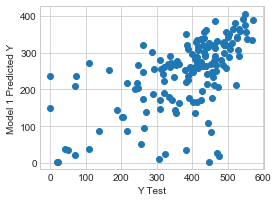

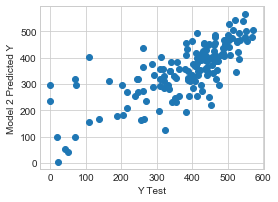

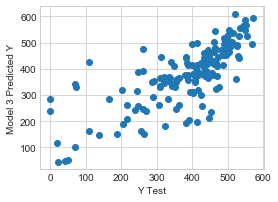

In [117]:
plt.figure(figsize=(4,3))
plt.scatter(y_test[:200],predictions1[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 1 Predicted Y')

plt.figure(figsize=(4,3))
plt.scatter(y_test[:200],predictions2[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 2 Predicted Y')

plt.figure(figsize=(4,3))
plt.scatter(y_test[:200],predictions3[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 3 Predicted Y')

In [118]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions3))
print('MSE:', metrics.mean_squared_error(y_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

MAE: 59.60001345316569
MSE: 7648.97006013209
RMSE: 87.45839045015687


In [119]:
predictions3

array([[363.23    ],
       [395.56378 ],
       [353.56592 ],
       [150.67741 ],
       [309.08594 ],
       [193.63329 ],
       [319.50375 ],
       [180.85135 ],
       [ 51.057137],
       [147.72658 ],
       [150.02544 ],
       [284.67426 ],
       [426.1526  ],
       [349.55237 ],
       [355.47122 ],
       [403.433   ],
       [347.59415 ],
       [262.7176  ],
       [429.11118 ],
       [378.31415 ],
       [440.18262 ],
       [335.59238 ],
       [242.44359 ],
       [421.45145 ],
       [357.57364 ],
       [417.88434 ],
       [363.78186 ],
       [237.07576 ],
       [372.2099  ],
       [309.45737 ],
       [422.95306 ],
       [343.79718 ],
       [257.9364  ],
       [389.0627  ],
       [379.44696 ],
       [459.9819  ],
       [446.09918 ],
       [317.4554  ],
       [311.35184 ],
       [440.16034 ],
       [363.43555 ],
       [293.36426 ],
       [417.1658  ],
       [376.02527 ],
       [452.01837 ],
       [347.59506 ],
       [316.0056  ],
       [413.3